In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

## Load the data

In [2]:
df = pd.read_csv('../cleaned_data/ISAT.csv', index_col='Date', parse_dates=True)
df.head()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-17,0.437800,0.340388,0.341359,0.526150,0.750237,0.216300,0.113942,0.235652,0.709952,0.010976,0.0,0.5,0.5,-1.0,0.594005,0.066667,0.592593,0.482270
2012-10-18,0.460510,0.358130,0.342201,-0.036486,0.560174,0.121030,0.039230,0.163048,0.609002,0.051422,0.5,0.5,0.5,-1.0,0.599455,0.133333,0.592593,0.464539
2012-10-19,0.465556,0.374604,0.342201,-0.021718,0.560174,0.121030,0.039230,-0.331469,0.646230,0.158623,1.0,0.5,0.5,-1.0,0.604905,0.200000,0.592593,0.464539
2012-10-22,0.463033,0.394880,0.348093,-0.106151,0.884145,0.391605,0.265115,0.014964,0.619132,0.610507,-1.0,0.5,0.5,-1.0,0.621253,0.400000,0.629630,0.517730
2012-10-23,0.473126,0.415157,0.362404,0.241153,0.659316,0.282592,0.182832,0.236528,0.608329,0.870434,-0.5,0.5,0.5,-1.0,0.626703,0.466667,0.629630,0.500000


### Plot the Close price - our target

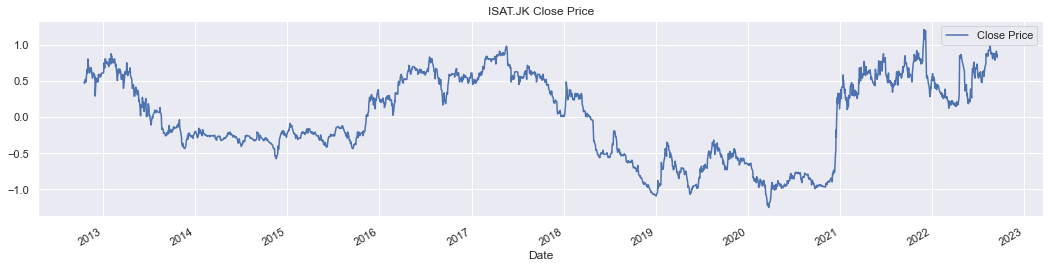

In [3]:
df['Close'].plot(figsize=(18,4))
plt.legend(['Close Price'])
plt.title('ISAT.JK Close Price')
plt.show()

### Split the data
- Split the data into independent variables and target variable
- Split the data into train and test set (80:20)

In [4]:
train_len = int(len(df)*.8)
train_dataset = df[:train_len]
test_dataset = df[train_len:len(df)]

In [5]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Close')
test_labels = test_features.pop('Close')

## Modeling

### Grid Search to find the best combination of hyperparameters

In [6]:
# ================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor = xgb.XGBRegressor(eval_metric='rmse')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [3, 4, 5],
              "n_estimators": [500, 600, 700, 1000],
              "learning_rate": [0.01, 0.015],
              "base_score": [0.5],
              "booster": ["gbtree"],
              "early_stopping_rounds": [50]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:0.80644
[1]	validation_0-rmse:0.79848
[2]	validation_0-rmse:0.79060
[3]	validation_0-rmse:0.78280
[4]	validation_0-rmse:0.77508
[5]	validation_0-rmse:0.76744
[6]	validation_0-rmse:0.75987
[7]	validation_0-rmse:0.75238
[8]	validation_0-rmse:0.74496
[9]	validation_0-rmse:0.73762
[10]	validation_0-rmse:0.73036
[11]	validation_0-rmse:0.72317
[12]	validation_0-rmse:0.71604
[13]	validation_0-rmse:0.70900
[14]	validation_0-rmse:0.70201
[15]	validation_0-rmse:0.69510
[16]	validation_0-rmse:0.68827
[17]	validation_0-rmse:0.68151
[18]	validation_0-rmse:0.67481
[19]	validation_0-rmse:0.66818
[20]	validation_0-rmse:0.66161
[21]	validation_0-rmse:0.65511
[22]	validation_0-rmse:0.64867
[23]	validation_0-rmse:0.64230
[24]	validation_0-rmse:0.63599
[25]	validation_0-rmse:0.62975
[26]	validation_0-rmse:0.62357
[27]	validation_0-rmse:0.61745
[28]	validation_0-rmse:0.61139
[29]	validation_0-rmse:0.60539
[30]	validation_0-rmse:0.59947
[31]	validation_0-rmse:0.59360
[32]	validation_0-

[260]	validation_0-rmse:0.07481
[261]	validation_0-rmse:0.07427
[262]	validation_0-rmse:0.07374
[263]	validation_0-rmse:0.07321
[264]	validation_0-rmse:0.07268
[265]	validation_0-rmse:0.07216
[266]	validation_0-rmse:0.07165
[267]	validation_0-rmse:0.07115
[268]	validation_0-rmse:0.07064
[269]	validation_0-rmse:0.07015
[270]	validation_0-rmse:0.06966
[271]	validation_0-rmse:0.06918
[272]	validation_0-rmse:0.06871
[273]	validation_0-rmse:0.06824
[274]	validation_0-rmse:0.06776
[275]	validation_0-rmse:0.06730
[276]	validation_0-rmse:0.06685
[277]	validation_0-rmse:0.06640
[278]	validation_0-rmse:0.06595
[279]	validation_0-rmse:0.06550
[280]	validation_0-rmse:0.06507
[281]	validation_0-rmse:0.06463
[282]	validation_0-rmse:0.06421
[283]	validation_0-rmse:0.06379
[284]	validation_0-rmse:0.06336
[285]	validation_0-rmse:0.06296
[286]	validation_0-rmse:0.06255
[287]	validation_0-rmse:0.06215
[288]	validation_0-rmse:0.06176
[289]	validation_0-rmse:0.06136
[290]	validation_0-rmse:0.06097
[291]	va

[17]	validation_0-rmse:0.68125
[18]	validation_0-rmse:0.67452
[19]	validation_0-rmse:0.66787
[20]	validation_0-rmse:0.66130
[21]	validation_0-rmse:0.65477
[22]	validation_0-rmse:0.64833
[23]	validation_0-rmse:0.64202
[24]	validation_0-rmse:0.63568
[25]	validation_0-rmse:0.62943
[26]	validation_0-rmse:0.62325
[27]	validation_0-rmse:0.61710
[28]	validation_0-rmse:0.61103
[29]	validation_0-rmse:0.60500
[30]	validation_0-rmse:0.59912
[31]	validation_0-rmse:0.59330
[32]	validation_0-rmse:0.58745
[33]	validation_0-rmse:0.58168
[34]	validation_0-rmse:0.57597
[35]	validation_0-rmse:0.57030
[36]	validation_0-rmse:0.56477
[37]	validation_0-rmse:0.55923
[38]	validation_0-rmse:0.55381
[39]	validation_0-rmse:0.54836
[40]	validation_0-rmse:0.54298
[41]	validation_0-rmse:0.53764
[42]	validation_0-rmse:0.53238
[43]	validation_0-rmse:0.52718
[44]	validation_0-rmse:0.52200
[45]	validation_0-rmse:0.51694
[46]	validation_0-rmse:0.51187
[47]	validation_0-rmse:0.50687
[48]	validation_0-rmse:0.50189
[49]	val

[276]	validation_0-rmse:0.06464
[277]	validation_0-rmse:0.06417
[278]	validation_0-rmse:0.06372
[279]	validation_0-rmse:0.06327
[280]	validation_0-rmse:0.06284
[281]	validation_0-rmse:0.06240
[282]	validation_0-rmse:0.06195
[283]	validation_0-rmse:0.06153
[284]	validation_0-rmse:0.06110
[285]	validation_0-rmse:0.06068
[286]	validation_0-rmse:0.06026
[287]	validation_0-rmse:0.05986
[288]	validation_0-rmse:0.05946
[289]	validation_0-rmse:0.05906
[290]	validation_0-rmse:0.05866
[291]	validation_0-rmse:0.05828
[292]	validation_0-rmse:0.05790
[293]	validation_0-rmse:0.05752
[294]	validation_0-rmse:0.05715
[295]	validation_0-rmse:0.05677
[296]	validation_0-rmse:0.05640
[297]	validation_0-rmse:0.05603
[298]	validation_0-rmse:0.05568
[299]	validation_0-rmse:0.05531
[300]	validation_0-rmse:0.05497
[301]	validation_0-rmse:0.05462
[302]	validation_0-rmse:0.05428
[303]	validation_0-rmse:0.05394
[304]	validation_0-rmse:0.05361
[305]	validation_0-rmse:0.05327
[306]	validation_0-rmse:0.05295
[307]	va

[34]	validation_0-rmse:0.57730
[35]	validation_0-rmse:0.57169
[36]	validation_0-rmse:0.56613
[37]	validation_0-rmse:0.56061
[38]	validation_0-rmse:0.55516
[39]	validation_0-rmse:0.54976
[40]	validation_0-rmse:0.54443
[41]	validation_0-rmse:0.53915
[42]	validation_0-rmse:0.53390
[43]	validation_0-rmse:0.52873
[44]	validation_0-rmse:0.52359
[45]	validation_0-rmse:0.51851
[46]	validation_0-rmse:0.51348
[47]	validation_0-rmse:0.50851
[48]	validation_0-rmse:0.50358
[49]	validation_0-rmse:0.49870
[50]	validation_0-rmse:0.49386
[51]	validation_0-rmse:0.48908
[52]	validation_0-rmse:0.48436
[53]	validation_0-rmse:0.47967
[54]	validation_0-rmse:0.47502
[55]	validation_0-rmse:0.47043
[56]	validation_0-rmse:0.46588
[57]	validation_0-rmse:0.46138
[58]	validation_0-rmse:0.45691
[59]	validation_0-rmse:0.45249
[60]	validation_0-rmse:0.44813
[61]	validation_0-rmse:0.44380
[62]	validation_0-rmse:0.43951
[63]	validation_0-rmse:0.43528
[64]	validation_0-rmse:0.43108
[65]	validation_0-rmse:0.42695
[66]	val

[292]	validation_0-rmse:0.06814
[293]	validation_0-rmse:0.06780
[294]	validation_0-rmse:0.06747
[295]	validation_0-rmse:0.06711
[296]	validation_0-rmse:0.06675
[297]	validation_0-rmse:0.06640
[298]	validation_0-rmse:0.06607
[299]	validation_0-rmse:0.06575
[300]	validation_0-rmse:0.06545
[301]	validation_0-rmse:0.06511
[302]	validation_0-rmse:0.06481
[303]	validation_0-rmse:0.06452
[304]	validation_0-rmse:0.06421
[305]	validation_0-rmse:0.06389
[306]	validation_0-rmse:0.06360
[307]	validation_0-rmse:0.06329
[308]	validation_0-rmse:0.06301
[309]	validation_0-rmse:0.06273
[310]	validation_0-rmse:0.06244
[311]	validation_0-rmse:0.06218
[312]	validation_0-rmse:0.06191
[313]	validation_0-rmse:0.06161
[314]	validation_0-rmse:0.06136
[315]	validation_0-rmse:0.06109
[316]	validation_0-rmse:0.06082
[317]	validation_0-rmse:0.06055
[318]	validation_0-rmse:0.06028
[319]	validation_0-rmse:0.06005
[320]	validation_0-rmse:0.05978
[321]	validation_0-rmse:0.05954
[322]	validation_0-rmse:0.05930
[323]	va

[50]	validation_0-rmse:0.49433
[51]	validation_0-rmse:0.48952
[52]	validation_0-rmse:0.48478
[53]	validation_0-rmse:0.48007
[54]	validation_0-rmse:0.47542
[55]	validation_0-rmse:0.47081
[56]	validation_0-rmse:0.46627
[57]	validation_0-rmse:0.46176
[58]	validation_0-rmse:0.45731
[59]	validation_0-rmse:0.45288
[60]	validation_0-rmse:0.44849
[61]	validation_0-rmse:0.44415
[62]	validation_0-rmse:0.43986
[63]	validation_0-rmse:0.43560
[64]	validation_0-rmse:0.43139
[65]	validation_0-rmse:0.42722
[66]	validation_0-rmse:0.42310
[67]	validation_0-rmse:0.41901
[68]	validation_0-rmse:0.41497
[69]	validation_0-rmse:0.41096
[70]	validation_0-rmse:0.40700
[71]	validation_0-rmse:0.40308
[72]	validation_0-rmse:0.39920
[73]	validation_0-rmse:0.39535
[74]	validation_0-rmse:0.39155
[75]	validation_0-rmse:0.38777
[76]	validation_0-rmse:0.38406
[77]	validation_0-rmse:0.38035
[78]	validation_0-rmse:0.37669
[79]	validation_0-rmse:0.37309
[80]	validation_0-rmse:0.36951
[81]	validation_0-rmse:0.36596
[82]	val

[308]	validation_0-rmse:0.05286
[309]	validation_0-rmse:0.05256
[310]	validation_0-rmse:0.05225
[311]	validation_0-rmse:0.05197
[312]	validation_0-rmse:0.05167
[313]	validation_0-rmse:0.05137
[314]	validation_0-rmse:0.05108
[315]	validation_0-rmse:0.05080
[316]	validation_0-rmse:0.05051
[317]	validation_0-rmse:0.05025
[318]	validation_0-rmse:0.04998
[319]	validation_0-rmse:0.04972
[320]	validation_0-rmse:0.04945
[321]	validation_0-rmse:0.04919
[322]	validation_0-rmse:0.04893
[323]	validation_0-rmse:0.04869
[324]	validation_0-rmse:0.04844
[325]	validation_0-rmse:0.04820
[326]	validation_0-rmse:0.04794
[327]	validation_0-rmse:0.04770
[328]	validation_0-rmse:0.04747
[329]	validation_0-rmse:0.04724
[330]	validation_0-rmse:0.04701
[331]	validation_0-rmse:0.04678
[332]	validation_0-rmse:0.04656
[333]	validation_0-rmse:0.04633
[334]	validation_0-rmse:0.04612
[335]	validation_0-rmse:0.04589
[336]	validation_0-rmse:0.04568
[337]	validation_0-rmse:0.04548
[338]	validation_0-rmse:0.04528
[339]	va

[67]	validation_0-rmse:0.42041
[68]	validation_0-rmse:0.41641
[69]	validation_0-rmse:0.41238
[70]	validation_0-rmse:0.40839
[71]	validation_0-rmse:0.40451
[72]	validation_0-rmse:0.40060
[73]	validation_0-rmse:0.39679
[74]	validation_0-rmse:0.39296
[75]	validation_0-rmse:0.38923
[76]	validation_0-rmse:0.38547
[77]	validation_0-rmse:0.38182
[78]	validation_0-rmse:0.37821
[79]	validation_0-rmse:0.37465
[80]	validation_0-rmse:0.37110
[81]	validation_0-rmse:0.36756
[82]	validation_0-rmse:0.36405
[83]	validation_0-rmse:0.36063
[84]	validation_0-rmse:0.35718
[85]	validation_0-rmse:0.35383
[86]	validation_0-rmse:0.35049
[87]	validation_0-rmse:0.34722
[88]	validation_0-rmse:0.34389
[89]	validation_0-rmse:0.34066
[90]	validation_0-rmse:0.33749
[91]	validation_0-rmse:0.33428
[92]	validation_0-rmse:0.33116
[93]	validation_0-rmse:0.32806
[94]	validation_0-rmse:0.32499
[95]	validation_0-rmse:0.32198
[96]	validation_0-rmse:0.31893
[97]	validation_0-rmse:0.31598
[98]	validation_0-rmse:0.31298
[99]	val

[325]	validation_0-rmse:0.06061
[326]	validation_0-rmse:0.06039
[327]	validation_0-rmse:0.06012
[328]	validation_0-rmse:0.05981
[329]	validation_0-rmse:0.05953
[330]	validation_0-rmse:0.05932
[331]	validation_0-rmse:0.05905
[332]	validation_0-rmse:0.05875
[333]	validation_0-rmse:0.05849
[334]	validation_0-rmse:0.05828
[335]	validation_0-rmse:0.05802
[336]	validation_0-rmse:0.05782
[337]	validation_0-rmse:0.05762
[338]	validation_0-rmse:0.05737
[339]	validation_0-rmse:0.05712
[340]	validation_0-rmse:0.05684
[341]	validation_0-rmse:0.05660
[342]	validation_0-rmse:0.05633
[343]	validation_0-rmse:0.05606
[344]	validation_0-rmse:0.05584
[345]	validation_0-rmse:0.05566
[346]	validation_0-rmse:0.05543
[347]	validation_0-rmse:0.05517
[348]	validation_0-rmse:0.05494
[349]	validation_0-rmse:0.05477
[350]	validation_0-rmse:0.05455
[351]	validation_0-rmse:0.05430
[352]	validation_0-rmse:0.05413
[353]	validation_0-rmse:0.05391
[354]	validation_0-rmse:0.05368
[355]	validation_0-rmse:0.05346
[356]	va

[84]	validation_0-rmse:0.35377
[85]	validation_0-rmse:0.35036
[86]	validation_0-rmse:0.34700
[87]	validation_0-rmse:0.34366
[88]	validation_0-rmse:0.34037
[89]	validation_0-rmse:0.33710
[90]	validation_0-rmse:0.33386
[91]	validation_0-rmse:0.33066
[92]	validation_0-rmse:0.32749
[93]	validation_0-rmse:0.32436
[94]	validation_0-rmse:0.32127
[95]	validation_0-rmse:0.31820
[96]	validation_0-rmse:0.31516
[97]	validation_0-rmse:0.31216
[98]	validation_0-rmse:0.30919
[99]	validation_0-rmse:0.30623
[100]	validation_0-rmse:0.30330
[101]	validation_0-rmse:0.30043
[102]	validation_0-rmse:0.29757
[103]	validation_0-rmse:0.29475
[104]	validation_0-rmse:0.29193
[105]	validation_0-rmse:0.28916
[106]	validation_0-rmse:0.28641
[107]	validation_0-rmse:0.28370
[108]	validation_0-rmse:0.28100
[109]	validation_0-rmse:0.27834
[110]	validation_0-rmse:0.27569
[111]	validation_0-rmse:0.27305
[112]	validation_0-rmse:0.27045
[113]	validation_0-rmse:0.26787
[114]	validation_0-rmse:0.26532
[115]	validation_0-rmse:

[341]	validation_0-rmse:0.04595
[342]	validation_0-rmse:0.04573
[343]	validation_0-rmse:0.04552
[344]	validation_0-rmse:0.04532
[345]	validation_0-rmse:0.04510
[346]	validation_0-rmse:0.04489
[347]	validation_0-rmse:0.04469
[348]	validation_0-rmse:0.04449
[349]	validation_0-rmse:0.04428
[350]	validation_0-rmse:0.04409
[351]	validation_0-rmse:0.04390
[352]	validation_0-rmse:0.04371
[353]	validation_0-rmse:0.04352
[354]	validation_0-rmse:0.04333
[355]	validation_0-rmse:0.04315
[356]	validation_0-rmse:0.04297
[357]	validation_0-rmse:0.04278
[358]	validation_0-rmse:0.04261
[359]	validation_0-rmse:0.04243
[360]	validation_0-rmse:0.04226
[361]	validation_0-rmse:0.04208
[362]	validation_0-rmse:0.04191
[363]	validation_0-rmse:0.04174
[364]	validation_0-rmse:0.04158
[365]	validation_0-rmse:0.04141
[366]	validation_0-rmse:0.04125
[367]	validation_0-rmse:0.04109
[368]	validation_0-rmse:0.04092
[369]	validation_0-rmse:0.04077
[370]	validation_0-rmse:0.04061
[371]	validation_0-rmse:0.04046
[372]	va

[598]	validation_0-rmse:0.02676
[599]	validation_0-rmse:0.02674
[0]	validation_0-rmse:0.80642
[1]	validation_0-rmse:0.79844
[2]	validation_0-rmse:0.79054
[3]	validation_0-rmse:0.78272
[4]	validation_0-rmse:0.77497
[5]	validation_0-rmse:0.76733
[6]	validation_0-rmse:0.75974
[7]	validation_0-rmse:0.75226
[8]	validation_0-rmse:0.74482
[9]	validation_0-rmse:0.73748
[10]	validation_0-rmse:0.73019
[11]	validation_0-rmse:0.72300
[12]	validation_0-rmse:0.71585
[13]	validation_0-rmse:0.70880
[14]	validation_0-rmse:0.70179
[15]	validation_0-rmse:0.69488
[16]	validation_0-rmse:0.68802
[17]	validation_0-rmse:0.68125
[18]	validation_0-rmse:0.67452
[19]	validation_0-rmse:0.66787
[20]	validation_0-rmse:0.66130
[21]	validation_0-rmse:0.65477
[22]	validation_0-rmse:0.64833
[23]	validation_0-rmse:0.64202
[24]	validation_0-rmse:0.63568
[25]	validation_0-rmse:0.62943
[26]	validation_0-rmse:0.62325
[27]	validation_0-rmse:0.61710
[28]	validation_0-rmse:0.61103
[29]	validation_0-rmse:0.60500
[30]	validation_

[258]	validation_0-rmse:0.07385
[259]	validation_0-rmse:0.07329
[260]	validation_0-rmse:0.07274
[261]	validation_0-rmse:0.07218
[262]	validation_0-rmse:0.07164
[263]	validation_0-rmse:0.07111
[264]	validation_0-rmse:0.07057
[265]	validation_0-rmse:0.07004
[266]	validation_0-rmse:0.06953
[267]	validation_0-rmse:0.06902
[268]	validation_0-rmse:0.06851
[269]	validation_0-rmse:0.06801
[270]	validation_0-rmse:0.06750
[271]	validation_0-rmse:0.06703
[272]	validation_0-rmse:0.06654
[273]	validation_0-rmse:0.06605
[274]	validation_0-rmse:0.06558
[275]	validation_0-rmse:0.06510
[276]	validation_0-rmse:0.06464
[277]	validation_0-rmse:0.06417
[278]	validation_0-rmse:0.06372
[279]	validation_0-rmse:0.06327
[280]	validation_0-rmse:0.06284
[281]	validation_0-rmse:0.06240
[282]	validation_0-rmse:0.06195
[283]	validation_0-rmse:0.06153
[284]	validation_0-rmse:0.06110
[285]	validation_0-rmse:0.06068
[286]	validation_0-rmse:0.06026
[287]	validation_0-rmse:0.05986
[288]	validation_0-rmse:0.05946
[289]	va

[515]	validation_0-rmse:0.02667
[516]	validation_0-rmse:0.02663
[517]	validation_0-rmse:0.02659
[518]	validation_0-rmse:0.02656
[519]	validation_0-rmse:0.02652
[520]	validation_0-rmse:0.02648
[521]	validation_0-rmse:0.02644
[522]	validation_0-rmse:0.02641
[523]	validation_0-rmse:0.02638
[524]	validation_0-rmse:0.02634
[525]	validation_0-rmse:0.02631
[526]	validation_0-rmse:0.02627
[527]	validation_0-rmse:0.02624
[528]	validation_0-rmse:0.02621
[529]	validation_0-rmse:0.02617
[530]	validation_0-rmse:0.02613
[531]	validation_0-rmse:0.02610
[532]	validation_0-rmse:0.02607
[533]	validation_0-rmse:0.02604
[534]	validation_0-rmse:0.02601
[535]	validation_0-rmse:0.02598
[536]	validation_0-rmse:0.02595
[537]	validation_0-rmse:0.02592
[538]	validation_0-rmse:0.02589
[539]	validation_0-rmse:0.02586
[540]	validation_0-rmse:0.02583
[541]	validation_0-rmse:0.02580
[542]	validation_0-rmse:0.02577
[543]	validation_0-rmse:0.02574
[544]	validation_0-rmse:0.02571
[545]	validation_0-rmse:0.02569
[546]	va

[175]	validation_0-rmse:0.15475
[176]	validation_0-rmse:0.15344
[177]	validation_0-rmse:0.15214
[178]	validation_0-rmse:0.15087
[179]	validation_0-rmse:0.14957
[180]	validation_0-rmse:0.14832
[181]	validation_0-rmse:0.14709
[182]	validation_0-rmse:0.14586
[183]	validation_0-rmse:0.14464
[184]	validation_0-rmse:0.14344
[185]	validation_0-rmse:0.14225
[186]	validation_0-rmse:0.14105
[187]	validation_0-rmse:0.13988
[188]	validation_0-rmse:0.13874
[189]	validation_0-rmse:0.13762
[190]	validation_0-rmse:0.13650
[191]	validation_0-rmse:0.13535
[192]	validation_0-rmse:0.13425
[193]	validation_0-rmse:0.13317
[194]	validation_0-rmse:0.13207
[195]	validation_0-rmse:0.13101
[196]	validation_0-rmse:0.12994
[197]	validation_0-rmse:0.12890
[198]	validation_0-rmse:0.12787
[199]	validation_0-rmse:0.12682
[200]	validation_0-rmse:0.12582
[201]	validation_0-rmse:0.12482
[202]	validation_0-rmse:0.12381
[203]	validation_0-rmse:0.12285
[204]	validation_0-rmse:0.12189
[205]	validation_0-rmse:0.12091
[206]	va

[431]	validation_0-rmse:0.04485
[432]	validation_0-rmse:0.04479
[433]	validation_0-rmse:0.04470
[434]	validation_0-rmse:0.04465
[435]	validation_0-rmse:0.04456
[436]	validation_0-rmse:0.04450
[437]	validation_0-rmse:0.04442
[438]	validation_0-rmse:0.04437
[439]	validation_0-rmse:0.04428
[440]	validation_0-rmse:0.04423
[441]	validation_0-rmse:0.04416
[442]	validation_0-rmse:0.04411
[443]	validation_0-rmse:0.04406
[444]	validation_0-rmse:0.04401
[445]	validation_0-rmse:0.04393
[446]	validation_0-rmse:0.04388
[447]	validation_0-rmse:0.04383
[448]	validation_0-rmse:0.04376
[449]	validation_0-rmse:0.04368
[450]	validation_0-rmse:0.04364
[451]	validation_0-rmse:0.04356
[452]	validation_0-rmse:0.04352
[453]	validation_0-rmse:0.04347
[454]	validation_0-rmse:0.04340
[455]	validation_0-rmse:0.04332
[456]	validation_0-rmse:0.04328
[457]	validation_0-rmse:0.04321
[458]	validation_0-rmse:0.04317
[459]	validation_0-rmse:0.04313
[460]	validation_0-rmse:0.04307
[461]	validation_0-rmse:0.04304
[462]	va

[90]	validation_0-rmse:0.33561
[91]	validation_0-rmse:0.33238
[92]	validation_0-rmse:0.32923
[93]	validation_0-rmse:0.32609
[94]	validation_0-rmse:0.32300
[95]	validation_0-rmse:0.31989
[96]	validation_0-rmse:0.31686
[97]	validation_0-rmse:0.31381
[98]	validation_0-rmse:0.31083
[99]	validation_0-rmse:0.30789
[100]	validation_0-rmse:0.30493
[101]	validation_0-rmse:0.30205
[102]	validation_0-rmse:0.29920
[103]	validation_0-rmse:0.29632
[104]	validation_0-rmse:0.29353
[105]	validation_0-rmse:0.29075
[106]	validation_0-rmse:0.28797
[107]	validation_0-rmse:0.28522
[108]	validation_0-rmse:0.28251
[109]	validation_0-rmse:0.27981
[110]	validation_0-rmse:0.27711
[111]	validation_0-rmse:0.27450
[112]	validation_0-rmse:0.27192
[113]	validation_0-rmse:0.26931
[114]	validation_0-rmse:0.26675
[115]	validation_0-rmse:0.26418
[116]	validation_0-rmse:0.26167
[117]	validation_0-rmse:0.25919
[118]	validation_0-rmse:0.25675
[119]	validation_0-rmse:0.25429
[120]	validation_0-rmse:0.25186
[121]	validation_0

[347]	validation_0-rmse:0.04357
[348]	validation_0-rmse:0.04340
[349]	validation_0-rmse:0.04322
[350]	validation_0-rmse:0.04306
[351]	validation_0-rmse:0.04289
[352]	validation_0-rmse:0.04273
[353]	validation_0-rmse:0.04256
[354]	validation_0-rmse:0.04238
[355]	validation_0-rmse:0.04222
[356]	validation_0-rmse:0.04206
[357]	validation_0-rmse:0.04192
[358]	validation_0-rmse:0.04178
[359]	validation_0-rmse:0.04162
[360]	validation_0-rmse:0.04148
[361]	validation_0-rmse:0.04134
[362]	validation_0-rmse:0.04119
[363]	validation_0-rmse:0.04105
[364]	validation_0-rmse:0.04092
[365]	validation_0-rmse:0.04077
[366]	validation_0-rmse:0.04062
[367]	validation_0-rmse:0.04049
[368]	validation_0-rmse:0.04037
[369]	validation_0-rmse:0.04023
[370]	validation_0-rmse:0.04010
[371]	validation_0-rmse:0.03996
[372]	validation_0-rmse:0.03982
[373]	validation_0-rmse:0.03969
[374]	validation_0-rmse:0.03956
[375]	validation_0-rmse:0.03943
[376]	validation_0-rmse:0.03932
[377]	validation_0-rmse:0.03920
[378]	va

[4]	validation_0-rmse:0.77544
[5]	validation_0-rmse:0.76786
[6]	validation_0-rmse:0.76036
[7]	validation_0-rmse:0.75293
[8]	validation_0-rmse:0.74558
[9]	validation_0-rmse:0.73830
[10]	validation_0-rmse:0.73109
[11]	validation_0-rmse:0.72397
[12]	validation_0-rmse:0.71690
[13]	validation_0-rmse:0.70992
[14]	validation_0-rmse:0.70299
[15]	validation_0-rmse:0.69615
[16]	validation_0-rmse:0.68936
[17]	validation_0-rmse:0.68265
[18]	validation_0-rmse:0.67600
[19]	validation_0-rmse:0.66943
[20]	validation_0-rmse:0.66291
[21]	validation_0-rmse:0.65646
[22]	validation_0-rmse:0.65007
[23]	validation_0-rmse:0.64374
[24]	validation_0-rmse:0.63748
[25]	validation_0-rmse:0.63128
[26]	validation_0-rmse:0.62514
[27]	validation_0-rmse:0.61907
[28]	validation_0-rmse:0.61312
[29]	validation_0-rmse:0.60717
[30]	validation_0-rmse:0.60131
[31]	validation_0-rmse:0.59546
[32]	validation_0-rmse:0.58971
[33]	validation_0-rmse:0.58402
[34]	validation_0-rmse:0.57835
[35]	validation_0-rmse:0.57278
[36]	validatio

[264]	validation_0-rmse:0.08364
[265]	validation_0-rmse:0.08314
[266]	validation_0-rmse:0.08266
[267]	validation_0-rmse:0.08218
[268]	validation_0-rmse:0.08170
[269]	validation_0-rmse:0.08117
[270]	validation_0-rmse:0.08070
[271]	validation_0-rmse:0.08028
[272]	validation_0-rmse:0.07982
[273]	validation_0-rmse:0.07932
[274]	validation_0-rmse:0.07886
[275]	validation_0-rmse:0.07841
[276]	validation_0-rmse:0.07797
[277]	validation_0-rmse:0.07756
[278]	validation_0-rmse:0.07712
[279]	validation_0-rmse:0.07662
[280]	validation_0-rmse:0.07621
[281]	validation_0-rmse:0.07574
[282]	validation_0-rmse:0.07532
[283]	validation_0-rmse:0.07490
[284]	validation_0-rmse:0.07451
[285]	validation_0-rmse:0.07410
[286]	validation_0-rmse:0.07372
[287]	validation_0-rmse:0.07328
[288]	validation_0-rmse:0.07289
[289]	validation_0-rmse:0.07250
[290]	validation_0-rmse:0.07215
[291]	validation_0-rmse:0.07177
[292]	validation_0-rmse:0.07135
[293]	validation_0-rmse:0.07097
[294]	validation_0-rmse:0.07056
[295]	va

[521]	validation_0-rmse:0.03678
[522]	validation_0-rmse:0.03675
[523]	validation_0-rmse:0.03669
[524]	validation_0-rmse:0.03664
[525]	validation_0-rmse:0.03661
[526]	validation_0-rmse:0.03656
[527]	validation_0-rmse:0.03652
[528]	validation_0-rmse:0.03647
[529]	validation_0-rmse:0.03644
[530]	validation_0-rmse:0.03639
[531]	validation_0-rmse:0.03634
[532]	validation_0-rmse:0.03629
[533]	validation_0-rmse:0.03627
[534]	validation_0-rmse:0.03623
[535]	validation_0-rmse:0.03617
[536]	validation_0-rmse:0.03612
[537]	validation_0-rmse:0.03609
[538]	validation_0-rmse:0.03604
[539]	validation_0-rmse:0.03601
[540]	validation_0-rmse:0.03596
[541]	validation_0-rmse:0.03592
[542]	validation_0-rmse:0.03589
[543]	validation_0-rmse:0.03584
[544]	validation_0-rmse:0.03581
[545]	validation_0-rmse:0.03577
[546]	validation_0-rmse:0.03574
[547]	validation_0-rmse:0.03570
[548]	validation_0-rmse:0.03567
[549]	validation_0-rmse:0.03563
[550]	validation_0-rmse:0.03560
[551]	validation_0-rmse:0.03555
[552]	va

[181]	validation_0-rmse:0.14265
[182]	validation_0-rmse:0.14140
[183]	validation_0-rmse:0.14016
[184]	validation_0-rmse:0.13894
[185]	validation_0-rmse:0.13771
[186]	validation_0-rmse:0.13650
[187]	validation_0-rmse:0.13530
[188]	validation_0-rmse:0.13412
[189]	validation_0-rmse:0.13295
[190]	validation_0-rmse:0.13180
[191]	validation_0-rmse:0.13064
[192]	validation_0-rmse:0.12949
[193]	validation_0-rmse:0.12837
[194]	validation_0-rmse:0.12724
[195]	validation_0-rmse:0.12616
[196]	validation_0-rmse:0.12508
[197]	validation_0-rmse:0.12399
[198]	validation_0-rmse:0.12293
[199]	validation_0-rmse:0.12186
[200]	validation_0-rmse:0.12082
[201]	validation_0-rmse:0.11980
[202]	validation_0-rmse:0.11878
[203]	validation_0-rmse:0.11778
[204]	validation_0-rmse:0.11677
[205]	validation_0-rmse:0.11578
[206]	validation_0-rmse:0.11481
[207]	validation_0-rmse:0.11384
[208]	validation_0-rmse:0.11289
[209]	validation_0-rmse:0.11194
[210]	validation_0-rmse:0.11102
[211]	validation_0-rmse:0.11008
[212]	va

[438]	validation_0-rmse:0.03302
[439]	validation_0-rmse:0.03294
[440]	validation_0-rmse:0.03286
[441]	validation_0-rmse:0.03280
[442]	validation_0-rmse:0.03271
[443]	validation_0-rmse:0.03264
[444]	validation_0-rmse:0.03257
[445]	validation_0-rmse:0.03250
[446]	validation_0-rmse:0.03243
[447]	validation_0-rmse:0.03235
[448]	validation_0-rmse:0.03229
[449]	validation_0-rmse:0.03222
[450]	validation_0-rmse:0.03215
[451]	validation_0-rmse:0.03208
[452]	validation_0-rmse:0.03202
[453]	validation_0-rmse:0.03195
[454]	validation_0-rmse:0.03189
[455]	validation_0-rmse:0.03182
[456]	validation_0-rmse:0.03175
[457]	validation_0-rmse:0.03170
[458]	validation_0-rmse:0.03163
[459]	validation_0-rmse:0.03157
[460]	validation_0-rmse:0.03151
[461]	validation_0-rmse:0.03146
[462]	validation_0-rmse:0.03140
[463]	validation_0-rmse:0.03134
[464]	validation_0-rmse:0.03128
[465]	validation_0-rmse:0.03122
[466]	validation_0-rmse:0.03117
[467]	validation_0-rmse:0.03111
[468]	validation_0-rmse:0.03106
[469]	va

[695]	validation_0-rmse:0.02535
[696]	validation_0-rmse:0.02534
[697]	validation_0-rmse:0.02532
[698]	validation_0-rmse:0.02530
[699]	validation_0-rmse:0.02529
[0]	validation_0-rmse:0.80642
[1]	validation_0-rmse:0.79844
[2]	validation_0-rmse:0.79054
[3]	validation_0-rmse:0.78272
[4]	validation_0-rmse:0.77497
[5]	validation_0-rmse:0.76733
[6]	validation_0-rmse:0.75974
[7]	validation_0-rmse:0.75226
[8]	validation_0-rmse:0.74482
[9]	validation_0-rmse:0.73748
[10]	validation_0-rmse:0.73019
[11]	validation_0-rmse:0.72300
[12]	validation_0-rmse:0.71585
[13]	validation_0-rmse:0.70880
[14]	validation_0-rmse:0.70179
[15]	validation_0-rmse:0.69488
[16]	validation_0-rmse:0.68802
[17]	validation_0-rmse:0.68125
[18]	validation_0-rmse:0.67452
[19]	validation_0-rmse:0.66787
[20]	validation_0-rmse:0.66130
[21]	validation_0-rmse:0.65477
[22]	validation_0-rmse:0.64833
[23]	validation_0-rmse:0.64202
[24]	validation_0-rmse:0.63568
[25]	validation_0-rmse:0.62943
[26]	validation_0-rmse:0.62325
[27]	validati

[255]	validation_0-rmse:0.07558
[256]	validation_0-rmse:0.07499
[257]	validation_0-rmse:0.07441
[258]	validation_0-rmse:0.07385
[259]	validation_0-rmse:0.07329
[260]	validation_0-rmse:0.07274
[261]	validation_0-rmse:0.07218
[262]	validation_0-rmse:0.07164
[263]	validation_0-rmse:0.07111
[264]	validation_0-rmse:0.07057
[265]	validation_0-rmse:0.07004
[266]	validation_0-rmse:0.06953
[267]	validation_0-rmse:0.06902
[268]	validation_0-rmse:0.06851
[269]	validation_0-rmse:0.06801
[270]	validation_0-rmse:0.06750
[271]	validation_0-rmse:0.06703
[272]	validation_0-rmse:0.06654
[273]	validation_0-rmse:0.06605
[274]	validation_0-rmse:0.06558
[275]	validation_0-rmse:0.06510
[276]	validation_0-rmse:0.06464
[277]	validation_0-rmse:0.06417
[278]	validation_0-rmse:0.06372
[279]	validation_0-rmse:0.06327
[280]	validation_0-rmse:0.06284
[281]	validation_0-rmse:0.06240
[282]	validation_0-rmse:0.06195
[283]	validation_0-rmse:0.06153
[284]	validation_0-rmse:0.06110
[285]	validation_0-rmse:0.06068
[286]	va

[512]	validation_0-rmse:0.02677
[513]	validation_0-rmse:0.02674
[514]	validation_0-rmse:0.02670
[515]	validation_0-rmse:0.02667
[516]	validation_0-rmse:0.02663
[517]	validation_0-rmse:0.02659
[518]	validation_0-rmse:0.02656
[519]	validation_0-rmse:0.02652
[520]	validation_0-rmse:0.02648
[521]	validation_0-rmse:0.02644
[522]	validation_0-rmse:0.02641
[523]	validation_0-rmse:0.02638
[524]	validation_0-rmse:0.02634
[525]	validation_0-rmse:0.02631
[526]	validation_0-rmse:0.02627
[527]	validation_0-rmse:0.02624
[528]	validation_0-rmse:0.02621
[529]	validation_0-rmse:0.02617
[530]	validation_0-rmse:0.02613
[531]	validation_0-rmse:0.02610
[532]	validation_0-rmse:0.02607
[533]	validation_0-rmse:0.02604
[534]	validation_0-rmse:0.02601
[535]	validation_0-rmse:0.02598
[536]	validation_0-rmse:0.02595
[537]	validation_0-rmse:0.02592
[538]	validation_0-rmse:0.02589
[539]	validation_0-rmse:0.02586
[540]	validation_0-rmse:0.02583
[541]	validation_0-rmse:0.02580
[542]	validation_0-rmse:0.02577
[543]	va

[71]	validation_0-rmse:0.40289
[72]	validation_0-rmse:0.39902
[73]	validation_0-rmse:0.39520
[74]	validation_0-rmse:0.39141
[75]	validation_0-rmse:0.38768
[76]	validation_0-rmse:0.38396
[77]	validation_0-rmse:0.38029
[78]	validation_0-rmse:0.37667
[79]	validation_0-rmse:0.37308
[80]	validation_0-rmse:0.36951
[81]	validation_0-rmse:0.36599
[82]	validation_0-rmse:0.36250
[83]	validation_0-rmse:0.35905
[84]	validation_0-rmse:0.35563
[85]	validation_0-rmse:0.35223
[86]	validation_0-rmse:0.34888
[87]	validation_0-rmse:0.34556
[88]	validation_0-rmse:0.34229
[89]	validation_0-rmse:0.33904
[90]	validation_0-rmse:0.33582
[91]	validation_0-rmse:0.33264
[92]	validation_0-rmse:0.32948
[93]	validation_0-rmse:0.32636
[94]	validation_0-rmse:0.32326
[95]	validation_0-rmse:0.32020
[96]	validation_0-rmse:0.31718
[97]	validation_0-rmse:0.31418
[98]	validation_0-rmse:0.31122
[99]	validation_0-rmse:0.30828
[100]	validation_0-rmse:0.30537
[101]	validation_0-rmse:0.30251
[102]	validation_0-rmse:0.29966
[103]

[328]	validation_0-rmse:0.05785
[329]	validation_0-rmse:0.05765
[330]	validation_0-rmse:0.05742
[331]	validation_0-rmse:0.05722
[332]	validation_0-rmse:0.05698
[333]	validation_0-rmse:0.05677
[334]	validation_0-rmse:0.05654
[335]	validation_0-rmse:0.05634
[336]	validation_0-rmse:0.05613
[337]	validation_0-rmse:0.05591
[338]	validation_0-rmse:0.05573
[339]	validation_0-rmse:0.05553
[340]	validation_0-rmse:0.05532
[341]	validation_0-rmse:0.05514
[342]	validation_0-rmse:0.05495
[343]	validation_0-rmse:0.05474
[344]	validation_0-rmse:0.05454
[345]	validation_0-rmse:0.05435
[346]	validation_0-rmse:0.05414
[347]	validation_0-rmse:0.05398
[348]	validation_0-rmse:0.05382
[349]	validation_0-rmse:0.05364
[350]	validation_0-rmse:0.05345
[351]	validation_0-rmse:0.05330
[352]	validation_0-rmse:0.05314
[353]	validation_0-rmse:0.05297
[354]	validation_0-rmse:0.05282
[355]	validation_0-rmse:0.05267
[356]	validation_0-rmse:0.05249
[357]	validation_0-rmse:0.05235
[358]	validation_0-rmse:0.05221
[359]	va

[585]	validation_0-rmse:0.03891
[586]	validation_0-rmse:0.03890
[587]	validation_0-rmse:0.03888
[588]	validation_0-rmse:0.03884
[589]	validation_0-rmse:0.03883
[590]	validation_0-rmse:0.03881
[591]	validation_0-rmse:0.03878
[592]	validation_0-rmse:0.03877
[593]	validation_0-rmse:0.03875
[594]	validation_0-rmse:0.03871
[595]	validation_0-rmse:0.03869
[596]	validation_0-rmse:0.03866
[597]	validation_0-rmse:0.03864
[598]	validation_0-rmse:0.03861
[599]	validation_0-rmse:0.03860
[600]	validation_0-rmse:0.03856
[601]	validation_0-rmse:0.03855
[602]	validation_0-rmse:0.03853
[603]	validation_0-rmse:0.03851
[604]	validation_0-rmse:0.03848
[605]	validation_0-rmse:0.03847
[606]	validation_0-rmse:0.03845
[607]	validation_0-rmse:0.03843
[608]	validation_0-rmse:0.03842
[609]	validation_0-rmse:0.03839
[610]	validation_0-rmse:0.03837
[611]	validation_0-rmse:0.03835
[612]	validation_0-rmse:0.03834
[613]	validation_0-rmse:0.03831
[614]	validation_0-rmse:0.03828
[615]	validation_0-rmse:0.03825
[616]	va

[145]	validation_0-rmse:0.19854
[146]	validation_0-rmse:0.19670
[147]	validation_0-rmse:0.19489
[148]	validation_0-rmse:0.19310
[149]	validation_0-rmse:0.19131
[150]	validation_0-rmse:0.18945
[151]	validation_0-rmse:0.18760
[152]	validation_0-rmse:0.18584
[153]	validation_0-rmse:0.18414
[154]	validation_0-rmse:0.18235
[155]	validation_0-rmse:0.18068
[156]	validation_0-rmse:0.17893
[157]	validation_0-rmse:0.17728
[158]	validation_0-rmse:0.17564
[159]	validation_0-rmse:0.17400
[160]	validation_0-rmse:0.17239
[161]	validation_0-rmse:0.17080
[162]	validation_0-rmse:0.16925
[163]	validation_0-rmse:0.16761
[164]	validation_0-rmse:0.16607
[165]	validation_0-rmse:0.16457
[166]	validation_0-rmse:0.16299
[167]	validation_0-rmse:0.16152
[168]	validation_0-rmse:0.16004
[169]	validation_0-rmse:0.15856
[170]	validation_0-rmse:0.15711
[171]	validation_0-rmse:0.15570
[172]	validation_0-rmse:0.15428
[173]	validation_0-rmse:0.15288
[174]	validation_0-rmse:0.15143
[175]	validation_0-rmse:0.15007
[176]	va

[402]	validation_0-rmse:0.03682
[403]	validation_0-rmse:0.03675
[404]	validation_0-rmse:0.03666
[405]	validation_0-rmse:0.03658
[406]	validation_0-rmse:0.03649
[407]	validation_0-rmse:0.03641
[408]	validation_0-rmse:0.03635
[409]	validation_0-rmse:0.03627
[410]	validation_0-rmse:0.03619
[411]	validation_0-rmse:0.03611
[412]	validation_0-rmse:0.03604
[413]	validation_0-rmse:0.03596
[414]	validation_0-rmse:0.03589
[415]	validation_0-rmse:0.03582
[416]	validation_0-rmse:0.03577
[417]	validation_0-rmse:0.03570
[418]	validation_0-rmse:0.03565
[419]	validation_0-rmse:0.03558
[420]	validation_0-rmse:0.03551
[421]	validation_0-rmse:0.03545
[422]	validation_0-rmse:0.03541
[423]	validation_0-rmse:0.03535
[424]	validation_0-rmse:0.03530
[425]	validation_0-rmse:0.03523
[426]	validation_0-rmse:0.03519
[427]	validation_0-rmse:0.03513
[428]	validation_0-rmse:0.03508
[429]	validation_0-rmse:0.03503
[430]	validation_0-rmse:0.03498
[431]	validation_0-rmse:0.03493
[432]	validation_0-rmse:0.03488
[433]	va

[658]	validation_0-rmse:0.03070
[659]	validation_0-rmse:0.03068
[660]	validation_0-rmse:0.03068
[661]	validation_0-rmse:0.03067
[662]	validation_0-rmse:0.03067
[663]	validation_0-rmse:0.03067
[664]	validation_0-rmse:0.03066
[665]	validation_0-rmse:0.03065
[666]	validation_0-rmse:0.03065
[667]	validation_0-rmse:0.03064
[668]	validation_0-rmse:0.03063
[669]	validation_0-rmse:0.03063
[670]	validation_0-rmse:0.03062
[671]	validation_0-rmse:0.03062
[672]	validation_0-rmse:0.03061
[673]	validation_0-rmse:0.03061
[674]	validation_0-rmse:0.03060
[675]	validation_0-rmse:0.03059
[676]	validation_0-rmse:0.03058
[677]	validation_0-rmse:0.03058
[678]	validation_0-rmse:0.03058
[679]	validation_0-rmse:0.03057
[680]	validation_0-rmse:0.03057
[681]	validation_0-rmse:0.03057
[682]	validation_0-rmse:0.03056
[683]	validation_0-rmse:0.03056
[684]	validation_0-rmse:0.03055
[685]	validation_0-rmse:0.03055
[686]	validation_0-rmse:0.03054
[687]	validation_0-rmse:0.03054
[688]	validation_0-rmse:0.03053
[689]	va

[218]	validation_0-rmse:0.11425
[219]	validation_0-rmse:0.11333
[220]	validation_0-rmse:0.11246
[221]	validation_0-rmse:0.11165
[222]	validation_0-rmse:0.11092
[223]	validation_0-rmse:0.11008
[224]	validation_0-rmse:0.10938
[225]	validation_0-rmse:0.10867
[226]	validation_0-rmse:0.10781
[227]	validation_0-rmse:0.10704
[228]	validation_0-rmse:0.10624
[229]	validation_0-rmse:0.10558
[230]	validation_0-rmse:0.10475
[231]	validation_0-rmse:0.10401
[232]	validation_0-rmse:0.10320
[233]	validation_0-rmse:0.10255
[234]	validation_0-rmse:0.10179
[235]	validation_0-rmse:0.10117
[236]	validation_0-rmse:0.10055
[237]	validation_0-rmse:0.09982
[238]	validation_0-rmse:0.09907
[239]	validation_0-rmse:0.09845
[240]	validation_0-rmse:0.09770
[241]	validation_0-rmse:0.09704
[242]	validation_0-rmse:0.09643
[243]	validation_0-rmse:0.09586
[244]	validation_0-rmse:0.09518
[245]	validation_0-rmse:0.09457
[246]	validation_0-rmse:0.09388
[247]	validation_0-rmse:0.09327
[248]	validation_0-rmse:0.09265
[249]	va

[475]	validation_0-rmse:0.03913
[476]	validation_0-rmse:0.03908
[477]	validation_0-rmse:0.03901
[478]	validation_0-rmse:0.03895
[479]	validation_0-rmse:0.03889
[480]	validation_0-rmse:0.03883
[481]	validation_0-rmse:0.03876
[482]	validation_0-rmse:0.03870
[483]	validation_0-rmse:0.03863
[484]	validation_0-rmse:0.03859
[485]	validation_0-rmse:0.03852
[486]	validation_0-rmse:0.03848
[487]	validation_0-rmse:0.03842
[488]	validation_0-rmse:0.03838
[489]	validation_0-rmse:0.03831
[490]	validation_0-rmse:0.03825
[491]	validation_0-rmse:0.03821
[492]	validation_0-rmse:0.03815
[493]	validation_0-rmse:0.03811
[494]	validation_0-rmse:0.03804
[495]	validation_0-rmse:0.03800
[496]	validation_0-rmse:0.03794
[497]	validation_0-rmse:0.03790
[498]	validation_0-rmse:0.03785
[499]	validation_0-rmse:0.03781
[500]	validation_0-rmse:0.03775
[501]	validation_0-rmse:0.03770
[502]	validation_0-rmse:0.03764
[503]	validation_0-rmse:0.03761
[504]	validation_0-rmse:0.03756
[505]	validation_0-rmse:0.03750
[506]	va

[33]	validation_0-rmse:0.58202
[34]	validation_0-rmse:0.57632
[35]	validation_0-rmse:0.57069
[36]	validation_0-rmse:0.56510
[37]	validation_0-rmse:0.55958
[38]	validation_0-rmse:0.55411
[39]	validation_0-rmse:0.54869
[40]	validation_0-rmse:0.54332
[41]	validation_0-rmse:0.53802
[42]	validation_0-rmse:0.53276
[43]	validation_0-rmse:0.52756
[44]	validation_0-rmse:0.52241
[45]	validation_0-rmse:0.51732
[46]	validation_0-rmse:0.51227
[47]	validation_0-rmse:0.50728
[48]	validation_0-rmse:0.50233
[49]	validation_0-rmse:0.49742
[50]	validation_0-rmse:0.49258
[51]	validation_0-rmse:0.48778
[52]	validation_0-rmse:0.48303
[53]	validation_0-rmse:0.47832
[54]	validation_0-rmse:0.47367
[55]	validation_0-rmse:0.46906
[56]	validation_0-rmse:0.46449
[57]	validation_0-rmse:0.45997
[58]	validation_0-rmse:0.45549
[59]	validation_0-rmse:0.45108
[60]	validation_0-rmse:0.44670
[61]	validation_0-rmse:0.44236
[62]	validation_0-rmse:0.43806
[63]	validation_0-rmse:0.43381
[64]	validation_0-rmse:0.42960
[65]	val

[292]	validation_0-rmse:0.06021
[293]	validation_0-rmse:0.05983
[294]	validation_0-rmse:0.05945
[295]	validation_0-rmse:0.05909
[296]	validation_0-rmse:0.05873
[297]	validation_0-rmse:0.05837
[298]	validation_0-rmse:0.05802
[299]	validation_0-rmse:0.05767
[300]	validation_0-rmse:0.05732
[301]	validation_0-rmse:0.05699
[302]	validation_0-rmse:0.05665
[303]	validation_0-rmse:0.05630
[304]	validation_0-rmse:0.05597
[305]	validation_0-rmse:0.05564
[306]	validation_0-rmse:0.05531
[307]	validation_0-rmse:0.05500
[308]	validation_0-rmse:0.05468
[309]	validation_0-rmse:0.05435
[310]	validation_0-rmse:0.05405
[311]	validation_0-rmse:0.05374
[312]	validation_0-rmse:0.05345
[313]	validation_0-rmse:0.05315
[314]	validation_0-rmse:0.05286
[315]	validation_0-rmse:0.05257
[316]	validation_0-rmse:0.05227
[317]	validation_0-rmse:0.05199
[318]	validation_0-rmse:0.05170
[319]	validation_0-rmse:0.05142
[320]	validation_0-rmse:0.05114
[321]	validation_0-rmse:0.05086
[322]	validation_0-rmse:0.05058
[323]	va

[549]	validation_0-rmse:0.02790
[550]	validation_0-rmse:0.02787
[551]	validation_0-rmse:0.02785
[552]	validation_0-rmse:0.02782
[553]	validation_0-rmse:0.02779
[554]	validation_0-rmse:0.02776
[555]	validation_0-rmse:0.02773
[556]	validation_0-rmse:0.02771
[557]	validation_0-rmse:0.02767
[558]	validation_0-rmse:0.02765
[559]	validation_0-rmse:0.02763
[560]	validation_0-rmse:0.02761
[561]	validation_0-rmse:0.02758
[562]	validation_0-rmse:0.02755
[563]	validation_0-rmse:0.02753
[564]	validation_0-rmse:0.02750
[565]	validation_0-rmse:0.02747
[566]	validation_0-rmse:0.02745
[567]	validation_0-rmse:0.02742
[568]	validation_0-rmse:0.02740
[569]	validation_0-rmse:0.02738
[570]	validation_0-rmse:0.02735
[571]	validation_0-rmse:0.02733
[572]	validation_0-rmse:0.02730
[573]	validation_0-rmse:0.02727
[574]	validation_0-rmse:0.02726
[575]	validation_0-rmse:0.02724
[576]	validation_0-rmse:0.02721
[577]	validation_0-rmse:0.02719
[578]	validation_0-rmse:0.02717
[579]	validation_0-rmse:0.02716
[580]	va

[806]	validation_0-rmse:0.02444
[807]	validation_0-rmse:0.02444
[808]	validation_0-rmse:0.02443
[809]	validation_0-rmse:0.02442
[810]	validation_0-rmse:0.02441
[811]	validation_0-rmse:0.02440
[812]	validation_0-rmse:0.02440
[813]	validation_0-rmse:0.02439
[814]	validation_0-rmse:0.02438
[815]	validation_0-rmse:0.02438
[816]	validation_0-rmse:0.02437
[817]	validation_0-rmse:0.02437
[818]	validation_0-rmse:0.02436
[819]	validation_0-rmse:0.02435
[820]	validation_0-rmse:0.02435
[821]	validation_0-rmse:0.02435
[822]	validation_0-rmse:0.02434
[823]	validation_0-rmse:0.02433
[824]	validation_0-rmse:0.02433
[825]	validation_0-rmse:0.02432
[826]	validation_0-rmse:0.02431
[827]	validation_0-rmse:0.02431
[828]	validation_0-rmse:0.02430
[829]	validation_0-rmse:0.02429
[830]	validation_0-rmse:0.02429
[831]	validation_0-rmse:0.02428
[832]	validation_0-rmse:0.02428
[833]	validation_0-rmse:0.02428
[834]	validation_0-rmse:0.02427
[835]	validation_0-rmse:0.02426
[836]	validation_0-rmse:0.02426
[837]	va

[65]	validation_0-rmse:0.42484
[66]	validation_0-rmse:0.42069
[67]	validation_0-rmse:0.41665
[68]	validation_0-rmse:0.41258
[69]	validation_0-rmse:0.40858
[70]	validation_0-rmse:0.40459
[71]	validation_0-rmse:0.40071
[72]	validation_0-rmse:0.39680
[73]	validation_0-rmse:0.39300
[74]	validation_0-rmse:0.38917
[75]	validation_0-rmse:0.38540
[76]	validation_0-rmse:0.38165
[77]	validation_0-rmse:0.37796
[78]	validation_0-rmse:0.37428
[79]	validation_0-rmse:0.37070
[80]	validation_0-rmse:0.36711
[81]	validation_0-rmse:0.36361
[82]	validation_0-rmse:0.36010
[83]	validation_0-rmse:0.35663
[84]	validation_0-rmse:0.35317
[85]	validation_0-rmse:0.34975
[86]	validation_0-rmse:0.34642
[87]	validation_0-rmse:0.34307
[88]	validation_0-rmse:0.33977
[89]	validation_0-rmse:0.33654
[90]	validation_0-rmse:0.33328
[91]	validation_0-rmse:0.33007
[92]	validation_0-rmse:0.32688
[93]	validation_0-rmse:0.32372
[94]	validation_0-rmse:0.32066
[95]	validation_0-rmse:0.31755
[96]	validation_0-rmse:0.31450
[97]	val

[323]	validation_0-rmse:0.04793
[324]	validation_0-rmse:0.04767
[325]	validation_0-rmse:0.04741
[326]	validation_0-rmse:0.04715
[327]	validation_0-rmse:0.04689
[328]	validation_0-rmse:0.04663
[329]	validation_0-rmse:0.04638
[330]	validation_0-rmse:0.04612
[331]	validation_0-rmse:0.04588
[332]	validation_0-rmse:0.04564
[333]	validation_0-rmse:0.04541
[334]	validation_0-rmse:0.04516
[335]	validation_0-rmse:0.04492
[336]	validation_0-rmse:0.04469
[337]	validation_0-rmse:0.04446
[338]	validation_0-rmse:0.04424
[339]	validation_0-rmse:0.04402
[340]	validation_0-rmse:0.04379
[341]	validation_0-rmse:0.04357
[342]	validation_0-rmse:0.04336
[343]	validation_0-rmse:0.04314
[344]	validation_0-rmse:0.04294
[345]	validation_0-rmse:0.04273
[346]	validation_0-rmse:0.04253
[347]	validation_0-rmse:0.04233
[348]	validation_0-rmse:0.04213
[349]	validation_0-rmse:0.04192
[350]	validation_0-rmse:0.04173
[351]	validation_0-rmse:0.04154
[352]	validation_0-rmse:0.04135
[353]	validation_0-rmse:0.04116
[354]	va

[580]	validation_0-rmse:0.02477
[581]	validation_0-rmse:0.02474
[582]	validation_0-rmse:0.02471
[583]	validation_0-rmse:0.02469
[584]	validation_0-rmse:0.02466
[585]	validation_0-rmse:0.02464
[586]	validation_0-rmse:0.02462
[587]	validation_0-rmse:0.02460
[588]	validation_0-rmse:0.02458
[589]	validation_0-rmse:0.02456
[590]	validation_0-rmse:0.02454
[591]	validation_0-rmse:0.02451
[592]	validation_0-rmse:0.02448
[593]	validation_0-rmse:0.02446
[594]	validation_0-rmse:0.02444
[595]	validation_0-rmse:0.02442
[596]	validation_0-rmse:0.02440
[597]	validation_0-rmse:0.02438
[598]	validation_0-rmse:0.02435
[599]	validation_0-rmse:0.02434
[600]	validation_0-rmse:0.02431
[601]	validation_0-rmse:0.02429
[602]	validation_0-rmse:0.02427
[603]	validation_0-rmse:0.02425
[604]	validation_0-rmse:0.02423
[605]	validation_0-rmse:0.02420
[606]	validation_0-rmse:0.02418
[607]	validation_0-rmse:0.02416
[608]	validation_0-rmse:0.02415
[609]	validation_0-rmse:0.02413
[610]	validation_0-rmse:0.02411
[611]	va

[837]	validation_0-rmse:0.02118
[838]	validation_0-rmse:0.02116
[839]	validation_0-rmse:0.02116
[840]	validation_0-rmse:0.02115
[841]	validation_0-rmse:0.02114
[842]	validation_0-rmse:0.02114
[843]	validation_0-rmse:0.02112
[844]	validation_0-rmse:0.02111
[845]	validation_0-rmse:0.02111
[846]	validation_0-rmse:0.02110
[847]	validation_0-rmse:0.02110
[848]	validation_0-rmse:0.02109
[849]	validation_0-rmse:0.02108
[850]	validation_0-rmse:0.02107
[851]	validation_0-rmse:0.02107
[852]	validation_0-rmse:0.02105
[853]	validation_0-rmse:0.02104
[854]	validation_0-rmse:0.02103
[855]	validation_0-rmse:0.02102
[856]	validation_0-rmse:0.02102
[857]	validation_0-rmse:0.02101
[858]	validation_0-rmse:0.02100
[859]	validation_0-rmse:0.02100
[860]	validation_0-rmse:0.02100
[861]	validation_0-rmse:0.02099
[862]	validation_0-rmse:0.02098
[863]	validation_0-rmse:0.02097
[864]	validation_0-rmse:0.02096
[865]	validation_0-rmse:0.02095
[866]	validation_0-rmse:0.02094
[867]	validation_0-rmse:0.02093
[868]	va

[97]	validation_0-rmse:0.31418
[98]	validation_0-rmse:0.31122
[99]	validation_0-rmse:0.30828
[100]	validation_0-rmse:0.30537
[101]	validation_0-rmse:0.30251
[102]	validation_0-rmse:0.29966
[103]	validation_0-rmse:0.29684
[104]	validation_0-rmse:0.29405
[105]	validation_0-rmse:0.29130
[106]	validation_0-rmse:0.28858
[107]	validation_0-rmse:0.28588
[108]	validation_0-rmse:0.28320
[109]	validation_0-rmse:0.28055
[110]	validation_0-rmse:0.27794
[111]	validation_0-rmse:0.27534
[112]	validation_0-rmse:0.27276
[113]	validation_0-rmse:0.27023
[114]	validation_0-rmse:0.26772
[115]	validation_0-rmse:0.26525
[116]	validation_0-rmse:0.26278
[117]	validation_0-rmse:0.26034
[118]	validation_0-rmse:0.25791
[119]	validation_0-rmse:0.25552
[120]	validation_0-rmse:0.25315
[121]	validation_0-rmse:0.25082
[122]	validation_0-rmse:0.24851
[123]	validation_0-rmse:0.24622
[124]	validation_0-rmse:0.24396
[125]	validation_0-rmse:0.24171
[126]	validation_0-rmse:0.23948
[127]	validation_0-rmse:0.23728
[128]	valid

[354]	validation_0-rmse:0.05282
[355]	validation_0-rmse:0.05267
[356]	validation_0-rmse:0.05249
[357]	validation_0-rmse:0.05235
[358]	validation_0-rmse:0.05221
[359]	validation_0-rmse:0.05204
[360]	validation_0-rmse:0.05186
[361]	validation_0-rmse:0.05173
[362]	validation_0-rmse:0.05157
[363]	validation_0-rmse:0.05143
[364]	validation_0-rmse:0.05131
[365]	validation_0-rmse:0.05116
[366]	validation_0-rmse:0.05103
[367]	validation_0-rmse:0.05091
[368]	validation_0-rmse:0.05079
[369]	validation_0-rmse:0.05067
[370]	validation_0-rmse:0.05052
[371]	validation_0-rmse:0.05040
[372]	validation_0-rmse:0.05028
[373]	validation_0-rmse:0.05016
[374]	validation_0-rmse:0.05002
[375]	validation_0-rmse:0.04991
[376]	validation_0-rmse:0.04979
[377]	validation_0-rmse:0.04968
[378]	validation_0-rmse:0.04957
[379]	validation_0-rmse:0.04947
[380]	validation_0-rmse:0.04936
[381]	validation_0-rmse:0.04925
[382]	validation_0-rmse:0.04915
[383]	validation_0-rmse:0.04904
[384]	validation_0-rmse:0.04894
[385]	va

[611]	validation_0-rmse:0.03835
[612]	validation_0-rmse:0.03834
[613]	validation_0-rmse:0.03831
[614]	validation_0-rmse:0.03828
[615]	validation_0-rmse:0.03825
[616]	validation_0-rmse:0.03823
[617]	validation_0-rmse:0.03822
[618]	validation_0-rmse:0.03821
[619]	validation_0-rmse:0.03819
[620]	validation_0-rmse:0.03816
[621]	validation_0-rmse:0.03813
[622]	validation_0-rmse:0.03811
[623]	validation_0-rmse:0.03810
[624]	validation_0-rmse:0.03808
[625]	validation_0-rmse:0.03806
[626]	validation_0-rmse:0.03804
[627]	validation_0-rmse:0.03802
[628]	validation_0-rmse:0.03800
[629]	validation_0-rmse:0.03799
[630]	validation_0-rmse:0.03797
[631]	validation_0-rmse:0.03794
[632]	validation_0-rmse:0.03793
[633]	validation_0-rmse:0.03791
[634]	validation_0-rmse:0.03790
[635]	validation_0-rmse:0.03789
[636]	validation_0-rmse:0.03786
[637]	validation_0-rmse:0.03785
[638]	validation_0-rmse:0.03783
[639]	validation_0-rmse:0.03781
[640]	validation_0-rmse:0.03780
[641]	validation_0-rmse:0.03779
[642]	va

[868]	validation_0-rmse:0.03544
[869]	validation_0-rmse:0.03544
[870]	validation_0-rmse:0.03543
[871]	validation_0-rmse:0.03542
[872]	validation_0-rmse:0.03541
[873]	validation_0-rmse:0.03541
[874]	validation_0-rmse:0.03540
[875]	validation_0-rmse:0.03539
[876]	validation_0-rmse:0.03539
[877]	validation_0-rmse:0.03537
[878]	validation_0-rmse:0.03537
[879]	validation_0-rmse:0.03536
[880]	validation_0-rmse:0.03535
[881]	validation_0-rmse:0.03535
[882]	validation_0-rmse:0.03534
[883]	validation_0-rmse:0.03533
[884]	validation_0-rmse:0.03533
[885]	validation_0-rmse:0.03532
[886]	validation_0-rmse:0.03532
[887]	validation_0-rmse:0.03532
[888]	validation_0-rmse:0.03531
[889]	validation_0-rmse:0.03531
[890]	validation_0-rmse:0.03531
[891]	validation_0-rmse:0.03531
[892]	validation_0-rmse:0.03530
[893]	validation_0-rmse:0.03529
[894]	validation_0-rmse:0.03528
[895]	validation_0-rmse:0.03527
[896]	validation_0-rmse:0.03526
[897]	validation_0-rmse:0.03526
[898]	validation_0-rmse:0.03526
[899]	va

[128]	validation_0-rmse:0.23344
[129]	validation_0-rmse:0.23121
[130]	validation_0-rmse:0.22904
[131]	validation_0-rmse:0.22688
[132]	validation_0-rmse:0.22475
[133]	validation_0-rmse:0.22261
[134]	validation_0-rmse:0.22052
[135]	validation_0-rmse:0.21844
[136]	validation_0-rmse:0.21639
[137]	validation_0-rmse:0.21425
[138]	validation_0-rmse:0.21225
[139]	validation_0-rmse:0.21023
[140]	validation_0-rmse:0.20826
[141]	validation_0-rmse:0.20632
[142]	validation_0-rmse:0.20429
[143]	validation_0-rmse:0.20240
[144]	validation_0-rmse:0.20051
[145]	validation_0-rmse:0.19854
[146]	validation_0-rmse:0.19670
[147]	validation_0-rmse:0.19489
[148]	validation_0-rmse:0.19310
[149]	validation_0-rmse:0.19131
[150]	validation_0-rmse:0.18945
[151]	validation_0-rmse:0.18760
[152]	validation_0-rmse:0.18584
[153]	validation_0-rmse:0.18414
[154]	validation_0-rmse:0.18235
[155]	validation_0-rmse:0.18068
[156]	validation_0-rmse:0.17893
[157]	validation_0-rmse:0.17728
[158]	validation_0-rmse:0.17564
[159]	va

[385]	validation_0-rmse:0.03833
[386]	validation_0-rmse:0.03824
[387]	validation_0-rmse:0.03813
[388]	validation_0-rmse:0.03804
[389]	validation_0-rmse:0.03794
[390]	validation_0-rmse:0.03784
[391]	validation_0-rmse:0.03775
[392]	validation_0-rmse:0.03766
[393]	validation_0-rmse:0.03757
[394]	validation_0-rmse:0.03747
[395]	validation_0-rmse:0.03737
[396]	validation_0-rmse:0.03730
[397]	validation_0-rmse:0.03722
[398]	validation_0-rmse:0.03714
[399]	validation_0-rmse:0.03706
[400]	validation_0-rmse:0.03698
[401]	validation_0-rmse:0.03691
[402]	validation_0-rmse:0.03682
[403]	validation_0-rmse:0.03675
[404]	validation_0-rmse:0.03666
[405]	validation_0-rmse:0.03658
[406]	validation_0-rmse:0.03649
[407]	validation_0-rmse:0.03641
[408]	validation_0-rmse:0.03635
[409]	validation_0-rmse:0.03627
[410]	validation_0-rmse:0.03619
[411]	validation_0-rmse:0.03611
[412]	validation_0-rmse:0.03604
[413]	validation_0-rmse:0.03596
[414]	validation_0-rmse:0.03589
[415]	validation_0-rmse:0.03582
[416]	va

[642]	validation_0-rmse:0.03081
[643]	validation_0-rmse:0.03080
[644]	validation_0-rmse:0.03080
[645]	validation_0-rmse:0.03080
[646]	validation_0-rmse:0.03078
[647]	validation_0-rmse:0.03077
[648]	validation_0-rmse:0.03077
[649]	validation_0-rmse:0.03076
[650]	validation_0-rmse:0.03075
[651]	validation_0-rmse:0.03074
[652]	validation_0-rmse:0.03074
[653]	validation_0-rmse:0.03072
[654]	validation_0-rmse:0.03072
[655]	validation_0-rmse:0.03072
[656]	validation_0-rmse:0.03071
[657]	validation_0-rmse:0.03071
[658]	validation_0-rmse:0.03070
[659]	validation_0-rmse:0.03068
[660]	validation_0-rmse:0.03068
[661]	validation_0-rmse:0.03067
[662]	validation_0-rmse:0.03067
[663]	validation_0-rmse:0.03067
[664]	validation_0-rmse:0.03066
[665]	validation_0-rmse:0.03065
[666]	validation_0-rmse:0.03065
[667]	validation_0-rmse:0.03064
[668]	validation_0-rmse:0.03063
[669]	validation_0-rmse:0.03063
[670]	validation_0-rmse:0.03062
[671]	validation_0-rmse:0.03062
[672]	validation_0-rmse:0.03061
[673]	va

[899]	validation_0-rmse:0.02945
[900]	validation_0-rmse:0.02946
[901]	validation_0-rmse:0.02945
[902]	validation_0-rmse:0.02945
[903]	validation_0-rmse:0.02944
[904]	validation_0-rmse:0.02943
[905]	validation_0-rmse:0.02943
[906]	validation_0-rmse:0.02943
[907]	validation_0-rmse:0.02941
[908]	validation_0-rmse:0.02941
[909]	validation_0-rmse:0.02941
[910]	validation_0-rmse:0.02941
[911]	validation_0-rmse:0.02940
[912]	validation_0-rmse:0.02939
[913]	validation_0-rmse:0.02938
[914]	validation_0-rmse:0.02938
[915]	validation_0-rmse:0.02937
[916]	validation_0-rmse:0.02937
[917]	validation_0-rmse:0.02937
[918]	validation_0-rmse:0.02936
[919]	validation_0-rmse:0.02936
[920]	validation_0-rmse:0.02935
[921]	validation_0-rmse:0.02934
[922]	validation_0-rmse:0.02934
[923]	validation_0-rmse:0.02933
[924]	validation_0-rmse:0.02933
[925]	validation_0-rmse:0.02932
[926]	validation_0-rmse:0.02931
[927]	validation_0-rmse:0.02931
[928]	validation_0-rmse:0.02931
[929]	validation_0-rmse:0.02930
[930]	va

[159]	validation_0-rmse:0.18073
[160]	validation_0-rmse:0.17918
[161]	validation_0-rmse:0.17779
[162]	validation_0-rmse:0.17641
[163]	validation_0-rmse:0.17505
[164]	validation_0-rmse:0.17371
[165]	validation_0-rmse:0.17217
[166]	validation_0-rmse:0.17072
[167]	validation_0-rmse:0.16943
[168]	validation_0-rmse:0.16795
[169]	validation_0-rmse:0.16667
[170]	validation_0-rmse:0.16528
[171]	validation_0-rmse:0.16384
[172]	validation_0-rmse:0.16262
[173]	validation_0-rmse:0.16122
[174]	validation_0-rmse:0.16002
[175]	validation_0-rmse:0.15864
[176]	validation_0-rmse:0.15727
[177]	validation_0-rmse:0.15592
[178]	validation_0-rmse:0.15476
[179]	validation_0-rmse:0.15362
[180]	validation_0-rmse:0.15250
[181]	validation_0-rmse:0.15120
[182]	validation_0-rmse:0.14991
[183]	validation_0-rmse:0.14882
[184]	validation_0-rmse:0.14772
[185]	validation_0-rmse:0.14654
[186]	validation_0-rmse:0.14530
[187]	validation_0-rmse:0.14423
[188]	validation_0-rmse:0.14318
[189]	validation_0-rmse:0.14216
[190]	va

[416]	validation_0-rmse:0.04420
[417]	validation_0-rmse:0.04407
[418]	validation_0-rmse:0.04399
[419]	validation_0-rmse:0.04388
[420]	validation_0-rmse:0.04375
[421]	validation_0-rmse:0.04364
[422]	validation_0-rmse:0.04357
[423]	validation_0-rmse:0.04344
[424]	validation_0-rmse:0.04334
[425]	validation_0-rmse:0.04325
[426]	validation_0-rmse:0.04314
[427]	validation_0-rmse:0.04305
[428]	validation_0-rmse:0.04295
[429]	validation_0-rmse:0.04283
[430]	validation_0-rmse:0.04273
[431]	validation_0-rmse:0.04262
[432]	validation_0-rmse:0.04255
[433]	validation_0-rmse:0.04245
[434]	validation_0-rmse:0.04234
[435]	validation_0-rmse:0.04225
[436]	validation_0-rmse:0.04218
[437]	validation_0-rmse:0.04207
[438]	validation_0-rmse:0.04201
[439]	validation_0-rmse:0.04190
[440]	validation_0-rmse:0.04182
[441]	validation_0-rmse:0.04173
[442]	validation_0-rmse:0.04163
[443]	validation_0-rmse:0.04157
[444]	validation_0-rmse:0.04149
[445]	validation_0-rmse:0.04139
[446]	validation_0-rmse:0.04131
[447]	va

[673]	validation_0-rmse:0.03249
[674]	validation_0-rmse:0.03248
[675]	validation_0-rmse:0.03246
[676]	validation_0-rmse:0.03245
[677]	validation_0-rmse:0.03244
[678]	validation_0-rmse:0.03243
[679]	validation_0-rmse:0.03242
[680]	validation_0-rmse:0.03240
[681]	validation_0-rmse:0.03238
[682]	validation_0-rmse:0.03237
[683]	validation_0-rmse:0.03237
[684]	validation_0-rmse:0.03235
[685]	validation_0-rmse:0.03233
[686]	validation_0-rmse:0.03232
[687]	validation_0-rmse:0.03232
[688]	validation_0-rmse:0.03231
[689]	validation_0-rmse:0.03229
[690]	validation_0-rmse:0.03227
[691]	validation_0-rmse:0.03226
[692]	validation_0-rmse:0.03224
[693]	validation_0-rmse:0.03222
[694]	validation_0-rmse:0.03222
[695]	validation_0-rmse:0.03220
[696]	validation_0-rmse:0.03219
[697]	validation_0-rmse:0.03218
[698]	validation_0-rmse:0.03216
[699]	validation_0-rmse:0.03216
[700]	validation_0-rmse:0.03214
[701]	validation_0-rmse:0.03212
[702]	validation_0-rmse:0.03212
[703]	validation_0-rmse:0.03211
[704]	va

[930]	validation_0-rmse:0.02979
[931]	validation_0-rmse:0.02978
[932]	validation_0-rmse:0.02977
[933]	validation_0-rmse:0.02975
[934]	validation_0-rmse:0.02975
[935]	validation_0-rmse:0.02974
[936]	validation_0-rmse:0.02973
[937]	validation_0-rmse:0.02972
[938]	validation_0-rmse:0.02971
[939]	validation_0-rmse:0.02970
[940]	validation_0-rmse:0.02969
[941]	validation_0-rmse:0.02969
[942]	validation_0-rmse:0.02968
[943]	validation_0-rmse:0.02968
[944]	validation_0-rmse:0.02967
[945]	validation_0-rmse:0.02966
[946]	validation_0-rmse:0.02965
[947]	validation_0-rmse:0.02964
[948]	validation_0-rmse:0.02963
[949]	validation_0-rmse:0.02963
[950]	validation_0-rmse:0.02962
[951]	validation_0-rmse:0.02961
[952]	validation_0-rmse:0.02960
[953]	validation_0-rmse:0.02958
[954]	validation_0-rmse:0.02957
[955]	validation_0-rmse:0.02956
[956]	validation_0-rmse:0.02955
[957]	validation_0-rmse:0.02955
[958]	validation_0-rmse:0.02954
[959]	validation_0-rmse:0.02953
[960]	validation_0-rmse:0.02952
[961]	va

[190]	validation_0-rmse:0.12734
[191]	validation_0-rmse:0.12617
[192]	validation_0-rmse:0.12501
[193]	validation_0-rmse:0.12387
[194]	validation_0-rmse:0.12274
[195]	validation_0-rmse:0.12162
[196]	validation_0-rmse:0.12051
[197]	validation_0-rmse:0.11942
[198]	validation_0-rmse:0.11833
[199]	validation_0-rmse:0.11725
[200]	validation_0-rmse:0.11619
[201]	validation_0-rmse:0.11514
[202]	validation_0-rmse:0.11410
[203]	validation_0-rmse:0.11307
[204]	validation_0-rmse:0.11205
[205]	validation_0-rmse:0.11105
[206]	validation_0-rmse:0.11005
[207]	validation_0-rmse:0.10906
[208]	validation_0-rmse:0.10809
[209]	validation_0-rmse:0.10712
[210]	validation_0-rmse:0.10616
[211]	validation_0-rmse:0.10522
[212]	validation_0-rmse:0.10428
[213]	validation_0-rmse:0.10336
[214]	validation_0-rmse:0.10244
[215]	validation_0-rmse:0.10154
[216]	validation_0-rmse:0.10064
[217]	validation_0-rmse:0.09976
[218]	validation_0-rmse:0.09889
[219]	validation_0-rmse:0.09802
[220]	validation_0-rmse:0.09716
[221]	va

[447]	validation_0-rmse:0.02805
[448]	validation_0-rmse:0.02799
[449]	validation_0-rmse:0.02794
[450]	validation_0-rmse:0.02789
[451]	validation_0-rmse:0.02784
[452]	validation_0-rmse:0.02779
[453]	validation_0-rmse:0.02774
[454]	validation_0-rmse:0.02769
[455]	validation_0-rmse:0.02764
[456]	validation_0-rmse:0.02760
[457]	validation_0-rmse:0.02755
[458]	validation_0-rmse:0.02750
[459]	validation_0-rmse:0.02746
[460]	validation_0-rmse:0.02741
[461]	validation_0-rmse:0.02737
[462]	validation_0-rmse:0.02732
[463]	validation_0-rmse:0.02728
[464]	validation_0-rmse:0.02724
[465]	validation_0-rmse:0.02720
[466]	validation_0-rmse:0.02716
[467]	validation_0-rmse:0.02712
[468]	validation_0-rmse:0.02708
[469]	validation_0-rmse:0.02703
[470]	validation_0-rmse:0.02700
[471]	validation_0-rmse:0.02696
[472]	validation_0-rmse:0.02692
[473]	validation_0-rmse:0.02688
[474]	validation_0-rmse:0.02684
[475]	validation_0-rmse:0.02680
[476]	validation_0-rmse:0.02676
[477]	validation_0-rmse:0.02673
[478]	va

[207]	validation_0-rmse:0.10864
[208]	validation_0-rmse:0.10765
[209]	validation_0-rmse:0.10668
[210]	validation_0-rmse:0.10571
[211]	validation_0-rmse:0.10475
[212]	validation_0-rmse:0.10382
[213]	validation_0-rmse:0.10288
[214]	validation_0-rmse:0.10196
[215]	validation_0-rmse:0.10104
[216]	validation_0-rmse:0.10014
[217]	validation_0-rmse:0.09924
[218]	validation_0-rmse:0.09835
[219]	validation_0-rmse:0.09747
[220]	validation_0-rmse:0.09660
[221]	validation_0-rmse:0.09573
[222]	validation_0-rmse:0.09488
[223]	validation_0-rmse:0.09404
[224]	validation_0-rmse:0.09320
[225]	validation_0-rmse:0.09238
[226]	validation_0-rmse:0.09157
[227]	validation_0-rmse:0.09076
[228]	validation_0-rmse:0.08996
[229]	validation_0-rmse:0.08916
[230]	validation_0-rmse:0.08838
[231]	validation_0-rmse:0.08760
[232]	validation_0-rmse:0.08684
[233]	validation_0-rmse:0.08608
[234]	validation_0-rmse:0.08533
[235]	validation_0-rmse:0.08458
[236]	validation_0-rmse:0.08385
[237]	validation_0-rmse:0.08311
[238]	va

[464]	validation_0-rmse:0.02417
[465]	validation_0-rmse:0.02413
[466]	validation_0-rmse:0.02408
[467]	validation_0-rmse:0.02403
[468]	validation_0-rmse:0.02399
[469]	validation_0-rmse:0.02395
[470]	validation_0-rmse:0.02391
[471]	validation_0-rmse:0.02386
[472]	validation_0-rmse:0.02382
[473]	validation_0-rmse:0.02378
[474]	validation_0-rmse:0.02373
[475]	validation_0-rmse:0.02369
[476]	validation_0-rmse:0.02365
[477]	validation_0-rmse:0.02361
[478]	validation_0-rmse:0.02356
[479]	validation_0-rmse:0.02353
[480]	validation_0-rmse:0.02349
[481]	validation_0-rmse:0.02345
[482]	validation_0-rmse:0.02341
[483]	validation_0-rmse:0.02337
[484]	validation_0-rmse:0.02334
[485]	validation_0-rmse:0.02330
[486]	validation_0-rmse:0.02326
[487]	validation_0-rmse:0.02322
[488]	validation_0-rmse:0.02318
[489]	validation_0-rmse:0.02315
[490]	validation_0-rmse:0.02312
[491]	validation_0-rmse:0.02308
[492]	validation_0-rmse:0.02304
[493]	validation_0-rmse:0.02300
[494]	validation_0-rmse:0.02296
[495]	va

[224]	validation_0-rmse:0.09866
[225]	validation_0-rmse:0.09786
[226]	validation_0-rmse:0.09708
[227]	validation_0-rmse:0.09630
[228]	validation_0-rmse:0.09553
[229]	validation_0-rmse:0.09477
[230]	validation_0-rmse:0.09403
[231]	validation_0-rmse:0.09329
[232]	validation_0-rmse:0.09255
[233]	validation_0-rmse:0.09183
[234]	validation_0-rmse:0.09112
[235]	validation_0-rmse:0.09040
[236]	validation_0-rmse:0.08969
[237]	validation_0-rmse:0.08899
[238]	validation_0-rmse:0.08830
[239]	validation_0-rmse:0.08763
[240]	validation_0-rmse:0.08695
[241]	validation_0-rmse:0.08628
[242]	validation_0-rmse:0.08562
[243]	validation_0-rmse:0.08498
[244]	validation_0-rmse:0.08434
[245]	validation_0-rmse:0.08370
[246]	validation_0-rmse:0.08308
[247]	validation_0-rmse:0.08246
[248]	validation_0-rmse:0.08185
[249]	validation_0-rmse:0.08125
[250]	validation_0-rmse:0.08066
[251]	validation_0-rmse:0.08007
[252]	validation_0-rmse:0.07948
[253]	validation_0-rmse:0.07891
[254]	validation_0-rmse:0.07834
[255]	va

[481]	validation_0-rmse:0.03683
[482]	validation_0-rmse:0.03680
[483]	validation_0-rmse:0.03677
[484]	validation_0-rmse:0.03675
[485]	validation_0-rmse:0.03671
[486]	validation_0-rmse:0.03669
[487]	validation_0-rmse:0.03666
[488]	validation_0-rmse:0.03664
[489]	validation_0-rmse:0.03662
[490]	validation_0-rmse:0.03660
[491]	validation_0-rmse:0.03658
[492]	validation_0-rmse:0.03655
[493]	validation_0-rmse:0.03653
[494]	validation_0-rmse:0.03650
[495]	validation_0-rmse:0.03649
[496]	validation_0-rmse:0.03647
[497]	validation_0-rmse:0.03645
[498]	validation_0-rmse:0.03643
[499]	validation_0-rmse:0.03641
[0]	validation_0-rmse:0.80649
[1]	validation_0-rmse:0.79858
[2]	validation_0-rmse:0.79075
[3]	validation_0-rmse:0.78301
[4]	validation_0-rmse:0.77534
[5]	validation_0-rmse:0.76773
[6]	validation_0-rmse:0.76022
[7]	validation_0-rmse:0.75277
[8]	validation_0-rmse:0.74540
[9]	validation_0-rmse:0.73809
[10]	validation_0-rmse:0.73086
[11]	validation_0-rmse:0.72370
[12]	validation_0-rmse:0.71660

[241]	validation_0-rmse:0.07837
[242]	validation_0-rmse:0.07769
[243]	validation_0-rmse:0.07700
[244]	validation_0-rmse:0.07632
[245]	validation_0-rmse:0.07565
[246]	validation_0-rmse:0.07500
[247]	validation_0-rmse:0.07435
[248]	validation_0-rmse:0.07370
[249]	validation_0-rmse:0.07306
[250]	validation_0-rmse:0.07243
[251]	validation_0-rmse:0.07181
[252]	validation_0-rmse:0.07119
[253]	validation_0-rmse:0.07058
[254]	validation_0-rmse:0.06997
[255]	validation_0-rmse:0.06937
[256]	validation_0-rmse:0.06879
[257]	validation_0-rmse:0.06821
[258]	validation_0-rmse:0.06764
[259]	validation_0-rmse:0.06707
[260]	validation_0-rmse:0.06651
[261]	validation_0-rmse:0.06595
[262]	validation_0-rmse:0.06540
[263]	validation_0-rmse:0.06486
[264]	validation_0-rmse:0.06432
[265]	validation_0-rmse:0.06379
[266]	validation_0-rmse:0.06326
[267]	validation_0-rmse:0.06275
[268]	validation_0-rmse:0.06224
[269]	validation_0-rmse:0.06173
[270]	validation_0-rmse:0.06123
[271]	validation_0-rmse:0.06073
[272]	va

[498]	validation_0-rmse:0.02845
[499]	validation_0-rmse:0.02844
[0]	validation_0-rmse:0.80649
[1]	validation_0-rmse:0.79858
[2]	validation_0-rmse:0.79074
[3]	validation_0-rmse:0.78298
[4]	validation_0-rmse:0.77530
[5]	validation_0-rmse:0.76771
[6]	validation_0-rmse:0.76018
[7]	validation_0-rmse:0.75274
[8]	validation_0-rmse:0.74537
[9]	validation_0-rmse:0.73806
[10]	validation_0-rmse:0.73084
[11]	validation_0-rmse:0.72369
[12]	validation_0-rmse:0.71661
[13]	validation_0-rmse:0.70960
[14]	validation_0-rmse:0.70266
[15]	validation_0-rmse:0.69579
[16]	validation_0-rmse:0.68899
[17]	validation_0-rmse:0.68225
[18]	validation_0-rmse:0.67557
[19]	validation_0-rmse:0.66898
[20]	validation_0-rmse:0.66245
[21]	validation_0-rmse:0.65599
[22]	validation_0-rmse:0.64957
[23]	validation_0-rmse:0.64323
[24]	validation_0-rmse:0.63695
[25]	validation_0-rmse:0.63073
[26]	validation_0-rmse:0.62458
[27]	validation_0-rmse:0.61854
[28]	validation_0-rmse:0.61250
[29]	validation_0-rmse:0.60660
[30]	validation_

[258]	validation_0-rmse:0.07740
[259]	validation_0-rmse:0.07686
[260]	validation_0-rmse:0.07631
[261]	validation_0-rmse:0.07576
[262]	validation_0-rmse:0.07522
[263]	validation_0-rmse:0.07469
[264]	validation_0-rmse:0.07417
[265]	validation_0-rmse:0.07366
[266]	validation_0-rmse:0.07318
[267]	validation_0-rmse:0.07266
[268]	validation_0-rmse:0.07216
[269]	validation_0-rmse:0.07166
[270]	validation_0-rmse:0.07115
[271]	validation_0-rmse:0.07070
[272]	validation_0-rmse:0.07022
[273]	validation_0-rmse:0.06978
[274]	validation_0-rmse:0.06932
[275]	validation_0-rmse:0.06885
[276]	validation_0-rmse:0.06842
[277]	validation_0-rmse:0.06795
[278]	validation_0-rmse:0.06751
[279]	validation_0-rmse:0.06705
[280]	validation_0-rmse:0.06661
[281]	validation_0-rmse:0.06620
[282]	validation_0-rmse:0.06576
[283]	validation_0-rmse:0.06533
[284]	validation_0-rmse:0.06490
[285]	validation_0-rmse:0.06448
[286]	validation_0-rmse:0.06406
[287]	validation_0-rmse:0.06365
[288]	validation_0-rmse:0.06327
[289]	va

[15]	validation_0-rmse:0.69474
[16]	validation_0-rmse:0.68785
[17]	validation_0-rmse:0.68107
[18]	validation_0-rmse:0.67434
[19]	validation_0-rmse:0.66767
[20]	validation_0-rmse:0.66109
[21]	validation_0-rmse:0.65457
[22]	validation_0-rmse:0.64811
[23]	validation_0-rmse:0.64171
[24]	validation_0-rmse:0.63539
[25]	validation_0-rmse:0.62913
[26]	validation_0-rmse:0.62293
[27]	validation_0-rmse:0.61680
[28]	validation_0-rmse:0.61073
[29]	validation_0-rmse:0.60471
[30]	validation_0-rmse:0.59874
[31]	validation_0-rmse:0.59285
[32]	validation_0-rmse:0.58699
[33]	validation_0-rmse:0.58123
[34]	validation_0-rmse:0.57549
[35]	validation_0-rmse:0.56983
[36]	validation_0-rmse:0.56423
[37]	validation_0-rmse:0.55869
[38]	validation_0-rmse:0.55319
[39]	validation_0-rmse:0.54775
[40]	validation_0-rmse:0.54237
[41]	validation_0-rmse:0.53704
[42]	validation_0-rmse:0.53176
[43]	validation_0-rmse:0.52652
[44]	validation_0-rmse:0.52135
[45]	validation_0-rmse:0.51624
[46]	validation_0-rmse:0.51117
[47]	val

[274]	validation_0-rmse:0.06213
[275]	validation_0-rmse:0.06166
[276]	validation_0-rmse:0.06119
[277]	validation_0-rmse:0.06073
[278]	validation_0-rmse:0.06028
[279]	validation_0-rmse:0.05983
[280]	validation_0-rmse:0.05938
[281]	validation_0-rmse:0.05894
[282]	validation_0-rmse:0.05850
[283]	validation_0-rmse:0.05807
[284]	validation_0-rmse:0.05764
[285]	validation_0-rmse:0.05722
[286]	validation_0-rmse:0.05681
[287]	validation_0-rmse:0.05640
[288]	validation_0-rmse:0.05600
[289]	validation_0-rmse:0.05560
[290]	validation_0-rmse:0.05521
[291]	validation_0-rmse:0.05482
[292]	validation_0-rmse:0.05443
[293]	validation_0-rmse:0.05406
[294]	validation_0-rmse:0.05369
[295]	validation_0-rmse:0.05331
[296]	validation_0-rmse:0.05294
[297]	validation_0-rmse:0.05258
[298]	validation_0-rmse:0.05222
[299]	validation_0-rmse:0.05187
[300]	validation_0-rmse:0.05152
[301]	validation_0-rmse:0.05117
[302]	validation_0-rmse:0.05083
[303]	validation_0-rmse:0.05049
[304]	validation_0-rmse:0.05016
[305]	va

[531]	validation_0-rmse:0.02524
[532]	validation_0-rmse:0.02522
[533]	validation_0-rmse:0.02519
[534]	validation_0-rmse:0.02517
[535]	validation_0-rmse:0.02515
[536]	validation_0-rmse:0.02514
[537]	validation_0-rmse:0.02512
[538]	validation_0-rmse:0.02509
[539]	validation_0-rmse:0.02507
[540]	validation_0-rmse:0.02505
[541]	validation_0-rmse:0.02503
[542]	validation_0-rmse:0.02502
[543]	validation_0-rmse:0.02500
[544]	validation_0-rmse:0.02498
[545]	validation_0-rmse:0.02497
[546]	validation_0-rmse:0.02495
[547]	validation_0-rmse:0.02494
[548]	validation_0-rmse:0.02492
[549]	validation_0-rmse:0.02491
[550]	validation_0-rmse:0.02489
[551]	validation_0-rmse:0.02488
[552]	validation_0-rmse:0.02486
[553]	validation_0-rmse:0.02485
[554]	validation_0-rmse:0.02483
[555]	validation_0-rmse:0.02482
[556]	validation_0-rmse:0.02480
[557]	validation_0-rmse:0.02478
[558]	validation_0-rmse:0.02477
[559]	validation_0-rmse:0.02475
[560]	validation_0-rmse:0.02474
[561]	validation_0-rmse:0.02472
[562]	va

[191]	validation_0-rmse:0.12583
[192]	validation_0-rmse:0.12467
[193]	validation_0-rmse:0.12352
[194]	validation_0-rmse:0.12238
[195]	validation_0-rmse:0.12125
[196]	validation_0-rmse:0.12013
[197]	validation_0-rmse:0.11903
[198]	validation_0-rmse:0.11794
[199]	validation_0-rmse:0.11686
[200]	validation_0-rmse:0.11579
[201]	validation_0-rmse:0.11473
[202]	validation_0-rmse:0.11368
[203]	validation_0-rmse:0.11265
[204]	validation_0-rmse:0.11163
[205]	validation_0-rmse:0.11063
[206]	validation_0-rmse:0.10964
[207]	validation_0-rmse:0.10864
[208]	validation_0-rmse:0.10765
[209]	validation_0-rmse:0.10668
[210]	validation_0-rmse:0.10571
[211]	validation_0-rmse:0.10475
[212]	validation_0-rmse:0.10382
[213]	validation_0-rmse:0.10288
[214]	validation_0-rmse:0.10196
[215]	validation_0-rmse:0.10104
[216]	validation_0-rmse:0.10014
[217]	validation_0-rmse:0.09924
[218]	validation_0-rmse:0.09835
[219]	validation_0-rmse:0.09747
[220]	validation_0-rmse:0.09660
[221]	validation_0-rmse:0.09573
[222]	va

[448]	validation_0-rmse:0.02499
[449]	validation_0-rmse:0.02493
[450]	validation_0-rmse:0.02488
[451]	validation_0-rmse:0.02482
[452]	validation_0-rmse:0.02477
[453]	validation_0-rmse:0.02472
[454]	validation_0-rmse:0.02466
[455]	validation_0-rmse:0.02461
[456]	validation_0-rmse:0.02456
[457]	validation_0-rmse:0.02451
[458]	validation_0-rmse:0.02446
[459]	validation_0-rmse:0.02441
[460]	validation_0-rmse:0.02436
[461]	validation_0-rmse:0.02431
[462]	validation_0-rmse:0.02427
[463]	validation_0-rmse:0.02422
[464]	validation_0-rmse:0.02417
[465]	validation_0-rmse:0.02413
[466]	validation_0-rmse:0.02408
[467]	validation_0-rmse:0.02403
[468]	validation_0-rmse:0.02399
[469]	validation_0-rmse:0.02395
[470]	validation_0-rmse:0.02391
[471]	validation_0-rmse:0.02386
[472]	validation_0-rmse:0.02382
[473]	validation_0-rmse:0.02378
[474]	validation_0-rmse:0.02373
[475]	validation_0-rmse:0.02369
[476]	validation_0-rmse:0.02365
[477]	validation_0-rmse:0.02361
[478]	validation_0-rmse:0.02356
[479]	va

[108]	validation_0-rmse:0.28075
[109]	validation_0-rmse:0.27807
[110]	validation_0-rmse:0.27541
[111]	validation_0-rmse:0.27280
[112]	validation_0-rmse:0.27020
[113]	validation_0-rmse:0.26762
[114]	validation_0-rmse:0.26506
[115]	validation_0-rmse:0.26255
[116]	validation_0-rmse:0.26004
[117]	validation_0-rmse:0.25757
[118]	validation_0-rmse:0.25513
[119]	validation_0-rmse:0.25270
[120]	validation_0-rmse:0.25031
[121]	validation_0-rmse:0.24793
[122]	validation_0-rmse:0.24558
[123]	validation_0-rmse:0.24326
[124]	validation_0-rmse:0.24095
[125]	validation_0-rmse:0.23868
[126]	validation_0-rmse:0.23642
[127]	validation_0-rmse:0.23418
[128]	validation_0-rmse:0.23197
[129]	validation_0-rmse:0.22980
[130]	validation_0-rmse:0.22763
[131]	validation_0-rmse:0.22549
[132]	validation_0-rmse:0.22338
[133]	validation_0-rmse:0.22129
[134]	validation_0-rmse:0.21922
[135]	validation_0-rmse:0.21716
[136]	validation_0-rmse:0.21512
[137]	validation_0-rmse:0.21312
[138]	validation_0-rmse:0.21112
[139]	va

[365]	validation_0-rmse:0.04452
[366]	validation_0-rmse:0.04437
[367]	validation_0-rmse:0.04423
[368]	validation_0-rmse:0.04411
[369]	validation_0-rmse:0.04399
[370]	validation_0-rmse:0.04387
[371]	validation_0-rmse:0.04375
[372]	validation_0-rmse:0.04362
[373]	validation_0-rmse:0.04350
[374]	validation_0-rmse:0.04338
[375]	validation_0-rmse:0.04326
[376]	validation_0-rmse:0.04315
[377]	validation_0-rmse:0.04303
[378]	validation_0-rmse:0.04293
[379]	validation_0-rmse:0.04282
[380]	validation_0-rmse:0.04272
[381]	validation_0-rmse:0.04260
[382]	validation_0-rmse:0.04249
[383]	validation_0-rmse:0.04237
[384]	validation_0-rmse:0.04227
[385]	validation_0-rmse:0.04216
[386]	validation_0-rmse:0.04207
[387]	validation_0-rmse:0.04197
[388]	validation_0-rmse:0.04186
[389]	validation_0-rmse:0.04177
[390]	validation_0-rmse:0.04168
[391]	validation_0-rmse:0.04157
[392]	validation_0-rmse:0.04149
[393]	validation_0-rmse:0.04139
[394]	validation_0-rmse:0.04129
[395]	validation_0-rmse:0.04121
[396]	va

[23]	validation_0-rmse:0.64311
[24]	validation_0-rmse:0.63682
[25]	validation_0-rmse:0.63061
[26]	validation_0-rmse:0.62442
[27]	validation_0-rmse:0.61832
[28]	validation_0-rmse:0.61227
[29]	validation_0-rmse:0.60629
[30]	validation_0-rmse:0.60036
[31]	validation_0-rmse:0.59448
[32]	validation_0-rmse:0.58868
[33]	validation_0-rmse:0.58291
[34]	validation_0-rmse:0.57720
[35]	validation_0-rmse:0.57156
[36]	validation_0-rmse:0.56597
[37]	validation_0-rmse:0.56043
[38]	validation_0-rmse:0.55496
[39]	validation_0-rmse:0.54950
[40]	validation_0-rmse:0.54413
[41]	validation_0-rmse:0.53881
[42]	validation_0-rmse:0.53352
[43]	validation_0-rmse:0.52831
[44]	validation_0-rmse:0.52313
[45]	validation_0-rmse:0.51803
[46]	validation_0-rmse:0.51295
[47]	validation_0-rmse:0.50794
[48]	validation_0-rmse:0.50297
[49]	validation_0-rmse:0.49805
[50]	validation_0-rmse:0.49320
[51]	validation_0-rmse:0.48840
[52]	validation_0-rmse:0.48361
[53]	validation_0-rmse:0.47888
[54]	validation_0-rmse:0.47419
[55]	val

[282]	validation_0-rmse:0.05568
[283]	validation_0-rmse:0.05526
[284]	validation_0-rmse:0.05483
[285]	validation_0-rmse:0.05442
[286]	validation_0-rmse:0.05401
[287]	validation_0-rmse:0.05361
[288]	validation_0-rmse:0.05322
[289]	validation_0-rmse:0.05282
[290]	validation_0-rmse:0.05244
[291]	validation_0-rmse:0.05205
[292]	validation_0-rmse:0.05168
[293]	validation_0-rmse:0.05131
[294]	validation_0-rmse:0.05094
[295]	validation_0-rmse:0.05058
[296]	validation_0-rmse:0.05022
[297]	validation_0-rmse:0.04987
[298]	validation_0-rmse:0.04953
[299]	validation_0-rmse:0.04919
[300]	validation_0-rmse:0.04884
[301]	validation_0-rmse:0.04850
[302]	validation_0-rmse:0.04818
[303]	validation_0-rmse:0.04787
[304]	validation_0-rmse:0.04754
[305]	validation_0-rmse:0.04723
[306]	validation_0-rmse:0.04693
[307]	validation_0-rmse:0.04661
[308]	validation_0-rmse:0.04631
[309]	validation_0-rmse:0.04602
[310]	validation_0-rmse:0.04572
[311]	validation_0-rmse:0.04543
[312]	validation_0-rmse:0.04515
[313]	va

[539]	validation_0-rmse:0.02813
[540]	validation_0-rmse:0.02812
[541]	validation_0-rmse:0.02811
[542]	validation_0-rmse:0.02811
[543]	validation_0-rmse:0.02810
[544]	validation_0-rmse:0.02809
[545]	validation_0-rmse:0.02810
[546]	validation_0-rmse:0.02810
[547]	validation_0-rmse:0.02809
[548]	validation_0-rmse:0.02807
[549]	validation_0-rmse:0.02807
[550]	validation_0-rmse:0.02806
[551]	validation_0-rmse:0.02806
[552]	validation_0-rmse:0.02806
[553]	validation_0-rmse:0.02806
[554]	validation_0-rmse:0.02806
[555]	validation_0-rmse:0.02804
[556]	validation_0-rmse:0.02804
[557]	validation_0-rmse:0.02804
[558]	validation_0-rmse:0.02803
[559]	validation_0-rmse:0.02803
[560]	validation_0-rmse:0.02803
[561]	validation_0-rmse:0.02803
[562]	validation_0-rmse:0.02802
[563]	validation_0-rmse:0.02801
[564]	validation_0-rmse:0.02802
[565]	validation_0-rmse:0.02802
[566]	validation_0-rmse:0.02801
[567]	validation_0-rmse:0.02801
[568]	validation_0-rmse:0.02801
[569]	validation_0-rmse:0.02799
[570]	va

[199]	validation_0-rmse:0.12348
[200]	validation_0-rmse:0.12243
[201]	validation_0-rmse:0.12136
[202]	validation_0-rmse:0.12031
[203]	validation_0-rmse:0.11929
[204]	validation_0-rmse:0.11830
[205]	validation_0-rmse:0.11730
[206]	validation_0-rmse:0.11634
[207]	validation_0-rmse:0.11535
[208]	validation_0-rmse:0.11438
[209]	validation_0-rmse:0.11344
[210]	validation_0-rmse:0.11251
[211]	validation_0-rmse:0.11159
[212]	validation_0-rmse:0.11070
[213]	validation_0-rmse:0.10980
[214]	validation_0-rmse:0.10893
[215]	validation_0-rmse:0.10805
[216]	validation_0-rmse:0.10717
[217]	validation_0-rmse:0.10633
[218]	validation_0-rmse:0.10547
[219]	validation_0-rmse:0.10460
[220]	validation_0-rmse:0.10376
[221]	validation_0-rmse:0.10293
[222]	validation_0-rmse:0.10208
[223]	validation_0-rmse:0.10127
[224]	validation_0-rmse:0.10045
[225]	validation_0-rmse:0.09965
[226]	validation_0-rmse:0.09884
[227]	validation_0-rmse:0.09806
[228]	validation_0-rmse:0.09731
[229]	validation_0-rmse:0.09654
[230]	va

[456]	validation_0-rmse:0.03325
[457]	validation_0-rmse:0.03318
[458]	validation_0-rmse:0.03312
[459]	validation_0-rmse:0.03306
[460]	validation_0-rmse:0.03299
[461]	validation_0-rmse:0.03292
[462]	validation_0-rmse:0.03288
[463]	validation_0-rmse:0.03280
[464]	validation_0-rmse:0.03274
[465]	validation_0-rmse:0.03270
[466]	validation_0-rmse:0.03263
[467]	validation_0-rmse:0.03258
[468]	validation_0-rmse:0.03254
[469]	validation_0-rmse:0.03247
[470]	validation_0-rmse:0.03243
[471]	validation_0-rmse:0.03237
[472]	validation_0-rmse:0.03231
[473]	validation_0-rmse:0.03226
[474]	validation_0-rmse:0.03222
[475]	validation_0-rmse:0.03216
[476]	validation_0-rmse:0.03211
[477]	validation_0-rmse:0.03205
[478]	validation_0-rmse:0.03199
[479]	validation_0-rmse:0.03196
[480]	validation_0-rmse:0.03190
[481]	validation_0-rmse:0.03186
[482]	validation_0-rmse:0.03181
[483]	validation_0-rmse:0.03175
[484]	validation_0-rmse:0.03170
[485]	validation_0-rmse:0.03165
[486]	validation_0-rmse:0.03162
[487]	va

[116]	validation_0-rmse:0.25732
[117]	validation_0-rmse:0.25483
[118]	validation_0-rmse:0.25238
[119]	validation_0-rmse:0.24994
[120]	validation_0-rmse:0.24753
[121]	validation_0-rmse:0.24514
[122]	validation_0-rmse:0.24278
[123]	validation_0-rmse:0.24043
[124]	validation_0-rmse:0.23812
[125]	validation_0-rmse:0.23583
[126]	validation_0-rmse:0.23356
[127]	validation_0-rmse:0.23131
[128]	validation_0-rmse:0.22909
[129]	validation_0-rmse:0.22689
[130]	validation_0-rmse:0.22470
[131]	validation_0-rmse:0.22254
[132]	validation_0-rmse:0.22040
[133]	validation_0-rmse:0.21829
[134]	validation_0-rmse:0.21619
[135]	validation_0-rmse:0.21411
[136]	validation_0-rmse:0.21206
[137]	validation_0-rmse:0.21002
[138]	validation_0-rmse:0.20802
[139]	validation_0-rmse:0.20603
[140]	validation_0-rmse:0.20406
[141]	validation_0-rmse:0.20210
[142]	validation_0-rmse:0.20018
[143]	validation_0-rmse:0.19826
[144]	validation_0-rmse:0.19637
[145]	validation_0-rmse:0.19450
[146]	validation_0-rmse:0.19264
[147]	va

[373]	validation_0-rmse:0.03465
[374]	validation_0-rmse:0.03451
[375]	validation_0-rmse:0.03438
[376]	validation_0-rmse:0.03424
[377]	validation_0-rmse:0.03411
[378]	validation_0-rmse:0.03398
[379]	validation_0-rmse:0.03385
[380]	validation_0-rmse:0.03372
[381]	validation_0-rmse:0.03360
[382]	validation_0-rmse:0.03347
[383]	validation_0-rmse:0.03334
[384]	validation_0-rmse:0.03322
[385]	validation_0-rmse:0.03310
[386]	validation_0-rmse:0.03298
[387]	validation_0-rmse:0.03286
[388]	validation_0-rmse:0.03274
[389]	validation_0-rmse:0.03264
[390]	validation_0-rmse:0.03252
[391]	validation_0-rmse:0.03241
[392]	validation_0-rmse:0.03230
[393]	validation_0-rmse:0.03219
[394]	validation_0-rmse:0.03209
[395]	validation_0-rmse:0.03198
[396]	validation_0-rmse:0.03188
[397]	validation_0-rmse:0.03178
[398]	validation_0-rmse:0.03168
[399]	validation_0-rmse:0.03158
[400]	validation_0-rmse:0.03148
[401]	validation_0-rmse:0.03139
[402]	validation_0-rmse:0.03129
[403]	validation_0-rmse:0.03120
[404]	va

[630]	validation_0-rmse:0.02374
[631]	validation_0-rmse:0.02373
[632]	validation_0-rmse:0.02371
[633]	validation_0-rmse:0.02370
[634]	validation_0-rmse:0.02370
[635]	validation_0-rmse:0.02369
[636]	validation_0-rmse:0.02367
[637]	validation_0-rmse:0.02367
[638]	validation_0-rmse:0.02366
[639]	validation_0-rmse:0.02364
[640]	validation_0-rmse:0.02364
[641]	validation_0-rmse:0.02363
[642]	validation_0-rmse:0.02362
[643]	validation_0-rmse:0.02361
[644]	validation_0-rmse:0.02361
[645]	validation_0-rmse:0.02360
[646]	validation_0-rmse:0.02359
[647]	validation_0-rmse:0.02359
[648]	validation_0-rmse:0.02357
[649]	validation_0-rmse:0.02357
[650]	validation_0-rmse:0.02356
[651]	validation_0-rmse:0.02355
[652]	validation_0-rmse:0.02354
[653]	validation_0-rmse:0.02353
[654]	validation_0-rmse:0.02353
[655]	validation_0-rmse:0.02352
[656]	validation_0-rmse:0.02351
[657]	validation_0-rmse:0.02351
[658]	validation_0-rmse:0.02350
[659]	validation_0-rmse:0.02349
[660]	validation_0-rmse:0.02349
[661]	va

[190]	validation_0-rmse:0.12701
[191]	validation_0-rmse:0.12583
[192]	validation_0-rmse:0.12467
[193]	validation_0-rmse:0.12352
[194]	validation_0-rmse:0.12238
[195]	validation_0-rmse:0.12125
[196]	validation_0-rmse:0.12013
[197]	validation_0-rmse:0.11903
[198]	validation_0-rmse:0.11794
[199]	validation_0-rmse:0.11686
[200]	validation_0-rmse:0.11579
[201]	validation_0-rmse:0.11473
[202]	validation_0-rmse:0.11368
[203]	validation_0-rmse:0.11265
[204]	validation_0-rmse:0.11163
[205]	validation_0-rmse:0.11063
[206]	validation_0-rmse:0.10964
[207]	validation_0-rmse:0.10864
[208]	validation_0-rmse:0.10765
[209]	validation_0-rmse:0.10668
[210]	validation_0-rmse:0.10571
[211]	validation_0-rmse:0.10475
[212]	validation_0-rmse:0.10382
[213]	validation_0-rmse:0.10288
[214]	validation_0-rmse:0.10196
[215]	validation_0-rmse:0.10104
[216]	validation_0-rmse:0.10014
[217]	validation_0-rmse:0.09924
[218]	validation_0-rmse:0.09835
[219]	validation_0-rmse:0.09747
[220]	validation_0-rmse:0.09660
[221]	va

[447]	validation_0-rmse:0.02504
[448]	validation_0-rmse:0.02499
[449]	validation_0-rmse:0.02493
[450]	validation_0-rmse:0.02488
[451]	validation_0-rmse:0.02482
[452]	validation_0-rmse:0.02477
[453]	validation_0-rmse:0.02472
[454]	validation_0-rmse:0.02466
[455]	validation_0-rmse:0.02461
[456]	validation_0-rmse:0.02456
[457]	validation_0-rmse:0.02451
[458]	validation_0-rmse:0.02446
[459]	validation_0-rmse:0.02441
[460]	validation_0-rmse:0.02436
[461]	validation_0-rmse:0.02431
[462]	validation_0-rmse:0.02427
[463]	validation_0-rmse:0.02422
[464]	validation_0-rmse:0.02417
[465]	validation_0-rmse:0.02413
[466]	validation_0-rmse:0.02408
[467]	validation_0-rmse:0.02403
[468]	validation_0-rmse:0.02399
[469]	validation_0-rmse:0.02395
[470]	validation_0-rmse:0.02391
[471]	validation_0-rmse:0.02386
[472]	validation_0-rmse:0.02382
[473]	validation_0-rmse:0.02378
[474]	validation_0-rmse:0.02373
[475]	validation_0-rmse:0.02369
[476]	validation_0-rmse:0.02365
[477]	validation_0-rmse:0.02361
[478]	va

[4]	validation_0-rmse:0.77522
[5]	validation_0-rmse:0.76759
[6]	validation_0-rmse:0.76004
[7]	validation_0-rmse:0.75256
[8]	validation_0-rmse:0.74515
[9]	validation_0-rmse:0.73781
[10]	validation_0-rmse:0.73057
[11]	validation_0-rmse:0.72340
[12]	validation_0-rmse:0.71628
[13]	validation_0-rmse:0.70923
[14]	validation_0-rmse:0.70228
[15]	validation_0-rmse:0.69537
[16]	validation_0-rmse:0.68853
[17]	validation_0-rmse:0.68179
[18]	validation_0-rmse:0.67509
[19]	validation_0-rmse:0.66845
[20]	validation_0-rmse:0.66190
[21]	validation_0-rmse:0.65542
[22]	validation_0-rmse:0.64898
[23]	validation_0-rmse:0.64263
[24]	validation_0-rmse:0.63632
[25]	validation_0-rmse:0.63007
[26]	validation_0-rmse:0.62388
[27]	validation_0-rmse:0.61778
[28]	validation_0-rmse:0.61172
[29]	validation_0-rmse:0.60575
[30]	validation_0-rmse:0.59980
[31]	validation_0-rmse:0.59392
[32]	validation_0-rmse:0.58812
[33]	validation_0-rmse:0.58236
[34]	validation_0-rmse:0.57667
[35]	validation_0-rmse:0.57103
[36]	validatio

[264]	validation_0-rmse:0.07304
[265]	validation_0-rmse:0.07255
[266]	validation_0-rmse:0.07206
[267]	validation_0-rmse:0.07157
[268]	validation_0-rmse:0.07110
[269]	validation_0-rmse:0.07062
[270]	validation_0-rmse:0.07015
[271]	validation_0-rmse:0.06969
[272]	validation_0-rmse:0.06924
[273]	validation_0-rmse:0.06879
[274]	validation_0-rmse:0.06834
[275]	validation_0-rmse:0.06790
[276]	validation_0-rmse:0.06746
[277]	validation_0-rmse:0.06703
[278]	validation_0-rmse:0.06660
[279]	validation_0-rmse:0.06618
[280]	validation_0-rmse:0.06576
[281]	validation_0-rmse:0.06535
[282]	validation_0-rmse:0.06493
[283]	validation_0-rmse:0.06453
[284]	validation_0-rmse:0.06412
[285]	validation_0-rmse:0.06374
[286]	validation_0-rmse:0.06334
[287]	validation_0-rmse:0.06296
[288]	validation_0-rmse:0.06257
[289]	validation_0-rmse:0.06221
[290]	validation_0-rmse:0.06183
[291]	validation_0-rmse:0.06146
[292]	validation_0-rmse:0.06111
[293]	validation_0-rmse:0.06075
[294]	validation_0-rmse:0.06039
[295]	va

[521]	validation_0-rmse:0.03598
[522]	validation_0-rmse:0.03597
[523]	validation_0-rmse:0.03596
[524]	validation_0-rmse:0.03594
[525]	validation_0-rmse:0.03591
[526]	validation_0-rmse:0.03589
[527]	validation_0-rmse:0.03588
[528]	validation_0-rmse:0.03585
[529]	validation_0-rmse:0.03584
[530]	validation_0-rmse:0.03583
[531]	validation_0-rmse:0.03582
[532]	validation_0-rmse:0.03579
[533]	validation_0-rmse:0.03578
[534]	validation_0-rmse:0.03577
[535]	validation_0-rmse:0.03574
[536]	validation_0-rmse:0.03572
[537]	validation_0-rmse:0.03571
[538]	validation_0-rmse:0.03569
[539]	validation_0-rmse:0.03569
[540]	validation_0-rmse:0.03566
[541]	validation_0-rmse:0.03565
[542]	validation_0-rmse:0.03563
[543]	validation_0-rmse:0.03562
[544]	validation_0-rmse:0.03559
[545]	validation_0-rmse:0.03558
[546]	validation_0-rmse:0.03557
[547]	validation_0-rmse:0.03555
[548]	validation_0-rmse:0.03552
[549]	validation_0-rmse:0.03551
[550]	validation_0-rmse:0.03548
[551]	validation_0-rmse:0.03546
[552]	va

[80]	validation_0-rmse:0.36745
[81]	validation_0-rmse:0.36387
[82]	validation_0-rmse:0.36031
[83]	validation_0-rmse:0.35681
[84]	validation_0-rmse:0.35334
[85]	validation_0-rmse:0.34991
[86]	validation_0-rmse:0.34647
[87]	validation_0-rmse:0.34310
[88]	validation_0-rmse:0.33978
[89]	validation_0-rmse:0.33648
[90]	validation_0-rmse:0.33318
[91]	validation_0-rmse:0.32997
[92]	validation_0-rmse:0.32673
[93]	validation_0-rmse:0.32355
[94]	validation_0-rmse:0.32043
[95]	validation_0-rmse:0.31730
[96]	validation_0-rmse:0.31419
[97]	validation_0-rmse:0.31115
[98]	validation_0-rmse:0.30812
[99]	validation_0-rmse:0.30514
[100]	validation_0-rmse:0.30220
[101]	validation_0-rmse:0.29924
[102]	validation_0-rmse:0.29634
[103]	validation_0-rmse:0.29343
[104]	validation_0-rmse:0.29060
[105]	validation_0-rmse:0.28775
[106]	validation_0-rmse:0.28494
[107]	validation_0-rmse:0.28215
[108]	validation_0-rmse:0.27940
[109]	validation_0-rmse:0.27668
[110]	validation_0-rmse:0.27397
[111]	validation_0-rmse:0.27

[337]	validation_0-rmse:0.03920
[338]	validation_0-rmse:0.03900
[339]	validation_0-rmse:0.03881
[340]	validation_0-rmse:0.03862
[341]	validation_0-rmse:0.03844
[342]	validation_0-rmse:0.03826
[343]	validation_0-rmse:0.03807
[344]	validation_0-rmse:0.03789
[345]	validation_0-rmse:0.03772
[346]	validation_0-rmse:0.03755
[347]	validation_0-rmse:0.03739
[348]	validation_0-rmse:0.03722
[349]	validation_0-rmse:0.03704
[350]	validation_0-rmse:0.03689
[351]	validation_0-rmse:0.03673
[352]	validation_0-rmse:0.03657
[353]	validation_0-rmse:0.03641
[354]	validation_0-rmse:0.03626
[355]	validation_0-rmse:0.03611
[356]	validation_0-rmse:0.03596
[357]	validation_0-rmse:0.03582
[358]	validation_0-rmse:0.03567
[359]	validation_0-rmse:0.03553
[360]	validation_0-rmse:0.03540
[361]	validation_0-rmse:0.03527
[362]	validation_0-rmse:0.03514
[363]	validation_0-rmse:0.03501
[364]	validation_0-rmse:0.03488
[365]	validation_0-rmse:0.03474
[366]	validation_0-rmse:0.03462
[367]	validation_0-rmse:0.03449
[368]	va

[594]	validation_0-rmse:0.02782
[595]	validation_0-rmse:0.02781
[596]	validation_0-rmse:0.02781
[597]	validation_0-rmse:0.02780
[598]	validation_0-rmse:0.02780
[599]	validation_0-rmse:0.02779
[600]	validation_0-rmse:0.02778
[601]	validation_0-rmse:0.02778
[602]	validation_0-rmse:0.02777
[603]	validation_0-rmse:0.02777
[604]	validation_0-rmse:0.02776
[605]	validation_0-rmse:0.02776
[606]	validation_0-rmse:0.02775
[607]	validation_0-rmse:0.02774
[608]	validation_0-rmse:0.02774
[609]	validation_0-rmse:0.02774
[610]	validation_0-rmse:0.02774
[611]	validation_0-rmse:0.02773
[612]	validation_0-rmse:0.02772
[613]	validation_0-rmse:0.02772
[614]	validation_0-rmse:0.02772
[615]	validation_0-rmse:0.02771
[616]	validation_0-rmse:0.02770
[617]	validation_0-rmse:0.02770
[618]	validation_0-rmse:0.02769
[619]	validation_0-rmse:0.02769
[620]	validation_0-rmse:0.02769
[621]	validation_0-rmse:0.02768
[622]	validation_0-rmse:0.02767
[623]	validation_0-rmse:0.02767
[624]	validation_0-rmse:0.02767
[625]	va

[153]	validation_0-rmse:0.18579
[154]	validation_0-rmse:0.18410
[155]	validation_0-rmse:0.18246
[156]	validation_0-rmse:0.18079
[157]	validation_0-rmse:0.17913
[158]	validation_0-rmse:0.17749
[159]	validation_0-rmse:0.17590
[160]	validation_0-rmse:0.17436
[161]	validation_0-rmse:0.17282
[162]	validation_0-rmse:0.17124
[163]	validation_0-rmse:0.16971
[164]	validation_0-rmse:0.16823
[165]	validation_0-rmse:0.16671
[166]	validation_0-rmse:0.16521
[167]	validation_0-rmse:0.16371
[168]	validation_0-rmse:0.16222
[169]	validation_0-rmse:0.16077
[170]	validation_0-rmse:0.15935
[171]	validation_0-rmse:0.15797
[172]	validation_0-rmse:0.15659
[173]	validation_0-rmse:0.15518
[174]	validation_0-rmse:0.15384
[175]	validation_0-rmse:0.15249
[176]	validation_0-rmse:0.15111
[177]	validation_0-rmse:0.14977
[178]	validation_0-rmse:0.14842
[179]	validation_0-rmse:0.14709
[180]	validation_0-rmse:0.14582
[181]	validation_0-rmse:0.14452
[182]	validation_0-rmse:0.14323
[183]	validation_0-rmse:0.14195
[184]	va

[410]	validation_0-rmse:0.03677
[411]	validation_0-rmse:0.03668
[412]	validation_0-rmse:0.03659
[413]	validation_0-rmse:0.03648
[414]	validation_0-rmse:0.03639
[415]	validation_0-rmse:0.03630
[416]	validation_0-rmse:0.03621
[417]	validation_0-rmse:0.03612
[418]	validation_0-rmse:0.03604
[419]	validation_0-rmse:0.03595
[420]	validation_0-rmse:0.03586
[421]	validation_0-rmse:0.03578
[422]	validation_0-rmse:0.03569
[423]	validation_0-rmse:0.03561
[424]	validation_0-rmse:0.03552
[425]	validation_0-rmse:0.03544
[426]	validation_0-rmse:0.03536
[427]	validation_0-rmse:0.03527
[428]	validation_0-rmse:0.03519
[429]	validation_0-rmse:0.03512
[430]	validation_0-rmse:0.03504
[431]	validation_0-rmse:0.03496
[432]	validation_0-rmse:0.03488
[433]	validation_0-rmse:0.03480
[434]	validation_0-rmse:0.03473
[435]	validation_0-rmse:0.03465
[436]	validation_0-rmse:0.03457
[437]	validation_0-rmse:0.03451
[438]	validation_0-rmse:0.03444
[439]	validation_0-rmse:0.03437
[440]	validation_0-rmse:0.03429
[441]	va

[667]	validation_0-rmse:0.02744
[668]	validation_0-rmse:0.02743
[669]	validation_0-rmse:0.02741
[670]	validation_0-rmse:0.02740
[671]	validation_0-rmse:0.02739
[672]	validation_0-rmse:0.02738
[673]	validation_0-rmse:0.02737
[674]	validation_0-rmse:0.02736
[675]	validation_0-rmse:0.02735
[676]	validation_0-rmse:0.02734
[677]	validation_0-rmse:0.02733
[678]	validation_0-rmse:0.02732
[679]	validation_0-rmse:0.02731
[680]	validation_0-rmse:0.02730
[681]	validation_0-rmse:0.02729
[682]	validation_0-rmse:0.02728
[683]	validation_0-rmse:0.02727
[684]	validation_0-rmse:0.02726
[685]	validation_0-rmse:0.02725
[686]	validation_0-rmse:0.02724
[687]	validation_0-rmse:0.02723
[688]	validation_0-rmse:0.02723
[689]	validation_0-rmse:0.02722
[690]	validation_0-rmse:0.02721
[691]	validation_0-rmse:0.02721
[692]	validation_0-rmse:0.02719
[693]	validation_0-rmse:0.02718
[694]	validation_0-rmse:0.02716
[695]	validation_0-rmse:0.02715
[696]	validation_0-rmse:0.02715
[697]	validation_0-rmse:0.02714
[698]	va

[227]	validation_0-rmse:0.09140
[228]	validation_0-rmse:0.09062
[229]	validation_0-rmse:0.08984
[230]	validation_0-rmse:0.08907
[231]	validation_0-rmse:0.08831
[232]	validation_0-rmse:0.08756
[233]	validation_0-rmse:0.08681
[234]	validation_0-rmse:0.08607
[235]	validation_0-rmse:0.08534
[236]	validation_0-rmse:0.08461
[237]	validation_0-rmse:0.08390
[238]	validation_0-rmse:0.08319
[239]	validation_0-rmse:0.08249
[240]	validation_0-rmse:0.08179
[241]	validation_0-rmse:0.08111
[242]	validation_0-rmse:0.08042
[243]	validation_0-rmse:0.07975
[244]	validation_0-rmse:0.07908
[245]	validation_0-rmse:0.07843
[246]	validation_0-rmse:0.07778
[247]	validation_0-rmse:0.07714
[248]	validation_0-rmse:0.07650
[249]	validation_0-rmse:0.07587
[250]	validation_0-rmse:0.07525
[251]	validation_0-rmse:0.07463
[252]	validation_0-rmse:0.07402
[253]	validation_0-rmse:0.07342
[254]	validation_0-rmse:0.07282
[255]	validation_0-rmse:0.07223
[256]	validation_0-rmse:0.07164
[257]	validation_0-rmse:0.07106
[258]	va

[484]	validation_0-rmse:0.02648
[485]	validation_0-rmse:0.02645
[486]	validation_0-rmse:0.02642
[487]	validation_0-rmse:0.02638
[488]	validation_0-rmse:0.02635
[489]	validation_0-rmse:0.02632
[490]	validation_0-rmse:0.02628
[491]	validation_0-rmse:0.02626
[492]	validation_0-rmse:0.02623
[493]	validation_0-rmse:0.02620
[494]	validation_0-rmse:0.02617
[495]	validation_0-rmse:0.02614
[496]	validation_0-rmse:0.02611
[497]	validation_0-rmse:0.02608
[498]	validation_0-rmse:0.02605
[499]	validation_0-rmse:0.02602
[500]	validation_0-rmse:0.02599
[501]	validation_0-rmse:0.02596
[502]	validation_0-rmse:0.02593
[503]	validation_0-rmse:0.02591
[504]	validation_0-rmse:0.02588
[505]	validation_0-rmse:0.02585
[506]	validation_0-rmse:0.02583
[507]	validation_0-rmse:0.02581
[508]	validation_0-rmse:0.02578
[509]	validation_0-rmse:0.02576
[510]	validation_0-rmse:0.02574
[511]	validation_0-rmse:0.02571
[512]	validation_0-rmse:0.02569
[513]	validation_0-rmse:0.02566
[514]	validation_0-rmse:0.02563
[515]	va

[741]	validation_0-rmse:0.02302
[742]	validation_0-rmse:0.02302
[743]	validation_0-rmse:0.02301
[744]	validation_0-rmse:0.02301
[745]	validation_0-rmse:0.02300
[746]	validation_0-rmse:0.02300
[747]	validation_0-rmse:0.02299
[748]	validation_0-rmse:0.02299
[749]	validation_0-rmse:0.02298
[750]	validation_0-rmse:0.02297
[751]	validation_0-rmse:0.02298
[752]	validation_0-rmse:0.02297
[753]	validation_0-rmse:0.02296
[754]	validation_0-rmse:0.02296
[755]	validation_0-rmse:0.02295
[756]	validation_0-rmse:0.02295
[757]	validation_0-rmse:0.02294
[758]	validation_0-rmse:0.02293
[759]	validation_0-rmse:0.02293
[760]	validation_0-rmse:0.02292
[761]	validation_0-rmse:0.02291
[762]	validation_0-rmse:0.02291
[763]	validation_0-rmse:0.02291
[764]	validation_0-rmse:0.02291
[765]	validation_0-rmse:0.02290
[766]	validation_0-rmse:0.02289
[767]	validation_0-rmse:0.02288
[768]	validation_0-rmse:0.02288
[769]	validation_0-rmse:0.02287
[770]	validation_0-rmse:0.02287
[771]	validation_0-rmse:0.02286
[772]	va

[998]	validation_0-rmse:0.02209
[999]	validation_0-rmse:0.02209
[0]	validation_0-rmse:0.80641
[1]	validation_0-rmse:0.79842
[2]	validation_0-rmse:0.79050
[3]	validation_0-rmse:0.78267
[4]	validation_0-rmse:0.77492
[5]	validation_0-rmse:0.76726
[6]	validation_0-rmse:0.75966
[7]	validation_0-rmse:0.75216
[8]	validation_0-rmse:0.74472
[9]	validation_0-rmse:0.73736
[10]	validation_0-rmse:0.73007
[11]	validation_0-rmse:0.72286
[12]	validation_0-rmse:0.71569
[13]	validation_0-rmse:0.70861
[14]	validation_0-rmse:0.70158
[15]	validation_0-rmse:0.69465
[16]	validation_0-rmse:0.68778
[17]	validation_0-rmse:0.68096
[18]	validation_0-rmse:0.67424
[19]	validation_0-rmse:0.66755
[20]	validation_0-rmse:0.66097
[21]	validation_0-rmse:0.65442
[22]	validation_0-rmse:0.64796
[23]	validation_0-rmse:0.64158
[24]	validation_0-rmse:0.63526
[25]	validation_0-rmse:0.62896
[26]	validation_0-rmse:0.62272
[27]	validation_0-rmse:0.61659
[28]	validation_0-rmse:0.61047
[29]	validation_0-rmse:0.60443
[30]	validation_

[258]	validation_0-rmse:0.06942
[259]	validation_0-rmse:0.06884
[260]	validation_0-rmse:0.06826
[261]	validation_0-rmse:0.06769
[262]	validation_0-rmse:0.06713
[263]	validation_0-rmse:0.06657
[264]	validation_0-rmse:0.06603
[265]	validation_0-rmse:0.06549
[266]	validation_0-rmse:0.06495
[267]	validation_0-rmse:0.06442
[268]	validation_0-rmse:0.06391
[269]	validation_0-rmse:0.06339
[270]	validation_0-rmse:0.06287
[271]	validation_0-rmse:0.06238
[272]	validation_0-rmse:0.06187
[273]	validation_0-rmse:0.06138
[274]	validation_0-rmse:0.06088
[275]	validation_0-rmse:0.06041
[276]	validation_0-rmse:0.05993
[277]	validation_0-rmse:0.05945
[278]	validation_0-rmse:0.05898
[279]	validation_0-rmse:0.05853
[280]	validation_0-rmse:0.05806
[281]	validation_0-rmse:0.05762
[282]	validation_0-rmse:0.05717
[283]	validation_0-rmse:0.05672
[284]	validation_0-rmse:0.05628
[285]	validation_0-rmse:0.05586
[286]	validation_0-rmse:0.05543
[287]	validation_0-rmse:0.05502
[288]	validation_0-rmse:0.05459
[289]	va

[515]	validation_0-rmse:0.02234
[516]	validation_0-rmse:0.02231
[517]	validation_0-rmse:0.02228
[518]	validation_0-rmse:0.02225
[519]	validation_0-rmse:0.02222
[520]	validation_0-rmse:0.02220
[521]	validation_0-rmse:0.02217
[522]	validation_0-rmse:0.02214
[523]	validation_0-rmse:0.02212
[524]	validation_0-rmse:0.02209
[525]	validation_0-rmse:0.02207
[526]	validation_0-rmse:0.02204
[527]	validation_0-rmse:0.02202
[528]	validation_0-rmse:0.02199
[529]	validation_0-rmse:0.02197
[530]	validation_0-rmse:0.02194
[531]	validation_0-rmse:0.02192
[532]	validation_0-rmse:0.02190
[533]	validation_0-rmse:0.02188
[534]	validation_0-rmse:0.02185
[535]	validation_0-rmse:0.02183
[536]	validation_0-rmse:0.02181
[537]	validation_0-rmse:0.02179
[538]	validation_0-rmse:0.02177
[539]	validation_0-rmse:0.02175
[540]	validation_0-rmse:0.02172
[541]	validation_0-rmse:0.02170
[542]	validation_0-rmse:0.02168
[543]	validation_0-rmse:0.02166
[544]	validation_0-rmse:0.02164
[545]	validation_0-rmse:0.02162
[546]	va

[772]	validation_0-rmse:0.01931
[773]	validation_0-rmse:0.01930
[774]	validation_0-rmse:0.01930
[775]	validation_0-rmse:0.01929
[776]	validation_0-rmse:0.01929
[777]	validation_0-rmse:0.01928
[778]	validation_0-rmse:0.01928
[779]	validation_0-rmse:0.01927
[780]	validation_0-rmse:0.01927
[781]	validation_0-rmse:0.01926
[782]	validation_0-rmse:0.01926
[783]	validation_0-rmse:0.01925
[784]	validation_0-rmse:0.01924
[785]	validation_0-rmse:0.01924
[786]	validation_0-rmse:0.01923
[787]	validation_0-rmse:0.01922
[788]	validation_0-rmse:0.01922
[789]	validation_0-rmse:0.01922
[790]	validation_0-rmse:0.01921
[791]	validation_0-rmse:0.01920
[792]	validation_0-rmse:0.01920
[793]	validation_0-rmse:0.01919
[794]	validation_0-rmse:0.01919
[795]	validation_0-rmse:0.01918
[796]	validation_0-rmse:0.01918
[797]	validation_0-rmse:0.01917
[798]	validation_0-rmse:0.01917
[799]	validation_0-rmse:0.01916
[800]	validation_0-rmse:0.01916
[801]	validation_0-rmse:0.01915
[802]	validation_0-rmse:0.01915
[803]	va

[30]	validation_0-rmse:0.59980
[31]	validation_0-rmse:0.59392
[32]	validation_0-rmse:0.58812
[33]	validation_0-rmse:0.58236
[34]	validation_0-rmse:0.57667
[35]	validation_0-rmse:0.57103
[36]	validation_0-rmse:0.56543
[37]	validation_0-rmse:0.55991
[38]	validation_0-rmse:0.55443
[39]	validation_0-rmse:0.54900
[40]	validation_0-rmse:0.54365
[41]	validation_0-rmse:0.53833
[42]	validation_0-rmse:0.53306
[43]	validation_0-rmse:0.52786
[44]	validation_0-rmse:0.52272
[45]	validation_0-rmse:0.51761
[46]	validation_0-rmse:0.51257
[47]	validation_0-rmse:0.50758
[48]	validation_0-rmse:0.50262
[49]	validation_0-rmse:0.49773
[50]	validation_0-rmse:0.49286
[51]	validation_0-rmse:0.48805
[52]	validation_0-rmse:0.48331
[53]	validation_0-rmse:0.47861
[54]	validation_0-rmse:0.47394
[55]	validation_0-rmse:0.46931
[56]	validation_0-rmse:0.46476
[57]	validation_0-rmse:0.46024
[58]	validation_0-rmse:0.45575
[59]	validation_0-rmse:0.45133
[60]	validation_0-rmse:0.44695
[61]	validation_0-rmse:0.44260
[62]	val

[289]	validation_0-rmse:0.06221
[290]	validation_0-rmse:0.06183
[291]	validation_0-rmse:0.06146
[292]	validation_0-rmse:0.06111
[293]	validation_0-rmse:0.06075
[294]	validation_0-rmse:0.06039
[295]	validation_0-rmse:0.06005
[296]	validation_0-rmse:0.05971
[297]	validation_0-rmse:0.05938
[298]	validation_0-rmse:0.05905
[299]	validation_0-rmse:0.05871
[300]	validation_0-rmse:0.05840
[301]	validation_0-rmse:0.05808
[302]	validation_0-rmse:0.05778
[303]	validation_0-rmse:0.05748
[304]	validation_0-rmse:0.05717
[305]	validation_0-rmse:0.05686
[306]	validation_0-rmse:0.05655
[307]	validation_0-rmse:0.05625
[308]	validation_0-rmse:0.05595
[309]	validation_0-rmse:0.05565
[310]	validation_0-rmse:0.05538
[311]	validation_0-rmse:0.05509
[312]	validation_0-rmse:0.05482
[313]	validation_0-rmse:0.05454
[314]	validation_0-rmse:0.05428
[315]	validation_0-rmse:0.05401
[316]	validation_0-rmse:0.05376
[317]	validation_0-rmse:0.05350
[318]	validation_0-rmse:0.05325
[319]	validation_0-rmse:0.05299
[320]	va

[546]	validation_0-rmse:0.03557
[547]	validation_0-rmse:0.03555
[548]	validation_0-rmse:0.03552
[549]	validation_0-rmse:0.03551
[550]	validation_0-rmse:0.03548
[551]	validation_0-rmse:0.03546
[552]	validation_0-rmse:0.03546
[553]	validation_0-rmse:0.03544
[554]	validation_0-rmse:0.03542
[555]	validation_0-rmse:0.03540
[556]	validation_0-rmse:0.03539
[557]	validation_0-rmse:0.03539
[558]	validation_0-rmse:0.03537
[559]	validation_0-rmse:0.03536
[560]	validation_0-rmse:0.03535
[561]	validation_0-rmse:0.03534
[562]	validation_0-rmse:0.03533
[563]	validation_0-rmse:0.03532
[564]	validation_0-rmse:0.03530
[565]	validation_0-rmse:0.03529
[566]	validation_0-rmse:0.03528
[567]	validation_0-rmse:0.03526
[568]	validation_0-rmse:0.03525
[569]	validation_0-rmse:0.03524
[570]	validation_0-rmse:0.03524
[571]	validation_0-rmse:0.03523
[572]	validation_0-rmse:0.03522
[573]	validation_0-rmse:0.03521
[574]	validation_0-rmse:0.03521
[575]	validation_0-rmse:0.03520
[576]	validation_0-rmse:0.03519
[577]	va

[803]	validation_0-rmse:0.03382
[804]	validation_0-rmse:0.03381
[805]	validation_0-rmse:0.03381
[806]	validation_0-rmse:0.03381
[807]	validation_0-rmse:0.03380
[808]	validation_0-rmse:0.03380
[809]	validation_0-rmse:0.03380
[810]	validation_0-rmse:0.03380
[811]	validation_0-rmse:0.03380
[812]	validation_0-rmse:0.03379
[813]	validation_0-rmse:0.03379
[814]	validation_0-rmse:0.03378
[815]	validation_0-rmse:0.03378
[816]	validation_0-rmse:0.03378
[817]	validation_0-rmse:0.03377
[818]	validation_0-rmse:0.03377
[819]	validation_0-rmse:0.03376
[820]	validation_0-rmse:0.03376
[821]	validation_0-rmse:0.03376
[822]	validation_0-rmse:0.03376
[823]	validation_0-rmse:0.03376
[824]	validation_0-rmse:0.03376
[825]	validation_0-rmse:0.03375
[826]	validation_0-rmse:0.03375
[827]	validation_0-rmse:0.03375
[828]	validation_0-rmse:0.03375
[829]	validation_0-rmse:0.03374
[830]	validation_0-rmse:0.03374
[831]	validation_0-rmse:0.03374
[832]	validation_0-rmse:0.03373
[833]	validation_0-rmse:0.03373
[834]	va

[62]	validation_0-rmse:0.43834
[63]	validation_0-rmse:0.43408
[64]	validation_0-rmse:0.42984
[65]	validation_0-rmse:0.42565
[66]	validation_0-rmse:0.42149
[67]	validation_0-rmse:0.41737
[68]	validation_0-rmse:0.41331
[69]	validation_0-rmse:0.40926
[70]	validation_0-rmse:0.40527
[71]	validation_0-rmse:0.40132
[72]	validation_0-rmse:0.39740
[73]	validation_0-rmse:0.39353
[74]	validation_0-rmse:0.38970
[75]	validation_0-rmse:0.38591
[76]	validation_0-rmse:0.38213
[77]	validation_0-rmse:0.37841
[78]	validation_0-rmse:0.37470
[79]	validation_0-rmse:0.37107
[80]	validation_0-rmse:0.36745
[81]	validation_0-rmse:0.36387
[82]	validation_0-rmse:0.36031
[83]	validation_0-rmse:0.35681
[84]	validation_0-rmse:0.35334
[85]	validation_0-rmse:0.34991
[86]	validation_0-rmse:0.34647
[87]	validation_0-rmse:0.34310
[88]	validation_0-rmse:0.33978
[89]	validation_0-rmse:0.33648
[90]	validation_0-rmse:0.33318
[91]	validation_0-rmse:0.32997
[92]	validation_0-rmse:0.32673
[93]	validation_0-rmse:0.32355
[94]	val

[320]	validation_0-rmse:0.04300
[321]	validation_0-rmse:0.04275
[322]	validation_0-rmse:0.04250
[323]	validation_0-rmse:0.04225
[324]	validation_0-rmse:0.04202
[325]	validation_0-rmse:0.04179
[326]	validation_0-rmse:0.04155
[327]	validation_0-rmse:0.04133
[328]	validation_0-rmse:0.04111
[329]	validation_0-rmse:0.04090
[330]	validation_0-rmse:0.04067
[331]	validation_0-rmse:0.04045
[332]	validation_0-rmse:0.04023
[333]	validation_0-rmse:0.04002
[334]	validation_0-rmse:0.03981
[335]	validation_0-rmse:0.03959
[336]	validation_0-rmse:0.03940
[337]	validation_0-rmse:0.03920
[338]	validation_0-rmse:0.03900
[339]	validation_0-rmse:0.03881
[340]	validation_0-rmse:0.03862
[341]	validation_0-rmse:0.03844
[342]	validation_0-rmse:0.03826
[343]	validation_0-rmse:0.03807
[344]	validation_0-rmse:0.03789
[345]	validation_0-rmse:0.03772
[346]	validation_0-rmse:0.03755
[347]	validation_0-rmse:0.03739
[348]	validation_0-rmse:0.03722
[349]	validation_0-rmse:0.03704
[350]	validation_0-rmse:0.03689
[351]	va

[577]	validation_0-rmse:0.02793
[578]	validation_0-rmse:0.02792
[579]	validation_0-rmse:0.02791
[580]	validation_0-rmse:0.02791
[581]	validation_0-rmse:0.02790
[582]	validation_0-rmse:0.02789
[583]	validation_0-rmse:0.02789
[584]	validation_0-rmse:0.02788
[585]	validation_0-rmse:0.02787
[586]	validation_0-rmse:0.02786
[587]	validation_0-rmse:0.02785
[588]	validation_0-rmse:0.02785
[589]	validation_0-rmse:0.02785
[590]	validation_0-rmse:0.02784
[591]	validation_0-rmse:0.02783
[592]	validation_0-rmse:0.02783
[593]	validation_0-rmse:0.02782
[594]	validation_0-rmse:0.02782
[595]	validation_0-rmse:0.02781
[596]	validation_0-rmse:0.02781
[597]	validation_0-rmse:0.02780
[598]	validation_0-rmse:0.02780
[599]	validation_0-rmse:0.02779
[600]	validation_0-rmse:0.02778
[601]	validation_0-rmse:0.02778
[602]	validation_0-rmse:0.02777
[603]	validation_0-rmse:0.02777
[604]	validation_0-rmse:0.02776
[605]	validation_0-rmse:0.02776
[606]	validation_0-rmse:0.02775
[607]	validation_0-rmse:0.02774
[608]	va

[834]	validation_0-rmse:0.02709
[835]	validation_0-rmse:0.02709
[836]	validation_0-rmse:0.02709
[837]	validation_0-rmse:0.02709
[838]	validation_0-rmse:0.02709
[839]	validation_0-rmse:0.02709
[840]	validation_0-rmse:0.02709
[841]	validation_0-rmse:0.02709
[842]	validation_0-rmse:0.02709
[843]	validation_0-rmse:0.02708
[844]	validation_0-rmse:0.02708
[845]	validation_0-rmse:0.02708
[846]	validation_0-rmse:0.02707
[847]	validation_0-rmse:0.02707
[848]	validation_0-rmse:0.02707
[849]	validation_0-rmse:0.02705
[850]	validation_0-rmse:0.02705
[851]	validation_0-rmse:0.02705
[852]	validation_0-rmse:0.02705
[853]	validation_0-rmse:0.02705
[854]	validation_0-rmse:0.02705
[855]	validation_0-rmse:0.02704
[856]	validation_0-rmse:0.02704
[857]	validation_0-rmse:0.02702
[858]	validation_0-rmse:0.02702
[859]	validation_0-rmse:0.02702
[860]	validation_0-rmse:0.02702
[861]	validation_0-rmse:0.02702
[862]	validation_0-rmse:0.02702
[863]	validation_0-rmse:0.02702
[864]	validation_0-rmse:0.02700
[865]	va

[94]	validation_0-rmse:0.32356
[95]	validation_0-rmse:0.32049
[96]	validation_0-rmse:0.31746
[97]	validation_0-rmse:0.31442
[98]	validation_0-rmse:0.31148
[99]	validation_0-rmse:0.30851
[100]	validation_0-rmse:0.30557
[101]	validation_0-rmse:0.30268
[102]	validation_0-rmse:0.29979
[103]	validation_0-rmse:0.29694
[104]	validation_0-rmse:0.29412
[105]	validation_0-rmse:0.29131
[106]	validation_0-rmse:0.28860
[107]	validation_0-rmse:0.28587
[108]	validation_0-rmse:0.28315
[109]	validation_0-rmse:0.28047
[110]	validation_0-rmse:0.27780
[111]	validation_0-rmse:0.27515
[112]	validation_0-rmse:0.27255
[113]	validation_0-rmse:0.26998
[114]	validation_0-rmse:0.26741
[115]	validation_0-rmse:0.26490
[116]	validation_0-rmse:0.26240
[117]	validation_0-rmse:0.25991
[118]	validation_0-rmse:0.25745
[119]	validation_0-rmse:0.25501
[120]	validation_0-rmse:0.25259
[121]	validation_0-rmse:0.25019
[122]	validation_0-rmse:0.24783
[123]	validation_0-rmse:0.24549
[124]	validation_0-rmse:0.24316
[125]	validati

[351]	validation_0-rmse:0.04521
[352]	validation_0-rmse:0.04503
[353]	validation_0-rmse:0.04483
[354]	validation_0-rmse:0.04464
[355]	validation_0-rmse:0.04446
[356]	validation_0-rmse:0.04426
[357]	validation_0-rmse:0.04407
[358]	validation_0-rmse:0.04389
[359]	validation_0-rmse:0.04370
[360]	validation_0-rmse:0.04353
[361]	validation_0-rmse:0.04335
[362]	validation_0-rmse:0.04317
[363]	validation_0-rmse:0.04299
[364]	validation_0-rmse:0.04281
[365]	validation_0-rmse:0.04264
[366]	validation_0-rmse:0.04246
[367]	validation_0-rmse:0.04229
[368]	validation_0-rmse:0.04214
[369]	validation_0-rmse:0.04197
[370]	validation_0-rmse:0.04180
[371]	validation_0-rmse:0.04164
[372]	validation_0-rmse:0.04148
[373]	validation_0-rmse:0.04132
[374]	validation_0-rmse:0.04115
[375]	validation_0-rmse:0.04100
[376]	validation_0-rmse:0.04085
[377]	validation_0-rmse:0.04070
[378]	validation_0-rmse:0.04056
[379]	validation_0-rmse:0.04041
[380]	validation_0-rmse:0.04028
[381]	validation_0-rmse:0.04013
[382]	va

[608]	validation_0-rmse:0.02822
[609]	validation_0-rmse:0.02820
[610]	validation_0-rmse:0.02819
[611]	validation_0-rmse:0.02817
[612]	validation_0-rmse:0.02816
[613]	validation_0-rmse:0.02814
[614]	validation_0-rmse:0.02812
[615]	validation_0-rmse:0.02811
[616]	validation_0-rmse:0.02809
[617]	validation_0-rmse:0.02808
[618]	validation_0-rmse:0.02806
[619]	validation_0-rmse:0.02804
[620]	validation_0-rmse:0.02803
[621]	validation_0-rmse:0.02801
[622]	validation_0-rmse:0.02800
[623]	validation_0-rmse:0.02799
[624]	validation_0-rmse:0.02797
[625]	validation_0-rmse:0.02796
[626]	validation_0-rmse:0.02795
[627]	validation_0-rmse:0.02793
[628]	validation_0-rmse:0.02791
[629]	validation_0-rmse:0.02790
[630]	validation_0-rmse:0.02788
[631]	validation_0-rmse:0.02787
[632]	validation_0-rmse:0.02785
[633]	validation_0-rmse:0.02784
[634]	validation_0-rmse:0.02783
[635]	validation_0-rmse:0.02782
[636]	validation_0-rmse:0.02781
[637]	validation_0-rmse:0.02779
[638]	validation_0-rmse:0.02778
[639]	va

[865]	validation_0-rmse:0.02607
[866]	validation_0-rmse:0.02607
[867]	validation_0-rmse:0.02606
[868]	validation_0-rmse:0.02605
[869]	validation_0-rmse:0.02604
[870]	validation_0-rmse:0.02603
[871]	validation_0-rmse:0.02603
[872]	validation_0-rmse:0.02602
[873]	validation_0-rmse:0.02602
[874]	validation_0-rmse:0.02602
[875]	validation_0-rmse:0.02601
[876]	validation_0-rmse:0.02601
[877]	validation_0-rmse:0.02600
[878]	validation_0-rmse:0.02600
[879]	validation_0-rmse:0.02599
[880]	validation_0-rmse:0.02599
[881]	validation_0-rmse:0.02598
[882]	validation_0-rmse:0.02598
[883]	validation_0-rmse:0.02597
[884]	validation_0-rmse:0.02597
[885]	validation_0-rmse:0.02596
[886]	validation_0-rmse:0.02596
[887]	validation_0-rmse:0.02596
[888]	validation_0-rmse:0.02595
[889]	validation_0-rmse:0.02595
[890]	validation_0-rmse:0.02594
[891]	validation_0-rmse:0.02593
[892]	validation_0-rmse:0.02593
[893]	validation_0-rmse:0.02593
[894]	validation_0-rmse:0.02592
[895]	validation_0-rmse:0.02592
[896]	va

[125]	validation_0-rmse:0.23535
[126]	validation_0-rmse:0.23307
[127]	validation_0-rmse:0.23082
[128]	validation_0-rmse:0.22859
[129]	validation_0-rmse:0.22638
[130]	validation_0-rmse:0.22420
[131]	validation_0-rmse:0.22205
[132]	validation_0-rmse:0.21991
[133]	validation_0-rmse:0.21779
[134]	validation_0-rmse:0.21569
[135]	validation_0-rmse:0.21361
[136]	validation_0-rmse:0.21156
[137]	validation_0-rmse:0.20952
[138]	validation_0-rmse:0.20751
[139]	validation_0-rmse:0.20552
[140]	validation_0-rmse:0.20355
[141]	validation_0-rmse:0.20160
[142]	validation_0-rmse:0.19966
[143]	validation_0-rmse:0.19776
[144]	validation_0-rmse:0.19585
[145]	validation_0-rmse:0.19398
[146]	validation_0-rmse:0.19212
[147]	validation_0-rmse:0.19028
[148]	validation_0-rmse:0.18847
[149]	validation_0-rmse:0.18666
[150]	validation_0-rmse:0.18488
[151]	validation_0-rmse:0.18312
[152]	validation_0-rmse:0.18136
[153]	validation_0-rmse:0.17963
[154]	validation_0-rmse:0.17792
[155]	validation_0-rmse:0.17624
[156]	va

[382]	validation_0-rmse:0.03221
[383]	validation_0-rmse:0.03209
[384]	validation_0-rmse:0.03197
[385]	validation_0-rmse:0.03186
[386]	validation_0-rmse:0.03175
[387]	validation_0-rmse:0.03163
[388]	validation_0-rmse:0.03152
[389]	validation_0-rmse:0.03141
[390]	validation_0-rmse:0.03129
[391]	validation_0-rmse:0.03119
[392]	validation_0-rmse:0.03108
[393]	validation_0-rmse:0.03098
[394]	validation_0-rmse:0.03088
[395]	validation_0-rmse:0.03078
[396]	validation_0-rmse:0.03068
[397]	validation_0-rmse:0.03058
[398]	validation_0-rmse:0.03049
[399]	validation_0-rmse:0.03039
[400]	validation_0-rmse:0.03029
[401]	validation_0-rmse:0.03020
[402]	validation_0-rmse:0.03012
[403]	validation_0-rmse:0.03003
[404]	validation_0-rmse:0.02994
[405]	validation_0-rmse:0.02985
[406]	validation_0-rmse:0.02977
[407]	validation_0-rmse:0.02968
[408]	validation_0-rmse:0.02960
[409]	validation_0-rmse:0.02951
[410]	validation_0-rmse:0.02943
[411]	validation_0-rmse:0.02935
[412]	validation_0-rmse:0.02928
[413]	va

[142]	validation_0-rmse:0.19909
[143]	validation_0-rmse:0.19718
[144]	validation_0-rmse:0.19526
[145]	validation_0-rmse:0.19337
[146]	validation_0-rmse:0.19150
[147]	validation_0-rmse:0.18968
[148]	validation_0-rmse:0.18786
[149]	validation_0-rmse:0.18605
[150]	validation_0-rmse:0.18429
[151]	validation_0-rmse:0.18251
[152]	validation_0-rmse:0.18076
[153]	validation_0-rmse:0.17905
[154]	validation_0-rmse:0.17732
[155]	validation_0-rmse:0.17560
[156]	validation_0-rmse:0.17393
[157]	validation_0-rmse:0.17225
[158]	validation_0-rmse:0.17063
[159]	validation_0-rmse:0.16899
[160]	validation_0-rmse:0.16739
[161]	validation_0-rmse:0.16581
[162]	validation_0-rmse:0.16422
[163]	validation_0-rmse:0.16265
[164]	validation_0-rmse:0.16110
[165]	validation_0-rmse:0.15955
[166]	validation_0-rmse:0.15805
[167]	validation_0-rmse:0.15654
[168]	validation_0-rmse:0.15506
[169]	validation_0-rmse:0.15358
[170]	validation_0-rmse:0.15212
[171]	validation_0-rmse:0.15068
[172]	validation_0-rmse:0.14924
[173]	va

[399]	validation_0-rmse:0.02573
[400]	validation_0-rmse:0.02562
[401]	validation_0-rmse:0.02551
[402]	validation_0-rmse:0.02540
[403]	validation_0-rmse:0.02529
[404]	validation_0-rmse:0.02519
[405]	validation_0-rmse:0.02508
[406]	validation_0-rmse:0.02498
[407]	validation_0-rmse:0.02487
[408]	validation_0-rmse:0.02477
[409]	validation_0-rmse:0.02467
[410]	validation_0-rmse:0.02457
[411]	validation_0-rmse:0.02447
[412]	validation_0-rmse:0.02437
[413]	validation_0-rmse:0.02428
[414]	validation_0-rmse:0.02419
[415]	validation_0-rmse:0.02409
[416]	validation_0-rmse:0.02401
[417]	validation_0-rmse:0.02392
[418]	validation_0-rmse:0.02383
[419]	validation_0-rmse:0.02374
[420]	validation_0-rmse:0.02365
[421]	validation_0-rmse:0.02356
[422]	validation_0-rmse:0.02348
[423]	validation_0-rmse:0.02340
[424]	validation_0-rmse:0.02332
[425]	validation_0-rmse:0.02324
[426]	validation_0-rmse:0.02316
[427]	validation_0-rmse:0.02308
[428]	validation_0-rmse:0.02300
[429]	validation_0-rmse:0.02293
[430]	va

[158]	validation_0-rmse:0.17420
[159]	validation_0-rmse:0.17260
[160]	validation_0-rmse:0.17100
[161]	validation_0-rmse:0.16941
[162]	validation_0-rmse:0.16786
[163]	validation_0-rmse:0.16631
[164]	validation_0-rmse:0.16479
[165]	validation_0-rmse:0.16327
[166]	validation_0-rmse:0.16176
[167]	validation_0-rmse:0.16028
[168]	validation_0-rmse:0.15883
[169]	validation_0-rmse:0.15738
[170]	validation_0-rmse:0.15593
[171]	validation_0-rmse:0.15451
[172]	validation_0-rmse:0.15310
[173]	validation_0-rmse:0.15170
[174]	validation_0-rmse:0.15034
[175]	validation_0-rmse:0.14897
[176]	validation_0-rmse:0.14763
[177]	validation_0-rmse:0.14630
[178]	validation_0-rmse:0.14498
[179]	validation_0-rmse:0.14367
[180]	validation_0-rmse:0.14237
[181]	validation_0-rmse:0.14109
[182]	validation_0-rmse:0.13981
[183]	validation_0-rmse:0.13856
[184]	validation_0-rmse:0.13731
[185]	validation_0-rmse:0.13608
[186]	validation_0-rmse:0.13485
[187]	validation_0-rmse:0.13364
[188]	validation_0-rmse:0.13245
[189]	va

[415]	validation_0-rmse:0.03886
[416]	validation_0-rmse:0.03881
[417]	validation_0-rmse:0.03875
[418]	validation_0-rmse:0.03869
[419]	validation_0-rmse:0.03863
[420]	validation_0-rmse:0.03858
[421]	validation_0-rmse:0.03853
[422]	validation_0-rmse:0.03848
[423]	validation_0-rmse:0.03843
[424]	validation_0-rmse:0.03837
[425]	validation_0-rmse:0.03832
[426]	validation_0-rmse:0.03827
[427]	validation_0-rmse:0.03823
[428]	validation_0-rmse:0.03817
[429]	validation_0-rmse:0.03812
[430]	validation_0-rmse:0.03807
[431]	validation_0-rmse:0.03803
[432]	validation_0-rmse:0.03799
[433]	validation_0-rmse:0.03795
[434]	validation_0-rmse:0.03790
[435]	validation_0-rmse:0.03786
[436]	validation_0-rmse:0.03782
[437]	validation_0-rmse:0.03778
[438]	validation_0-rmse:0.03774
[439]	validation_0-rmse:0.03771
[440]	validation_0-rmse:0.03767
[441]	validation_0-rmse:0.03763
[442]	validation_0-rmse:0.03759
[443]	validation_0-rmse:0.03756
[444]	validation_0-rmse:0.03752
[445]	validation_0-rmse:0.03749
[446]	va

[175]	validation_0-rmse:0.14451
[176]	validation_0-rmse:0.14311
[177]	validation_0-rmse:0.14172
[178]	validation_0-rmse:0.14035
[179]	validation_0-rmse:0.13898
[180]	validation_0-rmse:0.13765
[181]	validation_0-rmse:0.13631
[182]	validation_0-rmse:0.13499
[183]	validation_0-rmse:0.13368
[184]	validation_0-rmse:0.13239
[185]	validation_0-rmse:0.13111
[186]	validation_0-rmse:0.12984
[187]	validation_0-rmse:0.12858
[188]	validation_0-rmse:0.12733
[189]	validation_0-rmse:0.12609
[190]	validation_0-rmse:0.12485
[191]	validation_0-rmse:0.12364
[192]	validation_0-rmse:0.12244
[193]	validation_0-rmse:0.12126
[194]	validation_0-rmse:0.12011
[195]	validation_0-rmse:0.11894
[196]	validation_0-rmse:0.11781
[197]	validation_0-rmse:0.11668
[198]	validation_0-rmse:0.11556
[199]	validation_0-rmse:0.11445
[200]	validation_0-rmse:0.11335
[201]	validation_0-rmse:0.11225
[202]	validation_0-rmse:0.11117
[203]	validation_0-rmse:0.11011
[204]	validation_0-rmse:0.10904
[205]	validation_0-rmse:0.10801
[206]	va

[432]	validation_0-rmse:0.02676
[433]	validation_0-rmse:0.02673
[434]	validation_0-rmse:0.02669
[435]	validation_0-rmse:0.02665
[436]	validation_0-rmse:0.02661
[437]	validation_0-rmse:0.02657
[438]	validation_0-rmse:0.02653
[439]	validation_0-rmse:0.02651
[440]	validation_0-rmse:0.02648
[441]	validation_0-rmse:0.02644
[442]	validation_0-rmse:0.02641
[443]	validation_0-rmse:0.02640
[444]	validation_0-rmse:0.02636
[445]	validation_0-rmse:0.02633
[446]	validation_0-rmse:0.02632
[447]	validation_0-rmse:0.02629
[448]	validation_0-rmse:0.02627
[449]	validation_0-rmse:0.02624
[450]	validation_0-rmse:0.02621
[451]	validation_0-rmse:0.02618
[452]	validation_0-rmse:0.02616
[453]	validation_0-rmse:0.02614
[454]	validation_0-rmse:0.02611
[455]	validation_0-rmse:0.02608
[456]	validation_0-rmse:0.02606
[457]	validation_0-rmse:0.02603
[458]	validation_0-rmse:0.02602
[459]	validation_0-rmse:0.02601
[460]	validation_0-rmse:0.02598
[461]	validation_0-rmse:0.02596
[462]	validation_0-rmse:0.02595
[463]	va

[191]	validation_0-rmse:0.13158
[192]	validation_0-rmse:0.13043
[193]	validation_0-rmse:0.12929
[194]	validation_0-rmse:0.12816
[195]	validation_0-rmse:0.12706
[196]	validation_0-rmse:0.12598
[197]	validation_0-rmse:0.12490
[198]	validation_0-rmse:0.12385
[199]	validation_0-rmse:0.12278
[200]	validation_0-rmse:0.12174
[201]	validation_0-rmse:0.12073
[202]	validation_0-rmse:0.11969
[203]	validation_0-rmse:0.11867
[204]	validation_0-rmse:0.11767
[205]	validation_0-rmse:0.11670
[206]	validation_0-rmse:0.11572
[207]	validation_0-rmse:0.11473
[208]	validation_0-rmse:0.11380
[209]	validation_0-rmse:0.11283
[210]	validation_0-rmse:0.11189
[211]	validation_0-rmse:0.11094
[212]	validation_0-rmse:0.11004
[213]	validation_0-rmse:0.10911
[214]	validation_0-rmse:0.10819
[215]	validation_0-rmse:0.10732
[216]	validation_0-rmse:0.10641
[217]	validation_0-rmse:0.10555
[218]	validation_0-rmse:0.10467
[219]	validation_0-rmse:0.10380
[220]	validation_0-rmse:0.10293
[221]	validation_0-rmse:0.10207
[222]	va

[447]	validation_0-rmse:0.03170
[448]	validation_0-rmse:0.03164
[449]	validation_0-rmse:0.03158
[450]	validation_0-rmse:0.03152
[451]	validation_0-rmse:0.03146
[452]	validation_0-rmse:0.03140
[453]	validation_0-rmse:0.03135
[454]	validation_0-rmse:0.03129
[455]	validation_0-rmse:0.03123
[456]	validation_0-rmse:0.03117
[457]	validation_0-rmse:0.03112
[458]	validation_0-rmse:0.03107
[459]	validation_0-rmse:0.03102
[460]	validation_0-rmse:0.03096
[461]	validation_0-rmse:0.03091
[462]	validation_0-rmse:0.03086
[463]	validation_0-rmse:0.03080
[464]	validation_0-rmse:0.03075
[465]	validation_0-rmse:0.03070
[466]	validation_0-rmse:0.03065
[467]	validation_0-rmse:0.03060
[468]	validation_0-rmse:0.03055
[469]	validation_0-rmse:0.03051
[470]	validation_0-rmse:0.03046
[471]	validation_0-rmse:0.03041
[472]	validation_0-rmse:0.03037
[473]	validation_0-rmse:0.03032
[474]	validation_0-rmse:0.03027
[475]	validation_0-rmse:0.03023
[476]	validation_0-rmse:0.03018
[477]	validation_0-rmse:0.03014
[478]	va

[207]	validation_0-rmse:0.10816
[208]	validation_0-rmse:0.10718
[209]	validation_0-rmse:0.10621
[210]	validation_0-rmse:0.10525
[211]	validation_0-rmse:0.10429
[212]	validation_0-rmse:0.10335
[213]	validation_0-rmse:0.10242
[214]	validation_0-rmse:0.10150
[215]	validation_0-rmse:0.10058
[216]	validation_0-rmse:0.09968
[217]	validation_0-rmse:0.09878
[218]	validation_0-rmse:0.09790
[219]	validation_0-rmse:0.09703
[220]	validation_0-rmse:0.09617
[221]	validation_0-rmse:0.09532
[222]	validation_0-rmse:0.09447
[223]	validation_0-rmse:0.09364
[224]	validation_0-rmse:0.09281
[225]	validation_0-rmse:0.09199
[226]	validation_0-rmse:0.09118
[227]	validation_0-rmse:0.09038
[228]	validation_0-rmse:0.08958
[229]	validation_0-rmse:0.08880
[230]	validation_0-rmse:0.08802
[231]	validation_0-rmse:0.08725
[232]	validation_0-rmse:0.08649
[233]	validation_0-rmse:0.08573
[234]	validation_0-rmse:0.08499
[235]	validation_0-rmse:0.08426
[236]	validation_0-rmse:0.08352
[237]	validation_0-rmse:0.08280
[238]	va

[464]	validation_0-rmse:0.02647
[465]	validation_0-rmse:0.02644
[466]	validation_0-rmse:0.02640
[467]	validation_0-rmse:0.02636
[468]	validation_0-rmse:0.02632
[469]	validation_0-rmse:0.02629
[470]	validation_0-rmse:0.02625
[471]	validation_0-rmse:0.02622
[472]	validation_0-rmse:0.02618
[473]	validation_0-rmse:0.02615
[474]	validation_0-rmse:0.02611
[475]	validation_0-rmse:0.02608
[476]	validation_0-rmse:0.02605
[477]	validation_0-rmse:0.02602
[478]	validation_0-rmse:0.02598
[479]	validation_0-rmse:0.02595
[480]	validation_0-rmse:0.02592
[481]	validation_0-rmse:0.02589
[482]	validation_0-rmse:0.02586
[483]	validation_0-rmse:0.02583
[484]	validation_0-rmse:0.02581
[485]	validation_0-rmse:0.02578
[486]	validation_0-rmse:0.02575
[487]	validation_0-rmse:0.02572
[488]	validation_0-rmse:0.02569
[489]	validation_0-rmse:0.02567
[490]	validation_0-rmse:0.02564
[491]	validation_0-rmse:0.02562
[492]	validation_0-rmse:0.02559
[493]	validation_0-rmse:0.02557
[494]	validation_0-rmse:0.02554
[495]	va

[124]	validation_0-rmse:0.23700
[125]	validation_0-rmse:0.23473
[126]	validation_0-rmse:0.23246
[127]	validation_0-rmse:0.23024
[128]	validation_0-rmse:0.22799
[129]	validation_0-rmse:0.22581
[130]	validation_0-rmse:0.22361
[131]	validation_0-rmse:0.22143
[132]	validation_0-rmse:0.21928
[133]	validation_0-rmse:0.21716
[134]	validation_0-rmse:0.21509
[135]	validation_0-rmse:0.21304
[136]	validation_0-rmse:0.21101
[137]	validation_0-rmse:0.20896
[138]	validation_0-rmse:0.20697
[139]	validation_0-rmse:0.20497
[140]	validation_0-rmse:0.20298
[141]	validation_0-rmse:0.20105
[142]	validation_0-rmse:0.19909
[143]	validation_0-rmse:0.19718
[144]	validation_0-rmse:0.19526
[145]	validation_0-rmse:0.19337
[146]	validation_0-rmse:0.19150
[147]	validation_0-rmse:0.18968
[148]	validation_0-rmse:0.18786
[149]	validation_0-rmse:0.18605
[150]	validation_0-rmse:0.18429
[151]	validation_0-rmse:0.18251
[152]	validation_0-rmse:0.18076
[153]	validation_0-rmse:0.17905
[154]	validation_0-rmse:0.17732
[155]	va

[381]	validation_0-rmse:0.02801
[382]	validation_0-rmse:0.02787
[383]	validation_0-rmse:0.02773
[384]	validation_0-rmse:0.02760
[385]	validation_0-rmse:0.02745
[386]	validation_0-rmse:0.02732
[387]	validation_0-rmse:0.02719
[388]	validation_0-rmse:0.02706
[389]	validation_0-rmse:0.02692
[390]	validation_0-rmse:0.02680
[391]	validation_0-rmse:0.02667
[392]	validation_0-rmse:0.02655
[393]	validation_0-rmse:0.02643
[394]	validation_0-rmse:0.02631
[395]	validation_0-rmse:0.02619
[396]	validation_0-rmse:0.02607
[397]	validation_0-rmse:0.02596
[398]	validation_0-rmse:0.02584
[399]	validation_0-rmse:0.02573
[400]	validation_0-rmse:0.02562
[401]	validation_0-rmse:0.02551
[402]	validation_0-rmse:0.02540
[403]	validation_0-rmse:0.02529
[404]	validation_0-rmse:0.02519
[405]	validation_0-rmse:0.02508
[406]	validation_0-rmse:0.02498
[407]	validation_0-rmse:0.02487
[408]	validation_0-rmse:0.02477
[409]	validation_0-rmse:0.02467
[410]	validation_0-rmse:0.02457
[411]	validation_0-rmse:0.02447
[412]	va

[39]	validation_0-rmse:0.54876
[40]	validation_0-rmse:0.54338
[41]	validation_0-rmse:0.53807
[42]	validation_0-rmse:0.53281
[43]	validation_0-rmse:0.52759
[44]	validation_0-rmse:0.52243
[45]	validation_0-rmse:0.51732
[46]	validation_0-rmse:0.51227
[47]	validation_0-rmse:0.50726
[48]	validation_0-rmse:0.50230
[49]	validation_0-rmse:0.49739
[50]	validation_0-rmse:0.49253
[51]	validation_0-rmse:0.48773
[52]	validation_0-rmse:0.48296
[53]	validation_0-rmse:0.47825
[54]	validation_0-rmse:0.47358
[55]	validation_0-rmse:0.46896
[56]	validation_0-rmse:0.46437
[57]	validation_0-rmse:0.45985
[58]	validation_0-rmse:0.45537
[59]	validation_0-rmse:0.45093
[60]	validation_0-rmse:0.44652
[61]	validation_0-rmse:0.44217
[62]	validation_0-rmse:0.43787
[63]	validation_0-rmse:0.43360
[64]	validation_0-rmse:0.42936
[65]	validation_0-rmse:0.42520
[66]	validation_0-rmse:0.42105
[67]	validation_0-rmse:0.41694
[68]	validation_0-rmse:0.41288
[69]	validation_0-rmse:0.40886
[70]	validation_0-rmse:0.40487
[71]	val

[297]	validation_0-rmse:0.05784
[298]	validation_0-rmse:0.05751
[299]	validation_0-rmse:0.05719
[300]	validation_0-rmse:0.05687
[301]	validation_0-rmse:0.05655
[302]	validation_0-rmse:0.05624
[303]	validation_0-rmse:0.05594
[304]	validation_0-rmse:0.05564
[305]	validation_0-rmse:0.05533
[306]	validation_0-rmse:0.05504
[307]	validation_0-rmse:0.05474
[308]	validation_0-rmse:0.05446
[309]	validation_0-rmse:0.05418
[310]	validation_0-rmse:0.05390
[311]	validation_0-rmse:0.05362
[312]	validation_0-rmse:0.05335
[313]	validation_0-rmse:0.05308
[314]	validation_0-rmse:0.05282
[315]	validation_0-rmse:0.05255
[316]	validation_0-rmse:0.05229
[317]	validation_0-rmse:0.05204
[318]	validation_0-rmse:0.05178
[319]	validation_0-rmse:0.05153
[320]	validation_0-rmse:0.05128
[321]	validation_0-rmse:0.05105
[322]	validation_0-rmse:0.05081
[323]	validation_0-rmse:0.05057
[324]	validation_0-rmse:0.05035
[325]	validation_0-rmse:0.05012
[326]	validation_0-rmse:0.04989
[327]	validation_0-rmse:0.04966
[328]	va

[554]	validation_0-rmse:0.03562
[555]	validation_0-rmse:0.03561
[556]	validation_0-rmse:0.03560
[557]	validation_0-rmse:0.03560
[558]	validation_0-rmse:0.03559
[559]	validation_0-rmse:0.03558
[560]	validation_0-rmse:0.03557
[561]	validation_0-rmse:0.03557
[562]	validation_0-rmse:0.03556
[563]	validation_0-rmse:0.03556
[564]	validation_0-rmse:0.03555
[565]	validation_0-rmse:0.03555
[566]	validation_0-rmse:0.03554
[567]	validation_0-rmse:0.03554
[568]	validation_0-rmse:0.03553
[569]	validation_0-rmse:0.03553
[570]	validation_0-rmse:0.03552
[571]	validation_0-rmse:0.03551
[572]	validation_0-rmse:0.03551
[573]	validation_0-rmse:0.03550
[574]	validation_0-rmse:0.03550
[575]	validation_0-rmse:0.03550
[576]	validation_0-rmse:0.03549
[577]	validation_0-rmse:0.03549
[578]	validation_0-rmse:0.03548
[579]	validation_0-rmse:0.03548
[580]	validation_0-rmse:0.03548
[581]	validation_0-rmse:0.03547
[582]	validation_0-rmse:0.03547
[583]	validation_0-rmse:0.03547
[584]	validation_0-rmse:0.03546
[585]	va

[214]	validation_0-rmse:0.09903
[215]	validation_0-rmse:0.09810
[216]	validation_0-rmse:0.09717
[217]	validation_0-rmse:0.09624
[218]	validation_0-rmse:0.09533
[219]	validation_0-rmse:0.09444
[220]	validation_0-rmse:0.09353
[221]	validation_0-rmse:0.09265
[222]	validation_0-rmse:0.09177
[223]	validation_0-rmse:0.09090
[224]	validation_0-rmse:0.09004
[225]	validation_0-rmse:0.08920
[226]	validation_0-rmse:0.08836
[227]	validation_0-rmse:0.08753
[228]	validation_0-rmse:0.08671
[229]	validation_0-rmse:0.08590
[230]	validation_0-rmse:0.08510
[231]	validation_0-rmse:0.08432
[232]	validation_0-rmse:0.08353
[233]	validation_0-rmse:0.08276
[234]	validation_0-rmse:0.08199
[235]	validation_0-rmse:0.08123
[236]	validation_0-rmse:0.08048
[237]	validation_0-rmse:0.07974
[238]	validation_0-rmse:0.07901
[239]	validation_0-rmse:0.07829
[240]	validation_0-rmse:0.07757
[241]	validation_0-rmse:0.07686
[242]	validation_0-rmse:0.07616
[243]	validation_0-rmse:0.07547
[244]	validation_0-rmse:0.07478
[245]	va

[470]	validation_0-rmse:0.02581
[471]	validation_0-rmse:0.02580
[472]	validation_0-rmse:0.02579
[473]	validation_0-rmse:0.02577
[474]	validation_0-rmse:0.02575
[475]	validation_0-rmse:0.02574
[476]	validation_0-rmse:0.02572
[477]	validation_0-rmse:0.02571
[478]	validation_0-rmse:0.02569
[479]	validation_0-rmse:0.02568
[480]	validation_0-rmse:0.02566
[481]	validation_0-rmse:0.02565
[482]	validation_0-rmse:0.02563
[483]	validation_0-rmse:0.02562
[484]	validation_0-rmse:0.02561
[485]	validation_0-rmse:0.02560
[486]	validation_0-rmse:0.02558
[487]	validation_0-rmse:0.02557
[488]	validation_0-rmse:0.02556
[489]	validation_0-rmse:0.02555
[490]	validation_0-rmse:0.02554
[491]	validation_0-rmse:0.02553
[492]	validation_0-rmse:0.02552
[493]	validation_0-rmse:0.02551
[494]	validation_0-rmse:0.02550
[495]	validation_0-rmse:0.02550
[496]	validation_0-rmse:0.02549
[497]	validation_0-rmse:0.02549
[498]	validation_0-rmse:0.02548
[499]	validation_0-rmse:0.02548
[500]	validation_0-rmse:0.02547
[501]	va

[130]	validation_0-rmse:0.22911
[131]	validation_0-rmse:0.22696
[132]	validation_0-rmse:0.22486
[133]	validation_0-rmse:0.22279
[134]	validation_0-rmse:0.22070
[135]	validation_0-rmse:0.21865
[136]	validation_0-rmse:0.21662
[137]	validation_0-rmse:0.21466
[138]	validation_0-rmse:0.21263
[139]	validation_0-rmse:0.21067
[140]	validation_0-rmse:0.20871
[141]	validation_0-rmse:0.20676
[142]	validation_0-rmse:0.20488
[143]	validation_0-rmse:0.20299
[144]	validation_0-rmse:0.20111
[145]	validation_0-rmse:0.19930
[146]	validation_0-rmse:0.19743
[147]	validation_0-rmse:0.19560
[148]	validation_0-rmse:0.19376
[149]	validation_0-rmse:0.19197
[150]	validation_0-rmse:0.19023
[151]	validation_0-rmse:0.18854
[152]	validation_0-rmse:0.18683
[153]	validation_0-rmse:0.18517
[154]	validation_0-rmse:0.18344
[155]	validation_0-rmse:0.18174
[156]	validation_0-rmse:0.18006
[157]	validation_0-rmse:0.17843
[158]	validation_0-rmse:0.17677
[159]	validation_0-rmse:0.17513
[160]	validation_0-rmse:0.17353
[161]	va

[387]	validation_0-rmse:0.03726
[388]	validation_0-rmse:0.03713
[389]	validation_0-rmse:0.03699
[390]	validation_0-rmse:0.03686
[391]	validation_0-rmse:0.03672
[392]	validation_0-rmse:0.03660
[393]	validation_0-rmse:0.03649
[394]	validation_0-rmse:0.03637
[395]	validation_0-rmse:0.03627
[396]	validation_0-rmse:0.03614
[397]	validation_0-rmse:0.03603
[398]	validation_0-rmse:0.03592
[399]	validation_0-rmse:0.03581
[400]	validation_0-rmse:0.03571
[401]	validation_0-rmse:0.03560
[402]	validation_0-rmse:0.03549
[403]	validation_0-rmse:0.03539
[404]	validation_0-rmse:0.03528
[405]	validation_0-rmse:0.03516
[406]	validation_0-rmse:0.03506
[407]	validation_0-rmse:0.03495
[408]	validation_0-rmse:0.03485
[409]	validation_0-rmse:0.03473
[410]	validation_0-rmse:0.03464
[411]	validation_0-rmse:0.03455
[412]	validation_0-rmse:0.03445
[413]	validation_0-rmse:0.03434
[414]	validation_0-rmse:0.03425
[415]	validation_0-rmse:0.03414
[416]	validation_0-rmse:0.03405
[417]	validation_0-rmse:0.03394
[418]	va

[45]	validation_0-rmse:0.51579
[46]	validation_0-rmse:0.51072
[47]	validation_0-rmse:0.50569
[48]	validation_0-rmse:0.50073
[49]	validation_0-rmse:0.49580
[50]	validation_0-rmse:0.49094
[51]	validation_0-rmse:0.48611
[52]	validation_0-rmse:0.48134
[53]	validation_0-rmse:0.47661
[54]	validation_0-rmse:0.47194
[55]	validation_0-rmse:0.46731
[56]	validation_0-rmse:0.46272
[57]	validation_0-rmse:0.45818
[58]	validation_0-rmse:0.45370
[59]	validation_0-rmse:0.44925
[60]	validation_0-rmse:0.44484
[61]	validation_0-rmse:0.44049
[62]	validation_0-rmse:0.43616
[63]	validation_0-rmse:0.43190
[64]	validation_0-rmse:0.42767
[65]	validation_0-rmse:0.42349
[66]	validation_0-rmse:0.41933
[67]	validation_0-rmse:0.41522
[68]	validation_0-rmse:0.41115
[69]	validation_0-rmse:0.40712
[70]	validation_0-rmse:0.40313
[71]	validation_0-rmse:0.39919
[72]	validation_0-rmse:0.39527
[73]	validation_0-rmse:0.39139
[74]	validation_0-rmse:0.38755
[75]	validation_0-rmse:0.38376
[76]	validation_0-rmse:0.38000
[77]	val

[303]	validation_0-rmse:0.04916
[304]	validation_0-rmse:0.04882
[305]	validation_0-rmse:0.04849
[306]	validation_0-rmse:0.04816
[307]	validation_0-rmse:0.04783
[308]	validation_0-rmse:0.04751
[309]	validation_0-rmse:0.04719
[310]	validation_0-rmse:0.04688
[311]	validation_0-rmse:0.04657
[312]	validation_0-rmse:0.04626
[313]	validation_0-rmse:0.04596
[314]	validation_0-rmse:0.04565
[315]	validation_0-rmse:0.04536
[316]	validation_0-rmse:0.04506
[317]	validation_0-rmse:0.04478
[318]	validation_0-rmse:0.04449
[319]	validation_0-rmse:0.04420
[320]	validation_0-rmse:0.04392
[321]	validation_0-rmse:0.04365
[322]	validation_0-rmse:0.04338
[323]	validation_0-rmse:0.04311
[324]	validation_0-rmse:0.04284
[325]	validation_0-rmse:0.04258
[326]	validation_0-rmse:0.04232
[327]	validation_0-rmse:0.04206
[328]	validation_0-rmse:0.04182
[329]	validation_0-rmse:0.04157
[330]	validation_0-rmse:0.04132
[331]	validation_0-rmse:0.04108
[332]	validation_0-rmse:0.04084
[333]	validation_0-rmse:0.04061
[334]	va

[560]	validation_0-rmse:0.02448
[561]	validation_0-rmse:0.02447
[562]	validation_0-rmse:0.02446
[563]	validation_0-rmse:0.02445
[564]	validation_0-rmse:0.02444
[565]	validation_0-rmse:0.02443
[566]	validation_0-rmse:0.02441
[567]	validation_0-rmse:0.02441
[568]	validation_0-rmse:0.02439
[569]	validation_0-rmse:0.02439
[570]	validation_0-rmse:0.02437
[571]	validation_0-rmse:0.02437
[572]	validation_0-rmse:0.02436
[573]	validation_0-rmse:0.02435
[574]	validation_0-rmse:0.02433
[575]	validation_0-rmse:0.02432
[576]	validation_0-rmse:0.02432
[577]	validation_0-rmse:0.02431
[578]	validation_0-rmse:0.02430
[579]	validation_0-rmse:0.02429
[580]	validation_0-rmse:0.02428
[581]	validation_0-rmse:0.02427
[582]	validation_0-rmse:0.02426
[583]	validation_0-rmse:0.02426
[584]	validation_0-rmse:0.02425
[585]	validation_0-rmse:0.02423
[586]	validation_0-rmse:0.02423
[587]	validation_0-rmse:0.02422
[588]	validation_0-rmse:0.02421
[589]	validation_0-rmse:0.02420
[590]	validation_0-rmse:0.02420
[591]	va

[120]	validation_0-rmse:0.24644
[121]	validation_0-rmse:0.24403
[122]	validation_0-rmse:0.24170
[123]	validation_0-rmse:0.23933
[124]	validation_0-rmse:0.23700
[125]	validation_0-rmse:0.23473
[126]	validation_0-rmse:0.23246
[127]	validation_0-rmse:0.23024
[128]	validation_0-rmse:0.22799
[129]	validation_0-rmse:0.22581
[130]	validation_0-rmse:0.22361
[131]	validation_0-rmse:0.22143
[132]	validation_0-rmse:0.21928
[133]	validation_0-rmse:0.21716
[134]	validation_0-rmse:0.21509
[135]	validation_0-rmse:0.21304
[136]	validation_0-rmse:0.21101
[137]	validation_0-rmse:0.20896
[138]	validation_0-rmse:0.20697
[139]	validation_0-rmse:0.20497
[140]	validation_0-rmse:0.20298
[141]	validation_0-rmse:0.20105
[142]	validation_0-rmse:0.19909
[143]	validation_0-rmse:0.19718
[144]	validation_0-rmse:0.19526
[145]	validation_0-rmse:0.19337
[146]	validation_0-rmse:0.19150
[147]	validation_0-rmse:0.18968
[148]	validation_0-rmse:0.18786
[149]	validation_0-rmse:0.18605
[150]	validation_0-rmse:0.18429
[151]	va

[377]	validation_0-rmse:0.02859
[378]	validation_0-rmse:0.02844
[379]	validation_0-rmse:0.02830
[380]	validation_0-rmse:0.02815
[381]	validation_0-rmse:0.02801
[382]	validation_0-rmse:0.02787
[383]	validation_0-rmse:0.02773
[384]	validation_0-rmse:0.02760
[385]	validation_0-rmse:0.02745
[386]	validation_0-rmse:0.02732
[387]	validation_0-rmse:0.02719
[388]	validation_0-rmse:0.02706
[389]	validation_0-rmse:0.02692
[390]	validation_0-rmse:0.02680
[391]	validation_0-rmse:0.02667
[392]	validation_0-rmse:0.02655
[393]	validation_0-rmse:0.02643
[394]	validation_0-rmse:0.02631
[395]	validation_0-rmse:0.02619
[396]	validation_0-rmse:0.02607
[397]	validation_0-rmse:0.02596
[398]	validation_0-rmse:0.02584
[399]	validation_0-rmse:0.02573
[400]	validation_0-rmse:0.02562
[401]	validation_0-rmse:0.02551
[402]	validation_0-rmse:0.02540
[403]	validation_0-rmse:0.02529
[404]	validation_0-rmse:0.02519
[405]	validation_0-rmse:0.02508
[406]	validation_0-rmse:0.02498
[407]	validation_0-rmse:0.02487
[408]	va

[634]	validation_0-rmse:0.01698
[635]	validation_0-rmse:0.01697
[636]	validation_0-rmse:0.01696
[637]	validation_0-rmse:0.01695
[638]	validation_0-rmse:0.01694
[639]	validation_0-rmse:0.01693
[640]	validation_0-rmse:0.01692
[641]	validation_0-rmse:0.01691
[642]	validation_0-rmse:0.01690
[643]	validation_0-rmse:0.01689
[644]	validation_0-rmse:0.01687
[645]	validation_0-rmse:0.01686
[646]	validation_0-rmse:0.01685
[647]	validation_0-rmse:0.01684
[648]	validation_0-rmse:0.01684
[649]	validation_0-rmse:0.01683
[650]	validation_0-rmse:0.01682
[651]	validation_0-rmse:0.01681
[652]	validation_0-rmse:0.01680
[653]	validation_0-rmse:0.01679
[654]	validation_0-rmse:0.01678
[655]	validation_0-rmse:0.01678
[656]	validation_0-rmse:0.01677
[657]	validation_0-rmse:0.01676
[658]	validation_0-rmse:0.01675
[659]	validation_0-rmse:0.01674
[660]	validation_0-rmse:0.01674
[661]	validation_0-rmse:0.01673
[662]	validation_0-rmse:0.01672
[663]	validation_0-rmse:0.01671
[664]	validation_0-rmse:0.01670
[665]	va

[194]	validation_0-rmse:0.12557
[195]	validation_0-rmse:0.12447
[196]	validation_0-rmse:0.12337
[197]	validation_0-rmse:0.12230
[198]	validation_0-rmse:0.12122
[199]	validation_0-rmse:0.12016
[200]	validation_0-rmse:0.11911
[201]	validation_0-rmse:0.11808
[202]	validation_0-rmse:0.11706
[203]	validation_0-rmse:0.11604
[204]	validation_0-rmse:0.11505
[205]	validation_0-rmse:0.11405
[206]	validation_0-rmse:0.11307
[207]	validation_0-rmse:0.11211
[208]	validation_0-rmse:0.11115
[209]	validation_0-rmse:0.11020
[210]	validation_0-rmse:0.10926
[211]	validation_0-rmse:0.10833
[212]	validation_0-rmse:0.10741
[213]	validation_0-rmse:0.10651
[214]	validation_0-rmse:0.10561
[215]	validation_0-rmse:0.10472
[216]	validation_0-rmse:0.10385
[217]	validation_0-rmse:0.10298
[218]	validation_0-rmse:0.10212
[219]	validation_0-rmse:0.10128
[220]	validation_0-rmse:0.10044
[221]	validation_0-rmse:0.09961
[222]	validation_0-rmse:0.09878
[223]	validation_0-rmse:0.09797
[224]	validation_0-rmse:0.09717
[225]	va

[451]	validation_0-rmse:0.03729
[452]	validation_0-rmse:0.03726
[453]	validation_0-rmse:0.03722
[454]	validation_0-rmse:0.03719
[455]	validation_0-rmse:0.03716
[456]	validation_0-rmse:0.03713
[457]	validation_0-rmse:0.03710
[458]	validation_0-rmse:0.03708
[459]	validation_0-rmse:0.03705
[460]	validation_0-rmse:0.03702
[461]	validation_0-rmse:0.03699
[462]	validation_0-rmse:0.03696
[463]	validation_0-rmse:0.03693
[464]	validation_0-rmse:0.03691
[465]	validation_0-rmse:0.03688
[466]	validation_0-rmse:0.03685
[467]	validation_0-rmse:0.03682
[468]	validation_0-rmse:0.03680
[469]	validation_0-rmse:0.03677
[470]	validation_0-rmse:0.03675
[471]	validation_0-rmse:0.03672
[472]	validation_0-rmse:0.03670
[473]	validation_0-rmse:0.03668
[474]	validation_0-rmse:0.03665
[475]	validation_0-rmse:0.03663
[476]	validation_0-rmse:0.03661
[477]	validation_0-rmse:0.03659
[478]	validation_0-rmse:0.03656
[479]	validation_0-rmse:0.03655
[480]	validation_0-rmse:0.03654
[481]	validation_0-rmse:0.03652
[482]	va

[8]	validation_0-rmse:0.74538
[9]	validation_0-rmse:0.73806
[10]	validation_0-rmse:0.73083
[11]	validation_0-rmse:0.72365
[12]	validation_0-rmse:0.71656
[13]	validation_0-rmse:0.70952
[14]	validation_0-rmse:0.70257
[15]	validation_0-rmse:0.69566
[16]	validation_0-rmse:0.68884
[17]	validation_0-rmse:0.68208
[18]	validation_0-rmse:0.67539
[19]	validation_0-rmse:0.66877
[20]	validation_0-rmse:0.66221
[21]	validation_0-rmse:0.65572
[22]	validation_0-rmse:0.64929
[23]	validation_0-rmse:0.64293
[24]	validation_0-rmse:0.63663
[25]	validation_0-rmse:0.63039
[26]	validation_0-rmse:0.62421
[27]	validation_0-rmse:0.61811
[28]	validation_0-rmse:0.61204
[29]	validation_0-rmse:0.60603
[30]	validation_0-rmse:0.60011
[31]	validation_0-rmse:0.59422
[32]	validation_0-rmse:0.58841
[33]	validation_0-rmse:0.58266
[34]	validation_0-rmse:0.57696
[35]	validation_0-rmse:0.57130
[36]	validation_0-rmse:0.56569
[37]	validation_0-rmse:0.56015
[38]	validation_0-rmse:0.55465
[39]	validation_0-rmse:0.54920
[40]	valid

[267]	validation_0-rmse:0.06110
[268]	validation_0-rmse:0.06058
[269]	validation_0-rmse:0.06008
[270]	validation_0-rmse:0.05958
[271]	validation_0-rmse:0.05908
[272]	validation_0-rmse:0.05858
[273]	validation_0-rmse:0.05810
[274]	validation_0-rmse:0.05762
[275]	validation_0-rmse:0.05715
[276]	validation_0-rmse:0.05667
[277]	validation_0-rmse:0.05620
[278]	validation_0-rmse:0.05574
[279]	validation_0-rmse:0.05527
[280]	validation_0-rmse:0.05481
[281]	validation_0-rmse:0.05436
[282]	validation_0-rmse:0.05392
[283]	validation_0-rmse:0.05348
[284]	validation_0-rmse:0.05305
[285]	validation_0-rmse:0.05262
[286]	validation_0-rmse:0.05219
[287]	validation_0-rmse:0.05177
[288]	validation_0-rmse:0.05137
[289]	validation_0-rmse:0.05097
[290]	validation_0-rmse:0.05057
[291]	validation_0-rmse:0.05017
[292]	validation_0-rmse:0.04977
[293]	validation_0-rmse:0.04940
[294]	validation_0-rmse:0.04902
[295]	validation_0-rmse:0.04864
[296]	validation_0-rmse:0.04827
[297]	validation_0-rmse:0.04791
[298]	va

[524]	validation_0-rmse:0.02536
[525]	validation_0-rmse:0.02536
[526]	validation_0-rmse:0.02536
[527]	validation_0-rmse:0.02535
[528]	validation_0-rmse:0.02535
[529]	validation_0-rmse:0.02535
[530]	validation_0-rmse:0.02534
[531]	validation_0-rmse:0.02534
[532]	validation_0-rmse:0.02533
[533]	validation_0-rmse:0.02533
[534]	validation_0-rmse:0.02533
[535]	validation_0-rmse:0.02532
[536]	validation_0-rmse:0.02532
[537]	validation_0-rmse:0.02531
[538]	validation_0-rmse:0.02531
[539]	validation_0-rmse:0.02530
[540]	validation_0-rmse:0.02530
[541]	validation_0-rmse:0.02529
[542]	validation_0-rmse:0.02528
[543]	validation_0-rmse:0.02528
[544]	validation_0-rmse:0.02528
[545]	validation_0-rmse:0.02527
[546]	validation_0-rmse:0.02526
[547]	validation_0-rmse:0.02526
[548]	validation_0-rmse:0.02526
[549]	validation_0-rmse:0.02525
[550]	validation_0-rmse:0.02525
[551]	validation_0-rmse:0.02524
[552]	validation_0-rmse:0.02524
[553]	validation_0-rmse:0.02526
[554]	validation_0-rmse:0.02526
[555]	va

[117]	validation_0-rmse:0.25922
[118]	validation_0-rmse:0.25677
[119]	validation_0-rmse:0.25434
[120]	validation_0-rmse:0.25191
[121]	validation_0-rmse:0.24952
[122]	validation_0-rmse:0.24714
[123]	validation_0-rmse:0.24481
[124]	validation_0-rmse:0.24250
[125]	validation_0-rmse:0.24023
[126]	validation_0-rmse:0.23798
[127]	validation_0-rmse:0.23572
[128]	validation_0-rmse:0.23350
[129]	validation_0-rmse:0.23128
[130]	validation_0-rmse:0.22911
[131]	validation_0-rmse:0.22696
[132]	validation_0-rmse:0.22486
[133]	validation_0-rmse:0.22279
[134]	validation_0-rmse:0.22070
[135]	validation_0-rmse:0.21865
[136]	validation_0-rmse:0.21662
[137]	validation_0-rmse:0.21466
[138]	validation_0-rmse:0.21263
[139]	validation_0-rmse:0.21067
[140]	validation_0-rmse:0.20871
[141]	validation_0-rmse:0.20676
[142]	validation_0-rmse:0.20488
[143]	validation_0-rmse:0.20299
[144]	validation_0-rmse:0.20111
[145]	validation_0-rmse:0.19930
[146]	validation_0-rmse:0.19743
[147]	validation_0-rmse:0.19560
[148]	va

[374]	validation_0-rmse:0.03910
[375]	validation_0-rmse:0.03895
[376]	validation_0-rmse:0.03879
[377]	validation_0-rmse:0.03865
[378]	validation_0-rmse:0.03849
[379]	validation_0-rmse:0.03834
[380]	validation_0-rmse:0.03821
[381]	validation_0-rmse:0.03806
[382]	validation_0-rmse:0.03793
[383]	validation_0-rmse:0.03779
[384]	validation_0-rmse:0.03765
[385]	validation_0-rmse:0.03752
[386]	validation_0-rmse:0.03739
[387]	validation_0-rmse:0.03726
[388]	validation_0-rmse:0.03713
[389]	validation_0-rmse:0.03699
[390]	validation_0-rmse:0.03686
[391]	validation_0-rmse:0.03672
[392]	validation_0-rmse:0.03660
[393]	validation_0-rmse:0.03649
[394]	validation_0-rmse:0.03637
[395]	validation_0-rmse:0.03627
[396]	validation_0-rmse:0.03614
[397]	validation_0-rmse:0.03603
[398]	validation_0-rmse:0.03592
[399]	validation_0-rmse:0.03581
[400]	validation_0-rmse:0.03571
[401]	validation_0-rmse:0.03560
[402]	validation_0-rmse:0.03549
[403]	validation_0-rmse:0.03539
[404]	validation_0-rmse:0.03528
[405]	va

[631]	validation_0-rmse:0.02687
[632]	validation_0-rmse:0.02686
[633]	validation_0-rmse:0.02684
[634]	validation_0-rmse:0.02683
[635]	validation_0-rmse:0.02682
[636]	validation_0-rmse:0.02680
[637]	validation_0-rmse:0.02679
[638]	validation_0-rmse:0.02678
[639]	validation_0-rmse:0.02677
[640]	validation_0-rmse:0.02676
[641]	validation_0-rmse:0.02674
[642]	validation_0-rmse:0.02674
[643]	validation_0-rmse:0.02672
[644]	validation_0-rmse:0.02671
[645]	validation_0-rmse:0.02670
[646]	validation_0-rmse:0.02669
[647]	validation_0-rmse:0.02668
[648]	validation_0-rmse:0.02667
[649]	validation_0-rmse:0.02666
[650]	validation_0-rmse:0.02665
[651]	validation_0-rmse:0.02664
[652]	validation_0-rmse:0.02663
[653]	validation_0-rmse:0.02662
[654]	validation_0-rmse:0.02661
[655]	validation_0-rmse:0.02660
[656]	validation_0-rmse:0.02659
[657]	validation_0-rmse:0.02658
[658]	validation_0-rmse:0.02657
[659]	validation_0-rmse:0.02656
[660]	validation_0-rmse:0.02656
[661]	validation_0-rmse:0.02655
[662]	va

[191]	validation_0-rmse:0.12536
[192]	validation_0-rmse:0.12421
[193]	validation_0-rmse:0.12306
[194]	validation_0-rmse:0.12192
[195]	validation_0-rmse:0.12079
[196]	validation_0-rmse:0.11968
[197]	validation_0-rmse:0.11858
[198]	validation_0-rmse:0.11748
[199]	validation_0-rmse:0.11641
[200]	validation_0-rmse:0.11534
[201]	validation_0-rmse:0.11428
[202]	validation_0-rmse:0.11324
[203]	validation_0-rmse:0.11220
[204]	validation_0-rmse:0.11118
[205]	validation_0-rmse:0.11016
[206]	validation_0-rmse:0.10916
[207]	validation_0-rmse:0.10816
[208]	validation_0-rmse:0.10718
[209]	validation_0-rmse:0.10621
[210]	validation_0-rmse:0.10525
[211]	validation_0-rmse:0.10429
[212]	validation_0-rmse:0.10335
[213]	validation_0-rmse:0.10242
[214]	validation_0-rmse:0.10150
[215]	validation_0-rmse:0.10058
[216]	validation_0-rmse:0.09968
[217]	validation_0-rmse:0.09878
[218]	validation_0-rmse:0.09790
[219]	validation_0-rmse:0.09703
[220]	validation_0-rmse:0.09617
[221]	validation_0-rmse:0.09532
[222]	va

[448]	validation_0-rmse:0.02713
[449]	validation_0-rmse:0.02709
[450]	validation_0-rmse:0.02704
[451]	validation_0-rmse:0.02700
[452]	validation_0-rmse:0.02695
[453]	validation_0-rmse:0.02691
[454]	validation_0-rmse:0.02687
[455]	validation_0-rmse:0.02682
[456]	validation_0-rmse:0.02678
[457]	validation_0-rmse:0.02674
[458]	validation_0-rmse:0.02670
[459]	validation_0-rmse:0.02666
[460]	validation_0-rmse:0.02662
[461]	validation_0-rmse:0.02659
[462]	validation_0-rmse:0.02655
[463]	validation_0-rmse:0.02651
[464]	validation_0-rmse:0.02647
[465]	validation_0-rmse:0.02644
[466]	validation_0-rmse:0.02640
[467]	validation_0-rmse:0.02636
[468]	validation_0-rmse:0.02632
[469]	validation_0-rmse:0.02629
[470]	validation_0-rmse:0.02625
[471]	validation_0-rmse:0.02622
[472]	validation_0-rmse:0.02618
[473]	validation_0-rmse:0.02615
[474]	validation_0-rmse:0.02611
[475]	validation_0-rmse:0.02608
[476]	validation_0-rmse:0.02605
[477]	validation_0-rmse:0.02602
[478]	validation_0-rmse:0.02598
[479]	va

[704]	validation_0-rmse:0.02361
[705]	validation_0-rmse:0.02361
[706]	validation_0-rmse:0.02361
[707]	validation_0-rmse:0.02360
[708]	validation_0-rmse:0.02360
[709]	validation_0-rmse:0.02360
[710]	validation_0-rmse:0.02359
[711]	validation_0-rmse:0.02359
[712]	validation_0-rmse:0.02359
[713]	validation_0-rmse:0.02359
[714]	validation_0-rmse:0.02358
[715]	validation_0-rmse:0.02358
[716]	validation_0-rmse:0.02358
[717]	validation_0-rmse:0.02357
[718]	validation_0-rmse:0.02357
[719]	validation_0-rmse:0.02357
[720]	validation_0-rmse:0.02356
[721]	validation_0-rmse:0.02356
[722]	validation_0-rmse:0.02356
[723]	validation_0-rmse:0.02356
[724]	validation_0-rmse:0.02355
[725]	validation_0-rmse:0.02355
[726]	validation_0-rmse:0.02355
[727]	validation_0-rmse:0.02354
[728]	validation_0-rmse:0.02354
[729]	validation_0-rmse:0.02354
[730]	validation_0-rmse:0.02354
[731]	validation_0-rmse:0.02353
[732]	validation_0-rmse:0.02353
[733]	validation_0-rmse:0.02353
[734]	validation_0-rmse:0.02352
[735]	va

[961]	validation_0-rmse:0.02307
[962]	validation_0-rmse:0.02306
[963]	validation_0-rmse:0.02306
[964]	validation_0-rmse:0.02306
[965]	validation_0-rmse:0.02306
[966]	validation_0-rmse:0.02306
[967]	validation_0-rmse:0.02306
[968]	validation_0-rmse:0.02306
[969]	validation_0-rmse:0.02306
[970]	validation_0-rmse:0.02306
[971]	validation_0-rmse:0.02305
[972]	validation_0-rmse:0.02305
[973]	validation_0-rmse:0.02304
[974]	validation_0-rmse:0.02304
[975]	validation_0-rmse:0.02304
[976]	validation_0-rmse:0.02304
[977]	validation_0-rmse:0.02304
[978]	validation_0-rmse:0.02303
[979]	validation_0-rmse:0.02303
[980]	validation_0-rmse:0.02303
[981]	validation_0-rmse:0.02303
[982]	validation_0-rmse:0.02303
[983]	validation_0-rmse:0.02303
[984]	validation_0-rmse:0.02303
[985]	validation_0-rmse:0.02303
[986]	validation_0-rmse:0.02303
[987]	validation_0-rmse:0.02303
[988]	validation_0-rmse:0.02302
[989]	validation_0-rmse:0.02302
[990]	validation_0-rmse:0.02302
[991]	validation_0-rmse:0.02302
[992]	va

[221]	validation_0-rmse:0.09437
[222]	validation_0-rmse:0.09351
[223]	validation_0-rmse:0.09267
[224]	validation_0-rmse:0.09182
[225]	validation_0-rmse:0.09100
[226]	validation_0-rmse:0.09017
[227]	validation_0-rmse:0.08935
[228]	validation_0-rmse:0.08854
[229]	validation_0-rmse:0.08775
[230]	validation_0-rmse:0.08695
[231]	validation_0-rmse:0.08618
[232]	validation_0-rmse:0.08541
[233]	validation_0-rmse:0.08464
[234]	validation_0-rmse:0.08389
[235]	validation_0-rmse:0.08313
[236]	validation_0-rmse:0.08240
[237]	validation_0-rmse:0.08166
[238]	validation_0-rmse:0.08093
[239]	validation_0-rmse:0.08021
[240]	validation_0-rmse:0.07950
[241]	validation_0-rmse:0.07879
[242]	validation_0-rmse:0.07809
[243]	validation_0-rmse:0.07739
[244]	validation_0-rmse:0.07670
[245]	validation_0-rmse:0.07602
[246]	validation_0-rmse:0.07534
[247]	validation_0-rmse:0.07468
[248]	validation_0-rmse:0.07402
[249]	validation_0-rmse:0.07338
[250]	validation_0-rmse:0.07273
[251]	validation_0-rmse:0.07209
[252]	va

[477]	validation_0-rmse:0.02016
[478]	validation_0-rmse:0.02012
[479]	validation_0-rmse:0.02007
[480]	validation_0-rmse:0.02003
[481]	validation_0-rmse:0.01999
[482]	validation_0-rmse:0.01995
[483]	validation_0-rmse:0.01991
[484]	validation_0-rmse:0.01987
[485]	validation_0-rmse:0.01983
[486]	validation_0-rmse:0.01979
[487]	validation_0-rmse:0.01975
[488]	validation_0-rmse:0.01971
[489]	validation_0-rmse:0.01968
[490]	validation_0-rmse:0.01964
[491]	validation_0-rmse:0.01960
[492]	validation_0-rmse:0.01957
[493]	validation_0-rmse:0.01954
[494]	validation_0-rmse:0.01950
[495]	validation_0-rmse:0.01947
[496]	validation_0-rmse:0.01944
[497]	validation_0-rmse:0.01940
[498]	validation_0-rmse:0.01937
[499]	validation_0-rmse:0.01933
[500]	validation_0-rmse:0.01930
[501]	validation_0-rmse:0.01927
[502]	validation_0-rmse:0.01924
[503]	validation_0-rmse:0.01920
[504]	validation_0-rmse:0.01917
[505]	validation_0-rmse:0.01914
[506]	validation_0-rmse:0.01911
[507]	validation_0-rmse:0.01908
[508]	va

[734]	validation_0-rmse:0.01628
[735]	validation_0-rmse:0.01627
[736]	validation_0-rmse:0.01627
[737]	validation_0-rmse:0.01626
[738]	validation_0-rmse:0.01625
[739]	validation_0-rmse:0.01625
[740]	validation_0-rmse:0.01624
[741]	validation_0-rmse:0.01624
[742]	validation_0-rmse:0.01624
[743]	validation_0-rmse:0.01623
[744]	validation_0-rmse:0.01623
[745]	validation_0-rmse:0.01622
[746]	validation_0-rmse:0.01622
[747]	validation_0-rmse:0.01622
[748]	validation_0-rmse:0.01621
[749]	validation_0-rmse:0.01621
[750]	validation_0-rmse:0.01620
[751]	validation_0-rmse:0.01620
[752]	validation_0-rmse:0.01619
[753]	validation_0-rmse:0.01619
[754]	validation_0-rmse:0.01618
[755]	validation_0-rmse:0.01618
[756]	validation_0-rmse:0.01617
[757]	validation_0-rmse:0.01617
[758]	validation_0-rmse:0.01617
[759]	validation_0-rmse:0.01616
[760]	validation_0-rmse:0.01616
[761]	validation_0-rmse:0.01615
[762]	validation_0-rmse:0.01615
[763]	validation_0-rmse:0.01615
[764]	validation_0-rmse:0.01614
[765]	va

[991]	validation_0-rmse:0.01554
[992]	validation_0-rmse:0.01554
[993]	validation_0-rmse:0.01554
[994]	validation_0-rmse:0.01554
[995]	validation_0-rmse:0.01554
[996]	validation_0-rmse:0.01554
[997]	validation_0-rmse:0.01554
[998]	validation_0-rmse:0.01553
[999]	validation_0-rmse:0.01553
[0]	validation_0-rmse:0.80646
[1]	validation_0-rmse:0.79852
[2]	validation_0-rmse:0.79066
[3]	validation_0-rmse:0.78288
[4]	validation_0-rmse:0.77518
[5]	validation_0-rmse:0.76755
[6]	validation_0-rmse:0.75999
[7]	validation_0-rmse:0.75251
[8]	validation_0-rmse:0.74511
[9]	validation_0-rmse:0.73777
[10]	validation_0-rmse:0.73051
[11]	validation_0-rmse:0.72334
[12]	validation_0-rmse:0.71623
[13]	validation_0-rmse:0.70918
[14]	validation_0-rmse:0.70221
[15]	validation_0-rmse:0.69529
[16]	validation_0-rmse:0.68848
[17]	validation_0-rmse:0.68171
[18]	validation_0-rmse:0.67500
[19]	validation_0-rmse:0.66836
[20]	validation_0-rmse:0.66180
[21]	validation_0-rmse:0.65532
[22]	validation_0-rmse:0.64887
[23]	vali

[251]	validation_0-rmse:0.07855
[252]	validation_0-rmse:0.07797
[253]	validation_0-rmse:0.07740
[254]	validation_0-rmse:0.07682
[255]	validation_0-rmse:0.07626
[256]	validation_0-rmse:0.07570
[257]	validation_0-rmse:0.07514
[258]	validation_0-rmse:0.07460
[259]	validation_0-rmse:0.07405
[260]	validation_0-rmse:0.07352
[261]	validation_0-rmse:0.07299
[262]	validation_0-rmse:0.07246
[263]	validation_0-rmse:0.07195
[264]	validation_0-rmse:0.07144
[265]	validation_0-rmse:0.07094
[266]	validation_0-rmse:0.07044
[267]	validation_0-rmse:0.06995
[268]	validation_0-rmse:0.06946
[269]	validation_0-rmse:0.06899
[270]	validation_0-rmse:0.06852
[271]	validation_0-rmse:0.06806
[272]	validation_0-rmse:0.06759
[273]	validation_0-rmse:0.06714
[274]	validation_0-rmse:0.06669
[275]	validation_0-rmse:0.06626
[276]	validation_0-rmse:0.06582
[277]	validation_0-rmse:0.06540
[278]	validation_0-rmse:0.06497
[279]	validation_0-rmse:0.06455
[280]	validation_0-rmse:0.06414
[281]	validation_0-rmse:0.06373
[282]	va

[508]	validation_0-rmse:0.03607
[509]	validation_0-rmse:0.03606
[510]	validation_0-rmse:0.03605
[511]	validation_0-rmse:0.03603
[512]	validation_0-rmse:0.03602
[513]	validation_0-rmse:0.03601
[514]	validation_0-rmse:0.03599
[515]	validation_0-rmse:0.03598
[516]	validation_0-rmse:0.03596
[517]	validation_0-rmse:0.03595
[518]	validation_0-rmse:0.03594
[519]	validation_0-rmse:0.03593
[520]	validation_0-rmse:0.03592
[521]	validation_0-rmse:0.03590
[522]	validation_0-rmse:0.03589
[523]	validation_0-rmse:0.03588
[524]	validation_0-rmse:0.03587
[525]	validation_0-rmse:0.03586
[526]	validation_0-rmse:0.03585
[527]	validation_0-rmse:0.03584
[528]	validation_0-rmse:0.03583
[529]	validation_0-rmse:0.03582
[530]	validation_0-rmse:0.03581
[531]	validation_0-rmse:0.03580
[532]	validation_0-rmse:0.03579
[533]	validation_0-rmse:0.03578
[534]	validation_0-rmse:0.03577
[535]	validation_0-rmse:0.03576
[536]	validation_0-rmse:0.03576
[537]	validation_0-rmse:0.03575
[538]	validation_0-rmse:0.03574
[539]	va

[765]	validation_0-rmse:0.03483
[766]	validation_0-rmse:0.03483
[767]	validation_0-rmse:0.03483
[768]	validation_0-rmse:0.03483
[769]	validation_0-rmse:0.03482
[770]	validation_0-rmse:0.03482
[771]	validation_0-rmse:0.03482
[772]	validation_0-rmse:0.03482
[773]	validation_0-rmse:0.03482
[774]	validation_0-rmse:0.03481
[775]	validation_0-rmse:0.03481
[776]	validation_0-rmse:0.03481
[777]	validation_0-rmse:0.03481
[778]	validation_0-rmse:0.03480
[779]	validation_0-rmse:0.03480
[780]	validation_0-rmse:0.03480
[781]	validation_0-rmse:0.03480
[782]	validation_0-rmse:0.03479
[783]	validation_0-rmse:0.03479
[784]	validation_0-rmse:0.03479
[785]	validation_0-rmse:0.03479
[786]	validation_0-rmse:0.03478
[787]	validation_0-rmse:0.03478
[788]	validation_0-rmse:0.03478
[789]	validation_0-rmse:0.03478
[790]	validation_0-rmse:0.03477
[791]	validation_0-rmse:0.03477
[792]	validation_0-rmse:0.03477
[793]	validation_0-rmse:0.03477
[794]	validation_0-rmse:0.03476
[795]	validation_0-rmse:0.03476
[796]	va

[23]	validation_0-rmse:0.64293
[24]	validation_0-rmse:0.63663
[25]	validation_0-rmse:0.63039
[26]	validation_0-rmse:0.62421
[27]	validation_0-rmse:0.61811
[28]	validation_0-rmse:0.61204
[29]	validation_0-rmse:0.60603
[30]	validation_0-rmse:0.60011
[31]	validation_0-rmse:0.59422
[32]	validation_0-rmse:0.58841
[33]	validation_0-rmse:0.58266
[34]	validation_0-rmse:0.57696
[35]	validation_0-rmse:0.57130
[36]	validation_0-rmse:0.56569
[37]	validation_0-rmse:0.56015
[38]	validation_0-rmse:0.55465
[39]	validation_0-rmse:0.54920
[40]	validation_0-rmse:0.54382
[41]	validation_0-rmse:0.53851
[42]	validation_0-rmse:0.53322
[43]	validation_0-rmse:0.52801
[44]	validation_0-rmse:0.52283
[45]	validation_0-rmse:0.51771
[46]	validation_0-rmse:0.51262
[47]	validation_0-rmse:0.50760
[48]	validation_0-rmse:0.50265
[49]	validation_0-rmse:0.49772
[50]	validation_0-rmse:0.49284
[51]	validation_0-rmse:0.48800
[52]	validation_0-rmse:0.48321
[53]	validation_0-rmse:0.47848
[54]	validation_0-rmse:0.47379
[55]	val

[281]	validation_0-rmse:0.05436
[282]	validation_0-rmse:0.05392
[283]	validation_0-rmse:0.05348
[284]	validation_0-rmse:0.05305
[285]	validation_0-rmse:0.05262
[286]	validation_0-rmse:0.05219
[287]	validation_0-rmse:0.05177
[288]	validation_0-rmse:0.05137
[289]	validation_0-rmse:0.05097
[290]	validation_0-rmse:0.05057
[291]	validation_0-rmse:0.05017
[292]	validation_0-rmse:0.04977
[293]	validation_0-rmse:0.04940
[294]	validation_0-rmse:0.04902
[295]	validation_0-rmse:0.04864
[296]	validation_0-rmse:0.04827
[297]	validation_0-rmse:0.04791
[298]	validation_0-rmse:0.04756
[299]	validation_0-rmse:0.04720
[300]	validation_0-rmse:0.04685
[301]	validation_0-rmse:0.04650
[302]	validation_0-rmse:0.04616
[303]	validation_0-rmse:0.04583
[304]	validation_0-rmse:0.04550
[305]	validation_0-rmse:0.04517
[306]	validation_0-rmse:0.04485
[307]	validation_0-rmse:0.04453
[308]	validation_0-rmse:0.04421
[309]	validation_0-rmse:0.04391
[310]	validation_0-rmse:0.04359
[311]	validation_0-rmse:0.04329
[312]	va

[538]	validation_0-rmse:0.02531
[539]	validation_0-rmse:0.02530
[540]	validation_0-rmse:0.02530
[541]	validation_0-rmse:0.02529
[542]	validation_0-rmse:0.02528
[543]	validation_0-rmse:0.02528
[544]	validation_0-rmse:0.02528
[545]	validation_0-rmse:0.02527
[546]	validation_0-rmse:0.02526
[547]	validation_0-rmse:0.02526
[548]	validation_0-rmse:0.02526
[549]	validation_0-rmse:0.02525
[550]	validation_0-rmse:0.02525
[551]	validation_0-rmse:0.02524
[552]	validation_0-rmse:0.02524
[553]	validation_0-rmse:0.02526
[554]	validation_0-rmse:0.02526
[555]	validation_0-rmse:0.02525
[556]	validation_0-rmse:0.02527
[557]	validation_0-rmse:0.02527
[558]	validation_0-rmse:0.02527
[559]	validation_0-rmse:0.02526
[560]	validation_0-rmse:0.02528
[561]	validation_0-rmse:0.02527
[562]	validation_0-rmse:0.02527
[563]	validation_0-rmse:0.02526
[564]	validation_0-rmse:0.02526
[565]	validation_0-rmse:0.02527
[566]	validation_0-rmse:0.02527
[567]	validation_0-rmse:0.02526
[568]	validation_0-rmse:0.02526
[569]	va

[130]	validation_0-rmse:0.22911
[131]	validation_0-rmse:0.22696
[132]	validation_0-rmse:0.22486
[133]	validation_0-rmse:0.22279
[134]	validation_0-rmse:0.22070
[135]	validation_0-rmse:0.21865
[136]	validation_0-rmse:0.21662
[137]	validation_0-rmse:0.21466
[138]	validation_0-rmse:0.21263
[139]	validation_0-rmse:0.21067
[140]	validation_0-rmse:0.20871
[141]	validation_0-rmse:0.20676
[142]	validation_0-rmse:0.20488
[143]	validation_0-rmse:0.20299
[144]	validation_0-rmse:0.20111
[145]	validation_0-rmse:0.19930
[146]	validation_0-rmse:0.19743
[147]	validation_0-rmse:0.19560
[148]	validation_0-rmse:0.19376
[149]	validation_0-rmse:0.19197
[150]	validation_0-rmse:0.19023
[151]	validation_0-rmse:0.18854
[152]	validation_0-rmse:0.18683
[153]	validation_0-rmse:0.18517
[154]	validation_0-rmse:0.18344
[155]	validation_0-rmse:0.18174
[156]	validation_0-rmse:0.18006
[157]	validation_0-rmse:0.17843
[158]	validation_0-rmse:0.17677
[159]	validation_0-rmse:0.17513
[160]	validation_0-rmse:0.17353
[161]	va

[387]	validation_0-rmse:0.03726
[388]	validation_0-rmse:0.03713
[389]	validation_0-rmse:0.03699
[390]	validation_0-rmse:0.03686
[391]	validation_0-rmse:0.03672
[392]	validation_0-rmse:0.03660
[393]	validation_0-rmse:0.03649
[394]	validation_0-rmse:0.03637
[395]	validation_0-rmse:0.03627
[396]	validation_0-rmse:0.03614
[397]	validation_0-rmse:0.03603
[398]	validation_0-rmse:0.03592
[399]	validation_0-rmse:0.03581
[400]	validation_0-rmse:0.03571
[401]	validation_0-rmse:0.03560
[402]	validation_0-rmse:0.03549
[403]	validation_0-rmse:0.03539
[404]	validation_0-rmse:0.03528
[405]	validation_0-rmse:0.03516
[406]	validation_0-rmse:0.03506
[407]	validation_0-rmse:0.03495
[408]	validation_0-rmse:0.03485
[409]	validation_0-rmse:0.03473
[410]	validation_0-rmse:0.03464
[411]	validation_0-rmse:0.03455
[412]	validation_0-rmse:0.03445
[413]	validation_0-rmse:0.03434
[414]	validation_0-rmse:0.03425
[415]	validation_0-rmse:0.03414
[416]	validation_0-rmse:0.03405
[417]	validation_0-rmse:0.03394
[418]	va

[644]	validation_0-rmse:0.02671
[645]	validation_0-rmse:0.02670
[646]	validation_0-rmse:0.02669
[647]	validation_0-rmse:0.02668
[648]	validation_0-rmse:0.02667
[649]	validation_0-rmse:0.02666
[650]	validation_0-rmse:0.02665
[651]	validation_0-rmse:0.02664
[652]	validation_0-rmse:0.02663
[653]	validation_0-rmse:0.02662
[654]	validation_0-rmse:0.02661
[655]	validation_0-rmse:0.02660
[656]	validation_0-rmse:0.02659
[657]	validation_0-rmse:0.02658
[658]	validation_0-rmse:0.02657
[659]	validation_0-rmse:0.02656
[660]	validation_0-rmse:0.02656
[661]	validation_0-rmse:0.02655
[662]	validation_0-rmse:0.02654
[663]	validation_0-rmse:0.02653
[664]	validation_0-rmse:0.02652
[665]	validation_0-rmse:0.02651
[666]	validation_0-rmse:0.02651
[667]	validation_0-rmse:0.02650
[668]	validation_0-rmse:0.02650
[669]	validation_0-rmse:0.02648
[670]	validation_0-rmse:0.02648
[671]	validation_0-rmse:0.02647
[672]	validation_0-rmse:0.02646
[673]	validation_0-rmse:0.02645
[674]	validation_0-rmse:0.02645
[675]	va

[900]	validation_0-rmse:0.02549
[901]	validation_0-rmse:0.02549
[902]	validation_0-rmse:0.02549
[903]	validation_0-rmse:0.02548
[904]	validation_0-rmse:0.02548
[905]	validation_0-rmse:0.02548
[906]	validation_0-rmse:0.02548
[907]	validation_0-rmse:0.02548
[908]	validation_0-rmse:0.02547
[909]	validation_0-rmse:0.02547
[910]	validation_0-rmse:0.02547
[911]	validation_0-rmse:0.02547
[912]	validation_0-rmse:0.02547
[913]	validation_0-rmse:0.02546
[914]	validation_0-rmse:0.02546
[915]	validation_0-rmse:0.02546
[916]	validation_0-rmse:0.02546
[917]	validation_0-rmse:0.02545
[918]	validation_0-rmse:0.02545
[919]	validation_0-rmse:0.02545
[920]	validation_0-rmse:0.02545
[921]	validation_0-rmse:0.02545
[922]	validation_0-rmse:0.02545
[923]	validation_0-rmse:0.02545
[924]	validation_0-rmse:0.02544
[925]	validation_0-rmse:0.02544
[926]	validation_0-rmse:0.02544
[927]	validation_0-rmse:0.02543
[928]	validation_0-rmse:0.02543
[929]	validation_0-rmse:0.02543
[930]	validation_0-rmse:0.02543
[931]	va

[160]	validation_0-rmse:0.08623
[161]	validation_0-rmse:0.08524
[162]	validation_0-rmse:0.08424
[163]	validation_0-rmse:0.08327
[164]	validation_0-rmse:0.08232
[165]	validation_0-rmse:0.08139
[166]	validation_0-rmse:0.08048
[167]	validation_0-rmse:0.07958
[168]	validation_0-rmse:0.07869
[169]	validation_0-rmse:0.07782
[170]	validation_0-rmse:0.07694
[171]	validation_0-rmse:0.07609
[172]	validation_0-rmse:0.07526
[173]	validation_0-rmse:0.07444
[174]	validation_0-rmse:0.07363
[175]	validation_0-rmse:0.07285
[176]	validation_0-rmse:0.07207
[177]	validation_0-rmse:0.07131
[178]	validation_0-rmse:0.07056
[179]	validation_0-rmse:0.06981
[180]	validation_0-rmse:0.06907
[181]	validation_0-rmse:0.06837
[182]	validation_0-rmse:0.06767
[183]	validation_0-rmse:0.06697
[184]	validation_0-rmse:0.06629
[185]	validation_0-rmse:0.06561
[186]	validation_0-rmse:0.06496
[187]	validation_0-rmse:0.06432
[188]	validation_0-rmse:0.06368
[189]	validation_0-rmse:0.06306
[190]	validation_0-rmse:0.06245
[191]	va

[417]	validation_0-rmse:0.02636
[418]	validation_0-rmse:0.02633
[419]	validation_0-rmse:0.02630
[420]	validation_0-rmse:0.02628
[421]	validation_0-rmse:0.02624
[422]	validation_0-rmse:0.02623
[423]	validation_0-rmse:0.02621
[424]	validation_0-rmse:0.02619
[425]	validation_0-rmse:0.02617
[426]	validation_0-rmse:0.02616
[427]	validation_0-rmse:0.02613
[428]	validation_0-rmse:0.02610
[429]	validation_0-rmse:0.02608
[430]	validation_0-rmse:0.02607
[431]	validation_0-rmse:0.02605
[432]	validation_0-rmse:0.02602
[433]	validation_0-rmse:0.02601
[434]	validation_0-rmse:0.02598
[435]	validation_0-rmse:0.02596
[436]	validation_0-rmse:0.02595
[437]	validation_0-rmse:0.02592
[438]	validation_0-rmse:0.02591
[439]	validation_0-rmse:0.02588
[440]	validation_0-rmse:0.02586
[441]	validation_0-rmse:0.02583
[442]	validation_0-rmse:0.02581
[443]	validation_0-rmse:0.02578
[444]	validation_0-rmse:0.02577
[445]	validation_0-rmse:0.02574
[446]	validation_0-rmse:0.02573
[447]	validation_0-rmse:0.02571
[448]	va

[177]	validation_0-rmse:0.06924
[178]	validation_0-rmse:0.06847
[179]	validation_0-rmse:0.06772
[180]	validation_0-rmse:0.06697
[181]	validation_0-rmse:0.06624
[182]	validation_0-rmse:0.06551
[183]	validation_0-rmse:0.06481
[184]	validation_0-rmse:0.06411
[185]	validation_0-rmse:0.06344
[186]	validation_0-rmse:0.06275
[187]	validation_0-rmse:0.06212
[188]	validation_0-rmse:0.06146
[189]	validation_0-rmse:0.06082
[190]	validation_0-rmse:0.06020
[191]	validation_0-rmse:0.05958
[192]	validation_0-rmse:0.05897
[193]	validation_0-rmse:0.05836
[194]	validation_0-rmse:0.05779
[195]	validation_0-rmse:0.05722
[196]	validation_0-rmse:0.05666
[197]	validation_0-rmse:0.05611
[198]	validation_0-rmse:0.05557
[199]	validation_0-rmse:0.05505
[200]	validation_0-rmse:0.05452
[201]	validation_0-rmse:0.05401
[202]	validation_0-rmse:0.05352
[203]	validation_0-rmse:0.05302
[204]	validation_0-rmse:0.05254
[205]	validation_0-rmse:0.05205
[206]	validation_0-rmse:0.05158
[207]	validation_0-rmse:0.05112
[208]	va

[434]	validation_0-rmse:0.02324
[435]	validation_0-rmse:0.02321
[436]	validation_0-rmse:0.02319
[437]	validation_0-rmse:0.02317
[438]	validation_0-rmse:0.02315
[439]	validation_0-rmse:0.02313
[440]	validation_0-rmse:0.02309
[441]	validation_0-rmse:0.02308
[442]	validation_0-rmse:0.02305
[443]	validation_0-rmse:0.02303
[444]	validation_0-rmse:0.02300
[445]	validation_0-rmse:0.02298
[446]	validation_0-rmse:0.02295
[447]	validation_0-rmse:0.02293
[448]	validation_0-rmse:0.02292
[449]	validation_0-rmse:0.02288
[450]	validation_0-rmse:0.02287
[451]	validation_0-rmse:0.02284
[452]	validation_0-rmse:0.02281
[453]	validation_0-rmse:0.02279
[454]	validation_0-rmse:0.02276
[455]	validation_0-rmse:0.02275
[456]	validation_0-rmse:0.02273
[457]	validation_0-rmse:0.02270
[458]	validation_0-rmse:0.02268
[459]	validation_0-rmse:0.02266
[460]	validation_0-rmse:0.02263
[461]	validation_0-rmse:0.02261
[462]	validation_0-rmse:0.02259
[463]	validation_0-rmse:0.02258
[464]	validation_0-rmse:0.02255
[465]	va

[194]	validation_0-rmse:0.06798
[195]	validation_0-rmse:0.06743
[196]	validation_0-rmse:0.06689
[197]	validation_0-rmse:0.06639
[198]	validation_0-rmse:0.06589
[199]	validation_0-rmse:0.06543
[200]	validation_0-rmse:0.06497
[201]	validation_0-rmse:0.06447
[202]	validation_0-rmse:0.06398
[203]	validation_0-rmse:0.06352
[204]	validation_0-rmse:0.06309
[205]	validation_0-rmse:0.06262
[206]	validation_0-rmse:0.06222
[207]	validation_0-rmse:0.06177
[208]	validation_0-rmse:0.06137
[209]	validation_0-rmse:0.06100
[210]	validation_0-rmse:0.06059
[211]	validation_0-rmse:0.06021
[212]	validation_0-rmse:0.05981
[213]	validation_0-rmse:0.05946
[214]	validation_0-rmse:0.05907
[215]	validation_0-rmse:0.05874
[216]	validation_0-rmse:0.05836
[217]	validation_0-rmse:0.05798
[218]	validation_0-rmse:0.05767
[219]	validation_0-rmse:0.05732
[220]	validation_0-rmse:0.05698
[221]	validation_0-rmse:0.05669
[222]	validation_0-rmse:0.05639
[223]	validation_0-rmse:0.05606
[224]	validation_0-rmse:0.05574
[225]	va

[451]	validation_0-rmse:0.03696
[452]	validation_0-rmse:0.03694
[453]	validation_0-rmse:0.03693
[454]	validation_0-rmse:0.03689
[455]	validation_0-rmse:0.03688
[456]	validation_0-rmse:0.03686
[457]	validation_0-rmse:0.03685
[458]	validation_0-rmse:0.03682
[459]	validation_0-rmse:0.03680
[460]	validation_0-rmse:0.03678
[461]	validation_0-rmse:0.03677
[462]	validation_0-rmse:0.03676
[463]	validation_0-rmse:0.03674
[464]	validation_0-rmse:0.03672
[465]	validation_0-rmse:0.03671
[466]	validation_0-rmse:0.03669
[467]	validation_0-rmse:0.03666
[468]	validation_0-rmse:0.03665
[469]	validation_0-rmse:0.03662
[470]	validation_0-rmse:0.03658
[471]	validation_0-rmse:0.03657
[472]	validation_0-rmse:0.03656
[473]	validation_0-rmse:0.03655
[474]	validation_0-rmse:0.03654
[475]	validation_0-rmse:0.03652
[476]	validation_0-rmse:0.03651
[477]	validation_0-rmse:0.03650
[478]	validation_0-rmse:0.03648
[479]	validation_0-rmse:0.03648
[480]	validation_0-rmse:0.03645
[481]	validation_0-rmse:0.03644
[482]	va

[211]	validation_0-rmse:0.05005
[212]	validation_0-rmse:0.04964
[213]	validation_0-rmse:0.04925
[214]	validation_0-rmse:0.04887
[215]	validation_0-rmse:0.04848
[216]	validation_0-rmse:0.04813
[217]	validation_0-rmse:0.04777
[218]	validation_0-rmse:0.04741
[219]	validation_0-rmse:0.04706
[220]	validation_0-rmse:0.04673
[221]	validation_0-rmse:0.04638
[222]	validation_0-rmse:0.04607
[223]	validation_0-rmse:0.04573
[224]	validation_0-rmse:0.04542
[225]	validation_0-rmse:0.04511
[226]	validation_0-rmse:0.04482
[227]	validation_0-rmse:0.04452
[228]	validation_0-rmse:0.04424
[229]	validation_0-rmse:0.04398
[230]	validation_0-rmse:0.04370
[231]	validation_0-rmse:0.04344
[232]	validation_0-rmse:0.04318
[233]	validation_0-rmse:0.04293
[234]	validation_0-rmse:0.04267
[235]	validation_0-rmse:0.04241
[236]	validation_0-rmse:0.04219
[237]	validation_0-rmse:0.04196
[238]	validation_0-rmse:0.04175
[239]	validation_0-rmse:0.04152
[240]	validation_0-rmse:0.04131
[241]	validation_0-rmse:0.04109
[242]	va

[468]	validation_0-rmse:0.03056
[469]	validation_0-rmse:0.03054
[470]	validation_0-rmse:0.03054
[471]	validation_0-rmse:0.03053
[472]	validation_0-rmse:0.03052
[473]	validation_0-rmse:0.03052
[474]	validation_0-rmse:0.03051
[475]	validation_0-rmse:0.03051
[476]	validation_0-rmse:0.03049
[477]	validation_0-rmse:0.03048
[478]	validation_0-rmse:0.03047
[479]	validation_0-rmse:0.03047
[480]	validation_0-rmse:0.03046
[481]	validation_0-rmse:0.03045
[482]	validation_0-rmse:0.03044
[483]	validation_0-rmse:0.03044
[484]	validation_0-rmse:0.03043
[485]	validation_0-rmse:0.03042
[486]	validation_0-rmse:0.03041
[487]	validation_0-rmse:0.03040
[488]	validation_0-rmse:0.03040
[489]	validation_0-rmse:0.03039
[490]	validation_0-rmse:0.03039
[491]	validation_0-rmse:0.03039
[492]	validation_0-rmse:0.03038
[493]	validation_0-rmse:0.03038
[494]	validation_0-rmse:0.03037
[495]	validation_0-rmse:0.03036
[496]	validation_0-rmse:0.03035
[497]	validation_0-rmse:0.03034
[498]	validation_0-rmse:0.03033
[499]	va

[228]	validation_0-rmse:0.05608
[229]	validation_0-rmse:0.05567
[230]	validation_0-rmse:0.05541
[231]	validation_0-rmse:0.05507
[232]	validation_0-rmse:0.05468
[233]	validation_0-rmse:0.05443
[234]	validation_0-rmse:0.05411
[235]	validation_0-rmse:0.05374
[236]	validation_0-rmse:0.05351
[237]	validation_0-rmse:0.05319
[238]	validation_0-rmse:0.05294
[239]	validation_0-rmse:0.05264
[240]	validation_0-rmse:0.05230
[241]	validation_0-rmse:0.05209
[242]	validation_0-rmse:0.05179
[243]	validation_0-rmse:0.05150
[244]	validation_0-rmse:0.05118
[245]	validation_0-rmse:0.05095
[246]	validation_0-rmse:0.05067
[247]	validation_0-rmse:0.05039
[248]	validation_0-rmse:0.05009
[249]	validation_0-rmse:0.04982
[250]	validation_0-rmse:0.04960
[251]	validation_0-rmse:0.04939
[252]	validation_0-rmse:0.04914
[253]	validation_0-rmse:0.04889
[254]	validation_0-rmse:0.04862
[255]	validation_0-rmse:0.04842
[256]	validation_0-rmse:0.04818
[257]	validation_0-rmse:0.04794
[258]	validation_0-rmse:0.04768
[259]	va

[484]	validation_0-rmse:0.03196
[485]	validation_0-rmse:0.03193
[486]	validation_0-rmse:0.03190
[487]	validation_0-rmse:0.03189
[488]	validation_0-rmse:0.03186
[489]	validation_0-rmse:0.03184
[490]	validation_0-rmse:0.03183
[491]	validation_0-rmse:0.03181
[492]	validation_0-rmse:0.03179
[493]	validation_0-rmse:0.03178
[494]	validation_0-rmse:0.03177
[495]	validation_0-rmse:0.03175
[496]	validation_0-rmse:0.03173
[497]	validation_0-rmse:0.03172
[498]	validation_0-rmse:0.03171
[499]	validation_0-rmse:0.03169
[0]	validation_0-rmse:0.80242
[1]	validation_0-rmse:0.79054
[2]	validation_0-rmse:0.77884
[3]	validation_0-rmse:0.76732
[4]	validation_0-rmse:0.75598
[5]	validation_0-rmse:0.74480
[6]	validation_0-rmse:0.73378
[7]	validation_0-rmse:0.72294
[8]	validation_0-rmse:0.71226
[9]	validation_0-rmse:0.70175
[10]	validation_0-rmse:0.69139
[11]	validation_0-rmse:0.68119
[12]	validation_0-rmse:0.67115
[13]	validation_0-rmse:0.66126
[14]	validation_0-rmse:0.65151
[15]	validation_0-rmse:0.64192
[1

[243]	validation_0-rmse:0.04128
[244]	validation_0-rmse:0.04104
[245]	validation_0-rmse:0.04080
[246]	validation_0-rmse:0.04057
[247]	validation_0-rmse:0.04034
[248]	validation_0-rmse:0.04011
[249]	validation_0-rmse:0.03989
[250]	validation_0-rmse:0.03967
[251]	validation_0-rmse:0.03946
[252]	validation_0-rmse:0.03925
[253]	validation_0-rmse:0.03904
[254]	validation_0-rmse:0.03885
[255]	validation_0-rmse:0.03864
[256]	validation_0-rmse:0.03846
[257]	validation_0-rmse:0.03826
[258]	validation_0-rmse:0.03808
[259]	validation_0-rmse:0.03789
[260]	validation_0-rmse:0.03770
[261]	validation_0-rmse:0.03753
[262]	validation_0-rmse:0.03735
[263]	validation_0-rmse:0.03719
[264]	validation_0-rmse:0.03699
[265]	validation_0-rmse:0.03681
[266]	validation_0-rmse:0.03664
[267]	validation_0-rmse:0.03648
[268]	validation_0-rmse:0.03630
[269]	validation_0-rmse:0.03614
[270]	validation_0-rmse:0.03597
[271]	validation_0-rmse:0.03582
[272]	validation_0-rmse:0.03566
[273]	validation_0-rmse:0.03551
[274]	va

[500]	validation_0-rmse:0.02493
[501]	validation_0-rmse:0.02493
[502]	validation_0-rmse:0.02492
[503]	validation_0-rmse:0.02490
[504]	validation_0-rmse:0.02489
[505]	validation_0-rmse:0.02487
[506]	validation_0-rmse:0.02487
[507]	validation_0-rmse:0.02485
[508]	validation_0-rmse:0.02484
[509]	validation_0-rmse:0.02483
[510]	validation_0-rmse:0.02481
[511]	validation_0-rmse:0.02480
[512]	validation_0-rmse:0.02479
[513]	validation_0-rmse:0.02478
[514]	validation_0-rmse:0.02476
[515]	validation_0-rmse:0.02476
[516]	validation_0-rmse:0.02475
[517]	validation_0-rmse:0.02473
[518]	validation_0-rmse:0.02473
[519]	validation_0-rmse:0.02472
[520]	validation_0-rmse:0.02471
[521]	validation_0-rmse:0.02470
[522]	validation_0-rmse:0.02469
[523]	validation_0-rmse:0.02469
[524]	validation_0-rmse:0.02468
[525]	validation_0-rmse:0.02467
[526]	validation_0-rmse:0.02466
[527]	validation_0-rmse:0.02465
[528]	validation_0-rmse:0.02464
[529]	validation_0-rmse:0.02463
[530]	validation_0-rmse:0.02461
[531]	va

[160]	validation_0-rmse:0.08448
[161]	validation_0-rmse:0.08343
[162]	validation_0-rmse:0.08245
[163]	validation_0-rmse:0.08145
[164]	validation_0-rmse:0.08045
[165]	validation_0-rmse:0.07949
[166]	validation_0-rmse:0.07855
[167]	validation_0-rmse:0.07765
[168]	validation_0-rmse:0.07672
[169]	validation_0-rmse:0.07582
[170]	validation_0-rmse:0.07493
[171]	validation_0-rmse:0.07408
[172]	validation_0-rmse:0.07323
[173]	validation_0-rmse:0.07240
[174]	validation_0-rmse:0.07159
[175]	validation_0-rmse:0.07079
[176]	validation_0-rmse:0.06999
[177]	validation_0-rmse:0.06924
[178]	validation_0-rmse:0.06847
[179]	validation_0-rmse:0.06772
[180]	validation_0-rmse:0.06697
[181]	validation_0-rmse:0.06624
[182]	validation_0-rmse:0.06551
[183]	validation_0-rmse:0.06481
[184]	validation_0-rmse:0.06411
[185]	validation_0-rmse:0.06344
[186]	validation_0-rmse:0.06275
[187]	validation_0-rmse:0.06212
[188]	validation_0-rmse:0.06146
[189]	validation_0-rmse:0.06082
[190]	validation_0-rmse:0.06020
[191]	va

[417]	validation_0-rmse:0.02368
[418]	validation_0-rmse:0.02366
[419]	validation_0-rmse:0.02364
[420]	validation_0-rmse:0.02361
[421]	validation_0-rmse:0.02358
[422]	validation_0-rmse:0.02355
[423]	validation_0-rmse:0.02352
[424]	validation_0-rmse:0.02350
[425]	validation_0-rmse:0.02346
[426]	validation_0-rmse:0.02344
[427]	validation_0-rmse:0.02342
[428]	validation_0-rmse:0.02339
[429]	validation_0-rmse:0.02336
[430]	validation_0-rmse:0.02333
[431]	validation_0-rmse:0.02330
[432]	validation_0-rmse:0.02328
[433]	validation_0-rmse:0.02326
[434]	validation_0-rmse:0.02324
[435]	validation_0-rmse:0.02321
[436]	validation_0-rmse:0.02319
[437]	validation_0-rmse:0.02317
[438]	validation_0-rmse:0.02315
[439]	validation_0-rmse:0.02313
[440]	validation_0-rmse:0.02309
[441]	validation_0-rmse:0.02308
[442]	validation_0-rmse:0.02305
[443]	validation_0-rmse:0.02303
[444]	validation_0-rmse:0.02300
[445]	validation_0-rmse:0.02298
[446]	validation_0-rmse:0.02295
[447]	validation_0-rmse:0.02293
[448]	va

[76]	validation_0-rmse:0.26576
[77]	validation_0-rmse:0.26207
[78]	validation_0-rmse:0.25841
[79]	validation_0-rmse:0.25480
[80]	validation_0-rmse:0.25128
[81]	validation_0-rmse:0.24780
[82]	validation_0-rmse:0.24437
[83]	validation_0-rmse:0.24102
[84]	validation_0-rmse:0.23769
[85]	validation_0-rmse:0.23441
[86]	validation_0-rmse:0.23117
[87]	validation_0-rmse:0.22803
[88]	validation_0-rmse:0.22490
[89]	validation_0-rmse:0.22183
[90]	validation_0-rmse:0.21881
[91]	validation_0-rmse:0.21585
[92]	validation_0-rmse:0.21290
[93]	validation_0-rmse:0.21001
[94]	validation_0-rmse:0.20716
[95]	validation_0-rmse:0.20435
[96]	validation_0-rmse:0.20163
[97]	validation_0-rmse:0.19892
[98]	validation_0-rmse:0.19624
[99]	validation_0-rmse:0.19362
[100]	validation_0-rmse:0.19102
[101]	validation_0-rmse:0.18848
[102]	validation_0-rmse:0.18597
[103]	validation_0-rmse:0.18350
[104]	validation_0-rmse:0.18106
[105]	validation_0-rmse:0.17867
[106]	validation_0-rmse:0.17634
[107]	validation_0-rmse:0.17403


[333]	validation_0-rmse:0.04114
[334]	validation_0-rmse:0.04108
[335]	validation_0-rmse:0.04104
[336]	validation_0-rmse:0.04100
[337]	validation_0-rmse:0.04092
[338]	validation_0-rmse:0.04084
[339]	validation_0-rmse:0.04080
[340]	validation_0-rmse:0.04072
[341]	validation_0-rmse:0.04067
[342]	validation_0-rmse:0.04063
[343]	validation_0-rmse:0.04060
[344]	validation_0-rmse:0.04056
[345]	validation_0-rmse:0.04052
[346]	validation_0-rmse:0.04046
[347]	validation_0-rmse:0.04043
[348]	validation_0-rmse:0.04035
[349]	validation_0-rmse:0.04032
[350]	validation_0-rmse:0.04025
[351]	validation_0-rmse:0.04021
[352]	validation_0-rmse:0.04018
[353]	validation_0-rmse:0.04011
[354]	validation_0-rmse:0.04008
[355]	validation_0-rmse:0.04005
[356]	validation_0-rmse:0.03999
[357]	validation_0-rmse:0.03993
[358]	validation_0-rmse:0.03989
[359]	validation_0-rmse:0.03985
[360]	validation_0-rmse:0.03982
[361]	validation_0-rmse:0.03978
[362]	validation_0-rmse:0.03975
[363]	validation_0-rmse:0.03969
[364]	va

[590]	validation_0-rmse:0.03511
[591]	validation_0-rmse:0.03510
[592]	validation_0-rmse:0.03508
[593]	validation_0-rmse:0.03507
[594]	validation_0-rmse:0.03506
[595]	validation_0-rmse:0.03506
[596]	validation_0-rmse:0.03505
[597]	validation_0-rmse:0.03504
[598]	validation_0-rmse:0.03504
[599]	validation_0-rmse:0.03503
[0]	validation_0-rmse:0.80251
[1]	validation_0-rmse:0.79072
[2]	validation_0-rmse:0.77910
[3]	validation_0-rmse:0.76770
[4]	validation_0-rmse:0.75646
[5]	validation_0-rmse:0.74537
[6]	validation_0-rmse:0.73443
[7]	validation_0-rmse:0.72368
[8]	validation_0-rmse:0.71309
[9]	validation_0-rmse:0.70264
[10]	validation_0-rmse:0.69235
[11]	validation_0-rmse:0.68221
[12]	validation_0-rmse:0.67224
[13]	validation_0-rmse:0.66240
[14]	validation_0-rmse:0.65271
[15]	validation_0-rmse:0.64317
[16]	validation_0-rmse:0.63378
[17]	validation_0-rmse:0.62452
[18]	validation_0-rmse:0.61541
[19]	validation_0-rmse:0.60643
[20]	validation_0-rmse:0.59758
[21]	validation_0-rmse:0.58889
[22]	val

[250]	validation_0-rmse:0.03933
[251]	validation_0-rmse:0.03914
[252]	validation_0-rmse:0.03899
[253]	validation_0-rmse:0.03882
[254]	validation_0-rmse:0.03867
[255]	validation_0-rmse:0.03850
[256]	validation_0-rmse:0.03834
[257]	validation_0-rmse:0.03821
[258]	validation_0-rmse:0.03805
[259]	validation_0-rmse:0.03791
[260]	validation_0-rmse:0.03778
[261]	validation_0-rmse:0.03764
[262]	validation_0-rmse:0.03750
[263]	validation_0-rmse:0.03736
[264]	validation_0-rmse:0.03722
[265]	validation_0-rmse:0.03709
[266]	validation_0-rmse:0.03698
[267]	validation_0-rmse:0.03685
[268]	validation_0-rmse:0.03672
[269]	validation_0-rmse:0.03663
[270]	validation_0-rmse:0.03650
[271]	validation_0-rmse:0.03638
[272]	validation_0-rmse:0.03627
[273]	validation_0-rmse:0.03618
[274]	validation_0-rmse:0.03606
[275]	validation_0-rmse:0.03595
[276]	validation_0-rmse:0.03585
[277]	validation_0-rmse:0.03575
[278]	validation_0-rmse:0.03565
[279]	validation_0-rmse:0.03555
[280]	validation_0-rmse:0.03545
[281]	va

[507]	validation_0-rmse:0.03026
[508]	validation_0-rmse:0.03025
[509]	validation_0-rmse:0.03025
[510]	validation_0-rmse:0.03024
[511]	validation_0-rmse:0.03024
[512]	validation_0-rmse:0.03023
[513]	validation_0-rmse:0.03022
[514]	validation_0-rmse:0.03022
[515]	validation_0-rmse:0.03021
[516]	validation_0-rmse:0.03020
[517]	validation_0-rmse:0.03019
[518]	validation_0-rmse:0.03018
[519]	validation_0-rmse:0.03017
[520]	validation_0-rmse:0.03017
[521]	validation_0-rmse:0.03016
[522]	validation_0-rmse:0.03016
[523]	validation_0-rmse:0.03015
[524]	validation_0-rmse:0.03014
[525]	validation_0-rmse:0.03013
[526]	validation_0-rmse:0.03013
[527]	validation_0-rmse:0.03012
[528]	validation_0-rmse:0.03011
[529]	validation_0-rmse:0.03010
[530]	validation_0-rmse:0.03010
[531]	validation_0-rmse:0.03010
[532]	validation_0-rmse:0.03009
[533]	validation_0-rmse:0.03008
[534]	validation_0-rmse:0.03007
[535]	validation_0-rmse:0.03007
[536]	validation_0-rmse:0.03006
[537]	validation_0-rmse:0.03004
[538]	va

[167]	validation_0-rmse:0.09049
[168]	validation_0-rmse:0.08971
[169]	validation_0-rmse:0.08889
[170]	validation_0-rmse:0.08792
[171]	validation_0-rmse:0.08712
[172]	validation_0-rmse:0.08623
[173]	validation_0-rmse:0.08541
[174]	validation_0-rmse:0.08464
[175]	validation_0-rmse:0.08388
[176]	validation_0-rmse:0.08320
[177]	validation_0-rmse:0.08247
[178]	validation_0-rmse:0.08176
[179]	validation_0-rmse:0.08105
[180]	validation_0-rmse:0.08027
[181]	validation_0-rmse:0.07960
[182]	validation_0-rmse:0.07895
[183]	validation_0-rmse:0.07831
[184]	validation_0-rmse:0.07764
[185]	validation_0-rmse:0.07692
[186]	validation_0-rmse:0.07627
[187]	validation_0-rmse:0.07564
[188]	validation_0-rmse:0.07505
[189]	validation_0-rmse:0.07444
[190]	validation_0-rmse:0.07383
[191]	validation_0-rmse:0.07319
[192]	validation_0-rmse:0.07260
[193]	validation_0-rmse:0.07206
[194]	validation_0-rmse:0.07148
[195]	validation_0-rmse:0.07082
[196]	validation_0-rmse:0.07021
[197]	validation_0-rmse:0.06966
[198]	va

[424]	validation_0-rmse:0.03327
[425]	validation_0-rmse:0.03323
[426]	validation_0-rmse:0.03319
[427]	validation_0-rmse:0.03318
[428]	validation_0-rmse:0.03315
[429]	validation_0-rmse:0.03313
[430]	validation_0-rmse:0.03311
[431]	validation_0-rmse:0.03308
[432]	validation_0-rmse:0.03304
[433]	validation_0-rmse:0.03302
[434]	validation_0-rmse:0.03299
[435]	validation_0-rmse:0.03295
[436]	validation_0-rmse:0.03294
[437]	validation_0-rmse:0.03293
[438]	validation_0-rmse:0.03289
[439]	validation_0-rmse:0.03287
[440]	validation_0-rmse:0.03284
[441]	validation_0-rmse:0.03282
[442]	validation_0-rmse:0.03279
[443]	validation_0-rmse:0.03276
[444]	validation_0-rmse:0.03272
[445]	validation_0-rmse:0.03271
[446]	validation_0-rmse:0.03269
[447]	validation_0-rmse:0.03266
[448]	validation_0-rmse:0.03266
[449]	validation_0-rmse:0.03263
[450]	validation_0-rmse:0.03262
[451]	validation_0-rmse:0.03259
[452]	validation_0-rmse:0.03256
[453]	validation_0-rmse:0.03253
[454]	validation_0-rmse:0.03252
[455]	va

[83]	validation_0-rmse:0.23820
[84]	validation_0-rmse:0.23485
[85]	validation_0-rmse:0.23153
[86]	validation_0-rmse:0.22828
[87]	validation_0-rmse:0.22505
[88]	validation_0-rmse:0.22189
[89]	validation_0-rmse:0.21877
[90]	validation_0-rmse:0.21571
[91]	validation_0-rmse:0.21269
[92]	validation_0-rmse:0.20971
[93]	validation_0-rmse:0.20677
[94]	validation_0-rmse:0.20390
[95]	validation_0-rmse:0.20106
[96]	validation_0-rmse:0.19827
[97]	validation_0-rmse:0.19553
[98]	validation_0-rmse:0.19282
[99]	validation_0-rmse:0.19017
[100]	validation_0-rmse:0.18754
[101]	validation_0-rmse:0.18495
[102]	validation_0-rmse:0.18241
[103]	validation_0-rmse:0.17989
[104]	validation_0-rmse:0.17742
[105]	validation_0-rmse:0.17497
[106]	validation_0-rmse:0.17260
[107]	validation_0-rmse:0.17024
[108]	validation_0-rmse:0.16791
[109]	validation_0-rmse:0.16561
[110]	validation_0-rmse:0.16334
[111]	validation_0-rmse:0.16113
[112]	validation_0-rmse:0.15895
[113]	validation_0-rmse:0.15678
[114]	validation_0-rmse:0

[340]	validation_0-rmse:0.02915
[341]	validation_0-rmse:0.02909
[342]	validation_0-rmse:0.02904
[343]	validation_0-rmse:0.02898
[344]	validation_0-rmse:0.02894
[345]	validation_0-rmse:0.02889
[346]	validation_0-rmse:0.02883
[347]	validation_0-rmse:0.02879
[348]	validation_0-rmse:0.02874
[349]	validation_0-rmse:0.02870
[350]	validation_0-rmse:0.02864
[351]	validation_0-rmse:0.02859
[352]	validation_0-rmse:0.02854
[353]	validation_0-rmse:0.02849
[354]	validation_0-rmse:0.02844
[355]	validation_0-rmse:0.02839
[356]	validation_0-rmse:0.02835
[357]	validation_0-rmse:0.02831
[358]	validation_0-rmse:0.02826
[359]	validation_0-rmse:0.02821
[360]	validation_0-rmse:0.02817
[361]	validation_0-rmse:0.02812
[362]	validation_0-rmse:0.02808
[363]	validation_0-rmse:0.02804
[364]	validation_0-rmse:0.02800
[365]	validation_0-rmse:0.02796
[366]	validation_0-rmse:0.02793
[367]	validation_0-rmse:0.02789
[368]	validation_0-rmse:0.02784
[369]	validation_0-rmse:0.02779
[370]	validation_0-rmse:0.02777
[371]	va

[597]	validation_0-rmse:0.02402
[598]	validation_0-rmse:0.02402
[599]	validation_0-rmse:0.02401
[600]	validation_0-rmse:0.02400
[601]	validation_0-rmse:0.02400
[602]	validation_0-rmse:0.02399
[603]	validation_0-rmse:0.02398
[604]	validation_0-rmse:0.02397
[605]	validation_0-rmse:0.02396
[606]	validation_0-rmse:0.02395
[607]	validation_0-rmse:0.02395
[608]	validation_0-rmse:0.02393
[609]	validation_0-rmse:0.02393
[610]	validation_0-rmse:0.02392
[611]	validation_0-rmse:0.02391
[612]	validation_0-rmse:0.02390
[613]	validation_0-rmse:0.02390
[614]	validation_0-rmse:0.02389
[615]	validation_0-rmse:0.02387
[616]	validation_0-rmse:0.02387
[617]	validation_0-rmse:0.02386
[618]	validation_0-rmse:0.02385
[619]	validation_0-rmse:0.02385
[620]	validation_0-rmse:0.02384
[621]	validation_0-rmse:0.02383
[622]	validation_0-rmse:0.02383
[623]	validation_0-rmse:0.02382
[624]	validation_0-rmse:0.02381
[625]	validation_0-rmse:0.02379
[626]	validation_0-rmse:0.02379
[627]	validation_0-rmse:0.02378
[628]	va

[157]	validation_0-rmse:0.08764
[158]	validation_0-rmse:0.08659
[159]	validation_0-rmse:0.08552
[160]	validation_0-rmse:0.08448
[161]	validation_0-rmse:0.08343
[162]	validation_0-rmse:0.08245
[163]	validation_0-rmse:0.08145
[164]	validation_0-rmse:0.08045
[165]	validation_0-rmse:0.07949
[166]	validation_0-rmse:0.07855
[167]	validation_0-rmse:0.07765
[168]	validation_0-rmse:0.07672
[169]	validation_0-rmse:0.07582
[170]	validation_0-rmse:0.07493
[171]	validation_0-rmse:0.07408
[172]	validation_0-rmse:0.07323
[173]	validation_0-rmse:0.07240
[174]	validation_0-rmse:0.07159
[175]	validation_0-rmse:0.07079
[176]	validation_0-rmse:0.06999
[177]	validation_0-rmse:0.06924
[178]	validation_0-rmse:0.06847
[179]	validation_0-rmse:0.06772
[180]	validation_0-rmse:0.06697
[181]	validation_0-rmse:0.06624
[182]	validation_0-rmse:0.06551
[183]	validation_0-rmse:0.06481
[184]	validation_0-rmse:0.06411
[185]	validation_0-rmse:0.06344
[186]	validation_0-rmse:0.06275
[187]	validation_0-rmse:0.06212
[188]	va

[414]	validation_0-rmse:0.02376
[415]	validation_0-rmse:0.02374
[416]	validation_0-rmse:0.02371
[417]	validation_0-rmse:0.02368
[418]	validation_0-rmse:0.02366
[419]	validation_0-rmse:0.02364
[420]	validation_0-rmse:0.02361
[421]	validation_0-rmse:0.02358
[422]	validation_0-rmse:0.02355
[423]	validation_0-rmse:0.02352
[424]	validation_0-rmse:0.02350
[425]	validation_0-rmse:0.02346
[426]	validation_0-rmse:0.02344
[427]	validation_0-rmse:0.02342
[428]	validation_0-rmse:0.02339
[429]	validation_0-rmse:0.02336
[430]	validation_0-rmse:0.02333
[431]	validation_0-rmse:0.02330
[432]	validation_0-rmse:0.02328
[433]	validation_0-rmse:0.02326
[434]	validation_0-rmse:0.02324
[435]	validation_0-rmse:0.02321
[436]	validation_0-rmse:0.02319
[437]	validation_0-rmse:0.02317
[438]	validation_0-rmse:0.02315
[439]	validation_0-rmse:0.02313
[440]	validation_0-rmse:0.02309
[441]	validation_0-rmse:0.02308
[442]	validation_0-rmse:0.02305
[443]	validation_0-rmse:0.02303
[444]	validation_0-rmse:0.02300
[445]	va

[671]	validation_0-rmse:0.02001
[672]	validation_0-rmse:0.02001
[673]	validation_0-rmse:0.01999
[674]	validation_0-rmse:0.01999
[675]	validation_0-rmse:0.01998
[676]	validation_0-rmse:0.01997
[677]	validation_0-rmse:0.01996
[678]	validation_0-rmse:0.01995
[679]	validation_0-rmse:0.01995
[680]	validation_0-rmse:0.01994
[681]	validation_0-rmse:0.01993
[682]	validation_0-rmse:0.01991
[683]	validation_0-rmse:0.01990
[684]	validation_0-rmse:0.01990
[685]	validation_0-rmse:0.01988
[686]	validation_0-rmse:0.01987
[687]	validation_0-rmse:0.01987
[688]	validation_0-rmse:0.01986
[689]	validation_0-rmse:0.01986
[690]	validation_0-rmse:0.01985
[691]	validation_0-rmse:0.01984
[692]	validation_0-rmse:0.01982
[693]	validation_0-rmse:0.01982
[694]	validation_0-rmse:0.01981
[695]	validation_0-rmse:0.01979
[696]	validation_0-rmse:0.01978
[697]	validation_0-rmse:0.01977
[698]	validation_0-rmse:0.01975
[699]	validation_0-rmse:0.01975
[0]	validation_0-rmse:0.80250
[1]	validation_0-rmse:0.79065
[2]	validati

[231]	validation_0-rmse:0.05372
[232]	validation_0-rmse:0.05344
[233]	validation_0-rmse:0.05319
[234]	validation_0-rmse:0.05296
[235]	validation_0-rmse:0.05270
[236]	validation_0-rmse:0.05249
[237]	validation_0-rmse:0.05222
[238]	validation_0-rmse:0.05202
[239]	validation_0-rmse:0.05181
[240]	validation_0-rmse:0.05155
[241]	validation_0-rmse:0.05130
[242]	validation_0-rmse:0.05111
[243]	validation_0-rmse:0.05092
[244]	validation_0-rmse:0.05074
[245]	validation_0-rmse:0.05050
[246]	validation_0-rmse:0.05032
[247]	validation_0-rmse:0.05015
[248]	validation_0-rmse:0.04998
[249]	validation_0-rmse:0.04980
[250]	validation_0-rmse:0.04963
[251]	validation_0-rmse:0.04947
[252]	validation_0-rmse:0.04931
[253]	validation_0-rmse:0.04915
[254]	validation_0-rmse:0.04900
[255]	validation_0-rmse:0.04884
[256]	validation_0-rmse:0.04869
[257]	validation_0-rmse:0.04847
[258]	validation_0-rmse:0.04832
[259]	validation_0-rmse:0.04818
[260]	validation_0-rmse:0.04804
[261]	validation_0-rmse:0.04790
[262]	va

[488]	validation_0-rmse:0.03635
[489]	validation_0-rmse:0.03632
[490]	validation_0-rmse:0.03630
[491]	validation_0-rmse:0.03629
[492]	validation_0-rmse:0.03629
[493]	validation_0-rmse:0.03627
[494]	validation_0-rmse:0.03625
[495]	validation_0-rmse:0.03624
[496]	validation_0-rmse:0.03623
[497]	validation_0-rmse:0.03622
[498]	validation_0-rmse:0.03621
[499]	validation_0-rmse:0.03620
[500]	validation_0-rmse:0.03620
[501]	validation_0-rmse:0.03618
[502]	validation_0-rmse:0.03615
[503]	validation_0-rmse:0.03614
[504]	validation_0-rmse:0.03612
[505]	validation_0-rmse:0.03609
[506]	validation_0-rmse:0.03608
[507]	validation_0-rmse:0.03607
[508]	validation_0-rmse:0.03606
[509]	validation_0-rmse:0.03603
[510]	validation_0-rmse:0.03602
[511]	validation_0-rmse:0.03600
[512]	validation_0-rmse:0.03599
[513]	validation_0-rmse:0.03598
[514]	validation_0-rmse:0.03597
[515]	validation_0-rmse:0.03597
[516]	validation_0-rmse:0.03596
[517]	validation_0-rmse:0.03594
[518]	validation_0-rmse:0.03592
[519]	va

[45]	validation_0-rmse:0.41426
[46]	validation_0-rmse:0.40828
[47]	validation_0-rmse:0.40236
[48]	validation_0-rmse:0.39657
[49]	validation_0-rmse:0.39083
[50]	validation_0-rmse:0.38523
[51]	validation_0-rmse:0.37964
[52]	validation_0-rmse:0.37418
[53]	validation_0-rmse:0.36876
[54]	validation_0-rmse:0.36348
[55]	validation_0-rmse:0.35824
[56]	validation_0-rmse:0.35309
[57]	validation_0-rmse:0.34802
[58]	validation_0-rmse:0.34300
[59]	validation_0-rmse:0.33810
[60]	validation_0-rmse:0.33326
[61]	validation_0-rmse:0.32851
[62]	validation_0-rmse:0.32378
[63]	validation_0-rmse:0.31918
[64]	validation_0-rmse:0.31457
[65]	validation_0-rmse:0.31008
[66]	validation_0-rmse:0.30561
[67]	validation_0-rmse:0.30128
[68]	validation_0-rmse:0.29700
[69]	validation_0-rmse:0.29272
[70]	validation_0-rmse:0.28859
[71]	validation_0-rmse:0.28447
[72]	validation_0-rmse:0.28038
[73]	validation_0-rmse:0.27633
[74]	validation_0-rmse:0.27242
[75]	validation_0-rmse:0.26859
[76]	validation_0-rmse:0.26475
[77]	val

[303]	validation_0-rmse:0.03392
[304]	validation_0-rmse:0.03385
[305]	validation_0-rmse:0.03379
[306]	validation_0-rmse:0.03373
[307]	validation_0-rmse:0.03368
[308]	validation_0-rmse:0.03362
[309]	validation_0-rmse:0.03357
[310]	validation_0-rmse:0.03350
[311]	validation_0-rmse:0.03345
[312]	validation_0-rmse:0.03339
[313]	validation_0-rmse:0.03332
[314]	validation_0-rmse:0.03328
[315]	validation_0-rmse:0.03322
[316]	validation_0-rmse:0.03318
[317]	validation_0-rmse:0.03313
[318]	validation_0-rmse:0.03309
[319]	validation_0-rmse:0.03304
[320]	validation_0-rmse:0.03300
[321]	validation_0-rmse:0.03295
[322]	validation_0-rmse:0.03292
[323]	validation_0-rmse:0.03287
[324]	validation_0-rmse:0.03284
[325]	validation_0-rmse:0.03281
[326]	validation_0-rmse:0.03276
[327]	validation_0-rmse:0.03273
[328]	validation_0-rmse:0.03270
[329]	validation_0-rmse:0.03266
[330]	validation_0-rmse:0.03262
[331]	validation_0-rmse:0.03258
[332]	validation_0-rmse:0.03254
[333]	validation_0-rmse:0.03250
[334]	va

[560]	validation_0-rmse:0.02985
[561]	validation_0-rmse:0.02985
[562]	validation_0-rmse:0.02984
[563]	validation_0-rmse:0.02983
[564]	validation_0-rmse:0.02982
[565]	validation_0-rmse:0.02981
[566]	validation_0-rmse:0.02981
[567]	validation_0-rmse:0.02980
[568]	validation_0-rmse:0.02979
[569]	validation_0-rmse:0.02978
[570]	validation_0-rmse:0.02978
[571]	validation_0-rmse:0.02977
[572]	validation_0-rmse:0.02975
[573]	validation_0-rmse:0.02974
[574]	validation_0-rmse:0.02973
[575]	validation_0-rmse:0.02973
[576]	validation_0-rmse:0.02972
[577]	validation_0-rmse:0.02970
[578]	validation_0-rmse:0.02969
[579]	validation_0-rmse:0.02968
[580]	validation_0-rmse:0.02967
[581]	validation_0-rmse:0.02965
[582]	validation_0-rmse:0.02965
[583]	validation_0-rmse:0.02965
[584]	validation_0-rmse:0.02964
[585]	validation_0-rmse:0.02963
[586]	validation_0-rmse:0.02962
[587]	validation_0-rmse:0.02961
[588]	validation_0-rmse:0.02961
[589]	validation_0-rmse:0.02960
[590]	validation_0-rmse:0.02959
[591]	va

[120]	validation_0-rmse:0.15143
[121]	validation_0-rmse:0.14959
[122]	validation_0-rmse:0.14768
[123]	validation_0-rmse:0.14605
[124]	validation_0-rmse:0.14448
[125]	validation_0-rmse:0.14266
[126]	validation_0-rmse:0.14109
[127]	validation_0-rmse:0.13959
[128]	validation_0-rmse:0.13784
[129]	validation_0-rmse:0.13636
[130]	validation_0-rmse:0.13467
[131]	validation_0-rmse:0.13302
[132]	validation_0-rmse:0.13160
[133]	validation_0-rmse:0.13024
[134]	validation_0-rmse:0.12866
[135]	validation_0-rmse:0.12709
[136]	validation_0-rmse:0.12558
[137]	validation_0-rmse:0.12429
[138]	validation_0-rmse:0.12279
[139]	validation_0-rmse:0.12141
[140]	validation_0-rmse:0.12020
[141]	validation_0-rmse:0.11898
[142]	validation_0-rmse:0.11778
[143]	validation_0-rmse:0.11641
[144]	validation_0-rmse:0.11499
[145]	validation_0-rmse:0.11388
[146]	validation_0-rmse:0.11250
[147]	validation_0-rmse:0.11128
[148]	validation_0-rmse:0.10999
[149]	validation_0-rmse:0.10880
[150]	validation_0-rmse:0.10774
[151]	va

[377]	validation_0-rmse:0.03503
[378]	validation_0-rmse:0.03498
[379]	validation_0-rmse:0.03494
[380]	validation_0-rmse:0.03490
[381]	validation_0-rmse:0.03483
[382]	validation_0-rmse:0.03478
[383]	validation_0-rmse:0.03475
[384]	validation_0-rmse:0.03470
[385]	validation_0-rmse:0.03464
[386]	validation_0-rmse:0.03459
[387]	validation_0-rmse:0.03454
[388]	validation_0-rmse:0.03452
[389]	validation_0-rmse:0.03448
[390]	validation_0-rmse:0.03441
[391]	validation_0-rmse:0.03439
[392]	validation_0-rmse:0.03435
[393]	validation_0-rmse:0.03431
[394]	validation_0-rmse:0.03427
[395]	validation_0-rmse:0.03423
[396]	validation_0-rmse:0.03418
[397]	validation_0-rmse:0.03415
[398]	validation_0-rmse:0.03412
[399]	validation_0-rmse:0.03408
[400]	validation_0-rmse:0.03403
[401]	validation_0-rmse:0.03401
[402]	validation_0-rmse:0.03398
[403]	validation_0-rmse:0.03392
[404]	validation_0-rmse:0.03389
[405]	validation_0-rmse:0.03384
[406]	validation_0-rmse:0.03379
[407]	validation_0-rmse:0.03378
[408]	va

[634]	validation_0-rmse:0.02977
[635]	validation_0-rmse:0.02975
[636]	validation_0-rmse:0.02973
[637]	validation_0-rmse:0.02972
[638]	validation_0-rmse:0.02970
[639]	validation_0-rmse:0.02969
[640]	validation_0-rmse:0.02969
[641]	validation_0-rmse:0.02968
[642]	validation_0-rmse:0.02965
[643]	validation_0-rmse:0.02963
[644]	validation_0-rmse:0.02962
[645]	validation_0-rmse:0.02960
[646]	validation_0-rmse:0.02958
[647]	validation_0-rmse:0.02957
[648]	validation_0-rmse:0.02957
[649]	validation_0-rmse:0.02956
[650]	validation_0-rmse:0.02955
[651]	validation_0-rmse:0.02954
[652]	validation_0-rmse:0.02954
[653]	validation_0-rmse:0.02953
[654]	validation_0-rmse:0.02952
[655]	validation_0-rmse:0.02950
[656]	validation_0-rmse:0.02949
[657]	validation_0-rmse:0.02948
[658]	validation_0-rmse:0.02947
[659]	validation_0-rmse:0.02946
[660]	validation_0-rmse:0.02944
[661]	validation_0-rmse:0.02942
[662]	validation_0-rmse:0.02940
[663]	validation_0-rmse:0.02939
[664]	validation_0-rmse:0.02939
[665]	va

[194]	validation_0-rmse:0.06012
[195]	validation_0-rmse:0.05955
[196]	validation_0-rmse:0.05900
[197]	validation_0-rmse:0.05846
[198]	validation_0-rmse:0.05793
[199]	validation_0-rmse:0.05740
[200]	validation_0-rmse:0.05689
[201]	validation_0-rmse:0.05639
[202]	validation_0-rmse:0.05589
[203]	validation_0-rmse:0.05540
[204]	validation_0-rmse:0.05492
[205]	validation_0-rmse:0.05445
[206]	validation_0-rmse:0.05398
[207]	validation_0-rmse:0.05352
[208]	validation_0-rmse:0.05307
[209]	validation_0-rmse:0.05263
[210]	validation_0-rmse:0.05219
[211]	validation_0-rmse:0.05176
[212]	validation_0-rmse:0.05134
[213]	validation_0-rmse:0.05093
[214]	validation_0-rmse:0.05052
[215]	validation_0-rmse:0.05011
[216]	validation_0-rmse:0.04971
[217]	validation_0-rmse:0.04933
[218]	validation_0-rmse:0.04895
[219]	validation_0-rmse:0.04856
[220]	validation_0-rmse:0.04819
[221]	validation_0-rmse:0.04783
[222]	validation_0-rmse:0.04748
[223]	validation_0-rmse:0.04712
[224]	validation_0-rmse:0.04678
[225]	va

[451]	validation_0-rmse:0.02563
[452]	validation_0-rmse:0.02562
[453]	validation_0-rmse:0.02559
[454]	validation_0-rmse:0.02558
[455]	validation_0-rmse:0.02557
[456]	validation_0-rmse:0.02555
[457]	validation_0-rmse:0.02553
[458]	validation_0-rmse:0.02551
[459]	validation_0-rmse:0.02549
[460]	validation_0-rmse:0.02547
[461]	validation_0-rmse:0.02546
[462]	validation_0-rmse:0.02545
[463]	validation_0-rmse:0.02544
[464]	validation_0-rmse:0.02541
[465]	validation_0-rmse:0.02540
[466]	validation_0-rmse:0.02539
[467]	validation_0-rmse:0.02538
[468]	validation_0-rmse:0.02536
[469]	validation_0-rmse:0.02534
[470]	validation_0-rmse:0.02533
[471]	validation_0-rmse:0.02532
[472]	validation_0-rmse:0.02531
[473]	validation_0-rmse:0.02530
[474]	validation_0-rmse:0.02529
[475]	validation_0-rmse:0.02528
[476]	validation_0-rmse:0.02525
[477]	validation_0-rmse:0.02524
[478]	validation_0-rmse:0.02523
[479]	validation_0-rmse:0.02522
[480]	validation_0-rmse:0.02520
[481]	validation_0-rmse:0.02518
[482]	va

[708]	validation_0-rmse:0.02322
[709]	validation_0-rmse:0.02322
[710]	validation_0-rmse:0.02322
[711]	validation_0-rmse:0.02320
[712]	validation_0-rmse:0.02320
[713]	validation_0-rmse:0.02319
[714]	validation_0-rmse:0.02319
[715]	validation_0-rmse:0.02318
[716]	validation_0-rmse:0.02317
[717]	validation_0-rmse:0.02316
[718]	validation_0-rmse:0.02315
[719]	validation_0-rmse:0.02314
[720]	validation_0-rmse:0.02314
[721]	validation_0-rmse:0.02313
[722]	validation_0-rmse:0.02313
[723]	validation_0-rmse:0.02312
[724]	validation_0-rmse:0.02311
[725]	validation_0-rmse:0.02311
[726]	validation_0-rmse:0.02310
[727]	validation_0-rmse:0.02309
[728]	validation_0-rmse:0.02309
[729]	validation_0-rmse:0.02309
[730]	validation_0-rmse:0.02308
[731]	validation_0-rmse:0.02308
[732]	validation_0-rmse:0.02307
[733]	validation_0-rmse:0.02307
[734]	validation_0-rmse:0.02306
[735]	validation_0-rmse:0.02305
[736]	validation_0-rmse:0.02305
[737]	validation_0-rmse:0.02304
[738]	validation_0-rmse:0.02303
[739]	va

[965]	validation_0-rmse:0.02211
[966]	validation_0-rmse:0.02211
[967]	validation_0-rmse:0.02211
[968]	validation_0-rmse:0.02210
[969]	validation_0-rmse:0.02210
[970]	validation_0-rmse:0.02209
[971]	validation_0-rmse:0.02209
[972]	validation_0-rmse:0.02209
[973]	validation_0-rmse:0.02208
[974]	validation_0-rmse:0.02208
[975]	validation_0-rmse:0.02208
[976]	validation_0-rmse:0.02207
[977]	validation_0-rmse:0.02207
[978]	validation_0-rmse:0.02206
[979]	validation_0-rmse:0.02206
[980]	validation_0-rmse:0.02206
[981]	validation_0-rmse:0.02206
[982]	validation_0-rmse:0.02205
[983]	validation_0-rmse:0.02205
[984]	validation_0-rmse:0.02205
[985]	validation_0-rmse:0.02204
[986]	validation_0-rmse:0.02204
[987]	validation_0-rmse:0.02204
[988]	validation_0-rmse:0.02204
[989]	validation_0-rmse:0.02204
[990]	validation_0-rmse:0.02203
[991]	validation_0-rmse:0.02202
[992]	validation_0-rmse:0.02202
[993]	validation_0-rmse:0.02202
[994]	validation_0-rmse:0.02202
[995]	validation_0-rmse:0.02202
[996]	va

[225]	validation_0-rmse:0.04401
[226]	validation_0-rmse:0.04367
[227]	validation_0-rmse:0.04335
[228]	validation_0-rmse:0.04303
[229]	validation_0-rmse:0.04271
[230]	validation_0-rmse:0.04241
[231]	validation_0-rmse:0.04211
[232]	validation_0-rmse:0.04180
[233]	validation_0-rmse:0.04151
[234]	validation_0-rmse:0.04121
[235]	validation_0-rmse:0.04093
[236]	validation_0-rmse:0.04066
[237]	validation_0-rmse:0.04039
[238]	validation_0-rmse:0.04012
[239]	validation_0-rmse:0.03986
[240]	validation_0-rmse:0.03960
[241]	validation_0-rmse:0.03934
[242]	validation_0-rmse:0.03910
[243]	validation_0-rmse:0.03885
[244]	validation_0-rmse:0.03860
[245]	validation_0-rmse:0.03837
[246]	validation_0-rmse:0.03814
[247]	validation_0-rmse:0.03790
[248]	validation_0-rmse:0.03768
[249]	validation_0-rmse:0.03746
[250]	validation_0-rmse:0.03725
[251]	validation_0-rmse:0.03703
[252]	validation_0-rmse:0.03682
[253]	validation_0-rmse:0.03662
[254]	validation_0-rmse:0.03642
[255]	validation_0-rmse:0.03622
[256]	va

[482]	validation_0-rmse:0.02223
[483]	validation_0-rmse:0.02221
[484]	validation_0-rmse:0.02219
[485]	validation_0-rmse:0.02218
[486]	validation_0-rmse:0.02216
[487]	validation_0-rmse:0.02215
[488]	validation_0-rmse:0.02212
[489]	validation_0-rmse:0.02211
[490]	validation_0-rmse:0.02210
[491]	validation_0-rmse:0.02208
[492]	validation_0-rmse:0.02207
[493]	validation_0-rmse:0.02205
[494]	validation_0-rmse:0.02203
[495]	validation_0-rmse:0.02202
[496]	validation_0-rmse:0.02199
[497]	validation_0-rmse:0.02198
[498]	validation_0-rmse:0.02197
[499]	validation_0-rmse:0.02196
[500]	validation_0-rmse:0.02193
[501]	validation_0-rmse:0.02191
[502]	validation_0-rmse:0.02190
[503]	validation_0-rmse:0.02189
[504]	validation_0-rmse:0.02187
[505]	validation_0-rmse:0.02186
[506]	validation_0-rmse:0.02185
[507]	validation_0-rmse:0.02183
[508]	validation_0-rmse:0.02180
[509]	validation_0-rmse:0.02179
[510]	validation_0-rmse:0.02178
[511]	validation_0-rmse:0.02175
[512]	validation_0-rmse:0.02174
[513]	va

[739]	validation_0-rmse:0.01945
[740]	validation_0-rmse:0.01944
[741]	validation_0-rmse:0.01943
[742]	validation_0-rmse:0.01942
[743]	validation_0-rmse:0.01941
[744]	validation_0-rmse:0.01940
[745]	validation_0-rmse:0.01939
[746]	validation_0-rmse:0.01939
[747]	validation_0-rmse:0.01939
[748]	validation_0-rmse:0.01938
[749]	validation_0-rmse:0.01937
[750]	validation_0-rmse:0.01936
[751]	validation_0-rmse:0.01935
[752]	validation_0-rmse:0.01934
[753]	validation_0-rmse:0.01933
[754]	validation_0-rmse:0.01933
[755]	validation_0-rmse:0.01932
[756]	validation_0-rmse:0.01932
[757]	validation_0-rmse:0.01931
[758]	validation_0-rmse:0.01930
[759]	validation_0-rmse:0.01930
[760]	validation_0-rmse:0.01930
[761]	validation_0-rmse:0.01929
[762]	validation_0-rmse:0.01928
[763]	validation_0-rmse:0.01927
[764]	validation_0-rmse:0.01926
[765]	validation_0-rmse:0.01925
[766]	validation_0-rmse:0.01924
[767]	validation_0-rmse:0.01924
[768]	validation_0-rmse:0.01922
[769]	validation_0-rmse:0.01921
[770]	va

[995]	validation_0-rmse:0.01790
[996]	validation_0-rmse:0.01790
[997]	validation_0-rmse:0.01789
[998]	validation_0-rmse:0.01788
[999]	validation_0-rmse:0.01788
[0]	validation_0-rmse:0.80250
[1]	validation_0-rmse:0.79065
[2]	validation_0-rmse:0.77898
[3]	validation_0-rmse:0.76753
[4]	validation_0-rmse:0.75621
[5]	validation_0-rmse:0.74510
[6]	validation_0-rmse:0.73416
[7]	validation_0-rmse:0.72335
[8]	validation_0-rmse:0.71269
[9]	validation_0-rmse:0.70220
[10]	validation_0-rmse:0.69191
[11]	validation_0-rmse:0.68177
[12]	validation_0-rmse:0.67174
[13]	validation_0-rmse:0.66191
[14]	validation_0-rmse:0.65219
[15]	validation_0-rmse:0.64261
[16]	validation_0-rmse:0.63321
[17]	validation_0-rmse:0.62394
[18]	validation_0-rmse:0.61482
[19]	validation_0-rmse:0.60583
[20]	validation_0-rmse:0.59695
[21]	validation_0-rmse:0.58825
[22]	validation_0-rmse:0.57965
[23]	validation_0-rmse:0.57116
[24]	validation_0-rmse:0.56283
[25]	validation_0-rmse:0.55462
[26]	validation_0-rmse:0.54655
[27]	validati

[255]	validation_0-rmse:0.04884
[256]	validation_0-rmse:0.04869
[257]	validation_0-rmse:0.04847
[258]	validation_0-rmse:0.04832
[259]	validation_0-rmse:0.04818
[260]	validation_0-rmse:0.04804
[261]	validation_0-rmse:0.04790
[262]	validation_0-rmse:0.04778
[263]	validation_0-rmse:0.04758
[264]	validation_0-rmse:0.04745
[265]	validation_0-rmse:0.04732
[266]	validation_0-rmse:0.04720
[267]	validation_0-rmse:0.04708
[268]	validation_0-rmse:0.04690
[269]	validation_0-rmse:0.04678
[270]	validation_0-rmse:0.04667
[271]	validation_0-rmse:0.04656
[272]	validation_0-rmse:0.04645
[273]	validation_0-rmse:0.04629
[274]	validation_0-rmse:0.04612
[275]	validation_0-rmse:0.04601
[276]	validation_0-rmse:0.04586
[277]	validation_0-rmse:0.04575
[278]	validation_0-rmse:0.04561
[279]	validation_0-rmse:0.04550
[280]	validation_0-rmse:0.04536
[281]	validation_0-rmse:0.04527
[282]	validation_0-rmse:0.04511
[283]	validation_0-rmse:0.04502
[284]	validation_0-rmse:0.04491
[285]	validation_0-rmse:0.04482
[286]	va

[512]	validation_0-rmse:0.03599
[513]	validation_0-rmse:0.03598
[514]	validation_0-rmse:0.03597
[515]	validation_0-rmse:0.03597
[516]	validation_0-rmse:0.03596
[517]	validation_0-rmse:0.03594
[518]	validation_0-rmse:0.03592
[519]	validation_0-rmse:0.03591
[520]	validation_0-rmse:0.03590
[521]	validation_0-rmse:0.03588
[522]	validation_0-rmse:0.03588
[523]	validation_0-rmse:0.03585
[524]	validation_0-rmse:0.03585
[525]	validation_0-rmse:0.03583
[526]	validation_0-rmse:0.03582
[527]	validation_0-rmse:0.03581
[528]	validation_0-rmse:0.03579
[529]	validation_0-rmse:0.03577
[530]	validation_0-rmse:0.03576
[531]	validation_0-rmse:0.03575
[532]	validation_0-rmse:0.03575
[533]	validation_0-rmse:0.03574
[534]	validation_0-rmse:0.03572
[535]	validation_0-rmse:0.03571
[536]	validation_0-rmse:0.03569
[537]	validation_0-rmse:0.03568
[538]	validation_0-rmse:0.03567
[539]	validation_0-rmse:0.03565
[540]	validation_0-rmse:0.03564
[541]	validation_0-rmse:0.03562
[542]	validation_0-rmse:0.03562
[543]	va

[769]	validation_0-rmse:0.03400
[770]	validation_0-rmse:0.03399
[771]	validation_0-rmse:0.03399
[772]	validation_0-rmse:0.03397
[773]	validation_0-rmse:0.03397
[774]	validation_0-rmse:0.03397
[775]	validation_0-rmse:0.03397
[776]	validation_0-rmse:0.03396
[777]	validation_0-rmse:0.03396
[778]	validation_0-rmse:0.03396
[779]	validation_0-rmse:0.03395
[780]	validation_0-rmse:0.03394
[781]	validation_0-rmse:0.03394
[782]	validation_0-rmse:0.03394
[783]	validation_0-rmse:0.03392
[784]	validation_0-rmse:0.03392
[785]	validation_0-rmse:0.03392
[786]	validation_0-rmse:0.03392
[787]	validation_0-rmse:0.03390
[788]	validation_0-rmse:0.03390
[789]	validation_0-rmse:0.03389
[790]	validation_0-rmse:0.03389
[791]	validation_0-rmse:0.03389
[792]	validation_0-rmse:0.03388
[793]	validation_0-rmse:0.03388
[794]	validation_0-rmse:0.03388
[795]	validation_0-rmse:0.03388
[796]	validation_0-rmse:0.03386
[797]	validation_0-rmse:0.03386
[798]	validation_0-rmse:0.03385
[799]	validation_0-rmse:0.03385
[800]	va

[27]	validation_0-rmse:0.53919
[28]	validation_0-rmse:0.53132
[29]	validation_0-rmse:0.52359
[30]	validation_0-rmse:0.51594
[31]	validation_0-rmse:0.50842
[32]	validation_0-rmse:0.50101
[33]	validation_0-rmse:0.49370
[34]	validation_0-rmse:0.48652
[35]	validation_0-rmse:0.47944
[36]	validation_0-rmse:0.47250
[37]	validation_0-rmse:0.46563
[38]	validation_0-rmse:0.45886
[39]	validation_0-rmse:0.45220
[40]	validation_0-rmse:0.44564
[41]	validation_0-rmse:0.43916
[42]	validation_0-rmse:0.43280
[43]	validation_0-rmse:0.42652
[44]	validation_0-rmse:0.42034
[45]	validation_0-rmse:0.41426
[46]	validation_0-rmse:0.40828
[47]	validation_0-rmse:0.40236
[48]	validation_0-rmse:0.39657
[49]	validation_0-rmse:0.39083
[50]	validation_0-rmse:0.38523
[51]	validation_0-rmse:0.37964
[52]	validation_0-rmse:0.37418
[53]	validation_0-rmse:0.36876
[54]	validation_0-rmse:0.36348
[55]	validation_0-rmse:0.35824
[56]	validation_0-rmse:0.35309
[57]	validation_0-rmse:0.34802
[58]	validation_0-rmse:0.34300
[59]	val

[286]	validation_0-rmse:0.03499
[287]	validation_0-rmse:0.03492
[288]	validation_0-rmse:0.03483
[289]	validation_0-rmse:0.03478
[290]	validation_0-rmse:0.03470
[291]	validation_0-rmse:0.03462
[292]	validation_0-rmse:0.03456
[293]	validation_0-rmse:0.03449
[294]	validation_0-rmse:0.03444
[295]	validation_0-rmse:0.03439
[296]	validation_0-rmse:0.03432
[297]	validation_0-rmse:0.03427
[298]	validation_0-rmse:0.03421
[299]	validation_0-rmse:0.03415
[300]	validation_0-rmse:0.03409
[301]	validation_0-rmse:0.03405
[302]	validation_0-rmse:0.03398
[303]	validation_0-rmse:0.03392
[304]	validation_0-rmse:0.03385
[305]	validation_0-rmse:0.03379
[306]	validation_0-rmse:0.03373
[307]	validation_0-rmse:0.03368
[308]	validation_0-rmse:0.03362
[309]	validation_0-rmse:0.03357
[310]	validation_0-rmse:0.03350
[311]	validation_0-rmse:0.03345
[312]	validation_0-rmse:0.03339
[313]	validation_0-rmse:0.03332
[314]	validation_0-rmse:0.03328
[315]	validation_0-rmse:0.03322
[316]	validation_0-rmse:0.03318
[317]	va

[543]	validation_0-rmse:0.03000
[544]	validation_0-rmse:0.02999
[545]	validation_0-rmse:0.02999
[546]	validation_0-rmse:0.02998
[547]	validation_0-rmse:0.02997
[548]	validation_0-rmse:0.02995
[549]	validation_0-rmse:0.02994
[550]	validation_0-rmse:0.02994
[551]	validation_0-rmse:0.02994
[552]	validation_0-rmse:0.02992
[553]	validation_0-rmse:0.02992
[554]	validation_0-rmse:0.02990
[555]	validation_0-rmse:0.02990
[556]	validation_0-rmse:0.02988
[557]	validation_0-rmse:0.02988
[558]	validation_0-rmse:0.02987
[559]	validation_0-rmse:0.02986
[560]	validation_0-rmse:0.02985
[561]	validation_0-rmse:0.02985
[562]	validation_0-rmse:0.02984
[563]	validation_0-rmse:0.02983
[564]	validation_0-rmse:0.02982
[565]	validation_0-rmse:0.02981
[566]	validation_0-rmse:0.02981
[567]	validation_0-rmse:0.02980
[568]	validation_0-rmse:0.02979
[569]	validation_0-rmse:0.02978
[570]	validation_0-rmse:0.02978
[571]	validation_0-rmse:0.02977
[572]	validation_0-rmse:0.02975
[573]	validation_0-rmse:0.02974
[574]	va

[800]	validation_0-rmse:0.02853
[801]	validation_0-rmse:0.02853
[802]	validation_0-rmse:0.02852
[803]	validation_0-rmse:0.02852
[804]	validation_0-rmse:0.02851
[805]	validation_0-rmse:0.02851
[806]	validation_0-rmse:0.02852
[807]	validation_0-rmse:0.02851
[808]	validation_0-rmse:0.02850
[809]	validation_0-rmse:0.02850
[810]	validation_0-rmse:0.02850
[811]	validation_0-rmse:0.02850
[812]	validation_0-rmse:0.02849
[813]	validation_0-rmse:0.02849
[814]	validation_0-rmse:0.02849
[815]	validation_0-rmse:0.02850
[816]	validation_0-rmse:0.02850
[817]	validation_0-rmse:0.02849
[818]	validation_0-rmse:0.02849
[819]	validation_0-rmse:0.02848
[820]	validation_0-rmse:0.02848
[821]	validation_0-rmse:0.02847
[822]	validation_0-rmse:0.02846
[823]	validation_0-rmse:0.02845
[824]	validation_0-rmse:0.02844
[825]	validation_0-rmse:0.02844
[826]	validation_0-rmse:0.02844
[827]	validation_0-rmse:0.02844
[828]	validation_0-rmse:0.02844
[829]	validation_0-rmse:0.02843
[830]	validation_0-rmse:0.02842
[831]	va

[59]	validation_0-rmse:0.33986
[60]	validation_0-rmse:0.33509
[61]	validation_0-rmse:0.33041
[62]	validation_0-rmse:0.32571
[63]	validation_0-rmse:0.32114
[64]	validation_0-rmse:0.31665
[65]	validation_0-rmse:0.31222
[66]	validation_0-rmse:0.30789
[67]	validation_0-rmse:0.30352
[68]	validation_0-rmse:0.29929
[69]	validation_0-rmse:0.29515
[70]	validation_0-rmse:0.29098
[71]	validation_0-rmse:0.28698
[72]	validation_0-rmse:0.28293
[73]	validation_0-rmse:0.27904
[74]	validation_0-rmse:0.27517
[75]	validation_0-rmse:0.27138
[76]	validation_0-rmse:0.26761
[77]	validation_0-rmse:0.26394
[78]	validation_0-rmse:0.26029
[79]	validation_0-rmse:0.25674
[80]	validation_0-rmse:0.25319
[81]	validation_0-rmse:0.24973
[82]	validation_0-rmse:0.24633
[83]	validation_0-rmse:0.24297
[84]	validation_0-rmse:0.23956
[85]	validation_0-rmse:0.23629
[86]	validation_0-rmse:0.23309
[87]	validation_0-rmse:0.22984
[88]	validation_0-rmse:0.22676
[89]	validation_0-rmse:0.22367
[90]	validation_0-rmse:0.22056
[91]	val

[317]	validation_0-rmse:0.03913
[318]	validation_0-rmse:0.03903
[319]	validation_0-rmse:0.03893
[320]	validation_0-rmse:0.03884
[321]	validation_0-rmse:0.03874
[322]	validation_0-rmse:0.03864
[323]	validation_0-rmse:0.03858
[324]	validation_0-rmse:0.03849
[325]	validation_0-rmse:0.03841
[326]	validation_0-rmse:0.03835
[327]	validation_0-rmse:0.03826
[328]	validation_0-rmse:0.03820
[329]	validation_0-rmse:0.03811
[330]	validation_0-rmse:0.03805
[331]	validation_0-rmse:0.03796
[332]	validation_0-rmse:0.03790
[333]	validation_0-rmse:0.03781
[334]	validation_0-rmse:0.03776
[335]	validation_0-rmse:0.03767
[336]	validation_0-rmse:0.03758
[337]	validation_0-rmse:0.03751
[338]	validation_0-rmse:0.03742
[339]	validation_0-rmse:0.03738
[340]	validation_0-rmse:0.03731
[341]	validation_0-rmse:0.03722
[342]	validation_0-rmse:0.03717
[343]	validation_0-rmse:0.03709
[344]	validation_0-rmse:0.03704
[345]	validation_0-rmse:0.03697
[346]	validation_0-rmse:0.03690
[347]	validation_0-rmse:0.03685
[348]	va

[574]	validation_0-rmse:0.03060
[575]	validation_0-rmse:0.03058
[576]	validation_0-rmse:0.03053
[577]	validation_0-rmse:0.03052
[578]	validation_0-rmse:0.03052
[579]	validation_0-rmse:0.03051
[580]	validation_0-rmse:0.03049
[581]	validation_0-rmse:0.03047
[582]	validation_0-rmse:0.03045
[583]	validation_0-rmse:0.03044
[584]	validation_0-rmse:0.03043
[585]	validation_0-rmse:0.03042
[586]	validation_0-rmse:0.03040
[587]	validation_0-rmse:0.03038
[588]	validation_0-rmse:0.03037
[589]	validation_0-rmse:0.03036
[590]	validation_0-rmse:0.03035
[591]	validation_0-rmse:0.03033
[592]	validation_0-rmse:0.03030
[593]	validation_0-rmse:0.03029
[594]	validation_0-rmse:0.03028
[595]	validation_0-rmse:0.03025
[596]	validation_0-rmse:0.03024
[597]	validation_0-rmse:0.03023
[598]	validation_0-rmse:0.03022
[599]	validation_0-rmse:0.03021
[600]	validation_0-rmse:0.03019
[601]	validation_0-rmse:0.03018
[602]	validation_0-rmse:0.03015
[603]	validation_0-rmse:0.03013
[604]	validation_0-rmse:0.03011
[605]	va

[831]	validation_0-rmse:0.02795
[832]	validation_0-rmse:0.02794
[833]	validation_0-rmse:0.02793
[834]	validation_0-rmse:0.02793
[835]	validation_0-rmse:0.02793
[836]	validation_0-rmse:0.02793
[837]	validation_0-rmse:0.02792
[838]	validation_0-rmse:0.02790
[839]	validation_0-rmse:0.02790
[840]	validation_0-rmse:0.02790
[841]	validation_0-rmse:0.02789
[842]	validation_0-rmse:0.02788
[843]	validation_0-rmse:0.02787
[844]	validation_0-rmse:0.02786
[845]	validation_0-rmse:0.02785
[846]	validation_0-rmse:0.02784
[847]	validation_0-rmse:0.02783
[848]	validation_0-rmse:0.02783
[849]	validation_0-rmse:0.02782
[850]	validation_0-rmse:0.02781
[851]	validation_0-rmse:0.02781
[852]	validation_0-rmse:0.02780
[853]	validation_0-rmse:0.02780
[854]	validation_0-rmse:0.02779
[855]	validation_0-rmse:0.02778
[856]	validation_0-rmse:0.02777
[857]	validation_0-rmse:0.02776
[858]	validation_0-rmse:0.02775
[859]	validation_0-rmse:0.02774
[860]	validation_0-rmse:0.02773
[861]	validation_0-rmse:0.02772
[862]	va

[91]	validation_0-rmse:0.20937
[92]	validation_0-rmse:0.20636
[93]	validation_0-rmse:0.20340
[94]	validation_0-rmse:0.20048
[95]	validation_0-rmse:0.19761
[96]	validation_0-rmse:0.19479
[97]	validation_0-rmse:0.19201
[98]	validation_0-rmse:0.18927
[99]	validation_0-rmse:0.18657
[100]	validation_0-rmse:0.18390
[101]	validation_0-rmse:0.18128
[102]	validation_0-rmse:0.17870
[103]	validation_0-rmse:0.17616
[104]	validation_0-rmse:0.17366
[105]	validation_0-rmse:0.17121
[106]	validation_0-rmse:0.16878
[107]	validation_0-rmse:0.16640
[108]	validation_0-rmse:0.16405
[109]	validation_0-rmse:0.16174
[110]	validation_0-rmse:0.15946
[111]	validation_0-rmse:0.15722
[112]	validation_0-rmse:0.15501
[113]	validation_0-rmse:0.15283
[114]	validation_0-rmse:0.15069
[115]	validation_0-rmse:0.14858
[116]	validation_0-rmse:0.14651
[117]	validation_0-rmse:0.14445
[118]	validation_0-rmse:0.14244
[119]	validation_0-rmse:0.14046
[120]	validation_0-rmse:0.13851
[121]	validation_0-rmse:0.13659
[122]	validation_

[348]	validation_0-rmse:0.02557
[349]	validation_0-rmse:0.02553
[350]	validation_0-rmse:0.02549
[351]	validation_0-rmse:0.02545
[352]	validation_0-rmse:0.02542
[353]	validation_0-rmse:0.02538
[354]	validation_0-rmse:0.02536
[355]	validation_0-rmse:0.02532
[356]	validation_0-rmse:0.02528
[357]	validation_0-rmse:0.02525
[358]	validation_0-rmse:0.02522
[359]	validation_0-rmse:0.02519
[360]	validation_0-rmse:0.02516
[361]	validation_0-rmse:0.02513
[362]	validation_0-rmse:0.02510
[363]	validation_0-rmse:0.02508
[364]	validation_0-rmse:0.02505
[365]	validation_0-rmse:0.02501
[366]	validation_0-rmse:0.02498
[367]	validation_0-rmse:0.02496
[368]	validation_0-rmse:0.02493
[369]	validation_0-rmse:0.02490
[370]	validation_0-rmse:0.02488
[371]	validation_0-rmse:0.02485
[372]	validation_0-rmse:0.02483
[373]	validation_0-rmse:0.02481
[374]	validation_0-rmse:0.02478
[375]	validation_0-rmse:0.02476
[376]	validation_0-rmse:0.02472
[377]	validation_0-rmse:0.02471
[378]	validation_0-rmse:0.02468
[379]	va

[108]	validation_0-rmse:0.16379
[109]	validation_0-rmse:0.16146
[110]	validation_0-rmse:0.15917
[111]	validation_0-rmse:0.15692
[112]	validation_0-rmse:0.15473
[113]	validation_0-rmse:0.15256
[114]	validation_0-rmse:0.15040
[115]	validation_0-rmse:0.14827
[116]	validation_0-rmse:0.14618
[117]	validation_0-rmse:0.14412
[118]	validation_0-rmse:0.14210
[119]	validation_0-rmse:0.14010
[120]	validation_0-rmse:0.13813
[121]	validation_0-rmse:0.13619
[122]	validation_0-rmse:0.13428
[123]	validation_0-rmse:0.13241
[124]	validation_0-rmse:0.13056
[125]	validation_0-rmse:0.12874
[126]	validation_0-rmse:0.12695
[127]	validation_0-rmse:0.12519
[128]	validation_0-rmse:0.12347
[129]	validation_0-rmse:0.12176
[130]	validation_0-rmse:0.12008
[131]	validation_0-rmse:0.11842
[132]	validation_0-rmse:0.11679
[133]	validation_0-rmse:0.11518
[134]	validation_0-rmse:0.11360
[135]	validation_0-rmse:0.11205
[136]	validation_0-rmse:0.11052
[137]	validation_0-rmse:0.10904
[138]	validation_0-rmse:0.10755
[139]	va

[365]	validation_0-rmse:0.02141
[366]	validation_0-rmse:0.02138
[367]	validation_0-rmse:0.02135
[368]	validation_0-rmse:0.02132
[369]	validation_0-rmse:0.02128
[370]	validation_0-rmse:0.02126
[371]	validation_0-rmse:0.02125
[372]	validation_0-rmse:0.02122
[373]	validation_0-rmse:0.02119
[374]	validation_0-rmse:0.02116
[375]	validation_0-rmse:0.02114
[376]	validation_0-rmse:0.02111
[377]	validation_0-rmse:0.02110
[378]	validation_0-rmse:0.02108
[379]	validation_0-rmse:0.02105
[380]	validation_0-rmse:0.02103
[381]	validation_0-rmse:0.02100
[382]	validation_0-rmse:0.02097
[383]	validation_0-rmse:0.02097
[384]	validation_0-rmse:0.02093
[385]	validation_0-rmse:0.02092
[386]	validation_0-rmse:0.02091
[387]	validation_0-rmse:0.02088
[388]	validation_0-rmse:0.02088
[389]	validation_0-rmse:0.02084
[390]	validation_0-rmse:0.02082
[391]	validation_0-rmse:0.02079
[392]	validation_0-rmse:0.02076
[393]	validation_0-rmse:0.02073
[394]	validation_0-rmse:0.02070
[395]	validation_0-rmse:0.02069
[396]	va

[125]	validation_0-rmse:0.13331
[126]	validation_0-rmse:0.13155
[127]	validation_0-rmse:0.12983
[128]	validation_0-rmse:0.12815
[129]	validation_0-rmse:0.12650
[130]	validation_0-rmse:0.12488
[131]	validation_0-rmse:0.12326
[132]	validation_0-rmse:0.12169
[133]	validation_0-rmse:0.12013
[134]	validation_0-rmse:0.11861
[135]	validation_0-rmse:0.11712
[136]	validation_0-rmse:0.11562
[137]	validation_0-rmse:0.11415
[138]	validation_0-rmse:0.11270
[139]	validation_0-rmse:0.11128
[140]	validation_0-rmse:0.10988
[141]	validation_0-rmse:0.10852
[142]	validation_0-rmse:0.10716
[143]	validation_0-rmse:0.10584
[144]	validation_0-rmse:0.10454
[145]	validation_0-rmse:0.10325
[146]	validation_0-rmse:0.10198
[147]	validation_0-rmse:0.10074
[148]	validation_0-rmse:0.09952
[149]	validation_0-rmse:0.09831
[150]	validation_0-rmse:0.09713
[151]	validation_0-rmse:0.09596
[152]	validation_0-rmse:0.09482
[153]	validation_0-rmse:0.09370
[154]	validation_0-rmse:0.09259
[155]	validation_0-rmse:0.09151
[156]	va

[382]	validation_0-rmse:0.03524
[383]	validation_0-rmse:0.03523
[384]	validation_0-rmse:0.03521
[385]	validation_0-rmse:0.03520
[386]	validation_0-rmse:0.03519
[387]	validation_0-rmse:0.03517
[388]	validation_0-rmse:0.03516
[389]	validation_0-rmse:0.03514
[390]	validation_0-rmse:0.03513
[391]	validation_0-rmse:0.03512
[392]	validation_0-rmse:0.03511
[393]	validation_0-rmse:0.03509
[394]	validation_0-rmse:0.03508
[395]	validation_0-rmse:0.03507
[396]	validation_0-rmse:0.03505
[397]	validation_0-rmse:0.03504
[398]	validation_0-rmse:0.03503
[399]	validation_0-rmse:0.03502
[400]	validation_0-rmse:0.03500
[401]	validation_0-rmse:0.03498
[402]	validation_0-rmse:0.03497
[403]	validation_0-rmse:0.03495
[404]	validation_0-rmse:0.03494
[405]	validation_0-rmse:0.03494
[406]	validation_0-rmse:0.03492
[407]	validation_0-rmse:0.03490
[408]	validation_0-rmse:0.03489
[409]	validation_0-rmse:0.03488
[410]	validation_0-rmse:0.03486
[411]	validation_0-rmse:0.03486
[412]	validation_0-rmse:0.03484
[413]	va

[142]	validation_0-rmse:0.10024
[143]	validation_0-rmse:0.09883
[144]	validation_0-rmse:0.09744
[145]	validation_0-rmse:0.09611
[146]	validation_0-rmse:0.09476
[147]	validation_0-rmse:0.09346
[148]	validation_0-rmse:0.09218
[149]	validation_0-rmse:0.09092
[150]	validation_0-rmse:0.08966
[151]	validation_0-rmse:0.08844
[152]	validation_0-rmse:0.08722
[153]	validation_0-rmse:0.08604
[154]	validation_0-rmse:0.08486
[155]	validation_0-rmse:0.08371
[156]	validation_0-rmse:0.08260
[157]	validation_0-rmse:0.08150
[158]	validation_0-rmse:0.08042
[159]	validation_0-rmse:0.07935
[160]	validation_0-rmse:0.07828
[161]	validation_0-rmse:0.07724
[162]	validation_0-rmse:0.07622
[163]	validation_0-rmse:0.07522
[164]	validation_0-rmse:0.07424
[165]	validation_0-rmse:0.07326
[166]	validation_0-rmse:0.07231
[167]	validation_0-rmse:0.07139
[168]	validation_0-rmse:0.07047
[169]	validation_0-rmse:0.06958
[170]	validation_0-rmse:0.06869
[171]	validation_0-rmse:0.06782
[172]	validation_0-rmse:0.06696
[173]	va

[399]	validation_0-rmse:0.02741
[400]	validation_0-rmse:0.02740
[401]	validation_0-rmse:0.02739
[402]	validation_0-rmse:0.02738
[403]	validation_0-rmse:0.02737
[404]	validation_0-rmse:0.02736
[405]	validation_0-rmse:0.02735
[406]	validation_0-rmse:0.02734
[407]	validation_0-rmse:0.02733
[408]	validation_0-rmse:0.02733
[409]	validation_0-rmse:0.02732
[410]	validation_0-rmse:0.02730
[411]	validation_0-rmse:0.02730
[412]	validation_0-rmse:0.02729
[413]	validation_0-rmse:0.02729
[414]	validation_0-rmse:0.02728
[415]	validation_0-rmse:0.02728
[416]	validation_0-rmse:0.02727
[417]	validation_0-rmse:0.02726
[418]	validation_0-rmse:0.02726
[419]	validation_0-rmse:0.02725
[420]	validation_0-rmse:0.02725
[421]	validation_0-rmse:0.02724
[422]	validation_0-rmse:0.02724
[423]	validation_0-rmse:0.02724
[424]	validation_0-rmse:0.02723
[425]	validation_0-rmse:0.02722
[426]	validation_0-rmse:0.02720
[427]	validation_0-rmse:0.02719
[428]	validation_0-rmse:0.02719
[429]	validation_0-rmse:0.02719
[430]	va

[159]	validation_0-rmse:0.08887
[160]	validation_0-rmse:0.08786
[161]	validation_0-rmse:0.08683
[162]	validation_0-rmse:0.08584
[163]	validation_0-rmse:0.08485
[164]	validation_0-rmse:0.08389
[165]	validation_0-rmse:0.08293
[166]	validation_0-rmse:0.08201
[167]	validation_0-rmse:0.08108
[168]	validation_0-rmse:0.08020
[169]	validation_0-rmse:0.07932
[170]	validation_0-rmse:0.07845
[171]	validation_0-rmse:0.07761
[172]	validation_0-rmse:0.07676
[173]	validation_0-rmse:0.07592
[174]	validation_0-rmse:0.07513
[175]	validation_0-rmse:0.07433
[176]	validation_0-rmse:0.07352
[177]	validation_0-rmse:0.07272
[178]	validation_0-rmse:0.07194
[179]	validation_0-rmse:0.07124
[180]	validation_0-rmse:0.07051
[181]	validation_0-rmse:0.06980
[182]	validation_0-rmse:0.06914
[183]	validation_0-rmse:0.06844
[184]	validation_0-rmse:0.06780
[185]	validation_0-rmse:0.06711
[186]	validation_0-rmse:0.06647
[187]	validation_0-rmse:0.06582
[188]	validation_0-rmse:0.06518
[189]	validation_0-rmse:0.06453
[190]	va

[416]	validation_0-rmse:0.02793
[417]	validation_0-rmse:0.02791
[418]	validation_0-rmse:0.02789
[419]	validation_0-rmse:0.02787
[420]	validation_0-rmse:0.02785
[421]	validation_0-rmse:0.02782
[422]	validation_0-rmse:0.02780
[423]	validation_0-rmse:0.02778
[424]	validation_0-rmse:0.02776
[425]	validation_0-rmse:0.02775
[426]	validation_0-rmse:0.02773
[427]	validation_0-rmse:0.02771
[428]	validation_0-rmse:0.02769
[429]	validation_0-rmse:0.02768
[430]	validation_0-rmse:0.02766
[431]	validation_0-rmse:0.02764
[432]	validation_0-rmse:0.02762
[433]	validation_0-rmse:0.02760
[434]	validation_0-rmse:0.02758
[435]	validation_0-rmse:0.02756
[436]	validation_0-rmse:0.02755
[437]	validation_0-rmse:0.02753
[438]	validation_0-rmse:0.02751
[439]	validation_0-rmse:0.02750
[440]	validation_0-rmse:0.02749
[441]	validation_0-rmse:0.02747
[442]	validation_0-rmse:0.02746
[443]	validation_0-rmse:0.02745
[444]	validation_0-rmse:0.02743
[445]	validation_0-rmse:0.02742
[446]	validation_0-rmse:0.02740
[447]	va

[176]	validation_0-rmse:0.06665
[177]	validation_0-rmse:0.06587
[178]	validation_0-rmse:0.06511
[179]	validation_0-rmse:0.06435
[180]	validation_0-rmse:0.06360
[181]	validation_0-rmse:0.06286
[182]	validation_0-rmse:0.06214
[183]	validation_0-rmse:0.06144
[184]	validation_0-rmse:0.06075
[185]	validation_0-rmse:0.06007
[186]	validation_0-rmse:0.05940
[187]	validation_0-rmse:0.05874
[188]	validation_0-rmse:0.05808
[189]	validation_0-rmse:0.05744
[190]	validation_0-rmse:0.05682
[191]	validation_0-rmse:0.05621
[192]	validation_0-rmse:0.05561
[193]	validation_0-rmse:0.05503
[194]	validation_0-rmse:0.05445
[195]	validation_0-rmse:0.05388
[196]	validation_0-rmse:0.05331
[197]	validation_0-rmse:0.05276
[198]	validation_0-rmse:0.05221
[199]	validation_0-rmse:0.05169
[200]	validation_0-rmse:0.05117
[201]	validation_0-rmse:0.05066
[202]	validation_0-rmse:0.05016
[203]	validation_0-rmse:0.04967
[204]	validation_0-rmse:0.04918
[205]	validation_0-rmse:0.04870
[206]	validation_0-rmse:0.04825
[207]	va

[433]	validation_0-rmse:0.02372
[434]	validation_0-rmse:0.02371
[435]	validation_0-rmse:0.02369
[436]	validation_0-rmse:0.02368
[437]	validation_0-rmse:0.02367
[438]	validation_0-rmse:0.02365
[439]	validation_0-rmse:0.02365
[440]	validation_0-rmse:0.02363
[441]	validation_0-rmse:0.02362
[442]	validation_0-rmse:0.02360
[443]	validation_0-rmse:0.02360
[444]	validation_0-rmse:0.02359
[445]	validation_0-rmse:0.02358
[446]	validation_0-rmse:0.02357
[447]	validation_0-rmse:0.02355
[448]	validation_0-rmse:0.02354
[449]	validation_0-rmse:0.02353
[450]	validation_0-rmse:0.02352
[451]	validation_0-rmse:0.02352
[452]	validation_0-rmse:0.02351
[453]	validation_0-rmse:0.02350
[454]	validation_0-rmse:0.02349
[455]	validation_0-rmse:0.02348
[456]	validation_0-rmse:0.02347
[457]	validation_0-rmse:0.02346
[458]	validation_0-rmse:0.02345
[459]	validation_0-rmse:0.02343
[460]	validation_0-rmse:0.02342
[461]	validation_0-rmse:0.02341
[462]	validation_0-rmse:0.02340
[463]	validation_0-rmse:0.02340
[464]	va

[93]	validation_0-rmse:0.20306
[94]	validation_0-rmse:0.20013
[95]	validation_0-rmse:0.19728
[96]	validation_0-rmse:0.19444
[97]	validation_0-rmse:0.19165
[98]	validation_0-rmse:0.18895
[99]	validation_0-rmse:0.18624
[100]	validation_0-rmse:0.18360
[101]	validation_0-rmse:0.18098
[102]	validation_0-rmse:0.17839
[103]	validation_0-rmse:0.17589
[104]	validation_0-rmse:0.17338
[105]	validation_0-rmse:0.17094
[106]	validation_0-rmse:0.16851
[107]	validation_0-rmse:0.16611
[108]	validation_0-rmse:0.16379
[109]	validation_0-rmse:0.16146
[110]	validation_0-rmse:0.15917
[111]	validation_0-rmse:0.15692
[112]	validation_0-rmse:0.15473
[113]	validation_0-rmse:0.15256
[114]	validation_0-rmse:0.15040
[115]	validation_0-rmse:0.14827
[116]	validation_0-rmse:0.14618
[117]	validation_0-rmse:0.14412
[118]	validation_0-rmse:0.14210
[119]	validation_0-rmse:0.14010
[120]	validation_0-rmse:0.13813
[121]	validation_0-rmse:0.13619
[122]	validation_0-rmse:0.13428
[123]	validation_0-rmse:0.13241
[124]	validatio

[350]	validation_0-rmse:0.02187
[351]	validation_0-rmse:0.02184
[352]	validation_0-rmse:0.02180
[353]	validation_0-rmse:0.02177
[354]	validation_0-rmse:0.02173
[355]	validation_0-rmse:0.02170
[356]	validation_0-rmse:0.02167
[357]	validation_0-rmse:0.02164
[358]	validation_0-rmse:0.02161
[359]	validation_0-rmse:0.02157
[360]	validation_0-rmse:0.02154
[361]	validation_0-rmse:0.02151
[362]	validation_0-rmse:0.02147
[363]	validation_0-rmse:0.02146
[364]	validation_0-rmse:0.02144
[365]	validation_0-rmse:0.02141
[366]	validation_0-rmse:0.02138
[367]	validation_0-rmse:0.02135
[368]	validation_0-rmse:0.02132
[369]	validation_0-rmse:0.02128
[370]	validation_0-rmse:0.02126
[371]	validation_0-rmse:0.02125
[372]	validation_0-rmse:0.02122
[373]	validation_0-rmse:0.02119
[374]	validation_0-rmse:0.02116
[375]	validation_0-rmse:0.02114
[376]	validation_0-rmse:0.02111
[377]	validation_0-rmse:0.02110
[378]	validation_0-rmse:0.02108
[379]	validation_0-rmse:0.02105
[380]	validation_0-rmse:0.02103
[381]	va

[7]	validation_0-rmse:0.72319
[8]	validation_0-rmse:0.71251
[9]	validation_0-rmse:0.70200
[10]	validation_0-rmse:0.69168
[11]	validation_0-rmse:0.68148
[12]	validation_0-rmse:0.67143
[13]	validation_0-rmse:0.66157
[14]	validation_0-rmse:0.65182
[15]	validation_0-rmse:0.64223
[16]	validation_0-rmse:0.63281
[17]	validation_0-rmse:0.62349
[18]	validation_0-rmse:0.61431
[19]	validation_0-rmse:0.60531
[20]	validation_0-rmse:0.59640
[21]	validation_0-rmse:0.58763
[22]	validation_0-rmse:0.57903
[23]	validation_0-rmse:0.57053
[24]	validation_0-rmse:0.56214
[25]	validation_0-rmse:0.55390
[26]	validation_0-rmse:0.54579
[27]	validation_0-rmse:0.53778
[28]	validation_0-rmse:0.52992
[29]	validation_0-rmse:0.52215
[30]	validation_0-rmse:0.51452
[31]	validation_0-rmse:0.50698
[32]	validation_0-rmse:0.49958
[33]	validation_0-rmse:0.49226
[34]	validation_0-rmse:0.48508
[35]	validation_0-rmse:0.47801
[36]	validation_0-rmse:0.47101
[37]	validation_0-rmse:0.46415
[38]	validation_0-rmse:0.45736
[39]	valida

[267]	validation_0-rmse:0.04078
[268]	validation_0-rmse:0.04067
[269]	validation_0-rmse:0.04054
[270]	validation_0-rmse:0.04042
[271]	validation_0-rmse:0.04032
[272]	validation_0-rmse:0.04020
[273]	validation_0-rmse:0.04008
[274]	validation_0-rmse:0.03998
[275]	validation_0-rmse:0.03987
[276]	validation_0-rmse:0.03977
[277]	validation_0-rmse:0.03967
[278]	validation_0-rmse:0.03957
[279]	validation_0-rmse:0.03946
[280]	validation_0-rmse:0.03937
[281]	validation_0-rmse:0.03928
[282]	validation_0-rmse:0.03920
[283]	validation_0-rmse:0.03910
[284]	validation_0-rmse:0.03903
[285]	validation_0-rmse:0.03894
[286]	validation_0-rmse:0.03884
[287]	validation_0-rmse:0.03877
[288]	validation_0-rmse:0.03868
[289]	validation_0-rmse:0.03861
[290]	validation_0-rmse:0.03854
[291]	validation_0-rmse:0.03846
[292]	validation_0-rmse:0.03840
[293]	validation_0-rmse:0.03831
[294]	validation_0-rmse:0.03825
[295]	validation_0-rmse:0.03817
[296]	validation_0-rmse:0.03810
[297]	validation_0-rmse:0.03804
[298]	va

[524]	validation_0-rmse:0.03395
[525]	validation_0-rmse:0.03394
[526]	validation_0-rmse:0.03394
[527]	validation_0-rmse:0.03393
[528]	validation_0-rmse:0.03393
[529]	validation_0-rmse:0.03392
[530]	validation_0-rmse:0.03392
[531]	validation_0-rmse:0.03391
[532]	validation_0-rmse:0.03391
[533]	validation_0-rmse:0.03390
[534]	validation_0-rmse:0.03389
[535]	validation_0-rmse:0.03389
[536]	validation_0-rmse:0.03389
[537]	validation_0-rmse:0.03388
[538]	validation_0-rmse:0.03387
[539]	validation_0-rmse:0.03387
[540]	validation_0-rmse:0.03387
[541]	validation_0-rmse:0.03387
[542]	validation_0-rmse:0.03386
[543]	validation_0-rmse:0.03386
[544]	validation_0-rmse:0.03385
[545]	validation_0-rmse:0.03385
[546]	validation_0-rmse:0.03385
[547]	validation_0-rmse:0.03384
[548]	validation_0-rmse:0.03384
[549]	validation_0-rmse:0.03383
[550]	validation_0-rmse:0.03383
[551]	validation_0-rmse:0.03382
[552]	validation_0-rmse:0.03382
[553]	validation_0-rmse:0.03382
[554]	validation_0-rmse:0.03382
[555]	va

[184]	validation_0-rmse:0.05773
[185]	validation_0-rmse:0.05706
[186]	validation_0-rmse:0.05638
[187]	validation_0-rmse:0.05573
[188]	validation_0-rmse:0.05510
[189]	validation_0-rmse:0.05448
[190]	validation_0-rmse:0.05385
[191]	validation_0-rmse:0.05326
[192]	validation_0-rmse:0.05266
[193]	validation_0-rmse:0.05209
[194]	validation_0-rmse:0.05152
[195]	validation_0-rmse:0.05096
[196]	validation_0-rmse:0.05042
[197]	validation_0-rmse:0.04989
[198]	validation_0-rmse:0.04936
[199]	validation_0-rmse:0.04884
[200]	validation_0-rmse:0.04833
[201]	validation_0-rmse:0.04785
[202]	validation_0-rmse:0.04735
[203]	validation_0-rmse:0.04689
[204]	validation_0-rmse:0.04641
[205]	validation_0-rmse:0.04597
[206]	validation_0-rmse:0.04553
[207]	validation_0-rmse:0.04510
[208]	validation_0-rmse:0.04466
[209]	validation_0-rmse:0.04424
[210]	validation_0-rmse:0.04384
[211]	validation_0-rmse:0.04344
[212]	validation_0-rmse:0.04304
[213]	validation_0-rmse:0.04265
[214]	validation_0-rmse:0.04227
[215]	va

[441]	validation_0-rmse:0.02715
[442]	validation_0-rmse:0.02715
[443]	validation_0-rmse:0.02715
[444]	validation_0-rmse:0.02715
[445]	validation_0-rmse:0.02714
[446]	validation_0-rmse:0.02713
[447]	validation_0-rmse:0.02713
[448]	validation_0-rmse:0.02714
[449]	validation_0-rmse:0.02714
[450]	validation_0-rmse:0.02713
[451]	validation_0-rmse:0.02713
[452]	validation_0-rmse:0.02713
[453]	validation_0-rmse:0.02712
[454]	validation_0-rmse:0.02712
[455]	validation_0-rmse:0.02712
[456]	validation_0-rmse:0.02711
[457]	validation_0-rmse:0.02711
[458]	validation_0-rmse:0.02711
[459]	validation_0-rmse:0.02711
[460]	validation_0-rmse:0.02710
[461]	validation_0-rmse:0.02710
[462]	validation_0-rmse:0.02709
[463]	validation_0-rmse:0.02708
[464]	validation_0-rmse:0.02708
[465]	validation_0-rmse:0.02708
[466]	validation_0-rmse:0.02708
[467]	validation_0-rmse:0.02707
[468]	validation_0-rmse:0.02707
[469]	validation_0-rmse:0.02707
[470]	validation_0-rmse:0.02706
[471]	validation_0-rmse:0.02706
[472]	va

[101]	validation_0-rmse:0.18683
[102]	validation_0-rmse:0.18426
[103]	validation_0-rmse:0.18182
[104]	validation_0-rmse:0.17937
[105]	validation_0-rmse:0.17693
[106]	validation_0-rmse:0.17455
[107]	validation_0-rmse:0.17224
[108]	validation_0-rmse:0.16989
[109]	validation_0-rmse:0.16765
[110]	validation_0-rmse:0.16537
[111]	validation_0-rmse:0.16314
[112]	validation_0-rmse:0.16094
[113]	validation_0-rmse:0.15881
[114]	validation_0-rmse:0.15669
[115]	validation_0-rmse:0.15462
[116]	validation_0-rmse:0.15252
[117]	validation_0-rmse:0.15052
[118]	validation_0-rmse:0.14849
[119]	validation_0-rmse:0.14657
[120]	validation_0-rmse:0.14460
[121]	validation_0-rmse:0.14270
[122]	validation_0-rmse:0.14080
[123]	validation_0-rmse:0.13896
[124]	validation_0-rmse:0.13711
[125]	validation_0-rmse:0.13536
[126]	validation_0-rmse:0.13361
[127]	validation_0-rmse:0.13184
[128]	validation_0-rmse:0.13010
[129]	validation_0-rmse:0.12847
[130]	validation_0-rmse:0.12678
[131]	validation_0-rmse:0.12513
[132]	va

[358]	validation_0-rmse:0.02971
[359]	validation_0-rmse:0.02967
[360]	validation_0-rmse:0.02963
[361]	validation_0-rmse:0.02959
[362]	validation_0-rmse:0.02955
[363]	validation_0-rmse:0.02951
[364]	validation_0-rmse:0.02947
[365]	validation_0-rmse:0.02943
[366]	validation_0-rmse:0.02938
[367]	validation_0-rmse:0.02936
[368]	validation_0-rmse:0.02931
[369]	validation_0-rmse:0.02928
[370]	validation_0-rmse:0.02924
[371]	validation_0-rmse:0.02920
[372]	validation_0-rmse:0.02917
[373]	validation_0-rmse:0.02914
[374]	validation_0-rmse:0.02909
[375]	validation_0-rmse:0.02906
[376]	validation_0-rmse:0.02902
[377]	validation_0-rmse:0.02899
[378]	validation_0-rmse:0.02895
[379]	validation_0-rmse:0.02892
[380]	validation_0-rmse:0.02889
[381]	validation_0-rmse:0.02886
[382]	validation_0-rmse:0.02882
[383]	validation_0-rmse:0.02879
[384]	validation_0-rmse:0.02876
[385]	validation_0-rmse:0.02874
[386]	validation_0-rmse:0.02871
[387]	validation_0-rmse:0.02867
[388]	validation_0-rmse:0.02864
[389]	va

[15]	validation_0-rmse:0.64131
[16]	validation_0-rmse:0.63185
[17]	validation_0-rmse:0.62248
[18]	validation_0-rmse:0.61330
[19]	validation_0-rmse:0.60421
[20]	validation_0-rmse:0.59530
[21]	validation_0-rmse:0.58649
[22]	validation_0-rmse:0.57784
[23]	validation_0-rmse:0.56932
[24]	validation_0-rmse:0.56092
[25]	validation_0-rmse:0.55264
[26]	validation_0-rmse:0.54449
[27]	validation_0-rmse:0.53647
[28]	validation_0-rmse:0.52856
[29]	validation_0-rmse:0.52076
[30]	validation_0-rmse:0.51309
[31]	validation_0-rmse:0.50555
[32]	validation_0-rmse:0.49809
[33]	validation_0-rmse:0.49077
[34]	validation_0-rmse:0.48354
[35]	validation_0-rmse:0.47644
[36]	validation_0-rmse:0.46941
[37]	validation_0-rmse:0.46249
[38]	validation_0-rmse:0.45570
[39]	validation_0-rmse:0.44897
[40]	validation_0-rmse:0.44237
[41]	validation_0-rmse:0.43587
[42]	validation_0-rmse:0.42948
[43]	validation_0-rmse:0.42315
[44]	validation_0-rmse:0.41694
[45]	validation_0-rmse:0.41081
[46]	validation_0-rmse:0.40476
[47]	val

[274]	validation_0-rmse:0.03044
[275]	validation_0-rmse:0.03032
[276]	validation_0-rmse:0.03020
[277]	validation_0-rmse:0.03008
[278]	validation_0-rmse:0.02997
[279]	validation_0-rmse:0.02985
[280]	validation_0-rmse:0.02975
[281]	validation_0-rmse:0.02964
[282]	validation_0-rmse:0.02953
[283]	validation_0-rmse:0.02944
[284]	validation_0-rmse:0.02932
[285]	validation_0-rmse:0.02922
[286]	validation_0-rmse:0.02912
[287]	validation_0-rmse:0.02902
[288]	validation_0-rmse:0.02894
[289]	validation_0-rmse:0.02885
[290]	validation_0-rmse:0.02876
[291]	validation_0-rmse:0.02867
[292]	validation_0-rmse:0.02858
[293]	validation_0-rmse:0.02849
[294]	validation_0-rmse:0.02841
[295]	validation_0-rmse:0.02832
[296]	validation_0-rmse:0.02824
[297]	validation_0-rmse:0.02816
[298]	validation_0-rmse:0.02808
[299]	validation_0-rmse:0.02801
[300]	validation_0-rmse:0.02793
[301]	validation_0-rmse:0.02786
[302]	validation_0-rmse:0.02779
[303]	validation_0-rmse:0.02772
[304]	validation_0-rmse:0.02766
[305]	va

[531]	validation_0-rmse:0.02286
[532]	validation_0-rmse:0.02285
[533]	validation_0-rmse:0.02284
[534]	validation_0-rmse:0.02283
[535]	validation_0-rmse:0.02283
[536]	validation_0-rmse:0.02282
[537]	validation_0-rmse:0.02281
[538]	validation_0-rmse:0.02281
[539]	validation_0-rmse:0.02280
[540]	validation_0-rmse:0.02279
[541]	validation_0-rmse:0.02279
[542]	validation_0-rmse:0.02278
[543]	validation_0-rmse:0.02278
[544]	validation_0-rmse:0.02277
[545]	validation_0-rmse:0.02276
[546]	validation_0-rmse:0.02275
[547]	validation_0-rmse:0.02275
[548]	validation_0-rmse:0.02275
[549]	validation_0-rmse:0.02274
[550]	validation_0-rmse:0.02273
[551]	validation_0-rmse:0.02273
[552]	validation_0-rmse:0.02272
[553]	validation_0-rmse:0.02271
[554]	validation_0-rmse:0.02271
[555]	validation_0-rmse:0.02270
[556]	validation_0-rmse:0.02270
[557]	validation_0-rmse:0.02269
[558]	validation_0-rmse:0.02269
[559]	validation_0-rmse:0.02268
[560]	validation_0-rmse:0.02267
[561]	validation_0-rmse:0.02266
[562]	va

[90]	validation_0-rmse:0.21208
[91]	validation_0-rmse:0.20901
[92]	validation_0-rmse:0.20599
[93]	validation_0-rmse:0.20306
[94]	validation_0-rmse:0.20013
[95]	validation_0-rmse:0.19728
[96]	validation_0-rmse:0.19444
[97]	validation_0-rmse:0.19165
[98]	validation_0-rmse:0.18895
[99]	validation_0-rmse:0.18624
[100]	validation_0-rmse:0.18360
[101]	validation_0-rmse:0.18098
[102]	validation_0-rmse:0.17839
[103]	validation_0-rmse:0.17589
[104]	validation_0-rmse:0.17338
[105]	validation_0-rmse:0.17094
[106]	validation_0-rmse:0.16851
[107]	validation_0-rmse:0.16611
[108]	validation_0-rmse:0.16379
[109]	validation_0-rmse:0.16146
[110]	validation_0-rmse:0.15917
[111]	validation_0-rmse:0.15692
[112]	validation_0-rmse:0.15473
[113]	validation_0-rmse:0.15256
[114]	validation_0-rmse:0.15040
[115]	validation_0-rmse:0.14827
[116]	validation_0-rmse:0.14618
[117]	validation_0-rmse:0.14412
[118]	validation_0-rmse:0.14210
[119]	validation_0-rmse:0.14010
[120]	validation_0-rmse:0.13813
[121]	validation_0

[347]	validation_0-rmse:0.02198
[348]	validation_0-rmse:0.02194
[349]	validation_0-rmse:0.02191
[350]	validation_0-rmse:0.02187
[351]	validation_0-rmse:0.02184
[352]	validation_0-rmse:0.02180
[353]	validation_0-rmse:0.02177
[354]	validation_0-rmse:0.02173
[355]	validation_0-rmse:0.02170
[356]	validation_0-rmse:0.02167
[357]	validation_0-rmse:0.02164
[358]	validation_0-rmse:0.02161
[359]	validation_0-rmse:0.02157
[360]	validation_0-rmse:0.02154
[361]	validation_0-rmse:0.02151
[362]	validation_0-rmse:0.02147
[363]	validation_0-rmse:0.02146
[364]	validation_0-rmse:0.02144
[365]	validation_0-rmse:0.02141
[366]	validation_0-rmse:0.02138
[367]	validation_0-rmse:0.02135
[368]	validation_0-rmse:0.02132
[369]	validation_0-rmse:0.02128
[370]	validation_0-rmse:0.02126
[371]	validation_0-rmse:0.02125
[372]	validation_0-rmse:0.02122
[373]	validation_0-rmse:0.02119
[374]	validation_0-rmse:0.02116
[375]	validation_0-rmse:0.02114
[376]	validation_0-rmse:0.02111
[377]	validation_0-rmse:0.02110
[378]	va

[604]	validation_0-rmse:0.01838
[605]	validation_0-rmse:0.01838
[606]	validation_0-rmse:0.01838
[607]	validation_0-rmse:0.01837
[608]	validation_0-rmse:0.01836
[609]	validation_0-rmse:0.01836
[610]	validation_0-rmse:0.01835
[611]	validation_0-rmse:0.01835
[612]	validation_0-rmse:0.01834
[613]	validation_0-rmse:0.01834
[614]	validation_0-rmse:0.01833
[615]	validation_0-rmse:0.01833
[616]	validation_0-rmse:0.01833
[617]	validation_0-rmse:0.01831
[618]	validation_0-rmse:0.01831
[619]	validation_0-rmse:0.01830
[620]	validation_0-rmse:0.01829
[621]	validation_0-rmse:0.01827
[622]	validation_0-rmse:0.01827
[623]	validation_0-rmse:0.01826
[624]	validation_0-rmse:0.01825
[625]	validation_0-rmse:0.01825
[626]	validation_0-rmse:0.01824
[627]	validation_0-rmse:0.01824
[628]	validation_0-rmse:0.01823
[629]	validation_0-rmse:0.01823
[630]	validation_0-rmse:0.01822
[631]	validation_0-rmse:0.01821
[632]	validation_0-rmse:0.01821
[633]	validation_0-rmse:0.01820
[634]	validation_0-rmse:0.01820
[635]	va

[164]	validation_0-rmse:0.08255
[165]	validation_0-rmse:0.08165
[166]	validation_0-rmse:0.08076
[167]	validation_0-rmse:0.07987
[168]	validation_0-rmse:0.07900
[169]	validation_0-rmse:0.07815
[170]	validation_0-rmse:0.07732
[171]	validation_0-rmse:0.07650
[172]	validation_0-rmse:0.07568
[173]	validation_0-rmse:0.07487
[174]	validation_0-rmse:0.07410
[175]	validation_0-rmse:0.07332
[176]	validation_0-rmse:0.07258
[177]	validation_0-rmse:0.07186
[178]	validation_0-rmse:0.07113
[179]	validation_0-rmse:0.07043
[180]	validation_0-rmse:0.06974
[181]	validation_0-rmse:0.06905
[182]	validation_0-rmse:0.06838
[183]	validation_0-rmse:0.06772
[184]	validation_0-rmse:0.06707
[185]	validation_0-rmse:0.06644
[186]	validation_0-rmse:0.06582
[187]	validation_0-rmse:0.06518
[188]	validation_0-rmse:0.06457
[189]	validation_0-rmse:0.06396
[190]	validation_0-rmse:0.06339
[191]	validation_0-rmse:0.06283
[192]	validation_0-rmse:0.06226
[193]	validation_0-rmse:0.06171
[194]	validation_0-rmse:0.06118
[195]	va

[868]	validation_0-rmse:0.01708
[869]	validation_0-rmse:0.01708
[870]	validation_0-rmse:0.01707
[871]	validation_0-rmse:0.01707
[872]	validation_0-rmse:0.01706
[873]	validation_0-rmse:0.01706
[874]	validation_0-rmse:0.01706
[875]	validation_0-rmse:0.01705
[876]	validation_0-rmse:0.01705
[877]	validation_0-rmse:0.01704
[878]	validation_0-rmse:0.01704
[879]	validation_0-rmse:0.01704
[880]	validation_0-rmse:0.01703
[881]	validation_0-rmse:0.01703
[882]	validation_0-rmse:0.01703
[883]	validation_0-rmse:0.01702
[884]	validation_0-rmse:0.01703
[885]	validation_0-rmse:0.01702
[886]	validation_0-rmse:0.01702
[887]	validation_0-rmse:0.01702
[888]	validation_0-rmse:0.01700
[889]	validation_0-rmse:0.01700
[890]	validation_0-rmse:0.01700
[891]	validation_0-rmse:0.01700
[892]	validation_0-rmse:0.01699
[893]	validation_0-rmse:0.01699
[894]	validation_0-rmse:0.01699
[895]	validation_0-rmse:0.01698
[896]	validation_0-rmse:0.01697
[897]	validation_0-rmse:0.01697
[898]	validation_0-rmse:0.01696
[899]	va

[128]	validation_0-rmse:0.12815
[129]	validation_0-rmse:0.12650
[130]	validation_0-rmse:0.12488
[131]	validation_0-rmse:0.12326
[132]	validation_0-rmse:0.12169
[133]	validation_0-rmse:0.12013
[134]	validation_0-rmse:0.11861
[135]	validation_0-rmse:0.11712
[136]	validation_0-rmse:0.11562
[137]	validation_0-rmse:0.11415
[138]	validation_0-rmse:0.11270
[139]	validation_0-rmse:0.11128
[140]	validation_0-rmse:0.10988
[141]	validation_0-rmse:0.10852
[142]	validation_0-rmse:0.10716
[143]	validation_0-rmse:0.10584
[144]	validation_0-rmse:0.10454
[145]	validation_0-rmse:0.10325
[146]	validation_0-rmse:0.10198
[147]	validation_0-rmse:0.10074
[148]	validation_0-rmse:0.09952
[149]	validation_0-rmse:0.09831
[150]	validation_0-rmse:0.09713
[151]	validation_0-rmse:0.09596
[152]	validation_0-rmse:0.09482
[153]	validation_0-rmse:0.09370
[154]	validation_0-rmse:0.09259
[155]	validation_0-rmse:0.09151
[156]	validation_0-rmse:0.09045
[157]	validation_0-rmse:0.08942
[158]	validation_0-rmse:0.08839
[159]	va

[385]	validation_0-rmse:0.03520
[386]	validation_0-rmse:0.03519
[387]	validation_0-rmse:0.03517
[388]	validation_0-rmse:0.03516
[389]	validation_0-rmse:0.03514
[390]	validation_0-rmse:0.03513
[391]	validation_0-rmse:0.03512
[392]	validation_0-rmse:0.03511
[393]	validation_0-rmse:0.03509
[394]	validation_0-rmse:0.03508
[395]	validation_0-rmse:0.03507
[396]	validation_0-rmse:0.03505
[397]	validation_0-rmse:0.03504
[398]	validation_0-rmse:0.03503
[399]	validation_0-rmse:0.03502
[400]	validation_0-rmse:0.03500
[401]	validation_0-rmse:0.03498
[402]	validation_0-rmse:0.03497
[403]	validation_0-rmse:0.03495
[404]	validation_0-rmse:0.03494
[405]	validation_0-rmse:0.03494
[406]	validation_0-rmse:0.03492
[407]	validation_0-rmse:0.03490
[408]	validation_0-rmse:0.03489
[409]	validation_0-rmse:0.03488
[410]	validation_0-rmse:0.03486
[411]	validation_0-rmse:0.03486
[412]	validation_0-rmse:0.03484
[413]	validation_0-rmse:0.03482
[414]	validation_0-rmse:0.03481
[415]	validation_0-rmse:0.03479
[416]	va

[642]	validation_0-rmse:0.03354
[643]	validation_0-rmse:0.03354
[644]	validation_0-rmse:0.03354
[645]	validation_0-rmse:0.03354
[646]	validation_0-rmse:0.03354
[647]	validation_0-rmse:0.03353
[648]	validation_0-rmse:0.03353
[649]	validation_0-rmse:0.03353
[650]	validation_0-rmse:0.03353
[651]	validation_0-rmse:0.03353
[652]	validation_0-rmse:0.03352
[653]	validation_0-rmse:0.03351
[654]	validation_0-rmse:0.03351
[655]	validation_0-rmse:0.03351
[656]	validation_0-rmse:0.03350
[657]	validation_0-rmse:0.03350
[658]	validation_0-rmse:0.03350
[659]	validation_0-rmse:0.03350
[660]	validation_0-rmse:0.03348
[661]	validation_0-rmse:0.03348
[662]	validation_0-rmse:0.03348
[663]	validation_0-rmse:0.03348
[664]	validation_0-rmse:0.03348
[665]	validation_0-rmse:0.03347
[666]	validation_0-rmse:0.03347
[667]	validation_0-rmse:0.03347
[668]	validation_0-rmse:0.03347
[669]	validation_0-rmse:0.03346
[670]	validation_0-rmse:0.03346
[671]	validation_0-rmse:0.03346
[672]	validation_0-rmse:0.03346
[673]	va

[898]	validation_0-rmse:0.03310
[899]	validation_0-rmse:0.03310
[900]	validation_0-rmse:0.03310
[901]	validation_0-rmse:0.03310
[902]	validation_0-rmse:0.03310
[903]	validation_0-rmse:0.03309
[904]	validation_0-rmse:0.03309
[905]	validation_0-rmse:0.03309
[906]	validation_0-rmse:0.03309
[907]	validation_0-rmse:0.03309
[908]	validation_0-rmse:0.03309
[909]	validation_0-rmse:0.03309
[910]	validation_0-rmse:0.03309
[911]	validation_0-rmse:0.03309
[912]	validation_0-rmse:0.03309
[913]	validation_0-rmse:0.03309
[914]	validation_0-rmse:0.03309
[915]	validation_0-rmse:0.03308
[916]	validation_0-rmse:0.03308
[917]	validation_0-rmse:0.03308
[918]	validation_0-rmse:0.03308
[919]	validation_0-rmse:0.03308
[920]	validation_0-rmse:0.03308
[921]	validation_0-rmse:0.03308
[922]	validation_0-rmse:0.03308
[923]	validation_0-rmse:0.03307
[924]	validation_0-rmse:0.03307
[925]	validation_0-rmse:0.03307
[926]	validation_0-rmse:0.03307
[927]	validation_0-rmse:0.03307
[928]	validation_0-rmse:0.03306
[929]	va

[158]	validation_0-rmse:0.08042
[159]	validation_0-rmse:0.07935
[160]	validation_0-rmse:0.07828
[161]	validation_0-rmse:0.07724
[162]	validation_0-rmse:0.07622
[163]	validation_0-rmse:0.07522
[164]	validation_0-rmse:0.07424
[165]	validation_0-rmse:0.07326
[166]	validation_0-rmse:0.07231
[167]	validation_0-rmse:0.07139
[168]	validation_0-rmse:0.07047
[169]	validation_0-rmse:0.06958
[170]	validation_0-rmse:0.06869
[171]	validation_0-rmse:0.06782
[172]	validation_0-rmse:0.06696
[173]	validation_0-rmse:0.06611
[174]	validation_0-rmse:0.06527
[175]	validation_0-rmse:0.06447
[176]	validation_0-rmse:0.06366
[177]	validation_0-rmse:0.06287
[178]	validation_0-rmse:0.06210
[179]	validation_0-rmse:0.06135
[180]	validation_0-rmse:0.06059
[181]	validation_0-rmse:0.05987
[182]	validation_0-rmse:0.05914
[183]	validation_0-rmse:0.05843
[184]	validation_0-rmse:0.05773
[185]	validation_0-rmse:0.05706
[186]	validation_0-rmse:0.05638
[187]	validation_0-rmse:0.05573
[188]	validation_0-rmse:0.05510
[189]	va

[415]	validation_0-rmse:0.02728
[416]	validation_0-rmse:0.02727
[417]	validation_0-rmse:0.02726
[418]	validation_0-rmse:0.02726
[419]	validation_0-rmse:0.02725
[420]	validation_0-rmse:0.02725
[421]	validation_0-rmse:0.02724
[422]	validation_0-rmse:0.02724
[423]	validation_0-rmse:0.02724
[424]	validation_0-rmse:0.02723
[425]	validation_0-rmse:0.02722
[426]	validation_0-rmse:0.02720
[427]	validation_0-rmse:0.02719
[428]	validation_0-rmse:0.02719
[429]	validation_0-rmse:0.02719
[430]	validation_0-rmse:0.02719
[431]	validation_0-rmse:0.02719
[432]	validation_0-rmse:0.02718
[433]	validation_0-rmse:0.02718
[434]	validation_0-rmse:0.02718
[435]	validation_0-rmse:0.02718
[436]	validation_0-rmse:0.02718
[437]	validation_0-rmse:0.02717
[438]	validation_0-rmse:0.02717
[439]	validation_0-rmse:0.02716
[440]	validation_0-rmse:0.02715
[441]	validation_0-rmse:0.02715
[442]	validation_0-rmse:0.02715
[443]	validation_0-rmse:0.02715
[444]	validation_0-rmse:0.02715
[445]	validation_0-rmse:0.02714
[446]	va

[672]	validation_0-rmse:0.02642
[673]	validation_0-rmse:0.02642
[674]	validation_0-rmse:0.02642
[675]	validation_0-rmse:0.02640
[676]	validation_0-rmse:0.02640
[677]	validation_0-rmse:0.02639
[678]	validation_0-rmse:0.02639
[679]	validation_0-rmse:0.02639
[680]	validation_0-rmse:0.02639
[681]	validation_0-rmse:0.02639
[682]	validation_0-rmse:0.02638
[683]	validation_0-rmse:0.02638
[684]	validation_0-rmse:0.02638
[685]	validation_0-rmse:0.02638
[686]	validation_0-rmse:0.02638
[687]	validation_0-rmse:0.02638
[688]	validation_0-rmse:0.02637
[689]	validation_0-rmse:0.02637
[690]	validation_0-rmse:0.02637
[691]	validation_0-rmse:0.02637
[692]	validation_0-rmse:0.02637
[693]	validation_0-rmse:0.02637
[694]	validation_0-rmse:0.02637
[695]	validation_0-rmse:0.02637
[696]	validation_0-rmse:0.02636
[697]	validation_0-rmse:0.02637
[698]	validation_0-rmse:0.02637
[699]	validation_0-rmse:0.02637
[700]	validation_0-rmse:0.02637
[701]	validation_0-rmse:0.02636
[702]	validation_0-rmse:0.02636
[703]	va

[928]	validation_0-rmse:0.02589
[929]	validation_0-rmse:0.02589
[930]	validation_0-rmse:0.02589
[931]	validation_0-rmse:0.02589
[932]	validation_0-rmse:0.02589
[933]	validation_0-rmse:0.02588
[934]	validation_0-rmse:0.02588
[935]	validation_0-rmse:0.02587
[936]	validation_0-rmse:0.02587
[937]	validation_0-rmse:0.02587
[938]	validation_0-rmse:0.02587
[939]	validation_0-rmse:0.02587
[940]	validation_0-rmse:0.02587
[941]	validation_0-rmse:0.02586
[942]	validation_0-rmse:0.02586
[943]	validation_0-rmse:0.02586
[944]	validation_0-rmse:0.02586
[945]	validation_0-rmse:0.02586
[946]	validation_0-rmse:0.02586
[947]	validation_0-rmse:0.02586
[948]	validation_0-rmse:0.02585
[949]	validation_0-rmse:0.02585
[950]	validation_0-rmse:0.02585
[951]	validation_0-rmse:0.02585
[952]	validation_0-rmse:0.02584
[953]	validation_0-rmse:0.02584
[954]	validation_0-rmse:0.02584
[955]	validation_0-rmse:0.02583
[956]	validation_0-rmse:0.02583
[957]	validation_0-rmse:0.02583
[958]	validation_0-rmse:0.02583
[959]	va

[188]	validation_0-rmse:0.06518
[189]	validation_0-rmse:0.06453
[190]	validation_0-rmse:0.06395
[191]	validation_0-rmse:0.06332
[192]	validation_0-rmse:0.06271
[193]	validation_0-rmse:0.06212
[194]	validation_0-rmse:0.06157
[195]	validation_0-rmse:0.06098
[196]	validation_0-rmse:0.06042
[197]	validation_0-rmse:0.05987
[198]	validation_0-rmse:0.05936
[199]	validation_0-rmse:0.05882
[200]	validation_0-rmse:0.05829
[201]	validation_0-rmse:0.05777
[202]	validation_0-rmse:0.05727
[203]	validation_0-rmse:0.05677
[204]	validation_0-rmse:0.05628
[205]	validation_0-rmse:0.05580
[206]	validation_0-rmse:0.05533
[207]	validation_0-rmse:0.05484
[208]	validation_0-rmse:0.05442
[209]	validation_0-rmse:0.05396
[210]	validation_0-rmse:0.05353
[211]	validation_0-rmse:0.05309
[212]	validation_0-rmse:0.05263
[213]	validation_0-rmse:0.05224
[214]	validation_0-rmse:0.05181
[215]	validation_0-rmse:0.05139
[216]	validation_0-rmse:0.05097
[217]	validation_0-rmse:0.05059
[218]	validation_0-rmse:0.05017
[219]	va

[445]	validation_0-rmse:0.02742
[446]	validation_0-rmse:0.02740
[447]	validation_0-rmse:0.02739
[448]	validation_0-rmse:0.02737
[449]	validation_0-rmse:0.02735
[450]	validation_0-rmse:0.02734
[451]	validation_0-rmse:0.02732
[452]	validation_0-rmse:0.02731
[453]	validation_0-rmse:0.02730
[454]	validation_0-rmse:0.02729
[455]	validation_0-rmse:0.02728
[456]	validation_0-rmse:0.02726
[457]	validation_0-rmse:0.02725
[458]	validation_0-rmse:0.02724
[459]	validation_0-rmse:0.02723
[460]	validation_0-rmse:0.02721
[461]	validation_0-rmse:0.02719
[462]	validation_0-rmse:0.02718
[463]	validation_0-rmse:0.02717
[464]	validation_0-rmse:0.02715
[465]	validation_0-rmse:0.02714
[466]	validation_0-rmse:0.02713
[467]	validation_0-rmse:0.02712
[468]	validation_0-rmse:0.02710
[469]	validation_0-rmse:0.02709
[470]	validation_0-rmse:0.02708
[471]	validation_0-rmse:0.02706
[472]	validation_0-rmse:0.02705
[473]	validation_0-rmse:0.02703
[474]	validation_0-rmse:0.02702
[475]	validation_0-rmse:0.02701
[476]	va

[702]	validation_0-rmse:0.02520
[703]	validation_0-rmse:0.02520
[704]	validation_0-rmse:0.02519
[705]	validation_0-rmse:0.02518
[706]	validation_0-rmse:0.02518
[707]	validation_0-rmse:0.02518
[708]	validation_0-rmse:0.02517
[709]	validation_0-rmse:0.02517
[710]	validation_0-rmse:0.02516
[711]	validation_0-rmse:0.02515
[712]	validation_0-rmse:0.02514
[713]	validation_0-rmse:0.02514
[714]	validation_0-rmse:0.02514
[715]	validation_0-rmse:0.02513
[716]	validation_0-rmse:0.02513
[717]	validation_0-rmse:0.02512
[718]	validation_0-rmse:0.02510
[719]	validation_0-rmse:0.02510
[720]	validation_0-rmse:0.02509
[721]	validation_0-rmse:0.02508
[722]	validation_0-rmse:0.02508
[723]	validation_0-rmse:0.02506
[724]	validation_0-rmse:0.02506
[725]	validation_0-rmse:0.02505
[726]	validation_0-rmse:0.02505
[727]	validation_0-rmse:0.02505
[728]	validation_0-rmse:0.02504
[729]	validation_0-rmse:0.02503
[730]	validation_0-rmse:0.02503
[731]	validation_0-rmse:0.02503
[732]	validation_0-rmse:0.02502
[733]	va

[959]	validation_0-rmse:0.02411
[960]	validation_0-rmse:0.02411
[961]	validation_0-rmse:0.02411
[962]	validation_0-rmse:0.02411
[963]	validation_0-rmse:0.02410
[964]	validation_0-rmse:0.02410
[965]	validation_0-rmse:0.02410
[966]	validation_0-rmse:0.02410
[967]	validation_0-rmse:0.02410
[968]	validation_0-rmse:0.02409
[969]	validation_0-rmse:0.02409
[970]	validation_0-rmse:0.02409
[971]	validation_0-rmse:0.02408
[972]	validation_0-rmse:0.02408
[973]	validation_0-rmse:0.02407
[974]	validation_0-rmse:0.02407
[975]	validation_0-rmse:0.02406
[976]	validation_0-rmse:0.02406
[977]	validation_0-rmse:0.02406
[978]	validation_0-rmse:0.02406
[979]	validation_0-rmse:0.02405
[980]	validation_0-rmse:0.02405
[981]	validation_0-rmse:0.02405
[982]	validation_0-rmse:0.02404
[983]	validation_0-rmse:0.02404
[984]	validation_0-rmse:0.02404
[985]	validation_0-rmse:0.02403
[986]	validation_0-rmse:0.02403
[987]	validation_0-rmse:0.02403
[988]	validation_0-rmse:0.02403
[989]	validation_0-rmse:0.02403
[990]	va

[219]	validation_0-rmse:0.04139
[220]	validation_0-rmse:0.04102
[221]	validation_0-rmse:0.04067
[222]	validation_0-rmse:0.04032
[223]	validation_0-rmse:0.03998
[224]	validation_0-rmse:0.03964
[225]	validation_0-rmse:0.03931
[226]	validation_0-rmse:0.03899
[227]	validation_0-rmse:0.03868
[228]	validation_0-rmse:0.03837
[229]	validation_0-rmse:0.03807
[230]	validation_0-rmse:0.03777
[231]	validation_0-rmse:0.03748
[232]	validation_0-rmse:0.03719
[233]	validation_0-rmse:0.03691
[234]	validation_0-rmse:0.03664
[235]	validation_0-rmse:0.03638
[236]	validation_0-rmse:0.03611
[237]	validation_0-rmse:0.03586
[238]	validation_0-rmse:0.03560
[239]	validation_0-rmse:0.03536
[240]	validation_0-rmse:0.03512
[241]	validation_0-rmse:0.03488
[242]	validation_0-rmse:0.03464
[243]	validation_0-rmse:0.03441
[244]	validation_0-rmse:0.03419
[245]	validation_0-rmse:0.03398
[246]	validation_0-rmse:0.03377
[247]	validation_0-rmse:0.03355
[248]	validation_0-rmse:0.03335
[249]	validation_0-rmse:0.03316
[250]	va

[475]	validation_0-rmse:0.02353
[476]	validation_0-rmse:0.02353
[477]	validation_0-rmse:0.02352
[478]	validation_0-rmse:0.02352
[479]	validation_0-rmse:0.02351
[480]	validation_0-rmse:0.02350
[481]	validation_0-rmse:0.02350
[482]	validation_0-rmse:0.02349
[483]	validation_0-rmse:0.02349
[484]	validation_0-rmse:0.02348
[485]	validation_0-rmse:0.02348
[486]	validation_0-rmse:0.02347
[487]	validation_0-rmse:0.02347
[488]	validation_0-rmse:0.02346
[489]	validation_0-rmse:0.02346
[490]	validation_0-rmse:0.02345
[491]	validation_0-rmse:0.02345
[492]	validation_0-rmse:0.02345
[493]	validation_0-rmse:0.02344
[494]	validation_0-rmse:0.02344
[495]	validation_0-rmse:0.02343
[496]	validation_0-rmse:0.02343
[497]	validation_0-rmse:0.02343
[498]	validation_0-rmse:0.02342
[499]	validation_0-rmse:0.02342
[0]	validation_0-rmse:0.80236
[1]	validation_0-rmse:0.79043
[2]	validation_0-rmse:0.77867
[3]	validation_0-rmse:0.76709
[4]	validation_0-rmse:0.75572
[5]	validation_0-rmse:0.74449
[6]	validation_0-rms

[235]	validation_0-rmse:0.03276
[236]	validation_0-rmse:0.03246
[237]	validation_0-rmse:0.03217
[238]	validation_0-rmse:0.03188
[239]	validation_0-rmse:0.03160
[240]	validation_0-rmse:0.03133
[241]	validation_0-rmse:0.03105
[242]	validation_0-rmse:0.03079
[243]	validation_0-rmse:0.03053
[244]	validation_0-rmse:0.03028
[245]	validation_0-rmse:0.03003
[246]	validation_0-rmse:0.02978
[247]	validation_0-rmse:0.02954
[248]	validation_0-rmse:0.02930
[249]	validation_0-rmse:0.02908
[250]	validation_0-rmse:0.02884
[251]	validation_0-rmse:0.02862
[252]	validation_0-rmse:0.02840
[253]	validation_0-rmse:0.02819
[254]	validation_0-rmse:0.02798
[255]	validation_0-rmse:0.02778
[256]	validation_0-rmse:0.02757
[257]	validation_0-rmse:0.02738
[258]	validation_0-rmse:0.02718
[259]	validation_0-rmse:0.02699
[260]	validation_0-rmse:0.02681
[261]	validation_0-rmse:0.02663
[262]	validation_0-rmse:0.02645
[263]	validation_0-rmse:0.02627
[264]	validation_0-rmse:0.02611
[265]	validation_0-rmse:0.02593
[266]	va

[492]	validation_0-rmse:0.01658
[493]	validation_0-rmse:0.01658
[494]	validation_0-rmse:0.01657
[495]	validation_0-rmse:0.01656
[496]	validation_0-rmse:0.01655
[497]	validation_0-rmse:0.01655
[498]	validation_0-rmse:0.01654
[499]	validation_0-rmse:0.01653
[0]	validation_0-rmse:0.80245
[1]	validation_0-rmse:0.79060
[2]	validation_0-rmse:0.77893
[3]	validation_0-rmse:0.76743
[4]	validation_0-rmse:0.75610
[5]	validation_0-rmse:0.74495
[6]	validation_0-rmse:0.73395
[7]	validation_0-rmse:0.72311
[8]	validation_0-rmse:0.71246
[9]	validation_0-rmse:0.70196
[10]	validation_0-rmse:0.69161
[11]	validation_0-rmse:0.68140
[12]	validation_0-rmse:0.67136
[13]	validation_0-rmse:0.66145
[14]	validation_0-rmse:0.65174
[15]	validation_0-rmse:0.64212
[16]	validation_0-rmse:0.63266
[17]	validation_0-rmse:0.62334
[18]	validation_0-rmse:0.61418
[19]	validation_0-rmse:0.60513
[20]	validation_0-rmse:0.59622
[21]	validation_0-rmse:0.58745
[22]	validation_0-rmse:0.57881
[23]	validation_0-rmse:0.57029
[24]	valid

[252]	validation_0-rmse:0.04148
[253]	validation_0-rmse:0.04133
[254]	validation_0-rmse:0.04119
[255]	validation_0-rmse:0.04106
[256]	validation_0-rmse:0.04092
[257]	validation_0-rmse:0.04079
[258]	validation_0-rmse:0.04066
[259]	validation_0-rmse:0.04053
[260]	validation_0-rmse:0.04041
[261]	validation_0-rmse:0.04029
[262]	validation_0-rmse:0.04016
[263]	validation_0-rmse:0.04004
[264]	validation_0-rmse:0.03992
[265]	validation_0-rmse:0.03981
[266]	validation_0-rmse:0.03970
[267]	validation_0-rmse:0.03959
[268]	validation_0-rmse:0.03949
[269]	validation_0-rmse:0.03939
[270]	validation_0-rmse:0.03928
[271]	validation_0-rmse:0.03918
[272]	validation_0-rmse:0.03908
[273]	validation_0-rmse:0.03898
[274]	validation_0-rmse:0.03890
[275]	validation_0-rmse:0.03882
[276]	validation_0-rmse:0.03873
[277]	validation_0-rmse:0.03864
[278]	validation_0-rmse:0.03855
[279]	validation_0-rmse:0.03848
[280]	validation_0-rmse:0.03839
[281]	validation_0-rmse:0.03832
[282]	validation_0-rmse:0.03825
[283]	va

[8]	validation_0-rmse:0.71280
[9]	validation_0-rmse:0.70230
[10]	validation_0-rmse:0.69197
[11]	validation_0-rmse:0.68179
[12]	validation_0-rmse:0.67176
[13]	validation_0-rmse:0.66188
[14]	validation_0-rmse:0.65214
[15]	validation_0-rmse:0.64255
[16]	validation_0-rmse:0.63311
[17]	validation_0-rmse:0.62380
[18]	validation_0-rmse:0.61463
[19]	validation_0-rmse:0.60562
[20]	validation_0-rmse:0.59673
[21]	validation_0-rmse:0.58793
[22]	validation_0-rmse:0.57929
[23]	validation_0-rmse:0.57077
[24]	validation_0-rmse:0.56237
[25]	validation_0-rmse:0.55409
[26]	validation_0-rmse:0.54597
[27]	validation_0-rmse:0.53793
[28]	validation_0-rmse:0.53004
[29]	validation_0-rmse:0.52225
[30]	validation_0-rmse:0.51457
[31]	validation_0-rmse:0.50701
[32]	validation_0-rmse:0.49955
[33]	validation_0-rmse:0.49220
[34]	validation_0-rmse:0.48498
[35]	validation_0-rmse:0.47783
[36]	validation_0-rmse:0.47079
[37]	validation_0-rmse:0.46385
[38]	validation_0-rmse:0.45703
[39]	validation_0-rmse:0.45033
[40]	valid

[266]	validation_0-rmse:0.02812
[267]	validation_0-rmse:0.02801
[268]	validation_0-rmse:0.02792
[269]	validation_0-rmse:0.02781
[270]	validation_0-rmse:0.02772
[271]	validation_0-rmse:0.02762
[272]	validation_0-rmse:0.02752
[273]	validation_0-rmse:0.02743
[274]	validation_0-rmse:0.02734
[275]	validation_0-rmse:0.02725
[276]	validation_0-rmse:0.02716
[277]	validation_0-rmse:0.02708
[278]	validation_0-rmse:0.02700
[279]	validation_0-rmse:0.02693
[280]	validation_0-rmse:0.02686
[281]	validation_0-rmse:0.02678
[282]	validation_0-rmse:0.02672
[283]	validation_0-rmse:0.02665
[284]	validation_0-rmse:0.02660
[285]	validation_0-rmse:0.02653
[286]	validation_0-rmse:0.02646
[287]	validation_0-rmse:0.02642
[288]	validation_0-rmse:0.02635
[289]	validation_0-rmse:0.02630
[290]	validation_0-rmse:0.02626
[291]	validation_0-rmse:0.02620
[292]	validation_0-rmse:0.02616
[293]	validation_0-rmse:0.02611
[294]	validation_0-rmse:0.02609
[295]	validation_0-rmse:0.02604
[296]	validation_0-rmse:0.02601
[297]	va

[24]	validation_0-rmse:0.56308
[25]	validation_0-rmse:0.55484
[26]	validation_0-rmse:0.54676
[27]	validation_0-rmse:0.53886
[28]	validation_0-rmse:0.53102
[29]	validation_0-rmse:0.52329
[30]	validation_0-rmse:0.51565
[31]	validation_0-rmse:0.50815
[32]	validation_0-rmse:0.50073
[33]	validation_0-rmse:0.49345
[34]	validation_0-rmse:0.48633
[35]	validation_0-rmse:0.47927
[36]	validation_0-rmse:0.47231
[37]	validation_0-rmse:0.46542
[38]	validation_0-rmse:0.45867
[39]	validation_0-rmse:0.45205
[40]	validation_0-rmse:0.44550
[41]	validation_0-rmse:0.43901
[42]	validation_0-rmse:0.43265
[43]	validation_0-rmse:0.42633
[44]	validation_0-rmse:0.42014
[45]	validation_0-rmse:0.41412
[46]	validation_0-rmse:0.40818
[47]	validation_0-rmse:0.40229
[48]	validation_0-rmse:0.39645
[49]	validation_0-rmse:0.39075
[50]	validation_0-rmse:0.38513
[51]	validation_0-rmse:0.37956
[52]	validation_0-rmse:0.37410
[53]	validation_0-rmse:0.36866
[54]	validation_0-rmse:0.36337
[55]	validation_0-rmse:0.35819
[56]	val

[283]	validation_0-rmse:0.03343
[284]	validation_0-rmse:0.03331
[285]	validation_0-rmse:0.03320
[286]	validation_0-rmse:0.03308
[287]	validation_0-rmse:0.03296
[288]	validation_0-rmse:0.03286
[289]	validation_0-rmse:0.03275
[290]	validation_0-rmse:0.03265
[291]	validation_0-rmse:0.03254
[292]	validation_0-rmse:0.03244
[293]	validation_0-rmse:0.03233
[294]	validation_0-rmse:0.03223
[295]	validation_0-rmse:0.03213
[296]	validation_0-rmse:0.03204
[297]	validation_0-rmse:0.03195
[298]	validation_0-rmse:0.03186
[299]	validation_0-rmse:0.03177
[300]	validation_0-rmse:0.03168
[301]	validation_0-rmse:0.03160
[302]	validation_0-rmse:0.03151
[303]	validation_0-rmse:0.03142
[304]	validation_0-rmse:0.03134
[305]	validation_0-rmse:0.03126
[306]	validation_0-rmse:0.03117
[307]	validation_0-rmse:0.03110
[308]	validation_0-rmse:0.03102
[309]	validation_0-rmse:0.03094
[310]	validation_0-rmse:0.03086
[311]	validation_0-rmse:0.03080
[312]	validation_0-rmse:0.03072
[313]	validation_0-rmse:0.03065
[314]	va

[41]	validation_0-rmse:0.43549
[42]	validation_0-rmse:0.42910
[43]	validation_0-rmse:0.42277
[44]	validation_0-rmse:0.41655
[45]	validation_0-rmse:0.41044
[46]	validation_0-rmse:0.40440
[47]	validation_0-rmse:0.39845
[48]	validation_0-rmse:0.39260
[49]	validation_0-rmse:0.38682
[50]	validation_0-rmse:0.38117
[51]	validation_0-rmse:0.37557
[52]	validation_0-rmse:0.37005
[53]	validation_0-rmse:0.36462
[54]	validation_0-rmse:0.35928
[55]	validation_0-rmse:0.35404
[56]	validation_0-rmse:0.34885
[57]	validation_0-rmse:0.34373
[58]	validation_0-rmse:0.33871
[59]	validation_0-rmse:0.33373
[60]	validation_0-rmse:0.32883
[61]	validation_0-rmse:0.32405
[62]	validation_0-rmse:0.31931
[63]	validation_0-rmse:0.31465
[64]	validation_0-rmse:0.31005
[65]	validation_0-rmse:0.30551
[66]	validation_0-rmse:0.30106
[67]	validation_0-rmse:0.29664
[68]	validation_0-rmse:0.29231
[69]	validation_0-rmse:0.28804
[70]	validation_0-rmse:0.28385
[71]	validation_0-rmse:0.27970
[72]	validation_0-rmse:0.27563
[73]	val

[299]	validation_0-rmse:0.02709
[300]	validation_0-rmse:0.02703
[301]	validation_0-rmse:0.02696
[302]	validation_0-rmse:0.02690
[303]	validation_0-rmse:0.02684
[304]	validation_0-rmse:0.02678
[305]	validation_0-rmse:0.02672
[306]	validation_0-rmse:0.02666
[307]	validation_0-rmse:0.02660
[308]	validation_0-rmse:0.02654
[309]	validation_0-rmse:0.02649
[310]	validation_0-rmse:0.02644
[311]	validation_0-rmse:0.02638
[312]	validation_0-rmse:0.02633
[313]	validation_0-rmse:0.02628
[314]	validation_0-rmse:0.02623
[315]	validation_0-rmse:0.02618
[316]	validation_0-rmse:0.02613
[317]	validation_0-rmse:0.02608
[318]	validation_0-rmse:0.02603
[319]	validation_0-rmse:0.02599
[320]	validation_0-rmse:0.02594
[321]	validation_0-rmse:0.02590
[322]	validation_0-rmse:0.02586
[323]	validation_0-rmse:0.02582
[324]	validation_0-rmse:0.02578
[325]	validation_0-rmse:0.02574
[326]	validation_0-rmse:0.02570
[327]	validation_0-rmse:0.02566
[328]	validation_0-rmse:0.02562
[329]	validation_0-rmse:0.02558
[330]	va

[556]	validation_0-rmse:0.02321
[557]	validation_0-rmse:0.02321
[558]	validation_0-rmse:0.02321
[559]	validation_0-rmse:0.02320
[560]	validation_0-rmse:0.02320
[561]	validation_0-rmse:0.02320
[562]	validation_0-rmse:0.02320
[563]	validation_0-rmse:0.02319
[564]	validation_0-rmse:0.02318
[565]	validation_0-rmse:0.02318
[566]	validation_0-rmse:0.02318
[567]	validation_0-rmse:0.02317
[568]	validation_0-rmse:0.02317
[569]	validation_0-rmse:0.02317
[570]	validation_0-rmse:0.02316
[571]	validation_0-rmse:0.02316
[572]	validation_0-rmse:0.02316
[573]	validation_0-rmse:0.02315
[574]	validation_0-rmse:0.02315
[575]	validation_0-rmse:0.02315
[576]	validation_0-rmse:0.02314
[577]	validation_0-rmse:0.02314
[578]	validation_0-rmse:0.02314
[579]	validation_0-rmse:0.02313
[580]	validation_0-rmse:0.02313
[581]	validation_0-rmse:0.02312
[582]	validation_0-rmse:0.02312
[583]	validation_0-rmse:0.02312
[584]	validation_0-rmse:0.02311
[585]	validation_0-rmse:0.02311
[586]	validation_0-rmse:0.02311
[587]	va

[216]	validation_0-rmse:0.03956
[217]	validation_0-rmse:0.03914
[218]	validation_0-rmse:0.03873
[219]	validation_0-rmse:0.03832
[220]	validation_0-rmse:0.03793
[221]	validation_0-rmse:0.03754
[222]	validation_0-rmse:0.03716
[223]	validation_0-rmse:0.03678
[224]	validation_0-rmse:0.03641
[225]	validation_0-rmse:0.03604
[226]	validation_0-rmse:0.03568
[227]	validation_0-rmse:0.03533
[228]	validation_0-rmse:0.03499
[229]	validation_0-rmse:0.03466
[230]	validation_0-rmse:0.03433
[231]	validation_0-rmse:0.03400
[232]	validation_0-rmse:0.03368
[233]	validation_0-rmse:0.03337
[234]	validation_0-rmse:0.03306
[235]	validation_0-rmse:0.03276
[236]	validation_0-rmse:0.03246
[237]	validation_0-rmse:0.03217
[238]	validation_0-rmse:0.03188
[239]	validation_0-rmse:0.03160
[240]	validation_0-rmse:0.03133
[241]	validation_0-rmse:0.03105
[242]	validation_0-rmse:0.03079
[243]	validation_0-rmse:0.03053
[244]	validation_0-rmse:0.03028
[245]	validation_0-rmse:0.03003
[246]	validation_0-rmse:0.02978
[247]	va

[473]	validation_0-rmse:0.01672
[474]	validation_0-rmse:0.01671
[475]	validation_0-rmse:0.01671
[476]	validation_0-rmse:0.01670
[477]	validation_0-rmse:0.01669
[478]	validation_0-rmse:0.01669
[479]	validation_0-rmse:0.01668
[480]	validation_0-rmse:0.01667
[481]	validation_0-rmse:0.01666
[482]	validation_0-rmse:0.01665
[483]	validation_0-rmse:0.01665
[484]	validation_0-rmse:0.01664
[485]	validation_0-rmse:0.01663
[486]	validation_0-rmse:0.01662
[487]	validation_0-rmse:0.01662
[488]	validation_0-rmse:0.01661
[489]	validation_0-rmse:0.01660
[490]	validation_0-rmse:0.01660
[491]	validation_0-rmse:0.01659
[492]	validation_0-rmse:0.01658
[493]	validation_0-rmse:0.01658
[494]	validation_0-rmse:0.01657
[495]	validation_0-rmse:0.01656
[496]	validation_0-rmse:0.01655
[497]	validation_0-rmse:0.01655
[498]	validation_0-rmse:0.01654
[499]	validation_0-rmse:0.01653
[500]	validation_0-rmse:0.01653
[501]	validation_0-rmse:0.01653
[502]	validation_0-rmse:0.01652
[503]	validation_0-rmse:0.01651
[504]	va

[133]	validation_0-rmse:0.11859
[134]	validation_0-rmse:0.11704
[135]	validation_0-rmse:0.11553
[136]	validation_0-rmse:0.11404
[137]	validation_0-rmse:0.11256
[138]	validation_0-rmse:0.11112
[139]	validation_0-rmse:0.10969
[140]	validation_0-rmse:0.10830
[141]	validation_0-rmse:0.10693
[142]	validation_0-rmse:0.10558
[143]	validation_0-rmse:0.10426
[144]	validation_0-rmse:0.10294
[145]	validation_0-rmse:0.10166
[146]	validation_0-rmse:0.10039
[147]	validation_0-rmse:0.09915
[148]	validation_0-rmse:0.09792
[149]	validation_0-rmse:0.09672
[150]	validation_0-rmse:0.09553
[151]	validation_0-rmse:0.09436
[152]	validation_0-rmse:0.09321
[153]	validation_0-rmse:0.09208
[154]	validation_0-rmse:0.09098
[155]	validation_0-rmse:0.08989
[156]	validation_0-rmse:0.08882
[157]	validation_0-rmse:0.08777
[158]	validation_0-rmse:0.08673
[159]	validation_0-rmse:0.08572
[160]	validation_0-rmse:0.08471
[161]	validation_0-rmse:0.08373
[162]	validation_0-rmse:0.08277
[163]	validation_0-rmse:0.08181
[164]	va

[389]	validation_0-rmse:0.03526
[390]	validation_0-rmse:0.03525
[391]	validation_0-rmse:0.03524
[392]	validation_0-rmse:0.03523
[393]	validation_0-rmse:0.03522
[394]	validation_0-rmse:0.03521
[395]	validation_0-rmse:0.03520
[396]	validation_0-rmse:0.03519
[397]	validation_0-rmse:0.03518
[398]	validation_0-rmse:0.03518
[399]	validation_0-rmse:0.03517
[400]	validation_0-rmse:0.03517
[401]	validation_0-rmse:0.03515
[402]	validation_0-rmse:0.03515
[403]	validation_0-rmse:0.03514
[404]	validation_0-rmse:0.03514
[405]	validation_0-rmse:0.03513
[406]	validation_0-rmse:0.03513
[407]	validation_0-rmse:0.03512
[408]	validation_0-rmse:0.03511
[409]	validation_0-rmse:0.03511
[410]	validation_0-rmse:0.03510
[411]	validation_0-rmse:0.03509
[412]	validation_0-rmse:0.03509
[413]	validation_0-rmse:0.03508
[414]	validation_0-rmse:0.03507
[415]	validation_0-rmse:0.03507
[416]	validation_0-rmse:0.03507
[417]	validation_0-rmse:0.03506
[418]	validation_0-rmse:0.03505
[419]	validation_0-rmse:0.03505
[420]	va

[47]	validation_0-rmse:0.40006
[48]	validation_0-rmse:0.39418
[49]	validation_0-rmse:0.38838
[50]	validation_0-rmse:0.38271
[51]	validation_0-rmse:0.37708
[52]	validation_0-rmse:0.37157
[53]	validation_0-rmse:0.36611
[54]	validation_0-rmse:0.36076
[55]	validation_0-rmse:0.35549
[56]	validation_0-rmse:0.35030
[57]	validation_0-rmse:0.34514
[58]	validation_0-rmse:0.34007
[59]	validation_0-rmse:0.33511
[60]	validation_0-rmse:0.33017
[61]	validation_0-rmse:0.32536
[62]	validation_0-rmse:0.32062
[63]	validation_0-rmse:0.31587
[64]	validation_0-rmse:0.31120
[65]	validation_0-rmse:0.30659
[66]	validation_0-rmse:0.30211
[67]	validation_0-rmse:0.29767
[68]	validation_0-rmse:0.29331
[69]	validation_0-rmse:0.28906
[70]	validation_0-rmse:0.28482
[71]	validation_0-rmse:0.28061
[72]	validation_0-rmse:0.27653
[73]	validation_0-rmse:0.27244
[74]	validation_0-rmse:0.26842
[75]	validation_0-rmse:0.26449
[76]	validation_0-rmse:0.26060
[77]	validation_0-rmse:0.25678
[78]	validation_0-rmse:0.25301
[79]	val

[305]	validation_0-rmse:0.02571
[306]	validation_0-rmse:0.02569
[307]	validation_0-rmse:0.02566
[308]	validation_0-rmse:0.02565
[309]	validation_0-rmse:0.02562
[310]	validation_0-rmse:0.02560
[311]	validation_0-rmse:0.02558
[312]	validation_0-rmse:0.02556
[313]	validation_0-rmse:0.02555
[314]	validation_0-rmse:0.02552
[315]	validation_0-rmse:0.02550
[316]	validation_0-rmse:0.02548
[317]	validation_0-rmse:0.02546
[318]	validation_0-rmse:0.02543
[319]	validation_0-rmse:0.02542
[320]	validation_0-rmse:0.02540
[321]	validation_0-rmse:0.02537
[322]	validation_0-rmse:0.02536
[323]	validation_0-rmse:0.02534
[324]	validation_0-rmse:0.02532
[325]	validation_0-rmse:0.02530
[326]	validation_0-rmse:0.02530
[327]	validation_0-rmse:0.02528
[328]	validation_0-rmse:0.02527
[329]	validation_0-rmse:0.02526
[330]	validation_0-rmse:0.02525
[331]	validation_0-rmse:0.02527
[332]	validation_0-rmse:0.02526
[333]	validation_0-rmse:0.02525
[334]	validation_0-rmse:0.02523
[335]	validation_0-rmse:0.02523
[336]	va

[562]	validation_0-rmse:0.02471
[563]	validation_0-rmse:0.02471
[564]	validation_0-rmse:0.02471
[565]	validation_0-rmse:0.02471
[566]	validation_0-rmse:0.02470
[567]	validation_0-rmse:0.02471
[568]	validation_0-rmse:0.02471
[569]	validation_0-rmse:0.02470
[570]	validation_0-rmse:0.02470
[571]	validation_0-rmse:0.02470
[572]	validation_0-rmse:0.02470
[573]	validation_0-rmse:0.02470
[574]	validation_0-rmse:0.02470
[575]	validation_0-rmse:0.02469
[576]	validation_0-rmse:0.02469
[577]	validation_0-rmse:0.02469
[578]	validation_0-rmse:0.02469
[579]	validation_0-rmse:0.02468
[580]	validation_0-rmse:0.02468
[581]	validation_0-rmse:0.02468
[582]	validation_0-rmse:0.02468
[583]	validation_0-rmse:0.02467
[584]	validation_0-rmse:0.02467
[585]	validation_0-rmse:0.02467
[586]	validation_0-rmse:0.02467
[587]	validation_0-rmse:0.02466
[588]	validation_0-rmse:0.02466
[589]	validation_0-rmse:0.02466
[590]	validation_0-rmse:0.02466
[591]	validation_0-rmse:0.02466
[592]	validation_0-rmse:0.02466
[593]	va

[222]	validation_0-rmse:0.04707
[223]	validation_0-rmse:0.04671
[224]	validation_0-rmse:0.04635
[225]	validation_0-rmse:0.04601
[226]	validation_0-rmse:0.04567
[227]	validation_0-rmse:0.04534
[228]	validation_0-rmse:0.04501
[229]	validation_0-rmse:0.04471
[230]	validation_0-rmse:0.04437
[231]	validation_0-rmse:0.04406
[232]	validation_0-rmse:0.04377
[233]	validation_0-rmse:0.04346
[234]	validation_0-rmse:0.04317
[235]	validation_0-rmse:0.04288
[236]	validation_0-rmse:0.04259
[237]	validation_0-rmse:0.04230
[238]	validation_0-rmse:0.04204
[239]	validation_0-rmse:0.04177
[240]	validation_0-rmse:0.04151
[241]	validation_0-rmse:0.04126
[242]	validation_0-rmse:0.04099
[243]	validation_0-rmse:0.04073
[244]	validation_0-rmse:0.04049
[245]	validation_0-rmse:0.04023
[246]	validation_0-rmse:0.03999
[247]	validation_0-rmse:0.03975
[248]	validation_0-rmse:0.03951
[249]	validation_0-rmse:0.03928
[250]	validation_0-rmse:0.03905
[251]	validation_0-rmse:0.03882
[252]	validation_0-rmse:0.03860
[253]	va

[479]	validation_0-rmse:0.02642
[480]	validation_0-rmse:0.02641
[481]	validation_0-rmse:0.02640
[482]	validation_0-rmse:0.02639
[483]	validation_0-rmse:0.02639
[484]	validation_0-rmse:0.02638
[485]	validation_0-rmse:0.02637
[486]	validation_0-rmse:0.02636
[487]	validation_0-rmse:0.02635
[488]	validation_0-rmse:0.02634
[489]	validation_0-rmse:0.02633
[490]	validation_0-rmse:0.02632
[491]	validation_0-rmse:0.02632
[492]	validation_0-rmse:0.02631
[493]	validation_0-rmse:0.02631
[494]	validation_0-rmse:0.02630
[495]	validation_0-rmse:0.02630
[496]	validation_0-rmse:0.02628
[497]	validation_0-rmse:0.02628
[498]	validation_0-rmse:0.02628
[499]	validation_0-rmse:0.02627
[500]	validation_0-rmse:0.02626
[501]	validation_0-rmse:0.02625
[502]	validation_0-rmse:0.02625
[503]	validation_0-rmse:0.02624
[504]	validation_0-rmse:0.02624
[505]	validation_0-rmse:0.02623
[506]	validation_0-rmse:0.02623
[507]	validation_0-rmse:0.02621
[508]	validation_0-rmse:0.02621
[509]	validation_0-rmse:0.02620
[510]	va

[139]	validation_0-rmse:0.10577
[140]	validation_0-rmse:0.10433
[141]	validation_0-rmse:0.10291
[142]	validation_0-rmse:0.10152
[143]	validation_0-rmse:0.10015
[144]	validation_0-rmse:0.09881
[145]	validation_0-rmse:0.09748
[146]	validation_0-rmse:0.09617
[147]	validation_0-rmse:0.09489
[148]	validation_0-rmse:0.09363
[149]	validation_0-rmse:0.09239
[150]	validation_0-rmse:0.09117
[151]	validation_0-rmse:0.08997
[152]	validation_0-rmse:0.08878
[153]	validation_0-rmse:0.08761
[154]	validation_0-rmse:0.08647
[155]	validation_0-rmse:0.08534
[156]	validation_0-rmse:0.08424
[157]	validation_0-rmse:0.08314
[158]	validation_0-rmse:0.08207
[159]	validation_0-rmse:0.08101
[160]	validation_0-rmse:0.07996
[161]	validation_0-rmse:0.07893
[162]	validation_0-rmse:0.07793
[163]	validation_0-rmse:0.07694
[164]	validation_0-rmse:0.07596
[165]	validation_0-rmse:0.07499
[166]	validation_0-rmse:0.07404
[167]	validation_0-rmse:0.07311
[168]	validation_0-rmse:0.07219
[169]	validation_0-rmse:0.07129
[170]	va

[396]	validation_0-rmse:0.02415
[397]	validation_0-rmse:0.02414
[398]	validation_0-rmse:0.02413
[399]	validation_0-rmse:0.02412
[400]	validation_0-rmse:0.02411
[401]	validation_0-rmse:0.02410
[402]	validation_0-rmse:0.02409
[403]	validation_0-rmse:0.02407
[404]	validation_0-rmse:0.02407
[405]	validation_0-rmse:0.02406
[406]	validation_0-rmse:0.02405
[407]	validation_0-rmse:0.02404
[408]	validation_0-rmse:0.02403
[409]	validation_0-rmse:0.02402
[410]	validation_0-rmse:0.02401
[411]	validation_0-rmse:0.02400
[412]	validation_0-rmse:0.02399
[413]	validation_0-rmse:0.02398
[414]	validation_0-rmse:0.02397
[415]	validation_0-rmse:0.02396
[416]	validation_0-rmse:0.02395
[417]	validation_0-rmse:0.02394
[418]	validation_0-rmse:0.02393
[419]	validation_0-rmse:0.02392
[420]	validation_0-rmse:0.02392
[421]	validation_0-rmse:0.02391
[422]	validation_0-rmse:0.02390
[423]	validation_0-rmse:0.02389
[424]	validation_0-rmse:0.02388
[425]	validation_0-rmse:0.02387
[426]	validation_0-rmse:0.02387
[427]	va

[653]	validation_0-rmse:0.02301
[654]	validation_0-rmse:0.02300
[655]	validation_0-rmse:0.02300
[656]	validation_0-rmse:0.02301
[657]	validation_0-rmse:0.02300
[658]	validation_0-rmse:0.02300
[659]	validation_0-rmse:0.02300
[660]	validation_0-rmse:0.02300
[661]	validation_0-rmse:0.02300
[662]	validation_0-rmse:0.02300
[663]	validation_0-rmse:0.02299
[664]	validation_0-rmse:0.02300
[665]	validation_0-rmse:0.02299
[666]	validation_0-rmse:0.02299
[667]	validation_0-rmse:0.02299
[668]	validation_0-rmse:0.02299
[669]	validation_0-rmse:0.02299
[670]	validation_0-rmse:0.02299
[671]	validation_0-rmse:0.02299
[672]	validation_0-rmse:0.02299
[673]	validation_0-rmse:0.02298
[674]	validation_0-rmse:0.02298
[675]	validation_0-rmse:0.02298
[676]	validation_0-rmse:0.02298
[677]	validation_0-rmse:0.02298
[678]	validation_0-rmse:0.02298
[679]	validation_0-rmse:0.02298
[680]	validation_0-rmse:0.02297
[681]	validation_0-rmse:0.02297
[682]	validation_0-rmse:0.02297
[683]	validation_0-rmse:0.02297
[684]	va

[213]	validation_0-rmse:0.04087
[214]	validation_0-rmse:0.04042
[215]	validation_0-rmse:0.03999
[216]	validation_0-rmse:0.03956
[217]	validation_0-rmse:0.03914
[218]	validation_0-rmse:0.03873
[219]	validation_0-rmse:0.03832
[220]	validation_0-rmse:0.03793
[221]	validation_0-rmse:0.03754
[222]	validation_0-rmse:0.03716
[223]	validation_0-rmse:0.03678
[224]	validation_0-rmse:0.03641
[225]	validation_0-rmse:0.03604
[226]	validation_0-rmse:0.03568
[227]	validation_0-rmse:0.03533
[228]	validation_0-rmse:0.03499
[229]	validation_0-rmse:0.03466
[230]	validation_0-rmse:0.03433
[231]	validation_0-rmse:0.03400
[232]	validation_0-rmse:0.03368
[233]	validation_0-rmse:0.03337
[234]	validation_0-rmse:0.03306
[235]	validation_0-rmse:0.03276
[236]	validation_0-rmse:0.03246
[237]	validation_0-rmse:0.03217
[238]	validation_0-rmse:0.03188
[239]	validation_0-rmse:0.03160
[240]	validation_0-rmse:0.03133
[241]	validation_0-rmse:0.03105
[242]	validation_0-rmse:0.03079
[243]	validation_0-rmse:0.03053
[244]	va

[470]	validation_0-rmse:0.01675
[471]	validation_0-rmse:0.01674
[472]	validation_0-rmse:0.01673
[473]	validation_0-rmse:0.01672
[474]	validation_0-rmse:0.01671
[475]	validation_0-rmse:0.01671
[476]	validation_0-rmse:0.01670
[477]	validation_0-rmse:0.01669
[478]	validation_0-rmse:0.01669
[479]	validation_0-rmse:0.01668
[480]	validation_0-rmse:0.01667
[481]	validation_0-rmse:0.01666
[482]	validation_0-rmse:0.01665
[483]	validation_0-rmse:0.01665
[484]	validation_0-rmse:0.01664
[485]	validation_0-rmse:0.01663
[486]	validation_0-rmse:0.01662
[487]	validation_0-rmse:0.01662
[488]	validation_0-rmse:0.01661
[489]	validation_0-rmse:0.01660
[490]	validation_0-rmse:0.01660
[491]	validation_0-rmse:0.01659
[492]	validation_0-rmse:0.01658
[493]	validation_0-rmse:0.01658
[494]	validation_0-rmse:0.01657
[495]	validation_0-rmse:0.01656
[496]	validation_0-rmse:0.01655
[497]	validation_0-rmse:0.01655
[498]	validation_0-rmse:0.01654
[499]	validation_0-rmse:0.01653
[500]	validation_0-rmse:0.01653
[501]	va

[28]	validation_0-rmse:0.52963
[29]	validation_0-rmse:0.52187
[30]	validation_0-rmse:0.51421
[31]	validation_0-rmse:0.50666
[32]	validation_0-rmse:0.49923
[33]	validation_0-rmse:0.49190
[34]	validation_0-rmse:0.48471
[35]	validation_0-rmse:0.47760
[36]	validation_0-rmse:0.47061
[37]	validation_0-rmse:0.46374
[38]	validation_0-rmse:0.45695
[39]	validation_0-rmse:0.45025
[40]	validation_0-rmse:0.44368
[41]	validation_0-rmse:0.43719
[42]	validation_0-rmse:0.43078
[43]	validation_0-rmse:0.42448
[44]	validation_0-rmse:0.41828
[45]	validation_0-rmse:0.41220
[46]	validation_0-rmse:0.40616
[47]	validation_0-rmse:0.40023
[48]	validation_0-rmse:0.39439
[49]	validation_0-rmse:0.38864
[50]	validation_0-rmse:0.38297
[51]	validation_0-rmse:0.37738
[52]	validation_0-rmse:0.37190
[53]	validation_0-rmse:0.36649
[54]	validation_0-rmse:0.36115
[55]	validation_0-rmse:0.35590
[56]	validation_0-rmse:0.35074
[57]	validation_0-rmse:0.34567
[58]	validation_0-rmse:0.34065
[59]	validation_0-rmse:0.33570
[60]	val

[287]	validation_0-rmse:0.03789
[288]	validation_0-rmse:0.03784
[289]	validation_0-rmse:0.03777
[290]	validation_0-rmse:0.03770
[291]	validation_0-rmse:0.03765
[292]	validation_0-rmse:0.03759
[293]	validation_0-rmse:0.03753
[294]	validation_0-rmse:0.03748
[295]	validation_0-rmse:0.03743
[296]	validation_0-rmse:0.03738
[297]	validation_0-rmse:0.03733
[298]	validation_0-rmse:0.03728
[299]	validation_0-rmse:0.03723
[300]	validation_0-rmse:0.03718
[301]	validation_0-rmse:0.03713
[302]	validation_0-rmse:0.03708
[303]	validation_0-rmse:0.03703
[304]	validation_0-rmse:0.03700
[305]	validation_0-rmse:0.03695
[306]	validation_0-rmse:0.03690
[307]	validation_0-rmse:0.03687
[308]	validation_0-rmse:0.03683
[309]	validation_0-rmse:0.03679
[310]	validation_0-rmse:0.03674
[311]	validation_0-rmse:0.03670
[312]	validation_0-rmse:0.03667
[313]	validation_0-rmse:0.03663
[314]	validation_0-rmse:0.03659
[315]	validation_0-rmse:0.03655
[316]	validation_0-rmse:0.03652
[317]	validation_0-rmse:0.03649
[318]	va

[544]	validation_0-rmse:0.03447
[545]	validation_0-rmse:0.03446
[546]	validation_0-rmse:0.03446
[547]	validation_0-rmse:0.03446
[548]	validation_0-rmse:0.03446
[549]	validation_0-rmse:0.03445
[550]	validation_0-rmse:0.03445
[551]	validation_0-rmse:0.03445
[552]	validation_0-rmse:0.03445
[553]	validation_0-rmse:0.03445
[554]	validation_0-rmse:0.03445
[555]	validation_0-rmse:0.03444
[556]	validation_0-rmse:0.03444
[557]	validation_0-rmse:0.03444
[558]	validation_0-rmse:0.03443
[559]	validation_0-rmse:0.03443
[560]	validation_0-rmse:0.03443
[561]	validation_0-rmse:0.03443
[562]	validation_0-rmse:0.03442
[563]	validation_0-rmse:0.03442
[564]	validation_0-rmse:0.03442
[565]	validation_0-rmse:0.03442
[566]	validation_0-rmse:0.03442
[567]	validation_0-rmse:0.03442
[568]	validation_0-rmse:0.03441
[569]	validation_0-rmse:0.03441
[570]	validation_0-rmse:0.03441
[571]	validation_0-rmse:0.03441
[572]	validation_0-rmse:0.03441
[573]	validation_0-rmse:0.03441
[574]	validation_0-rmse:0.03441
[575]	va

[104]	validation_0-rmse:0.17235
[105]	validation_0-rmse:0.16982
[106]	validation_0-rmse:0.16735
[107]	validation_0-rmse:0.16490
[108]	validation_0-rmse:0.16248
[109]	validation_0-rmse:0.16013
[110]	validation_0-rmse:0.15781
[111]	validation_0-rmse:0.15550
[112]	validation_0-rmse:0.15325
[113]	validation_0-rmse:0.15101
[114]	validation_0-rmse:0.14880
[115]	validation_0-rmse:0.14663
[116]	validation_0-rmse:0.14452
[117]	validation_0-rmse:0.14240
[118]	validation_0-rmse:0.14034
[119]	validation_0-rmse:0.13833
[120]	validation_0-rmse:0.13633
[121]	validation_0-rmse:0.13434
[122]	validation_0-rmse:0.13237
[123]	validation_0-rmse:0.13043
[124]	validation_0-rmse:0.12853
[125]	validation_0-rmse:0.12666
[126]	validation_0-rmse:0.12487
[127]	validation_0-rmse:0.12305
[128]	validation_0-rmse:0.12126
[129]	validation_0-rmse:0.11947
[130]	validation_0-rmse:0.11776
[131]	validation_0-rmse:0.11605
[132]	validation_0-rmse:0.11439
[133]	validation_0-rmse:0.11275
[134]	validation_0-rmse:0.11115
[135]	va

[361]	validation_0-rmse:0.02515
[362]	validation_0-rmse:0.02514
[363]	validation_0-rmse:0.02514
[364]	validation_0-rmse:0.02513
[365]	validation_0-rmse:0.02512
[366]	validation_0-rmse:0.02512
[367]	validation_0-rmse:0.02511
[368]	validation_0-rmse:0.02511
[369]	validation_0-rmse:0.02512
[370]	validation_0-rmse:0.02511
[371]	validation_0-rmse:0.02511
[372]	validation_0-rmse:0.02511
[373]	validation_0-rmse:0.02510
[374]	validation_0-rmse:0.02509
[375]	validation_0-rmse:0.02509
[376]	validation_0-rmse:0.02510
[377]	validation_0-rmse:0.02510
[378]	validation_0-rmse:0.02508
[379]	validation_0-rmse:0.02508
[380]	validation_0-rmse:0.02508
[381]	validation_0-rmse:0.02508
[382]	validation_0-rmse:0.02507
[383]	validation_0-rmse:0.02507
[384]	validation_0-rmse:0.02507
[385]	validation_0-rmse:0.02506
[386]	validation_0-rmse:0.02506
[387]	validation_0-rmse:0.02506
[388]	validation_0-rmse:0.02505
[389]	validation_0-rmse:0.02504
[390]	validation_0-rmse:0.02505
[391]	validation_0-rmse:0.02506
[392]	va

[618]	validation_0-rmse:0.02463
[619]	validation_0-rmse:0.02463
[620]	validation_0-rmse:0.02463
[621]	validation_0-rmse:0.02463
[622]	validation_0-rmse:0.02463
[623]	validation_0-rmse:0.02463
[624]	validation_0-rmse:0.02462
[625]	validation_0-rmse:0.02462
[626]	validation_0-rmse:0.02462
[627]	validation_0-rmse:0.02461
[628]	validation_0-rmse:0.02461
[629]	validation_0-rmse:0.02461
[630]	validation_0-rmse:0.02461
[631]	validation_0-rmse:0.02461
[632]	validation_0-rmse:0.02460
[633]	validation_0-rmse:0.02460
[634]	validation_0-rmse:0.02459
[635]	validation_0-rmse:0.02460
[636]	validation_0-rmse:0.02459
[637]	validation_0-rmse:0.02458
[638]	validation_0-rmse:0.02458
[639]	validation_0-rmse:0.02458
[640]	validation_0-rmse:0.02458
[641]	validation_0-rmse:0.02458
[642]	validation_0-rmse:0.02458
[643]	validation_0-rmse:0.02458
[644]	validation_0-rmse:0.02457
[645]	validation_0-rmse:0.02456
[646]	validation_0-rmse:0.02456
[647]	validation_0-rmse:0.02456
[648]	validation_0-rmse:0.02456
[649]	va

[178]	validation_0-rmse:0.07110
[179]	validation_0-rmse:0.07035
[180]	validation_0-rmse:0.06960
[181]	validation_0-rmse:0.06888
[182]	validation_0-rmse:0.06815
[183]	validation_0-rmse:0.06742
[184]	validation_0-rmse:0.06672
[185]	validation_0-rmse:0.06602
[186]	validation_0-rmse:0.06533
[187]	validation_0-rmse:0.06465
[188]	validation_0-rmse:0.06400
[189]	validation_0-rmse:0.06333
[190]	validation_0-rmse:0.06270
[191]	validation_0-rmse:0.06205
[192]	validation_0-rmse:0.06142
[193]	validation_0-rmse:0.06081
[194]	validation_0-rmse:0.06020
[195]	validation_0-rmse:0.05961
[196]	validation_0-rmse:0.05903
[197]	validation_0-rmse:0.05846
[198]	validation_0-rmse:0.05790
[199]	validation_0-rmse:0.05736
[200]	validation_0-rmse:0.05681
[201]	validation_0-rmse:0.05628
[202]	validation_0-rmse:0.05575
[203]	validation_0-rmse:0.05525
[204]	validation_0-rmse:0.05473
[205]	validation_0-rmse:0.05425
[206]	validation_0-rmse:0.05376
[207]	validation_0-rmse:0.05328
[208]	validation_0-rmse:0.05283
[209]	va

[435]	validation_0-rmse:0.02684
[436]	validation_0-rmse:0.02683
[437]	validation_0-rmse:0.02683
[438]	validation_0-rmse:0.02682
[439]	validation_0-rmse:0.02680
[440]	validation_0-rmse:0.02680
[441]	validation_0-rmse:0.02678
[442]	validation_0-rmse:0.02677
[443]	validation_0-rmse:0.02677
[444]	validation_0-rmse:0.02675
[445]	validation_0-rmse:0.02674
[446]	validation_0-rmse:0.02674
[447]	validation_0-rmse:0.02672
[448]	validation_0-rmse:0.02671
[449]	validation_0-rmse:0.02669
[450]	validation_0-rmse:0.02668
[451]	validation_0-rmse:0.02667
[452]	validation_0-rmse:0.02666
[453]	validation_0-rmse:0.02665
[454]	validation_0-rmse:0.02664
[455]	validation_0-rmse:0.02663
[456]	validation_0-rmse:0.02662
[457]	validation_0-rmse:0.02661
[458]	validation_0-rmse:0.02660
[459]	validation_0-rmse:0.02659
[460]	validation_0-rmse:0.02658
[461]	validation_0-rmse:0.02656
[462]	validation_0-rmse:0.02656
[463]	validation_0-rmse:0.02655
[464]	validation_0-rmse:0.02654
[465]	validation_0-rmse:0.02653
[466]	va

[692]	validation_0-rmse:0.02562
[693]	validation_0-rmse:0.02562
[694]	validation_0-rmse:0.02562
[695]	validation_0-rmse:0.02561
[696]	validation_0-rmse:0.02561
[697]	validation_0-rmse:0.02561
[698]	validation_0-rmse:0.02561
[699]	validation_0-rmse:0.02560
[0]	validation_0-rmse:0.80239
[1]	validation_0-rmse:0.79048
[2]	validation_0-rmse:0.77875
[3]	validation_0-rmse:0.76717
[4]	validation_0-rmse:0.75575
[5]	validation_0-rmse:0.74452
[6]	validation_0-rmse:0.73344
[7]	validation_0-rmse:0.72255
[8]	validation_0-rmse:0.71185
[9]	validation_0-rmse:0.70128
[10]	validation_0-rmse:0.69088
[11]	validation_0-rmse:0.68062
[12]	validation_0-rmse:0.67052
[13]	validation_0-rmse:0.66058
[14]	validation_0-rmse:0.65080
[15]	validation_0-rmse:0.64117
[16]	validation_0-rmse:0.63166
[17]	validation_0-rmse:0.62229
[18]	validation_0-rmse:0.61309
[19]	validation_0-rmse:0.60400
[20]	validation_0-rmse:0.59506
[21]	validation_0-rmse:0.58623
[22]	validation_0-rmse:0.57755
[23]	validation_0-rmse:0.56899
[24]	valid

[252]	validation_0-rmse:0.03257
[253]	validation_0-rmse:0.03238
[254]	validation_0-rmse:0.03220
[255]	validation_0-rmse:0.03203
[256]	validation_0-rmse:0.03185
[257]	validation_0-rmse:0.03169
[258]	validation_0-rmse:0.03152
[259]	validation_0-rmse:0.03136
[260]	validation_0-rmse:0.03120
[261]	validation_0-rmse:0.03105
[262]	validation_0-rmse:0.03090
[263]	validation_0-rmse:0.03075
[264]	validation_0-rmse:0.03061
[265]	validation_0-rmse:0.03047
[266]	validation_0-rmse:0.03033
[267]	validation_0-rmse:0.03019
[268]	validation_0-rmse:0.03006
[269]	validation_0-rmse:0.02993
[270]	validation_0-rmse:0.02981
[271]	validation_0-rmse:0.02968
[272]	validation_0-rmse:0.02956
[273]	validation_0-rmse:0.02944
[274]	validation_0-rmse:0.02933
[275]	validation_0-rmse:0.02921
[276]	validation_0-rmse:0.02910
[277]	validation_0-rmse:0.02900
[278]	validation_0-rmse:0.02889
[279]	validation_0-rmse:0.02879
[280]	validation_0-rmse:0.02869
[281]	validation_0-rmse:0.02858
[282]	validation_0-rmse:0.02848
[283]	va

[509]	validation_0-rmse:0.02339
[510]	validation_0-rmse:0.02339
[511]	validation_0-rmse:0.02338
[512]	validation_0-rmse:0.02338
[513]	validation_0-rmse:0.02337
[514]	validation_0-rmse:0.02337
[515]	validation_0-rmse:0.02337
[516]	validation_0-rmse:0.02337
[517]	validation_0-rmse:0.02337
[518]	validation_0-rmse:0.02336
[519]	validation_0-rmse:0.02335
[520]	validation_0-rmse:0.02335
[521]	validation_0-rmse:0.02335
[522]	validation_0-rmse:0.02334
[523]	validation_0-rmse:0.02334
[524]	validation_0-rmse:0.02334
[525]	validation_0-rmse:0.02334
[526]	validation_0-rmse:0.02333
[527]	validation_0-rmse:0.02333
[528]	validation_0-rmse:0.02332
[529]	validation_0-rmse:0.02332
[530]	validation_0-rmse:0.02332
[531]	validation_0-rmse:0.02331
[532]	validation_0-rmse:0.02331
[533]	validation_0-rmse:0.02331
[534]	validation_0-rmse:0.02330
[535]	validation_0-rmse:0.02330
[536]	validation_0-rmse:0.02330
[537]	validation_0-rmse:0.02329
[538]	validation_0-rmse:0.02329
[539]	validation_0-rmse:0.02328
[540]	va

[766]	validation_0-rmse:0.02287
[767]	validation_0-rmse:0.02287
[768]	validation_0-rmse:0.02287
[769]	validation_0-rmse:0.02287
[770]	validation_0-rmse:0.02287
[771]	validation_0-rmse:0.02287
[772]	validation_0-rmse:0.02287
[773]	validation_0-rmse:0.02286
[774]	validation_0-rmse:0.02286
[775]	validation_0-rmse:0.02286
[776]	validation_0-rmse:0.02286
[777]	validation_0-rmse:0.02286
[778]	validation_0-rmse:0.02286
[779]	validation_0-rmse:0.02286
[780]	validation_0-rmse:0.02286
[781]	validation_0-rmse:0.02286
[782]	validation_0-rmse:0.02286
[783]	validation_0-rmse:0.02285
[784]	validation_0-rmse:0.02285
[785]	validation_0-rmse:0.02285
[786]	validation_0-rmse:0.02285
[787]	validation_0-rmse:0.02285
[788]	validation_0-rmse:0.02284
[789]	validation_0-rmse:0.02284
[790]	validation_0-rmse:0.02284
[791]	validation_0-rmse:0.02284
[792]	validation_0-rmse:0.02285
[793]	validation_0-rmse:0.02284
[794]	validation_0-rmse:0.02284
[795]	validation_0-rmse:0.02284
[796]	validation_0-rmse:0.02284
[797]	va

[24]	validation_0-rmse:0.56034
[25]	validation_0-rmse:0.55211
[26]	validation_0-rmse:0.54389
[27]	validation_0-rmse:0.53581
[28]	validation_0-rmse:0.52784
[29]	validation_0-rmse:0.52005
[30]	validation_0-rmse:0.51244
[31]	validation_0-rmse:0.50483
[32]	validation_0-rmse:0.49737
[33]	validation_0-rmse:0.48999
[34]	validation_0-rmse:0.48282
[35]	validation_0-rmse:0.47565
[36]	validation_0-rmse:0.46869
[37]	validation_0-rmse:0.46181
[38]	validation_0-rmse:0.45496
[39]	validation_0-rmse:0.44823
[40]	validation_0-rmse:0.44159
[41]	validation_0-rmse:0.43515
[42]	validation_0-rmse:0.42872
[43]	validation_0-rmse:0.42238
[44]	validation_0-rmse:0.41613
[45]	validation_0-rmse:0.40999
[46]	validation_0-rmse:0.40393
[47]	validation_0-rmse:0.39796
[48]	validation_0-rmse:0.39208
[49]	validation_0-rmse:0.38636
[50]	validation_0-rmse:0.38066
[51]	validation_0-rmse:0.37504
[52]	validation_0-rmse:0.36952
[53]	validation_0-rmse:0.36414
[54]	validation_0-rmse:0.35877
[55]	validation_0-rmse:0.35348
[56]	val

[283]	validation_0-rmse:0.02338
[284]	validation_0-rmse:0.02326
[285]	validation_0-rmse:0.02314
[286]	validation_0-rmse:0.02303
[287]	validation_0-rmse:0.02292
[288]	validation_0-rmse:0.02281
[289]	validation_0-rmse:0.02270
[290]	validation_0-rmse:0.02260
[291]	validation_0-rmse:0.02250
[292]	validation_0-rmse:0.02240
[293]	validation_0-rmse:0.02230
[294]	validation_0-rmse:0.02220
[295]	validation_0-rmse:0.02211
[296]	validation_0-rmse:0.02202
[297]	validation_0-rmse:0.02193
[298]	validation_0-rmse:0.02185
[299]	validation_0-rmse:0.02175
[300]	validation_0-rmse:0.02167
[301]	validation_0-rmse:0.02158
[302]	validation_0-rmse:0.02150
[303]	validation_0-rmse:0.02142
[304]	validation_0-rmse:0.02134
[305]	validation_0-rmse:0.02126
[306]	validation_0-rmse:0.02119
[307]	validation_0-rmse:0.02111
[308]	validation_0-rmse:0.02103
[309]	validation_0-rmse:0.02096
[310]	validation_0-rmse:0.02088
[311]	validation_0-rmse:0.02081
[312]	validation_0-rmse:0.02075
[313]	validation_0-rmse:0.02068
[314]	va

[540]	validation_0-rmse:0.01628
[541]	validation_0-rmse:0.01627
[542]	validation_0-rmse:0.01627
[543]	validation_0-rmse:0.01627
[544]	validation_0-rmse:0.01626
[545]	validation_0-rmse:0.01626
[546]	validation_0-rmse:0.01625
[547]	validation_0-rmse:0.01625
[548]	validation_0-rmse:0.01625
[549]	validation_0-rmse:0.01624
[550]	validation_0-rmse:0.01623
[551]	validation_0-rmse:0.01623
[552]	validation_0-rmse:0.01622
[553]	validation_0-rmse:0.01622
[554]	validation_0-rmse:0.01622
[555]	validation_0-rmse:0.01621
[556]	validation_0-rmse:0.01621
[557]	validation_0-rmse:0.01620
[558]	validation_0-rmse:0.01619
[559]	validation_0-rmse:0.01619
[560]	validation_0-rmse:0.01618
[561]	validation_0-rmse:0.01618
[562]	validation_0-rmse:0.01617
[563]	validation_0-rmse:0.01617
[564]	validation_0-rmse:0.01616
[565]	validation_0-rmse:0.01616
[566]	validation_0-rmse:0.01616
[567]	validation_0-rmse:0.01615
[568]	validation_0-rmse:0.01615
[569]	validation_0-rmse:0.01615
[570]	validation_0-rmse:0.01614
[571]	va

[797]	validation_0-rmse:0.01554
[798]	validation_0-rmse:0.01554
[799]	validation_0-rmse:0.01553
[800]	validation_0-rmse:0.01553
[801]	validation_0-rmse:0.01553
[802]	validation_0-rmse:0.01553
[803]	validation_0-rmse:0.01553
[804]	validation_0-rmse:0.01552
[805]	validation_0-rmse:0.01552
[806]	validation_0-rmse:0.01552
[807]	validation_0-rmse:0.01552
[808]	validation_0-rmse:0.01552
[809]	validation_0-rmse:0.01552
[810]	validation_0-rmse:0.01552
[811]	validation_0-rmse:0.01551
[812]	validation_0-rmse:0.01551
[813]	validation_0-rmse:0.01551
[814]	validation_0-rmse:0.01551
[815]	validation_0-rmse:0.01551
[816]	validation_0-rmse:0.01551
[817]	validation_0-rmse:0.01551
[818]	validation_0-rmse:0.01550
[819]	validation_0-rmse:0.01550
[820]	validation_0-rmse:0.01550
[821]	validation_0-rmse:0.01550
[822]	validation_0-rmse:0.01549
[823]	validation_0-rmse:0.01549
[824]	validation_0-rmse:0.01549
[825]	validation_0-rmse:0.01549
[826]	validation_0-rmse:0.01548
[827]	validation_0-rmse:0.01548
[828]	va

[56]	validation_0-rmse:0.35074
[57]	validation_0-rmse:0.34567
[58]	validation_0-rmse:0.34065
[59]	validation_0-rmse:0.33570
[60]	validation_0-rmse:0.33083
[61]	validation_0-rmse:0.32605
[62]	validation_0-rmse:0.32135
[63]	validation_0-rmse:0.31669
[64]	validation_0-rmse:0.31210
[65]	validation_0-rmse:0.30758
[66]	validation_0-rmse:0.30315
[67]	validation_0-rmse:0.29877
[68]	validation_0-rmse:0.29447
[69]	validation_0-rmse:0.29024
[70]	validation_0-rmse:0.28607
[71]	validation_0-rmse:0.28195
[72]	validation_0-rmse:0.27791
[73]	validation_0-rmse:0.27392
[74]	validation_0-rmse:0.27000
[75]	validation_0-rmse:0.26613
[76]	validation_0-rmse:0.26230
[77]	validation_0-rmse:0.25853
[78]	validation_0-rmse:0.25484
[79]	validation_0-rmse:0.25120
[80]	validation_0-rmse:0.24760
[81]	validation_0-rmse:0.24407
[82]	validation_0-rmse:0.24058
[83]	validation_0-rmse:0.23714
[84]	validation_0-rmse:0.23376
[85]	validation_0-rmse:0.23043
[86]	validation_0-rmse:0.22716
[87]	validation_0-rmse:0.22394
[88]	val

[314]	validation_0-rmse:0.03659
[315]	validation_0-rmse:0.03655
[316]	validation_0-rmse:0.03652
[317]	validation_0-rmse:0.03649
[318]	validation_0-rmse:0.03646
[319]	validation_0-rmse:0.03642
[320]	validation_0-rmse:0.03640
[321]	validation_0-rmse:0.03636
[322]	validation_0-rmse:0.03634
[323]	validation_0-rmse:0.03631
[324]	validation_0-rmse:0.03628
[325]	validation_0-rmse:0.03625
[326]	validation_0-rmse:0.03622
[327]	validation_0-rmse:0.03620
[328]	validation_0-rmse:0.03617
[329]	validation_0-rmse:0.03615
[330]	validation_0-rmse:0.03613
[331]	validation_0-rmse:0.03610
[332]	validation_0-rmse:0.03608
[333]	validation_0-rmse:0.03605
[334]	validation_0-rmse:0.03603
[335]	validation_0-rmse:0.03601
[336]	validation_0-rmse:0.03598
[337]	validation_0-rmse:0.03596
[338]	validation_0-rmse:0.03594
[339]	validation_0-rmse:0.03591
[340]	validation_0-rmse:0.03590
[341]	validation_0-rmse:0.03588
[342]	validation_0-rmse:0.03586
[343]	validation_0-rmse:0.03584
[344]	validation_0-rmse:0.03582
[345]	va

[571]	validation_0-rmse:0.03441
[572]	validation_0-rmse:0.03441
[573]	validation_0-rmse:0.03441
[574]	validation_0-rmse:0.03441
[575]	validation_0-rmse:0.03441
[576]	validation_0-rmse:0.03440
[577]	validation_0-rmse:0.03440
[578]	validation_0-rmse:0.03440
[579]	validation_0-rmse:0.03440
[580]	validation_0-rmse:0.03440
[581]	validation_0-rmse:0.03440
[582]	validation_0-rmse:0.03440
[583]	validation_0-rmse:0.03439
[584]	validation_0-rmse:0.03439
[585]	validation_0-rmse:0.03439
[586]	validation_0-rmse:0.03439
[587]	validation_0-rmse:0.03439
[588]	validation_0-rmse:0.03439
[589]	validation_0-rmse:0.03439
[590]	validation_0-rmse:0.03439
[591]	validation_0-rmse:0.03438
[592]	validation_0-rmse:0.03438
[593]	validation_0-rmse:0.03438
[594]	validation_0-rmse:0.03438
[595]	validation_0-rmse:0.03438
[596]	validation_0-rmse:0.03437
[597]	validation_0-rmse:0.03437
[598]	validation_0-rmse:0.03437
[599]	validation_0-rmse:0.03437
[600]	validation_0-rmse:0.03437
[601]	validation_0-rmse:0.03437
[602]	va

[828]	validation_0-rmse:0.03413
[829]	validation_0-rmse:0.03412
[830]	validation_0-rmse:0.03412
[831]	validation_0-rmse:0.03413
[832]	validation_0-rmse:0.03413
[833]	validation_0-rmse:0.03412
[834]	validation_0-rmse:0.03413
[835]	validation_0-rmse:0.03413
[836]	validation_0-rmse:0.03413
[837]	validation_0-rmse:0.03413
[838]	validation_0-rmse:0.03412
[839]	validation_0-rmse:0.03412
[840]	validation_0-rmse:0.03412
[841]	validation_0-rmse:0.03412
[842]	validation_0-rmse:0.03412
[843]	validation_0-rmse:0.03412
[844]	validation_0-rmse:0.03412
[845]	validation_0-rmse:0.03412
[846]	validation_0-rmse:0.03412
[847]	validation_0-rmse:0.03412
[848]	validation_0-rmse:0.03412
[849]	validation_0-rmse:0.03412
[850]	validation_0-rmse:0.03412
[851]	validation_0-rmse:0.03412
[852]	validation_0-rmse:0.03412
[853]	validation_0-rmse:0.03411
[854]	validation_0-rmse:0.03411
[855]	validation_0-rmse:0.03411
[856]	validation_0-rmse:0.03411
[857]	validation_0-rmse:0.03411
[858]	validation_0-rmse:0.03411
[859]	va

[88]	validation_0-rmse:0.21822
[89]	validation_0-rmse:0.21500
[90]	validation_0-rmse:0.21186
[91]	validation_0-rmse:0.20877
[92]	validation_0-rmse:0.20571
[93]	validation_0-rmse:0.20271
[94]	validation_0-rmse:0.19976
[95]	validation_0-rmse:0.19682
[96]	validation_0-rmse:0.19395
[97]	validation_0-rmse:0.19113
[98]	validation_0-rmse:0.18833
[99]	validation_0-rmse:0.18557
[100]	validation_0-rmse:0.18283
[101]	validation_0-rmse:0.18016
[102]	validation_0-rmse:0.17751
[103]	validation_0-rmse:0.17492
[104]	validation_0-rmse:0.17235
[105]	validation_0-rmse:0.16982
[106]	validation_0-rmse:0.16735
[107]	validation_0-rmse:0.16490
[108]	validation_0-rmse:0.16248
[109]	validation_0-rmse:0.16013
[110]	validation_0-rmse:0.15781
[111]	validation_0-rmse:0.15550
[112]	validation_0-rmse:0.15325
[113]	validation_0-rmse:0.15101
[114]	validation_0-rmse:0.14880
[115]	validation_0-rmse:0.14663
[116]	validation_0-rmse:0.14452
[117]	validation_0-rmse:0.14240
[118]	validation_0-rmse:0.14034
[119]	validation_0-r

[345]	validation_0-rmse:0.02520
[346]	validation_0-rmse:0.02521
[347]	validation_0-rmse:0.02519
[348]	validation_0-rmse:0.02518
[349]	validation_0-rmse:0.02518
[350]	validation_0-rmse:0.02520
[351]	validation_0-rmse:0.02520
[352]	validation_0-rmse:0.02519
[353]	validation_0-rmse:0.02519
[354]	validation_0-rmse:0.02518
[355]	validation_0-rmse:0.02517
[356]	validation_0-rmse:0.02517
[357]	validation_0-rmse:0.02517
[358]	validation_0-rmse:0.02516
[359]	validation_0-rmse:0.02516
[360]	validation_0-rmse:0.02515
[361]	validation_0-rmse:0.02515
[362]	validation_0-rmse:0.02514
[363]	validation_0-rmse:0.02514
[364]	validation_0-rmse:0.02513
[365]	validation_0-rmse:0.02512
[366]	validation_0-rmse:0.02512
[367]	validation_0-rmse:0.02511
[368]	validation_0-rmse:0.02511
[369]	validation_0-rmse:0.02512
[370]	validation_0-rmse:0.02511
[371]	validation_0-rmse:0.02511
[372]	validation_0-rmse:0.02511
[373]	validation_0-rmse:0.02510
[374]	validation_0-rmse:0.02509
[375]	validation_0-rmse:0.02509
[376]	va

[602]	validation_0-rmse:0.02465
[603]	validation_0-rmse:0.02464
[604]	validation_0-rmse:0.02464
[605]	validation_0-rmse:0.02464
[606]	validation_0-rmse:0.02464
[607]	validation_0-rmse:0.02464
[608]	validation_0-rmse:0.02464
[609]	validation_0-rmse:0.02464
[610]	validation_0-rmse:0.02464
[611]	validation_0-rmse:0.02464
[612]	validation_0-rmse:0.02464
[613]	validation_0-rmse:0.02464
[614]	validation_0-rmse:0.02463
[615]	validation_0-rmse:0.02463
[616]	validation_0-rmse:0.02463
[617]	validation_0-rmse:0.02463
[618]	validation_0-rmse:0.02463
[619]	validation_0-rmse:0.02463
[620]	validation_0-rmse:0.02463
[621]	validation_0-rmse:0.02463
[622]	validation_0-rmse:0.02463
[623]	validation_0-rmse:0.02463
[624]	validation_0-rmse:0.02462
[625]	validation_0-rmse:0.02462
[626]	validation_0-rmse:0.02462
[627]	validation_0-rmse:0.02461
[628]	validation_0-rmse:0.02461
[629]	validation_0-rmse:0.02461
[630]	validation_0-rmse:0.02461
[631]	validation_0-rmse:0.02461
[632]	validation_0-rmse:0.02460
[633]	va

[859]	validation_0-rmse:0.02417
[860]	validation_0-rmse:0.02417
[861]	validation_0-rmse:0.02417
[862]	validation_0-rmse:0.02417
[863]	validation_0-rmse:0.02417
[864]	validation_0-rmse:0.02417
[865]	validation_0-rmse:0.02417
[866]	validation_0-rmse:0.02416
[867]	validation_0-rmse:0.02416
[868]	validation_0-rmse:0.02416
[869]	validation_0-rmse:0.02416
[870]	validation_0-rmse:0.02416
[871]	validation_0-rmse:0.02415
[872]	validation_0-rmse:0.02415
[873]	validation_0-rmse:0.02415
[874]	validation_0-rmse:0.02415
[875]	validation_0-rmse:0.02415
[876]	validation_0-rmse:0.02414
[877]	validation_0-rmse:0.02414
[878]	validation_0-rmse:0.02414
[879]	validation_0-rmse:0.02414
[880]	validation_0-rmse:0.02414
[881]	validation_0-rmse:0.02414
[882]	validation_0-rmse:0.02414
[883]	validation_0-rmse:0.02414
[884]	validation_0-rmse:0.02414
[885]	validation_0-rmse:0.02414
[886]	validation_0-rmse:0.02414
[887]	validation_0-rmse:0.02414
[888]	validation_0-rmse:0.02414
[889]	validation_0-rmse:0.02414
[890]	va

[118]	validation_0-rmse:0.14794
[119]	validation_0-rmse:0.14600
[120]	validation_0-rmse:0.14405
[121]	validation_0-rmse:0.14219
[122]	validation_0-rmse:0.14029
[123]	validation_0-rmse:0.13844
[124]	validation_0-rmse:0.13670
[125]	validation_0-rmse:0.13490
[126]	validation_0-rmse:0.13316
[127]	validation_0-rmse:0.13143
[128]	validation_0-rmse:0.12976
[129]	validation_0-rmse:0.12806
[130]	validation_0-rmse:0.12639
[131]	validation_0-rmse:0.12476
[132]	validation_0-rmse:0.12314
[133]	validation_0-rmse:0.12157
[134]	validation_0-rmse:0.12000
[135]	validation_0-rmse:0.11847
[136]	validation_0-rmse:0.11696
[137]	validation_0-rmse:0.11553
[138]	validation_0-rmse:0.11404
[139]	validation_0-rmse:0.11265
[140]	validation_0-rmse:0.11122
[141]	validation_0-rmse:0.10983
[142]	validation_0-rmse:0.10849
[143]	validation_0-rmse:0.10718
[144]	validation_0-rmse:0.10583
[145]	validation_0-rmse:0.10453
[146]	validation_0-rmse:0.10324
[147]	validation_0-rmse:0.10195
[148]	validation_0-rmse:0.10068
[149]	va

[374]	validation_0-rmse:0.02797
[375]	validation_0-rmse:0.02795
[376]	validation_0-rmse:0.02792
[377]	validation_0-rmse:0.02790
[378]	validation_0-rmse:0.02787
[379]	validation_0-rmse:0.02785
[380]	validation_0-rmse:0.02782
[381]	validation_0-rmse:0.02779
[382]	validation_0-rmse:0.02777
[383]	validation_0-rmse:0.02775
[384]	validation_0-rmse:0.02773
[385]	validation_0-rmse:0.02770
[386]	validation_0-rmse:0.02767
[387]	validation_0-rmse:0.02765
[388]	validation_0-rmse:0.02763
[389]	validation_0-rmse:0.02761
[390]	validation_0-rmse:0.02759
[391]	validation_0-rmse:0.02757
[392]	validation_0-rmse:0.02755
[393]	validation_0-rmse:0.02753
[394]	validation_0-rmse:0.02751
[395]	validation_0-rmse:0.02749
[396]	validation_0-rmse:0.02747
[397]	validation_0-rmse:0.02746
[398]	validation_0-rmse:0.02744
[399]	validation_0-rmse:0.02742
[400]	validation_0-rmse:0.02740
[401]	validation_0-rmse:0.02739
[402]	validation_0-rmse:0.02737
[403]	validation_0-rmse:0.02735
[404]	validation_0-rmse:0.02734
[405]	va

[631]	validation_0-rmse:0.02575
[632]	validation_0-rmse:0.02575
[633]	validation_0-rmse:0.02575
[634]	validation_0-rmse:0.02575
[635]	validation_0-rmse:0.02574
[636]	validation_0-rmse:0.02574
[637]	validation_0-rmse:0.02574
[638]	validation_0-rmse:0.02574
[639]	validation_0-rmse:0.02574
[640]	validation_0-rmse:0.02574
[641]	validation_0-rmse:0.02574
[642]	validation_0-rmse:0.02574
[643]	validation_0-rmse:0.02573
[644]	validation_0-rmse:0.02573
[645]	validation_0-rmse:0.02573
[646]	validation_0-rmse:0.02573
[647]	validation_0-rmse:0.02573
[648]	validation_0-rmse:0.02573
[649]	validation_0-rmse:0.02572
[650]	validation_0-rmse:0.02572
[651]	validation_0-rmse:0.02572
[652]	validation_0-rmse:0.02572
[653]	validation_0-rmse:0.02572
[654]	validation_0-rmse:0.02572
[655]	validation_0-rmse:0.02571
[656]	validation_0-rmse:0.02571
[657]	validation_0-rmse:0.02570
[658]	validation_0-rmse:0.02570
[659]	validation_0-rmse:0.02570
[660]	validation_0-rmse:0.02570
[661]	validation_0-rmse:0.02570
[662]	va

[888]	validation_0-rmse:0.02522
[889]	validation_0-rmse:0.02521
[890]	validation_0-rmse:0.02521
[891]	validation_0-rmse:0.02521
[892]	validation_0-rmse:0.02521
[893]	validation_0-rmse:0.02520
[894]	validation_0-rmse:0.02520
[895]	validation_0-rmse:0.02520
[896]	validation_0-rmse:0.02520
[897]	validation_0-rmse:0.02520
[898]	validation_0-rmse:0.02520
[899]	validation_0-rmse:0.02519
[900]	validation_0-rmse:0.02519
[901]	validation_0-rmse:0.02519
[902]	validation_0-rmse:0.02519
[903]	validation_0-rmse:0.02519
[904]	validation_0-rmse:0.02519
[905]	validation_0-rmse:0.02518
[906]	validation_0-rmse:0.02518
[907]	validation_0-rmse:0.02518
[908]	validation_0-rmse:0.02518
[909]	validation_0-rmse:0.02517
[910]	validation_0-rmse:0.02517
[911]	validation_0-rmse:0.02517
[912]	validation_0-rmse:0.02517
[913]	validation_0-rmse:0.02517
[914]	validation_0-rmse:0.02517
[915]	validation_0-rmse:0.02517
[916]	validation_0-rmse:0.02516
[917]	validation_0-rmse:0.02517
[918]	validation_0-rmse:0.02516
[919]	va

[148]	validation_0-rmse:0.09998
[149]	validation_0-rmse:0.09875
[150]	validation_0-rmse:0.09754
[151]	validation_0-rmse:0.09634
[152]	validation_0-rmse:0.09517
[153]	validation_0-rmse:0.09402
[154]	validation_0-rmse:0.09288
[155]	validation_0-rmse:0.09176
[156]	validation_0-rmse:0.09066
[157]	validation_0-rmse:0.08958
[158]	validation_0-rmse:0.08852
[159]	validation_0-rmse:0.08746
[160]	validation_0-rmse:0.08642
[161]	validation_0-rmse:0.08541
[162]	validation_0-rmse:0.08441
[163]	validation_0-rmse:0.08342
[164]	validation_0-rmse:0.08244
[165]	validation_0-rmse:0.08149
[166]	validation_0-rmse:0.08054
[167]	validation_0-rmse:0.07962
[168]	validation_0-rmse:0.07871
[169]	validation_0-rmse:0.07781
[170]	validation_0-rmse:0.07693
[171]	validation_0-rmse:0.07606
[172]	validation_0-rmse:0.07521
[173]	validation_0-rmse:0.07437
[174]	validation_0-rmse:0.07354
[175]	validation_0-rmse:0.07273
[176]	validation_0-rmse:0.07192
[177]	validation_0-rmse:0.07113
[178]	validation_0-rmse:0.07036
[179]	va

[405]	validation_0-rmse:0.02324
[406]	validation_0-rmse:0.02320
[407]	validation_0-rmse:0.02318
[408]	validation_0-rmse:0.02314
[409]	validation_0-rmse:0.02311
[410]	validation_0-rmse:0.02308
[411]	validation_0-rmse:0.02305
[412]	validation_0-rmse:0.02301
[413]	validation_0-rmse:0.02297
[414]	validation_0-rmse:0.02294
[415]	validation_0-rmse:0.02292
[416]	validation_0-rmse:0.02288
[417]	validation_0-rmse:0.02283
[418]	validation_0-rmse:0.02281
[419]	validation_0-rmse:0.02277
[420]	validation_0-rmse:0.02275
[421]	validation_0-rmse:0.02272
[422]	validation_0-rmse:0.02269
[423]	validation_0-rmse:0.02266
[424]	validation_0-rmse:0.02262
[425]	validation_0-rmse:0.02260
[426]	validation_0-rmse:0.02258
[427]	validation_0-rmse:0.02254
[428]	validation_0-rmse:0.02251
[429]	validation_0-rmse:0.02248
[430]	validation_0-rmse:0.02245
[431]	validation_0-rmse:0.02242
[432]	validation_0-rmse:0.02239
[433]	validation_0-rmse:0.02236
[434]	validation_0-rmse:0.02234
[435]	validation_0-rmse:0.02232
[436]	va

[662]	validation_0-rmse:0.01888
[663]	validation_0-rmse:0.01886
[664]	validation_0-rmse:0.01886
[665]	validation_0-rmse:0.01886
[666]	validation_0-rmse:0.01884
[667]	validation_0-rmse:0.01883
[668]	validation_0-rmse:0.01881
[669]	validation_0-rmse:0.01880
[670]	validation_0-rmse:0.01879
[671]	validation_0-rmse:0.01879
[672]	validation_0-rmse:0.01878
[673]	validation_0-rmse:0.01878
[674]	validation_0-rmse:0.01876
[675]	validation_0-rmse:0.01875
[676]	validation_0-rmse:0.01874
[677]	validation_0-rmse:0.01874
[678]	validation_0-rmse:0.01872
[679]	validation_0-rmse:0.01870
[680]	validation_0-rmse:0.01869
[681]	validation_0-rmse:0.01868
[682]	validation_0-rmse:0.01867
[683]	validation_0-rmse:0.01866
[684]	validation_0-rmse:0.01865
[685]	validation_0-rmse:0.01864
[686]	validation_0-rmse:0.01863
[687]	validation_0-rmse:0.01862
[688]	validation_0-rmse:0.01861
[689]	validation_0-rmse:0.01860
[690]	validation_0-rmse:0.01858
[691]	validation_0-rmse:0.01857
[692]	validation_0-rmse:0.01857
[693]	va

[919]	validation_0-rmse:0.01657
[920]	validation_0-rmse:0.01657
[921]	validation_0-rmse:0.01656
[922]	validation_0-rmse:0.01655
[923]	validation_0-rmse:0.01654
[924]	validation_0-rmse:0.01654
[925]	validation_0-rmse:0.01653
[926]	validation_0-rmse:0.01651
[927]	validation_0-rmse:0.01650
[928]	validation_0-rmse:0.01650
[929]	validation_0-rmse:0.01649
[930]	validation_0-rmse:0.01648
[931]	validation_0-rmse:0.01648
[932]	validation_0-rmse:0.01647
[933]	validation_0-rmse:0.01646
[934]	validation_0-rmse:0.01645
[935]	validation_0-rmse:0.01645
[936]	validation_0-rmse:0.01644
[937]	validation_0-rmse:0.01643
[938]	validation_0-rmse:0.01641
[939]	validation_0-rmse:0.01641
[940]	validation_0-rmse:0.01640
[941]	validation_0-rmse:0.01640
[942]	validation_0-rmse:0.01640
[943]	validation_0-rmse:0.01639
[944]	validation_0-rmse:0.01638
[945]	validation_0-rmse:0.01638
[946]	validation_0-rmse:0.01637
[947]	validation_0-rmse:0.01636
[948]	validation_0-rmse:0.01635
[949]	validation_0-rmse:0.01634
[950]	va

In [7]:
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'base_score': 0.5, 'booster': 'gbtree', 'early_stopping_rounds': 50, 'learning_rate': 0.015, 'max_depth': 3, 'n_estimators': 1000}


In [8]:
model = xgb.XGBRegressor(learning_rate=search.best_params_['learning_rate'],
                           n_estimators=search.best_params_['n_estimators'],
                           max_depth=search.best_params_['max_depth'],
                           base_score=search.best_params_['base_score'],
                           booster=search.best_params_['booster'],
                           early_stopping_rounds=search.best_params_['early_stopping_rounds'])

model = model.fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:0.80245
[1]	validation_0-rmse:0.79060
[2]	validation_0-rmse:0.77894
[3]	validation_0-rmse:0.76744
[4]	validation_0-rmse:0.75612
[5]	validation_0-rmse:0.74498
[6]	validation_0-rmse:0.73399
[7]	validation_0-rmse:0.72318
[8]	validation_0-rmse:0.71253
[9]	validation_0-rmse:0.70204
[10]	validation_0-rmse:0.69171
[11]	validation_0-rmse:0.68152
[12]	validation_0-rmse:0.67149
[13]	validation_0-rmse:0.66162
[14]	validation_0-rmse:0.65189
[15]	validation_0-rmse:0.64231
[16]	validation_0-rmse:0.63287
[17]	validation_0-rmse:0.62358
[18]	validation_0-rmse:0.61442
[19]	validation_0-rmse:0.60540
[20]	validation_0-rmse:0.59652
[21]	validation_0-rmse:0.58777
[22]	validation_0-rmse:0.57915
[23]	validation_0-rmse:0.57066
[24]	validation_0-rmse:0.56230
[25]	validation_0-rmse:0.55407
[26]	validation_0-rmse:0.54595
[27]	validation_0-rmse:0.53796
[28]	validation_0-rmse:0.53009
[29]	validation_0-rmse:0.52235
[30]	validation_0-rmse:0.51471
[31]	validation_0-rmse:0.50719
[32]	validation_0-

[260]	validation_0-rmse:0.03573
[261]	validation_0-rmse:0.03554
[262]	validation_0-rmse:0.03533
[263]	validation_0-rmse:0.03514
[264]	validation_0-rmse:0.03494
[265]	validation_0-rmse:0.03475
[266]	validation_0-rmse:0.03456
[267]	validation_0-rmse:0.03438
[268]	validation_0-rmse:0.03420
[269]	validation_0-rmse:0.03402
[270]	validation_0-rmse:0.03384
[271]	validation_0-rmse:0.03366
[272]	validation_0-rmse:0.03348
[273]	validation_0-rmse:0.03331
[274]	validation_0-rmse:0.03314
[275]	validation_0-rmse:0.03299
[276]	validation_0-rmse:0.03283
[277]	validation_0-rmse:0.03268
[278]	validation_0-rmse:0.03252
[279]	validation_0-rmse:0.03238
[280]	validation_0-rmse:0.03222
[281]	validation_0-rmse:0.03207
[282]	validation_0-rmse:0.03193
[283]	validation_0-rmse:0.03178
[284]	validation_0-rmse:0.03164
[285]	validation_0-rmse:0.03152
[286]	validation_0-rmse:0.03139
[287]	validation_0-rmse:0.03125
[288]	validation_0-rmse:0.03112
[289]	validation_0-rmse:0.03098
[290]	validation_0-rmse:0.03087
[291]	va

[517]	validation_0-rmse:0.02069
[518]	validation_0-rmse:0.02068
[519]	validation_0-rmse:0.02067
[520]	validation_0-rmse:0.02066
[521]	validation_0-rmse:0.02064
[522]	validation_0-rmse:0.02063
[523]	validation_0-rmse:0.02062
[524]	validation_0-rmse:0.02061
[525]	validation_0-rmse:0.02059
[526]	validation_0-rmse:0.02058
[527]	validation_0-rmse:0.02057
[528]	validation_0-rmse:0.02056
[529]	validation_0-rmse:0.02055
[530]	validation_0-rmse:0.02054
[531]	validation_0-rmse:0.02052
[532]	validation_0-rmse:0.02051
[533]	validation_0-rmse:0.02050
[534]	validation_0-rmse:0.02049
[535]	validation_0-rmse:0.02047
[536]	validation_0-rmse:0.02046
[537]	validation_0-rmse:0.02045
[538]	validation_0-rmse:0.02043
[539]	validation_0-rmse:0.02042
[540]	validation_0-rmse:0.02040
[541]	validation_0-rmse:0.02039
[542]	validation_0-rmse:0.02038
[543]	validation_0-rmse:0.02037
[544]	validation_0-rmse:0.02036
[545]	validation_0-rmse:0.02035
[546]	validation_0-rmse:0.02034
[547]	validation_0-rmse:0.02033
[548]	va

[773]	validation_0-rmse:0.01782
[774]	validation_0-rmse:0.01781
[775]	validation_0-rmse:0.01780
[776]	validation_0-rmse:0.01778
[777]	validation_0-rmse:0.01777
[778]	validation_0-rmse:0.01776
[779]	validation_0-rmse:0.01776
[780]	validation_0-rmse:0.01775
[781]	validation_0-rmse:0.01774
[782]	validation_0-rmse:0.01773
[783]	validation_0-rmse:0.01772
[784]	validation_0-rmse:0.01771
[785]	validation_0-rmse:0.01770
[786]	validation_0-rmse:0.01770
[787]	validation_0-rmse:0.01769
[788]	validation_0-rmse:0.01768
[789]	validation_0-rmse:0.01767
[790]	validation_0-rmse:0.01767
[791]	validation_0-rmse:0.01766
[792]	validation_0-rmse:0.01764
[793]	validation_0-rmse:0.01764
[794]	validation_0-rmse:0.01763
[795]	validation_0-rmse:0.01762
[796]	validation_0-rmse:0.01760
[797]	validation_0-rmse:0.01759
[798]	validation_0-rmse:0.01759
[799]	validation_0-rmse:0.01758
[800]	validation_0-rmse:0.01757
[801]	validation_0-rmse:0.01756
[802]	validation_0-rmse:0.01754
[803]	validation_0-rmse:0.01753
[804]	va

### Predictions

In [9]:
predictions = model.predict(test_features)
predictions[:5]

array([-0.9188895 , -0.85928416, -0.8576763 , -0.92040676, -0.9286955 ],
      dtype=float32)

In [10]:
actual_close = df[['Close']]
actual_close = pd.DataFrame(actual_close.iloc[train_len:, 0])

In [11]:
predictions = pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index = test_features.index
predictions['Actual'] = actual_close['Close']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [12]:
predictions

,Pred,Actual
Date,,
2020-09-10,-0.918890,-0.943262
2020-09-11,-0.859284,-0.882979
2020-09-14,-0.857676,-0.879433
2020-09-15,-0.920407,-0.911348
2020-09-16,-0.928695,-0.911348
...,...,...
2022-09-12,0.849026,0.872340
2022-09-13,0.864243,0.907801
2022-09-14,0.799584,0.845745


In [13]:
predictions = predictions.dropna()

In [14]:
predictions

,Pred,Actual
Date,,
2020-09-10,-0.918890,-0.943262
2020-09-11,-0.859284,-0.882979
2020-09-14,-0.857676,-0.879433
2020-09-15,-0.920407,-0.911348
2020-09-16,-0.928695,-0.911348
...,...,...
2022-09-12,0.849026,0.872340
2022-09-13,0.864243,0.907801
2022-09-14,0.799584,0.845745


<AxesSubplot:xlabel='Date'>

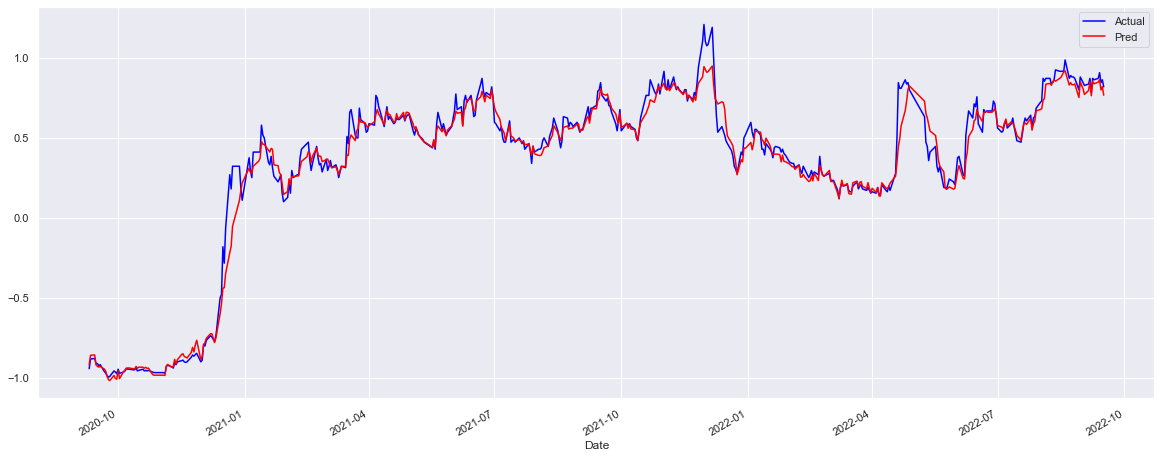

In [15]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

### Evaluation

**Inverse transform scaled Close price**

In [16]:
from joblib import load

In [17]:
close_scaler = load('../feature_engineering/isat_close_scaler.bin')

In [18]:
inversed_pred = close_scaler.inverse_transform(np.array(predictions['Pred']).reshape(-1,1))
inversed_act = close_scaler.inverse_transform(np.array(predictions['Actual']).reshape(-1,1))

In [19]:
inversed = pd.DataFrame(inversed_pred)
inversed['Actual'] = inversed_act
inversed.rename({0:'Pred'}, axis=1, inplace=True)
inversed.index = test_labels.index
inversed.head(2)

,Pred,Actual
Date,,
2020-09-10,2148.731445,2080.0
2020-09-11,2316.818604,2250.0


**Plot error distribution**

In [20]:
def plotErrorHist(inversed_df):
    """
    Function to plot error histogram
    """
    error = inversed_df['Pred'] - inversed_df['Actual']
    plt.figure(figsize=(10,6))
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error [Close]')
    _ = plt.ylabel('Count')

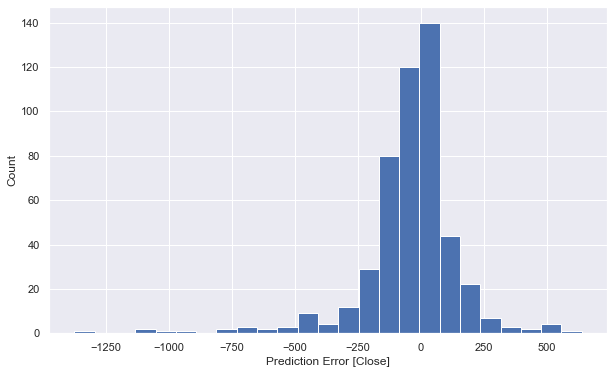

In [21]:
plotErrorHist(inversed)

**RMSE**

In [22]:
from statsmodels.tools.eval_measures import rmse

In [23]:
rmse(inversed['Pred'], inversed['Actual'])

205.05238314700364

**MAPE**

In [24]:
# mape
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [25]:
mape(inversed['Actual'], inversed['Pred'])

2.218765437314547

**R-squared**

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(inversed['Actual'], inversed['Pred'])

0.9814151967436648

### Save Model

In [28]:
# Save model
model.save_model('./models/isat.json')